In [1]:
import math
import xarray as xr
import cartopy.crs as ccrs
import matplotlib as mpl
from matplotlib import pyplot as plt 
import matplotlib.pylab as plt
import matplotlib.path as mpath
from matplotlib.pyplot import figure
import numpy as np
import cartopy.feature as cfeature
import pyproj
import utm
#from scipy import interpolate
#import verde as vd
#import pykrige.kriging_tools as kt
#from pykrige.ok import OrdinaryKriging

#from pykrige.uk import UniversalKriging
import pandas as pd 
import traceback 
from pathlib import Path  
import glob
import os  
import numpy.ma as ma
import netCDF4 as nc

import matplotlib.patches as patches
from PIL import Image

#from metpy.cbook import get_test_data
#from metpy.interpolate import cross_section

In [3]:
#MEGA HYCOM data set
#ds_25 = xr.open_mfdataset('/Users/Anna/Desktop/MSMET/Thesis/WRFprepData/March2018HYCOM/020_archv.2018_084_*_3z.nc', combine = 'by_coords', concat_dim = 'time')
#ds_25.to_netcdf('test_25.nc')

ds_26 = xr.open_mfdataset('/Users/Anna/Desktop/MSMET/Thesis/WRFprepData/March2018HYCOM/020_archv.2018_085_*_3z.nc')#, combine = 'by_coords', concat_dim = 'time')
ds_26.to_netcdf('test_26.nc')

ds_25 = xr.open_mfdataset('/Users/Anna/Desktop/MSMET/Thesis/WRFprepData/March2018HYCOM/020_archv.2018_084_*_3z.nc')#, combine = 'by_coords', concat_dim = 'time')

ds_25.to_netcdf('test_25.nc')
ds25 = xr.open_dataset('test_25.nc')


In [11]:
ds25 = xr.open_dataset('test_25.nc')
ds26 = xr.open_dataset('test_26.nc')
#print(ds25.keys)
#print('\n', ds25.variables)
#print('\n', ds25.depth)

#print(np.max(ds25.Latitude.values))
#print(np.min(ds25.Latitude.values))
#print(np.max(ds26.Latitude.values))
#print(np.min(ds26.Latitude.values), '\n')

#print(np.max(ds25.Longitude.values))
#print(np.min(ds25.Longitude.values))
#print(np.max(ds26.Longitude.values))
#print(np.min(ds26.Longitude.values))

#do SST on same grid as current, but from lon: -98 to -77 and lat: 18 to 31

In [12]:
#Subset lat/lon for SST

#REAL RUN 
latbounds = [24, 31]
lonbounds = [-93, -87]

#TEST RUN
#latbounds = [25, 26]
#lonbounds = [-89, -88]

lats = ds25.Latitude.values[:]
lons = ds25.Longitude.values[:]

#set upper & lower bounds
latli = np.argmin(np.abs(lats-latbounds[0]))
latui = np.argmin(np.abs(lats-latbounds[1]))
lonli = np.argmin(np.abs(lons-lonbounds[0]))
lonui = np.argmin(np.abs(lons-lonbounds[1]))

SST_subset_25=ds25.variables['water_temp'][:,0,latli:latui, lonli:lonui]
SST_subset_26=ds26.variables['water_temp'][:,0,latli:latui, lonli:lonui]

u_subset_25=ds25.variables['u'][:,0,latli:latui, lonli:lonui]
v_subset_25=ds25.variables['v'][:,0,latli:latui, lonli:lonui]

u_subset_26=ds26.variables['u'][:,0,latli:latui, lonli:lonui]
v_subset_26=ds26.variables['v'][:,0,latli:latui, lonli:lonui]

lat_array=ds25.Latitude.values[latli:latui]
lon_array=ds25.Longitude.values[lonli:lonui]

#print(lat_array.shape) #REAL RUN: 184, TEST RUN: 28
#print(lon_array.shape) #REAL RUN: 112, TEST RUN: 25
#print(lat_array)
#print(lon_array)

#lon = -88.599976
#print(np.max(u_subset_25))
#print(np.min(u_subset_25))


In [13]:

#Calculate the mean
meanSST_25 = SST_subset_25.mean('MT')
#print('meanSST_25: ', meanSST_25.values)

meanSST_26 = SST_subset_26.mean('MT')
#print('meanSST_26: ', meanSST_26.values)

meanU_25 = u_subset_25.mean('MT')
#print('meanU_25: ', meanU_25.values)
#print(np.min(meanU_25))
#print(np.max(meanU_25))

meanV_25 = v_subset_25.mean('MT')
#print('meanV_26: ', meanV_25.values)

meanU_26 = u_subset_25.mean('MT')
#print('meanU_25: ', meanU_26.values)

meanV_26 = v_subset_26.mean('MT')
#print('meanV_26: ', meanV_26.values)

print(meanU_25.shape)
print(meanU_26.shape)
print(meanV_25.shape)
print(meanV_26.shape)

print(meanSST_26.shape) #184, 112 
print(meanSST_25.shape) #184, 112 


(198, 150)
(198, 150)
(198, 150)
(198, 150)
(198, 150)
(198, 150)


C:\Users\Anna\anaconda3\envs\metpy\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


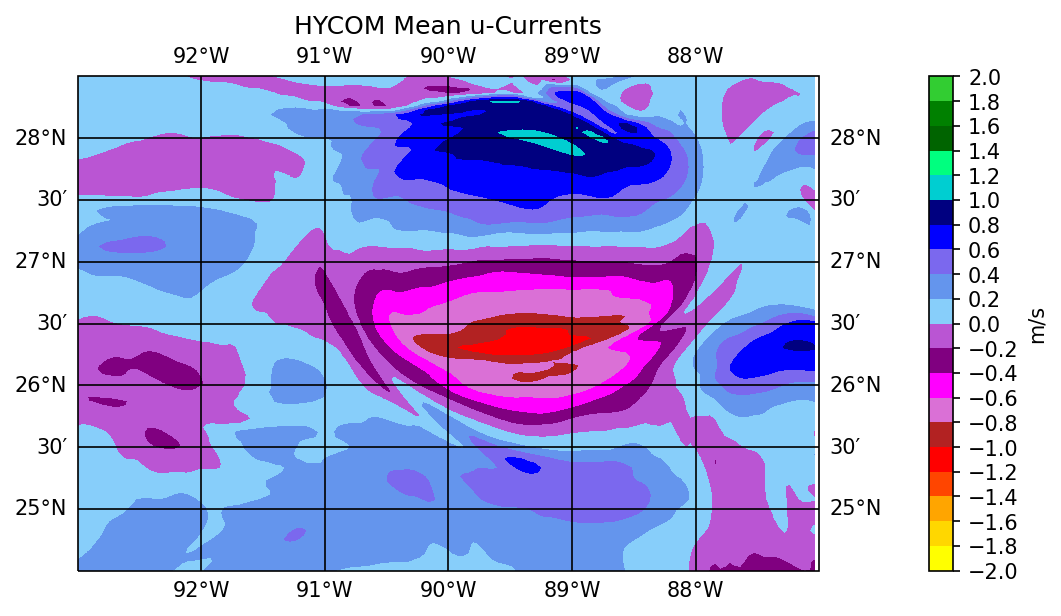

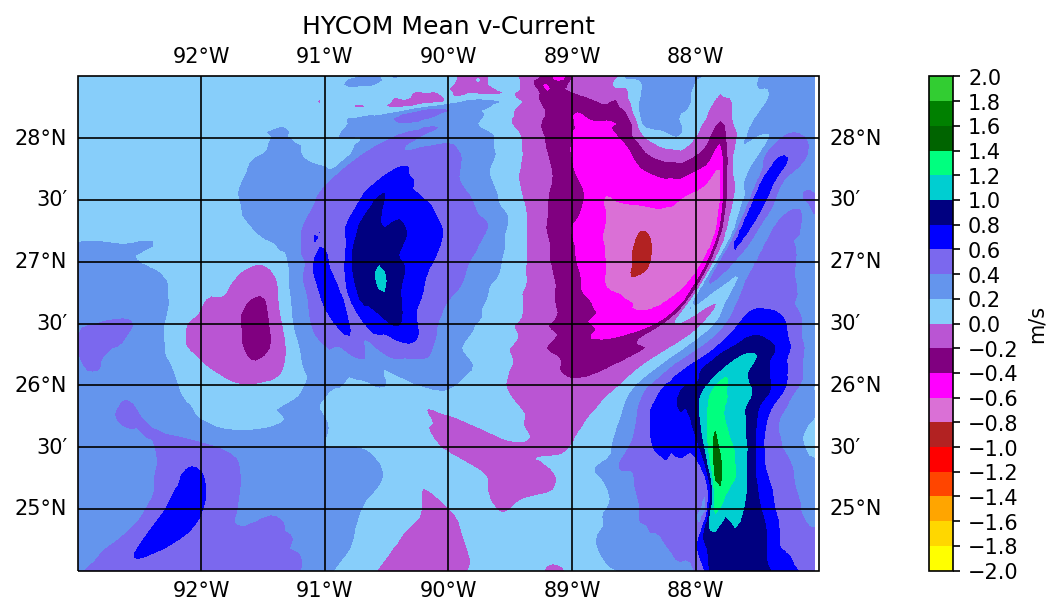

"\nmapcrs = ccrs.PlateCarree()\nfig = plt.figure(figsize=(8, 4), dpi=150)\nax = fig.add_subplot(111, projection=mapcrs)\nax.coastlines()\ncs = ax.contourf(lon_array, lat_array, meanV_25)\nax.contour(lon_array, lat_array, meanV_25, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())\nPCM=ax.get_children()[2]\nplt.colorbar(cs, ax=ax, label = 'Speed m/s')\ngl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')\nplt.tight_layout()\ngl.top_labels = False\ngl.ylabels_right = False\nplt.title('HYCOM Mean v-Current for March 25, 2018')\n#plt.savefig('H25V_default.png')\nsave_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'\nplt.savefig(save_results_to + 'H25V_default.png',  bbox_inches = 'tight',dpi = 150)\nplt.show()\n\n#-1.2 to 1.2 \nmapcrs = ccrs.PlateCarree()\nfig = plt.figure(figsize=(8, 4), dpi=150)\nax = fig.add_subplot(111, projection=mapcrs)\nax.coastlines()\n#cs = ax.contourf(lon_array, lat_array, meanU_26)\n#ax.contou

In [14]:
#plot day 25 mean u_current

#-1.2 to 1.2 
#cmap = mpl.colors.ListedColormap(['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal', 'forestgreen', 'limegreen', 
#                                  'lawngreen', 'palegreen', 'yellow', 'gold', 'orange', 'peru','coral', 'red', 'maroon' ])
cmap = mpl.colors.ListedColormap(['yellow', 'gold', 'orange', 'orangered', 'red', 'firebrick', 'orchid', 'magenta', 'purple',
                                  'mediumorchid', 'lightskyblue', 'cornflowerblue', 'mediumslateblue', 'blue', 'navy', 'darkturquoise', 
                                  'springgreen', 'darkgreen', 'green', 'limegreen']) 
                                  
#cmap = plot_color_gradients,(['nipy_spectral'])
#bounds = [-2, -1.75, -1.5, -1.25, -1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]
bounds = [-2, -1.8, -1.6, -1.4, -1.2, -1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-93, -87, 24.5, 28.5], crs=mapcrs)
ax.coastlines()
#cs = ax.contourf(lon_array, lat_array, meanU_25, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
#                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'orange', 
#                                                           'peru','coral', 'red', 'maroon' ])
cs = ax.contourf(lon_array, lat_array, meanU_25, levels = bounds, colors = ['yellow', 'gold', 'orange', 'orangered', 'red', 'firebrick', 'orchid', 'magenta', 'purple',
                                  'mediumorchid', 'lightskyblue', 'cornflowerblue', 'mediumslateblue', 'blue', 'navy', 'darkturquoise', 
                                  'springgreen', 'darkgreen', 'green', 'limegreen']) 
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, cmap=cmap, norm=norm, pad = 0.1, ticks = bounds, spacing = 'proportional', label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('HYCOM Mean u-Currents')
#plt.savefig('H25U_new.png')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'H25U_new.png', bbox_inches = 'tight', dpi = 150)
plt.show()
'''
#norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-93, -87, 24.5, 28.5], crs=mapcrs)
ax.coastlines()
cs = ax.contourf(lon_array, lat_array, meanU_25)
ax.contour(lon_array, lat_array, meanU_25, linewidths = 1, transform=ccrs.PlateCarree())
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, label = 'Speed m/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('HYCOM Mean u-Current for March 25, 2018')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'H25U_default.png',  bbox_inches = 'tight',dpi = 150)
plt.show()
'''
#-0.9 to 1.5 
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-93, -87, 24.5, 28.5], crs=mapcrs)
ax.coastlines()
cs = ax.contourf(lon_array, lat_array, meanV_25, levels = bounds, colors = ['yellow', 'gold', 'orange', 'orangered', 'red', 'firebrick', 'orchid', 'magenta', 'purple',
                                  'mediumorchid', 'lightskyblue', 'cornflowerblue', 'mediumslateblue', 'blue', 'navy', 'darkturquoise', 
                                  'springgreen', 'darkgreen', 'green', 'limegreen']) 
#ax.contour(lon_array, lat_array, meanV_25, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
#PCM=ax.get_children()[2]
#plt.colorbar(cs, ax=ax, cmap=cmap, norm=norm, ticks = bounds, spacing = 'proportional', label = 'Speed m/s')
plt.colorbar(cs, ax=ax, cmap=cmap, norm=norm, pad = 0.1, ticks = bounds, label = 'm/s')
#gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
#gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
#plt.tight_layout()
#gl.xlabels_top = False
#gl.ylabels_right=False
#gl.top_labels = False
#gl.right_labels = False
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
#gl.ylabels_left = True
gl.ylabels_right = False
plt.title('HYCOM Mean v-Current')
#plt.savefig('H25V_new.png')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'H25V_new.png',  bbox_inches = 'tight',dpi = 150)
plt.show()

'''
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(lon_array, lat_array, meanV_25)
ax.contour(lon_array, lat_array, meanV_25, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, label = 'Speed m/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('HYCOM Mean v-Current for March 25, 2018')
#plt.savefig('H25V_default.png')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'H25V_default.png',  bbox_inches = 'tight',dpi = 150)
plt.show()

#-1.2 to 1.2 
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
#cs = ax.contourf(lon_array, lat_array, meanU_26)
#ax.contour(lon_array, lat_array, meanU_26, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
cs = ax.contourf(lon_array, lat_array, meanU_26, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
ax.contour(lon_array, lat_array, meanU_26, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
PCM=ax.get_children()[2]
#plt.colorbar(cs, ax=ax, shrink = 0.5, label = 'Speed m/s')
plt.colorbar(cs, ax=ax, cmap=cmap, norm=norm, ticks = bounds, spacing = 'proportional', label = 'Speed m/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('HYCOM Mean u-Current for March 26, 2018')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'H26U_new.png',  bbox_inches = 'tight',dpi = 150)
plt.show()


mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
#cs = ax.contourf(lon_array, lat_array, meanU_26)
#ax.contour(lon_array, lat_array, meanU_26, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
cs = ax.contourf(lon_array, lat_array, meanU_26)
ax.contour(lon_array, lat_array, meanU_26, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
PCM=ax.get_children()[2]
#plt.colorbar(cs, ax=ax, shrink = 0.5, label = 'Speed m/s')
plt.colorbar(cs, ax=ax, label = 'Speed m/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('HYCOM Mean u-Current for March 26, 2018')
#plt.savefig('H26U_default.png')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'H26U_default.png', bbox_inches = 'tight', dpi = 150)
plt.show()

#-0.9 to 1.5
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
#cs = ax.contourf(lon_array, lat_array, meanV_26)
#ax.contour(lon_array, lat_array, meanV_26, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
cs = ax.contourf(lon_array, lat_array, meanV_26, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
ax.contour(lon_array, lat_array, meanV_26, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
PCM=ax.get_children()[2]
#plt.colorbar(cs, ax=ax, shrink = 0.5, label = 'Speed m/s')
plt.colorbar(cs, ax=ax, cmap=cmap, norm=norm, ticks = bounds, spacing = 'proportional', label = 'Speed m/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('HYCOM Mean v-Current for March 26, 2018')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'H26V_new.png',  bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
#cs = ax.contourf(lon_array, lat_array, meanV_26)
#ax.contour(lon_array, lat_array, meanV_26, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
cs = ax.contourf(lon_array, lat_array, meanV_26)
ax.contour(lon_array, lat_array, meanV_26, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
PCM=ax.get_children()[2]
#plt.colorbar(cs, ax=ax, shrink = 0.5, label = 'Speed m/s')
plt.colorbar(cs, ax=ax, label = 'Speed m/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('HYCOM Mean v-Current for March 26, 2018')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'H26V_default.png',  bbox_inches = 'tight',dpi = 150)
plt.show()
'''

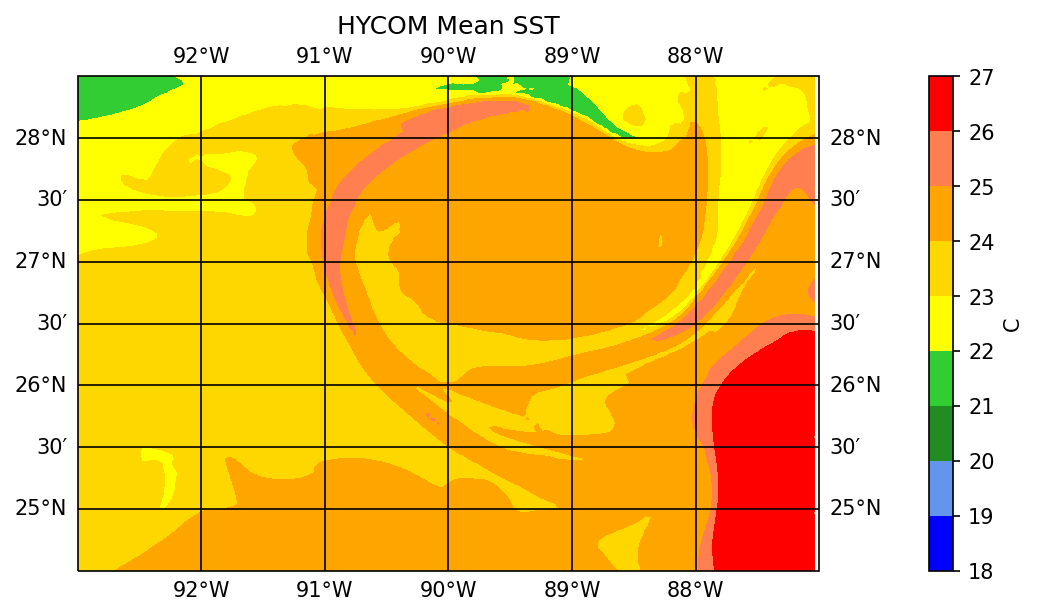

In [15]:
#plot day 25 mean SST

cmap = mpl.colors.ListedColormap(['blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'yellow', 'gold', 'orange', 'coral', 'red'])
bounds = [18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
#bounds = [-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

#18 to 27
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-93, -87, 24.5, 28.5], crs=mapcrs)
ax.coastlines()
cs = ax.contourf(lon_array, lat_array, meanSST_25, levels = bounds, colors = ['blue', 'cornflowerblue',
                                                           'forestgreen', 'limegreen', 'yellow', 'gold', 'orange', 
                                                           'coral', 'red'])
#ax.contour(lon_array, lat_array, meanSST_25, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
PCM=ax.get_children()[2]
#plt.colorbar(cs, ax=ax, shrink = 0.5, label = ' Degrees C')
plt.colorbar(cs, ax=ax, cmap=cmap, norm=norm, pad = 0.1, ticks = bounds, label = 'C')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('HYCOM Mean SST')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'SST25.png',  bbox_inches = 'tight', dpi = 150)
plt.show()


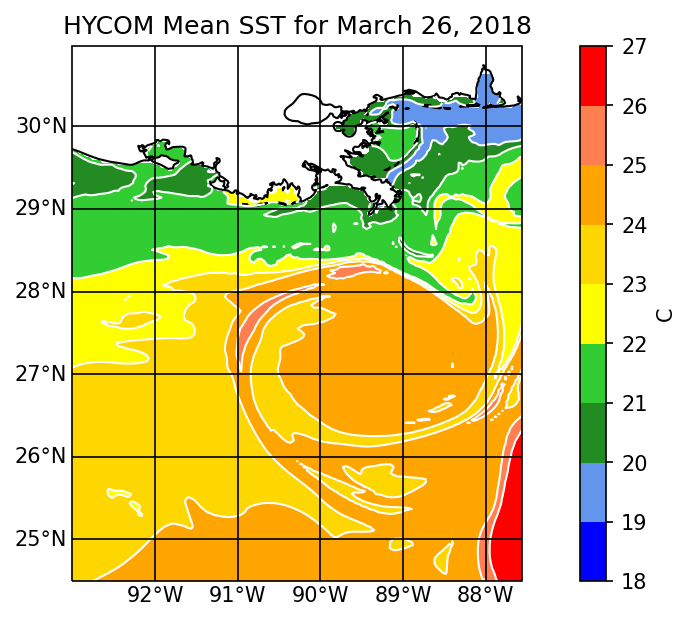

In [8]:
'''
#plot day 26 mean SST
#19 to 27
cmap = mpl.colors.ListedColormap(['blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'yellow', 'gold', 'orange', 'coral', 'red'])
bounds = [18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
#bounds = [-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

#18 to 27
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(lon_array, lat_array, meanSST_26, levels = bounds, colors = ['blue', 'cornflowerblue',
                                                           'forestgreen', 'limegreen', 'yellow', 'gold', 'orange', 
                                                           'coral', 'red'])
ax.contour(lon_array, lat_array, meanSST_26, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
PCM=ax.get_children()[2]
#plt.colorbar(cs, ax=ax, shrink = 0.5, label = ' Degrees C')
plt.colorbar(cs, ax=ax, cmap=cmap, norm=norm, ticks = bounds, label = 'C')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('HYCOM Mean SST for March 26, 2018')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'SST26.png',  bbox_inches = 'tight', dpi = 150)
plt.show()
'''

In [16]:
#LCE over whole lat lon of the Gulf 
#use current magnitude

#Subset lat/lon for SST
LCE_latbounds = [18, 30]
LCE_lonbounds = [-98, -77]

LCE_lats = ds25.Latitude.values[:]
LCE_lons = ds25.Longitude.values[:]

#set upper & lower bounds
LCE_latli = np.argmin(np.abs(LCE_lats-LCE_latbounds[0]))
LCE_latui = np.argmin(np.abs(LCE_lats-LCE_latbounds[1]))
LCE_lonli = np.argmin(np.abs(LCE_lons-LCE_lonbounds[0]))
LCE_lonui = np.argmin(np.abs(LCE_lons-LCE_lonbounds[1]))

SST_LCEsubset_25=ds25.variables['water_temp'][:,0,LCE_latli:LCE_latui, LCE_lonli:LCE_lonui]
SST_LCEsubset_26=ds26.variables['water_temp'][:,0,LCE_latli:LCE_latui, LCE_lonli:LCE_lonui]

u_LCEsubset_25=ds25.variables['u'][:,0,LCE_latli:LCE_latui, LCE_lonli:LCE_lonui]
v_LCEsubset_25=ds25.variables['v'][:,0,LCE_latli:LCE_latui, LCE_lonli:LCE_lonui]

u_LCEsubset_26=ds26.variables['u'][:,0,LCE_latli:LCE_latui, LCE_lonli:LCE_lonui]
v_LCEsubset_26=ds26.variables['v'][:,0,LCE_latli:LCE_latui, LCE_lonli:LCE_lonui]

lat_LCEarray25=ds25.Latitude.values[LCE_latli:LCE_latui]
lon_LCEarray25=ds25.Longitude.values[LCE_lonli:LCE_lonui]
lat_LCEarray26=ds26.Latitude.values[LCE_latli:LCE_latui]
lon_LCEarray26=ds26.Longitude.values[LCE_lonli:LCE_lonui]

#print('lat 25', lat_LCEarray25.shape)
#print('lat 26', lat_LCEarray26.shape)
#print('long 25', lon_LCEarray25.shape)
#print('lon 26', lon_LCEarray26.shape)

LCE_meanSST_25 = SST_LCEsubset_25.mean('MT')
#print('meanSST_25: ', meanSST_25.values)
#print('SST 25', LCE_meanSST_25.shape)

LCE_meanSST_26 = SST_LCEsubset_26.mean('MT')
#print('meanSST_26: ', meanSST_26.values)
#print('SST 26', LCE_meanSST_26.shape)

LCE_meanU_25 = u_LCEsubset_25.mean('MT')
#print('meanU_25: ', meanU_25.values)
#print('U 25', LCE_meanU_25.shape)

LCE_meanV_25 = v_LCEsubset_25.mean('MT')
#print('meanV_26: ', meanV_25.values)
#print('V 25', LCE_meanV_25.shape)

LCE_meanU_26 = u_LCEsubset_26.mean('MT')
#print('meanU_25: ', meanU_26.values)
#print('U 26', LCE_meanU_26.shape)

LCE_meanV_26 = v_LCEsubset_26.mean('MT')
#print('meanV_26: ', meanV_26.values)
#print('V 26',LCE_meanV_26.shape)

currentMag25=np.sqrt(LCE_meanU_25**2 + LCE_meanV_25**2)
currentMag26=np.sqrt(LCE_meanU_26**2 + LCE_meanV_26**2)
#print('current mag:', currentMag26.shape) #327, 524


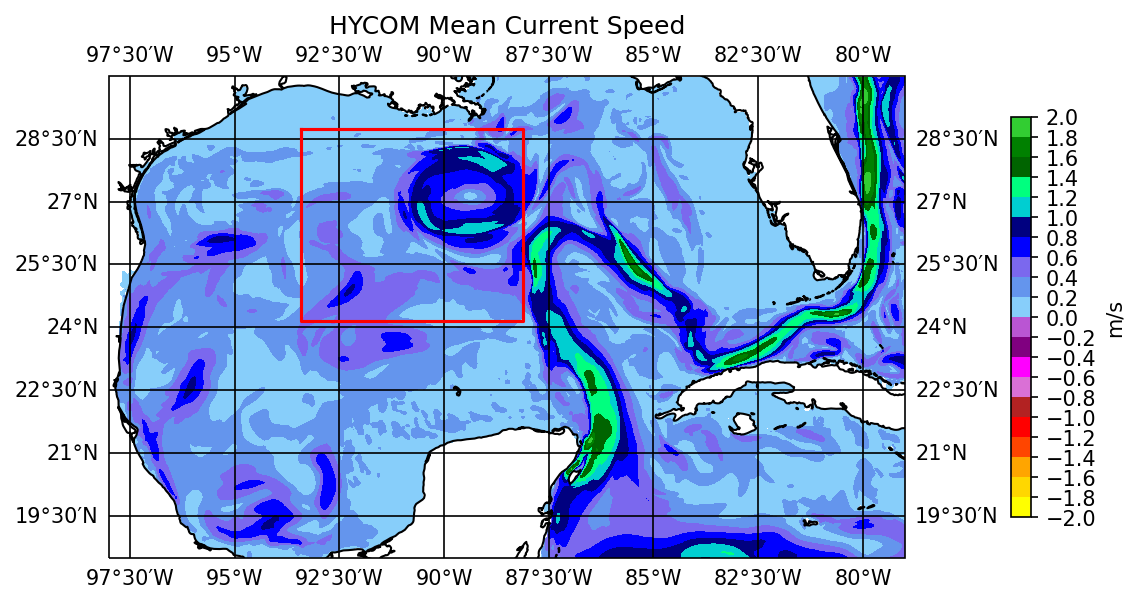

In [18]:
#Plot LCE 25
cmap = mpl.colors.ListedColormap(['yellow', 'gold', 'orange', 'orangered', 'red', 'firebrick', 'orchid', 'magenta', 'purple',
                                  'mediumorchid', 'lightskyblue', 'cornflowerblue', 'mediumslateblue', 'blue', 'navy', 'darkturquoise', 
                                  'springgreen', 'darkgreen', 'green', 'limegreen']) 
#bounds = [-2, -1.75, -1.5, -1.25, -1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]
bounds = [-2, -1.8, -1.6, -1.4, -1.2, -1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-98, -79, 18.5, 30], crs=mapcrs)
ax.coastlines()
cs = ax.contourf(lon_LCEarray26, lat_LCEarray26, currentMag25, levels = bounds, colors = ['yellow', 'gold', 'orange', 'orangered', 'red', 'firebrick', 'orchid', 'magenta', 'purple',
                                  'mediumorchid', 'lightskyblue', 'cornflowerblue', 'mediumslateblue', 'blue', 'navy', 'darkturquoise', 
                                  'springgreen', 'darkgreen', 'green', 'limegreen']) 
#ax.contour(lon_LCEarray26, lat_LCEarray26, currentMag26, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.75, pad = 0.1, ticks = bounds, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()

# Coordinates of rectangle vertices
# in clockwise order
xs = [-93.42328, -88.10474, -88.10474, -93.42328, -93.42328]
ys = [28.72953, 28.72953, 24.147293, 24.147293, 28.72953]
ax.plot(xs, ys, color="red")
#gl.top_labels = False
#gl.ylabels_right = False

plt.title('HYCOM Mean Current Speed')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'LCE26.png',  bbox_inches = 'tight', dpi = 150)
plt.show()

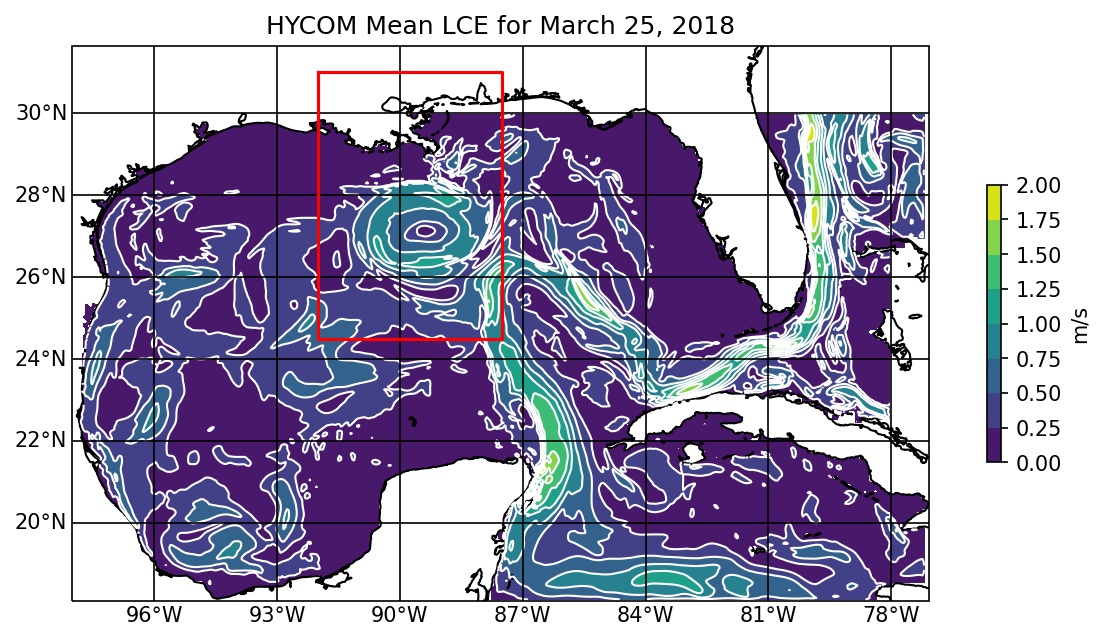

In [16]:
#Plot LCE 26

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(lon_LCEarray25, lat_LCEarray25, currentMag25)
ax.contour(lon_LCEarray25, lat_LCEarray25, currentMag25, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()

# Coordinates of rectangle vertices
# in clockwise order
xs = [-92, -87.5, -87.5, -92, -92]
ys = [31, 31, 24.5, 24.5, 31]
ax.plot(xs, ys, color="red")

gl.top_labels = False
gl.ylabels_right = False
plt.title('HYCOM Mean LCE for March 25, 2018')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'LCE25.png',  bbox_inches = 'tight',dpi = 150)
plt.show()


In [18]:
#March 25 Dopplerscat
ds25_1 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180325_084330_0036-0111_line01.L2.nc')
ds25_2 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180325_084330_0119-0174_line02.L2.nc')
ds25_3 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180325_084330_0189-0236_line03.L2.nc')
ds25_4 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180325_084330_0249-0312_line04.L2.nc')
ds25_5 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180325_084330_0326-0368_line05.L2.nc')
ds25_6 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180325_084330_0380-0436_line06.L2.nc')
ds25_7 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180325_084330_0450-0490_line07.L2.nc')
ds25_8 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180325_084330_0504-0552_line08.L2.nc')
ds25_9 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180325_084330_0565-0602_line09.L2.nc')
ds25_10 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180325_084330_0609-0696_line10.L2.nc')

#March 26 Dopplerscat
ds26_1 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180326_084656_0001-0110_line01.L2.nc')
ds26_2 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180326_084656_0118-0170_line02.L2.nc')
ds26_3 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180326_084656_0180-0227_line03.L2.nc')
ds26_4 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180326_084656_0238-0296_line04.L2.nc')
ds26_5 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180326_084656_0306-0348_line05.L2.nc')
ds26_6 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180326_084656_0360-0375_line06.L2.nc')
ds26_7 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180326_084656_0377-0419_line07.L2.nc')
ds26_8 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180326_084656_0429-0470_line08.L2.nc')
ds26_9 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180326_084656_0485-0533_line09.L2.nc')
ds26_10 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180326_084656_0543-0581_line10.L2.nc')
ds26_11=xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180326_084656_0588-0682_line11.L2.nc')

#print(ds25_1.variables)
#mean_observation_time
#approx 1400 to 2100 
'''
print(np.nanmax(ds25_1.mean_observation_time))
print(np.nanmin(ds25_1.mean_observation_time))
print(np.nanmax(ds25_2.mean_observation_time))
print(np.nanmin(ds25_2.mean_observation_time))
print(np.nanmax(ds25_3.mean_observation_time))
print(np.nanmin(ds25_3.mean_observation_time))
print(np.nanmax(ds25_4.mean_observation_time))
print(np.nanmin(ds25_4.mean_observation_time))
print(np.nanmax(ds25_5.mean_observation_time))
print(np.nanmin(ds25_5.mean_observation_time))
print(np.nanmax(ds25_6.mean_observation_time))
print(np.nanmin(ds25_6.mean_observation_time))
print(np.nanmax(ds25_7.mean_observation_time))
print(np.nanmin(ds25_7.mean_observation_time))
print(np.nanmax(ds25_8.mean_observation_time))
print(np.nanmin(ds25_8.mean_observation_time))
print(np.nanmax(ds25_9.mean_observation_time))
print(np.nanmin(ds25_9.mean_observation_time))
print(np.nanmax(ds25_10.mean_observation_time))
print(np.nanmin(ds25_10.mean_observation_time))
print('\n')
print(np.nanmax(ds26_1.mean_observation_time))
print(np.nanmin(ds26_1.mean_observation_time))
print(np.nanmax(ds26_2.mean_observation_time))
print(np.nanmin(ds26_2.mean_observation_time))
print(np.nanmax(ds26_3.mean_observation_time))
print(np.nanmin(ds26_3.mean_observation_time))
print(np.nanmax(ds26_4.mean_observation_time))
print(np.nanmin(ds26_4.mean_observation_time))
print(np.nanmax(ds26_5.mean_observation_time))
print(np.nanmin(ds26_5.mean_observation_time))
print(np.nanmax(ds26_6.mean_observation_time))
print(np.nanmin(ds26_6.mean_observation_time))
print(np.nanmax(ds26_7.mean_observation_time))
print(np.nanmin(ds26_7.mean_observation_time))
print(np.nanmax(ds26_8.mean_observation_time))
print(np.nanmin(ds26_8.mean_observation_time))
print(np.nanmax(ds26_9.mean_observation_time))
print(np.nanmin(ds26_9.mean_observation_time))
print(np.nanmax(ds26_10.mean_observation_time))
print(np.nanmin(ds26_10.mean_observation_time))
print(np.nanmax(ds26_11.mean_observation_time))
print(np.nanmin(ds26_11.mean_observation_time))
'''
#print(ds25_1.keys)
#print(ds25_1.variables)


"\nprint(np.nanmax(ds25_1.mean_observation_time))\nprint(np.nanmin(ds25_1.mean_observation_time))\nprint(np.nanmax(ds25_2.mean_observation_time))\nprint(np.nanmin(ds25_2.mean_observation_time))\nprint(np.nanmax(ds25_3.mean_observation_time))\nprint(np.nanmin(ds25_3.mean_observation_time))\nprint(np.nanmax(ds25_4.mean_observation_time))\nprint(np.nanmin(ds25_4.mean_observation_time))\nprint(np.nanmax(ds25_5.mean_observation_time))\nprint(np.nanmin(ds25_5.mean_observation_time))\nprint(np.nanmax(ds25_6.mean_observation_time))\nprint(np.nanmin(ds25_6.mean_observation_time))\nprint(np.nanmax(ds25_7.mean_observation_time))\nprint(np.nanmin(ds25_7.mean_observation_time))\nprint(np.nanmax(ds25_8.mean_observation_time))\nprint(np.nanmin(ds25_8.mean_observation_time))\nprint(np.nanmax(ds25_9.mean_observation_time))\nprint(np.nanmin(ds25_9.mean_observation_time))\nprint(np.nanmax(ds25_10.mean_observation_time))\nprint(np.nanmin(ds25_10.mean_observation_time))\nprint('\n')\nprint(np.nanmax(ds26_1

In [46]:
#check DS25 u_current
#-10 to 8 
'''
cmap = mpl.colors.ListedColormap(['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
bounds = [-6, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 6]
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-91, -89.5, 26.25, 29.5], crs=mapcrs)
ax.coastlines()
cs = ax.contourf(ds25_1.longitude.values, ds25_1.latitude.values, ds25_1.u_current.values, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
#ax.contour(ds25_1.longitude.values, ds25_1.latitude.values, ds25_1.u_current.values, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
cs = ax.contourf(ds25_2.longitude.values, ds25_2.latitude.values, ds25_2.u_current.values, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
#ax.contour(ds25_2.longitude.values, ds25_2.latitude.values, ds25_2.u_current.values, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
cs = ax.contourf(ds25_3.longitude.values, ds25_3.latitude.values, ds25_3.u_current.values, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
#ax.contour(ds25_3.longitude.values, ds25_3.latitude.values, ds25_3.u_current.values, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
cs = ax.contourf(ds25_4.longitude.values, ds25_4.latitude.values, ds25_4.u_current.values, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
#ax.contour(ds25_4.longitude.values, ds25_4.latitude.values, ds25_4.u_current.values, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
cs = ax.contourf(ds25_5.longitude.values, ds25_5.latitude.values, ds25_5.u_current.values, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
#ax.contour(ds25_5.longitude.values, ds25_5.latitude.values, ds25_5.u_current.values, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
cs = ax.contourf(ds25_6.longitude.values, ds25_6.latitude.values, ds25_6.u_current.values, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
#ax.contour(ds25_6.longitude.values, ds25_6.latitude.values, ds25_6.u_current.values, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
cs = ax.contourf(ds25_7.longitude.values, ds25_7.latitude.values, ds25_7.u_current.values, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
#ax.contour(ds25_7.longitude.values, ds25_7.latitude.values, ds25_7.u_current.values, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
cs = ax.contourf(ds25_8.longitude.values, ds25_8.latitude.values, ds25_8.u_current.values, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
#ax.contour(ds25_8.longitude.values, ds25_8.latitude.values, ds25_8.u_current.values, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
cs = ax.contourf(ds25_9.longitude.values, ds25_9.latitude.values, ds25_9.u_current.values, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
#ax.contour(ds25_9.longitude.values, ds25_9.latitude.values, ds25_9.u_current.values, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
cs = ax.contourf(ds25_10.longitude.values, ds25_10.latitude.values, ds25_10.u_current.values,levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
#ax.contour(ds25_10.longitude.values, ds25_10.latitude.values, ds25_10.u_current.values, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
PCM=ax.get_children()[2]
#plt.colorbar(cs, ax=ax, shrink = 0.5, label = 'm/s')
plt.colorbar(cs, ax=ax, cmap=cmap, norm=norm, ticks = bounds, spacing = 'proportional', label = 'Speed m/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('No Error Flag u-Current 3/25/2018')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'DS25U_new_noFlag.png', bbox_inches = 'tight', dpi = 150)
plt.show()


mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-91, -89.5, 26.25, 29.5], crs=mapcrs)
ax.coastlines()
cs = ax.contourf(ds25_1.longitude.values, ds25_1.latitude.values, ds25_1.u_current.values)
cs = ax.contourf(ds25_2.longitude.values, ds25_2.latitude.values, ds25_2.u_current.values)
cs = ax.contourf(ds25_3.longitude.values, ds25_3.latitude.values, ds25_3.u_current.values)
cs = ax.contourf(ds25_4.longitude.values, ds25_4.latitude.values, ds25_4.u_current.values)
cs = ax.contourf(ds25_5.longitude.values, ds25_5.latitude.values, ds25_5.u_current.values)
cs = ax.contourf(ds25_6.longitude.values, ds25_6.latitude.values, ds25_6.u_current.values)
cs = ax.contourf(ds25_7.longitude.values, ds25_7.latitude.values, ds25_7.u_current.values)
cs = ax.contourf(ds25_8.longitude.values, ds25_8.latitude.values, ds25_8.u_current.values)
cs = ax.contourf(ds25_9.longitude.values, ds25_9.latitude.values, ds25_9.u_current.values)
cs = ax.contourf(ds25_10.longitude.values, ds25_10.latitude.values, ds25_10.u_current.values)
PCM=ax.get_children()[2]
#plt.colorbar(cs, ax=ax, shrink = 0.5, label = 'm/s')
plt.colorbar(cs, ax=ax, label = 'Speed m/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('No Error Flag u-Current 3/25/2018')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'DS25U_default_noFlag.png',  bbox_inches = 'tight',dpi = 150)
plt.show()
'''

"\ncmap = mpl.colors.ListedColormap(['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal', 'forestgreen', 'limegreen', \n                                  'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 'peru', 'lightcoral', 'coral', 'red', 'maroon' ])\nbounds = [-6, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 6]\nmapcrs = ccrs.PlateCarree()\nfig = plt.figure(figsize=(8, 4), dpi=150)\nax = fig.add_subplot(111, projection=mapcrs)\nax.set_extent([-91, -89.5, 26.25, 29.5], crs=mapcrs)\nax.coastlines()\ncs = ax.contourf(ds25_1.longitude.values, ds25_1.latitude.values, ds25_1.u_current.values, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',\n                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', \n                                                           'peru', 'lightcoral', 'coral'

In [47]:
#check DS25 v_current
#-6 to 6 
'''
cmap = mpl.colors.ListedColormap(['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
bounds = [-6, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 6]
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-91, -89.5, 26.25, 29.5], crs=mapcrs)
ax.coastlines()
cs = ax.contourf(ds25_1.longitude.values, ds25_1.latitude.values, ds25_1.v_current.values, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
#ax.contour(ds25_1.longitude.values, ds25_1.latitude.values, ds25_1.u_current.values, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
cs = ax.contourf(ds25_2.longitude.values, ds25_2.latitude.values, ds25_2.v_current.values, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
#ax.contour(ds25_2.longitude.values, ds25_2.latitude.values, ds25_2.u_current.values, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
cs = ax.contourf(ds25_3.longitude.values, ds25_3.latitude.values, ds25_3.v_current.values, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
#ax.contour(ds25_3.longitude.values, ds25_3.latitude.values, ds25_3.u_current.values, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
cs = ax.contourf(ds25_4.longitude.values, ds25_4.latitude.values, ds25_4.v_current.values, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
#ax.contour(ds25_4.longitude.values, ds25_4.latitude.values, ds25_4.u_current.values, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
cs = ax.contourf(ds25_5.longitude.values, ds25_5.latitude.values, ds25_5.v_current.values, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
#ax.contour(ds25_5.longitude.values, ds25_5.latitude.values, ds25_5.u_current.values, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
cs = ax.contourf(ds25_6.longitude.values, ds25_6.latitude.values, ds25_6.v_current.values, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
#ax.contour(ds25_6.longitude.values, ds25_6.latitude.values, ds25_6.u_current.values, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
cs = ax.contourf(ds25_7.longitude.values, ds25_7.latitude.values, ds25_7.v_current.values, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
#ax.contour(ds25_7.longitude.values, ds25_7.latitude.values, ds25_7.u_current.values, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
cs = ax.contourf(ds25_8.longitude.values, ds25_8.latitude.values, ds25_8.v_current.values, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
#ax.contour(ds25_8.longitude.values, ds25_8.latitude.values, ds25_8.u_current.values, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
cs = ax.contourf(ds25_9.longitude.values, ds25_9.latitude.values, ds25_9.v_current.values, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
#ax.contour(ds25_9.longitude.values, ds25_9.latitude.values, ds25_9.u_current.values, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
cs = ax.contourf(ds25_10.longitude.values, ds25_10.latitude.values, ds25_10.v_current.values,levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
#ax.contour(ds25_10.longitude.values, ds25_10.latitude.values, ds25_10.u_current.values, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
PCM=ax.get_children()[2]
#plt.colorbar(cs, ax=ax, shrink = 0.5, label = 'm/s')
plt.colorbar(cs, ax=ax, cmap=cmap, norm=norm, ticks = bounds, spacing = 'proportional', label = 'Speed m/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('No Error Flag v-Current 3/25/2018')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'DS25V_new_noFlag.png',  bbox_inches = 'tight',dpi = 150)
plt.show()


mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-91, -89.5, 26.25, 29.5], crs=mapcrs)
ax.coastlines()
cs = ax.contourf(ds25_1.longitude.values, ds25_1.latitude.values, ds25_1.v_current.values)
cs = ax.contourf(ds25_2.longitude.values, ds25_2.latitude.values, ds25_2.v_current.values)
cs = ax.contourf(ds25_3.longitude.values, ds25_3.latitude.values, ds25_3.v_current.values)
cs = ax.contourf(ds25_4.longitude.values, ds25_4.latitude.values, ds25_4.v_current.values)
cs = ax.contourf(ds25_5.longitude.values, ds25_5.latitude.values, ds25_5.v_current.values)
cs = ax.contourf(ds25_6.longitude.values, ds25_6.latitude.values, ds25_6.v_current.values)
cs = ax.contourf(ds25_7.longitude.values, ds25_7.latitude.values, ds25_7.v_current.values)
cs = ax.contourf(ds25_8.longitude.values, ds25_8.latitude.values, ds25_8.v_current.values)
cs = ax.contourf(ds25_9.longitude.values, ds25_9.latitude.values, ds25_9.v_current.values)
cs = ax.contourf(ds25_10.longitude.values, ds25_10.latitude.values, ds25_10.v_current.values)
PCM=ax.get_children()[2]
#plt.colorbar(cs, ax=ax, shrink = 0.5, label = 'm/s')
plt.colorbar(cs, ax=ax, label = 'Speed m/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('No Error Flag v-Current 3/25/2018')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'DS25V_default_noFlag.png',  bbox_inches = 'tight',dpi = 150)
plt.show()
'''

"\ncmap = mpl.colors.ListedColormap(['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal', 'forestgreen', 'limegreen', \n                                  'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 'peru', 'lightcoral', 'coral', 'red', 'maroon' ])\nbounds = [-6, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 6]\nmapcrs = ccrs.PlateCarree()\nfig = plt.figure(figsize=(8, 4), dpi=150)\nax = fig.add_subplot(111, projection=mapcrs)\nax.set_extent([-91, -89.5, 26.25, 29.5], crs=mapcrs)\nax.coastlines()\ncs = ax.contourf(ds25_1.longitude.values, ds25_1.latitude.values, ds25_1.v_current.values, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',\n                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', \n                                                           'peru', 'lightcoral', 'coral'

In [48]:
#check DS26 u_current
#-18 to 30 
'''
cmap = mpl.colors.ListedColormap(['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
bounds = [-6, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 6]
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-91, -89.5, 26.25, 29.5], crs=mapcrs)
ax.coastlines()
cs = ax.contourf(ds26_1.longitude.values, ds26_1.latitude.values, ds26_1.u_current.values, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
#ax.contour(ds25_1.longitude.values, ds25_1.latitude.values, ds25_1.u_current.values, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
cs = ax.contourf(ds26_2.longitude.values, ds26_2.latitude.values, ds26_2.u_current.values, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
#ax.contour(ds25_2.longitude.values, ds25_2.latitude.values, ds25_2.u_current.values, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
cs = ax.contourf(ds26_3.longitude.values, ds26_3.latitude.values, ds26_3.u_current.values, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
#ax.contour(ds25_3.longitude.values, ds25_3.latitude.values, ds25_3.u_current.values, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
cs = ax.contourf(ds26_4.longitude.values, ds26_4.latitude.values, ds26_4.u_current.values, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
#ax.contour(ds25_4.longitude.values, ds25_4.latitude.values, ds25_4.u_current.values, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
cs = ax.contourf(ds26_5.longitude.values, ds26_5.latitude.values, ds26_5.u_current.values, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
#ax.contour(ds25_5.longitude.values, ds25_5.latitude.values, ds25_5.u_current.values, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
cs = ax.contourf(ds26_6.longitude.values, ds26_6.latitude.values, ds26_6.u_current.values, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
#ax.contour(ds25_6.longitude.values, ds25_6.latitude.values, ds25_6.u_current.values, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
cs = ax.contourf(ds26_7.longitude.values, ds26_7.latitude.values, ds26_7.u_current.values, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
#ax.contour(ds25_7.longitude.values, ds25_7.latitude.values, ds25_7.u_current.values, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
cs = ax.contourf(ds26_8.longitude.values, ds26_8.latitude.values, ds26_8.u_current.values, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
#ax.contour(ds25_8.longitude.values, ds25_8.latitude.values, ds25_8.u_current.values, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
cs = ax.contourf(ds26_9.longitude.values, ds26_9.latitude.values, ds26_9.u_current.values, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
#ax.contour(ds25_9.longitude.values, ds25_9.latitude.values, ds25_9.u_current.values, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
cs = ax.contourf(ds26_10.longitude.values, ds26_10.latitude.values, ds26_10.u_current.values,levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
#ax.contour(ds25_10.longitude.values, ds25_10.latitude.values, ds25_10.u_current.values, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
cs = ax.contourf(ds26_11.longitude.values, ds26_11.latitude.values, ds26_11.u_current.values,levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
#ax.contour(ds25_10.longitude.values, ds25_10.latitude.values, ds25_10.u_current.values, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
PCM=ax.get_children()[2]
#plt.colorbar(cs, ax=ax, shrink = 0.5, label = 'm/s')
plt.colorbar(cs, ax=ax, cmap=cmap, norm=norm, ticks = bounds, spacing = 'proportional', label = 'Speed m/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('No Error Flag u-Current 3/26/2018')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'DS26U_new_noFlag.png',  bbox_inches = 'tight',dpi = 150)
plt.show()


mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-91, -89.5, 26.25, 29.5], crs=mapcrs)
ax.coastlines()
cs = ax.contourf(ds26_1.longitude.values, ds26_1.latitude.values, ds26_1.u_current.values)
cs = ax.contourf(ds26_2.longitude.values, ds26_2.latitude.values, ds26_2.u_current.values)
cs = ax.contourf(ds26_3.longitude.values, ds26_3.latitude.values, ds26_3.u_current.values)
cs = ax.contourf(ds26_4.longitude.values, ds26_4.latitude.values, ds26_4.u_current.values)
cs = ax.contourf(ds26_5.longitude.values, ds26_5.latitude.values, ds26_5.u_current.values)
cs = ax.contourf(ds26_6.longitude.values, ds26_6.latitude.values, ds26_6.u_current.values)
cs = ax.contourf(ds26_7.longitude.values, ds26_7.latitude.values, ds26_7.u_current.values)
cs = ax.contourf(ds26_8.longitude.values, ds26_8.latitude.values, ds26_8.u_current.values)
cs = ax.contourf(ds26_9.longitude.values, ds26_9.latitude.values, ds26_9.u_current.values)
cs = ax.contourf(ds26_10.longitude.values, ds26_10.latitude.values, ds26_10.u_current.values)
cs = ax.contourf(ds26_11.longitude.values, ds26_11.latitude.values, ds26_11.u_current.values)
PCM=ax.get_children()[2]
#plt.colorbar(cs, ax=ax, shrink = 0.5, label = 'm/s')
plt.colorbar(cs, ax=ax, label = 'Speed m/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('No Error Flag u-Current 3/26/2018')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'DS26U_default_noFlag.png',  bbox_inches = 'tight',dpi = 150)
plt.show()
'''

"\ncmap = mpl.colors.ListedColormap(['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal', 'forestgreen', 'limegreen', \n                                  'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 'peru', 'lightcoral', 'coral', 'red', 'maroon' ])\nbounds = [-6, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 6]\nmapcrs = ccrs.PlateCarree()\nfig = plt.figure(figsize=(8, 4), dpi=150)\nax = fig.add_subplot(111, projection=mapcrs)\nax.set_extent([-91, -89.5, 26.25, 29.5], crs=mapcrs)\nax.coastlines()\ncs = ax.contourf(ds26_1.longitude.values, ds26_1.latitude.values, ds26_1.u_current.values, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',\n                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', \n                                                           'peru', 'lightcoral', 'coral'

In [49]:
#check DS26 v_current
#-3 to 5 
'''
cmap = mpl.colors.ListedColormap(['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
bounds = [-6, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 6]
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-91, -89.5, 26.25, 29.5], crs=mapcrs)
ax.coastlines()
cs = ax.contourf(ds26_1.longitude.values, ds26_1.latitude.values, ds26_1.v_current.values, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_2.longitude.values, ds26_2.latitude.values, ds26_2.v_current.values, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_3.longitude.values, ds26_3.latitude.values, ds26_3.v_current.values, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_4.longitude.values, ds26_4.latitude.values, ds26_4.v_current.values, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_5.longitude.values, ds26_5.latitude.values, ds26_5.v_current.values, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_6.longitude.values, ds26_6.latitude.values, ds26_6.v_current.values, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_7.longitude.values, ds26_7.latitude.values, ds26_7.v_current.values, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_8.longitude.values, ds26_8.latitude.values, ds26_8.v_current.values, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_9.longitude.values, ds26_9.latitude.values, ds26_9.v_current.values, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_10.longitude.values, ds26_10.latitude.values, ds26_10.v_current.values,levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_11.longitude.values, ds26_11.latitude.values, ds26_11.v_current.values,levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
PCM=ax.get_children()[2]
#plt.colorbar(cs, ax=ax, shrink = 0.5, label = 'm/s')
plt.colorbar(cs, ax=ax, cmap=cmap, norm=norm, ticks = bounds, spacing = 'proportional', label = 'Speed m/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('No Error Flag v-Current 3/26/2018')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'DS26V_new_noFlag.png', bbox_inches = 'tight', dpi = 150)
plt.show()


mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-91, -89.5, 26.25, 29.5], crs=mapcrs)
ax.coastlines()
cs = ax.contourf(ds26_1.longitude.values, ds26_1.latitude.values, ds26_1.v_current.values)
cs = ax.contourf(ds26_2.longitude.values, ds26_2.latitude.values, ds26_2.v_current.values)
cs = ax.contourf(ds26_3.longitude.values, ds26_3.latitude.values, ds26_3.v_current.values)
cs = ax.contourf(ds26_4.longitude.values, ds26_4.latitude.values, ds26_4.v_current.values)
cs = ax.contourf(ds26_5.longitude.values, ds26_5.latitude.values, ds26_5.v_current.values)
cs = ax.contourf(ds26_6.longitude.values, ds26_6.latitude.values, ds26_6.v_current.values)
cs = ax.contourf(ds26_7.longitude.values, ds26_7.latitude.values, ds26_7.v_current.values)
cs = ax.contourf(ds26_8.longitude.values, ds26_8.latitude.values, ds26_8.v_current.values)
cs = ax.contourf(ds26_9.longitude.values, ds26_9.latitude.values, ds26_9.v_current.values)
cs = ax.contourf(ds26_10.longitude.values, ds26_10.latitude.values, ds26_10.v_current.values)
cs = ax.contourf(ds26_11.longitude.values, ds26_11.latitude.values, ds26_11.v_current.values)
PCM=ax.get_children()[2]
#plt.colorbar(cs, ax=ax, shrink = 0.5, label = 'm/s')
plt.colorbar(cs, ax=ax, label = 'Speed m/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('No Error Flag v-Current 3/26/2018')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'DS26V_default_noFlag.png',  bbox_inches = 'tight',dpi = 150)
plt.show()
'''

"\ncmap = mpl.colors.ListedColormap(['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal', 'forestgreen', 'limegreen', \n                                  'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 'peru', 'lightcoral', 'coral', 'red', 'maroon' ])\nbounds = [-6, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 6]\nmapcrs = ccrs.PlateCarree()\nfig = plt.figure(figsize=(8, 4), dpi=150)\nax = fig.add_subplot(111, projection=mapcrs)\nax.set_extent([-91, -89.5, 26.25, 29.5], crs=mapcrs)\nax.coastlines()\ncs = ax.contourf(ds26_1.longitude.values, ds26_1.latitude.values, ds26_1.v_current.values, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',\n                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', \n                                                           'peru', 'lightcoral', 'coral'

(954, 236)


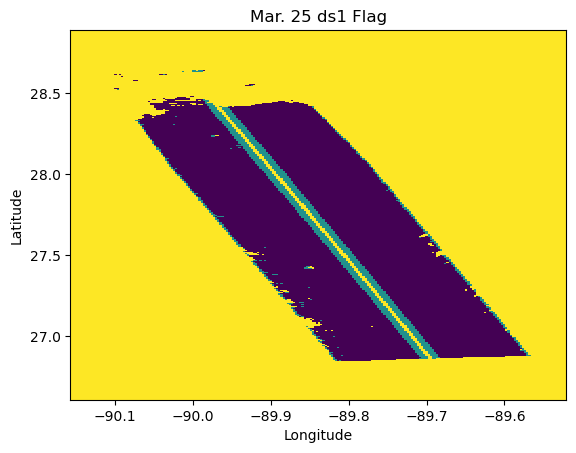

In [19]:
#Look at flags for ds25_1

lat = ds25_1.latitude.values
lon = ds25_1.longitude.values
flag = ds25_1.flag.values

print(flag.shape)

plt.pcolormesh(lon , lat, flag)
plt.colorbar(cs, ax=ax, shrink = 0.5, label = 'Error')
ax.set_aspect('equal')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title('Mar. 25 ds1 Flag')
plt.show()

#print('lat: ',lat)
#print('lon:', lon)

In [20]:
#set flags for all datasets and see if it works for currents, maybe for winds only
#0 is good, 2 is bad
#set flag to only accept 0
lat25_1=ds25_1.latitude.values
lon25_1=ds25_1.longitude.values
flag25_1=ds25_1.flag.values
u_cur25_1=ds25_1.u_current.values
v_cur25_1=ds25_1.v_current.values
x25_1=ds25_1.x.values
y25_1=ds25_1.y.values

lonlen25_1=len(lon25_1) #236
latlen25_1=len(lat25_1) #954

goodUarr25_1=np.zeros((latlen25_1,lonlen25_1))
goodUarr25_1[:]=np.nan
goodVarr25_1=np.zeros((latlen25_1,lonlen25_1))
goodVarr25_1[:]=np.nan

for x in range (len(lon25_1)):
    for y in range (len(lat25_1)):
        if flag25_1[y,x] == 0:
            goodUarr25_1[y,x] = u_cur25_1[y,x] 
            goodVarr25_1[y,x] = v_cur25_1[y,x] 

#goodUarr25_1 = ma.masked_where(np.isnan(goodUarr25_1), goodUarr25_1)
#goodVarr25_1 = ma.masked_where(np.isnan(goodVarr25_1), goodVarr25_1)

lat25_2=ds25_2.latitude.values
lon25_2=ds25_2.longitude.values
flag25_2=ds25_2.flag.values
u_cur25_2=ds25_2.u_current.values
v_cur25_2=ds25_2.v_current.values

lonlen25_2=len(lon25_2)
latlen25_2=len(lat25_2)

goodUarr25_2=np.zeros((latlen25_2,lonlen25_2))
goodUarr25_2[:]=np.nan
goodVarr25_2=np.zeros((latlen25_2,lonlen25_2))
goodVarr25_2[:]=np.nan

for x in range (len(lon25_2)):
    for y in range (len(lat25_2)):
        if flag25_2[y,x] == 0:
            goodUarr25_2[y,x] = u_cur25_2[y,x] 
            goodVarr25_2[y,x] = v_cur25_2[y,x] 

#goodUarr25_2 = ma.masked_where(np.isnan(goodUarr25_2), goodUarr25_2)
#goodVarr25_2 = ma.masked_where(np.isnan(goodVarr25_2), goodVarr25_2)
    
lat25_3=ds25_3.latitude.values
lon25_3=ds25_3.longitude.values
flag25_3=ds25_3.flag.values
u_cur25_3=ds25_3.u_current.values
v_cur25_3=ds25_3.v_current.values

lonlen25_3=len(lon25_3)
latlen25_3=len(lat25_3)

goodUarr25_3=np.zeros((latlen25_3,lonlen25_3))
goodUarr25_3[:]=np.nan
goodVarr25_3=np.zeros((latlen25_3,lonlen25_3))
goodVarr25_3[:]=np.nan

for x in range (len(lon25_3)):
    for y in range (len(lat25_3)):
        if flag25_3[y,x] == 0:
            goodUarr25_3[y,x] = u_cur25_3[y,x] 
            goodVarr25_3[y,x] = v_cur25_3[y,x] 

#goodUarr25_3 = ma.masked_where(np.isnan(goodUarr25_3), goodUarr25_3)
#goodVarr25_3 = ma.masked_where(np.isnan(goodVarr25_3), goodVarr25_3)
            
lat25_4=ds25_4.latitude.values
lon25_4=ds25_4.longitude.values
flag25_4=ds25_4.flag.values
u_cur25_4=ds25_4.u_current.values
v_cur25_4=ds25_4.v_current.values

lonlen25_4=len(lon25_4)
latlen25_4=len(lat25_4)

goodUarr25_4=np.zeros((latlen25_4,lonlen25_4))
goodUarr25_4[:]=np.nan
goodVarr25_4=np.zeros((latlen25_4,lonlen25_4))
goodVarr25_4[:]=np.nan

for x in range (len(lon25_4)):
    for y in range (len(lat25_4)):
        if flag25_4[y,x] == 0:
            goodUarr25_4[y,x] = u_cur25_4[y,x] 
            goodVarr25_4[y,x] = v_cur25_4[y,x] 
            
#goodUarr25_4 = ma.masked_where(np.isnan(goodUarr25_4), goodUarr25_4)
#goodVarr25_4 = ma.masked_where(np.isnan(goodVarr25_4), goodVarr25_4)

lat25_5=ds25_5.latitude.values
lon25_5=ds25_5.longitude.values
flag25_5=ds25_5.flag.values
u_cur25_5=ds25_5.u_current.values
v_cur25_5=ds25_5.v_current.values

lonlen25_5=len(lon25_5)
latlen25_5=len(lat25_5)

goodUarr25_5=np.zeros((latlen25_5,lonlen25_5))
goodUarr25_5[:]=np.nan
goodVarr25_5=np.zeros((latlen25_5,lonlen25_5))
goodVarr25_5[:]=np.nan

for x in range (len(lon25_5)):
    for y in range (len(lat25_5)):
        if flag25_5[y,x] == 0:
            goodUarr25_5[y,x] = u_cur25_5[y,x] 
            goodVarr25_5[y,x] = v_cur25_5[y,x] 
            
#goodUarr25_5 = ma.masked_where(np.isnan(goodUarr25_5), goodUarr25_5)
#goodVarr25_5 = ma.masked_where(np.isnan(goodVarr25_5), goodVarr25_5)
            
lat25_6=ds25_6.latitude.values
lon25_6=ds25_6.longitude.values
flag25_6=ds25_6.flag.values
u_cur25_6=ds25_6.u_current.values
v_cur25_6=ds25_6.v_current.values


lonlen25_6=len(lon25_6)
latlen25_6=len(lat25_6)

goodUarr25_6=np.zeros((latlen25_6,lonlen25_6))
goodUarr25_6[:]=np.nan
goodVarr25_6=np.zeros((latlen25_6,lonlen25_6))
goodVarr25_6[:]=np.nan

for x in range (len(lon25_6)):
    for y in range (len(lat25_6)):
        if flag25_6[y,x] == 0:
            goodUarr25_6[y,x] = u_cur25_6[y,x] 
            goodVarr25_6[y,x] = v_cur25_6[y,x] 

#goodUarr25_6 = ma.masked_where(np.isnan(goodUarr25_6), goodUarr25_6)
#goodVarr25_6 = ma.masked_where(np.isnan(goodVarr25_6), goodVarr25_6)
            
lat25_7=ds25_7.latitude.values
lon25_7=ds25_7.longitude.values
flag25_7=ds25_7.flag.values
u_cur25_7=ds25_7.u_current.values
v_cur25_7=ds25_7.v_current.values

lonlen25_7=len(lon25_7)
latlen25_7=len(lat25_7)

goodUarr25_7=np.zeros((latlen25_7,lonlen25_7))
goodUarr25_7[:]=np.nan
goodVarr25_7=np.zeros((latlen25_7,lonlen25_7))
goodVarr25_7[:]=np.nan

for x in range (len(lon25_7)):
    for y in range (len(lat25_7)):
        if flag25_7[y,x] == 0:
            goodUarr25_7[y,x] = u_cur25_7[y,x] 
            goodVarr25_7[y,x] = v_cur25_7[y,x] 
            
#goodUarr25_7 = ma.masked_where(np.isnan(goodUarr25_7), goodUarr25_7)    
#goodVarr25_7 = ma.masked_where(np.isnan(goodVarr25_7), goodVarr25_7)

lat25_8=ds25_8.latitude.values
lon25_8=ds25_8.longitude.values
flag25_8=ds25_8.flag.values
u_cur25_8=ds25_8.u_current.values
v_cur25_8=ds25_8.v_current.values

lonlen25_8=len(lon25_8)
latlen25_8=len(lat25_8)

goodUarr25_8=np.zeros((latlen25_8, lonlen25_8))
goodUarr25_8[:]=np.nan
goodVarr25_8=np.zeros((latlen25_8,lonlen25_8))
goodVarr25_8[:]=np.nan

for x in range (len(lon25_8)):
    for y in range (len(lat25_8)):
        if flag25_8[y,x] == 0:
            goodUarr25_8[y,x] = u_cur25_8[y,x] 
            goodVarr25_8[y,x] = v_cur25_8[y,x] 
            
#goodUarr25_8 = ma.masked_where(np.isnan(goodUarr25_8), goodUarr25_8)      
#goodVarr25_8 = ma.masked_where(np.isnan(goodVarr25_8), goodVarr25_8)
            
lat25_9=ds25_9.latitude.values
lon25_9=ds25_9.longitude.values
flag25_9=ds25_9.flag.values
u_cur25_9=ds25_9.u_current.values
v_cur25_9=ds25_9.v_current.values

lonlen25_9=len(lon25_9)
latlen25_9=len(lat25_9)

goodUarr25_9=np.zeros((latlen25_9, lonlen25_9))
goodUarr25_9[:]=np.nan
goodVarr25_9=np.zeros((latlen25_9,lonlen25_9))
goodVarr25_9[:]=np.nan

for x in range (len(lon25_9)):
    for y in range (len(lat25_9)):
        if flag25_9[y,x] == 0:
            goodUarr25_9[y,x] = u_cur25_9[y,x] 
            goodVarr25_9[y,x] = v_cur25_9[y,x] 
            
#goodUarr25_9 = ma.masked_where(np.isnan(goodUarr25_9), goodUarr25_9)    
#goodVarr25_9 = ma.masked_where(np.isnan(goodVarr25_9), goodVarr25_9)
            
lat25_10=ds25_10.latitude.values
lon25_10=ds25_10.longitude.values
flag25_10=ds25_10.flag.values
u_cur25_10=ds25_10.u_current.values
v_cur25_10=ds25_10.v_current.values

lonlen25_10=len(lon25_10)
latlen25_10=len(lat25_10)

goodUarr25_10=np.zeros((latlen25_10, lonlen25_10))
goodUarr25_10[:]=np.nan
goodVarr25_10=np.zeros((latlen25_10,lonlen25_10))
goodVarr25_10[:]=np.nan

for x in range (len(lon25_10)):
    for y in range (len(lat25_10)):
        if flag25_10[y,x] == 0:
            goodUarr25_10[y,x] = u_cur25_10[y,x] 
            goodVarr25_10[y,x] = v_cur25_10[y,x] 

#goodUarr25_10 = ma.masked_where(np.isnan(goodUarr25_10), goodUarr25_10)    
#goodVarr25_10 = ma.masked_where(np.isnan(goodVarr25_10), goodVarr25_10)

#March 26
lat26_1=ds26_1.latitude.values
lon26_1=ds26_1.longitude.values
flag26_1=ds26_1.flag.values
u_cur26_1=ds26_1.u_current.values
v_cur26_1=ds26_1.v_current.values

lonlen26_1=len(lon26_1)
latlen26_1=len(lat26_1)

goodUarr26_1=np.zeros((latlen26_1,lonlen26_1))
goodUarr26_1[:]=np.nan
goodVarr26_1=np.zeros((latlen26_1,lonlen26_1))
goodVarr26_1[:]=np.nan

for x in range (len(lon26_1)):
    for y in range (len(lat26_1)):
        if flag26_1[y,x] == 0:
            goodUarr26_1[y,x] = u_cur26_1[y,x] 
            goodVarr26_1[y,x] = v_cur26_1[y,x] 
            
#goodUarr26_1 = ma.masked_where(np.isnan(goodUarr26_1), goodUarr26_1) 
#goodVarr26_1 = ma.masked_where(np.isnan(goodVarr26_1), goodVarr26_1) 

lat26_2=ds26_2.latitude.values
lon26_2=ds26_2.longitude.values
flag26_2=ds26_2.flag.values
u_cur26_2=ds26_2.u_current.values
v_cur26_2=ds26_2.v_current.values

lonlen26_2=len(lon26_2)
latlen26_2=len(lat26_2)

goodUarr26_2=np.zeros((latlen26_2,lonlen26_2))
goodUarr26_2[:]=np.nan
goodVarr26_2=np.zeros((latlen26_2,lonlen26_2))
goodVarr26_2[:]=np.nan

for x in range (len(lon26_2)):
    for y in range (len(lat26_2)):
        if flag26_2[y,x] == 0:
            goodUarr26_2[y,x] = u_cur26_2[y,x] 
            goodVarr26_2[y,x] = v_cur26_2[y,x] 
            
            
#goodUarr26_2 = ma.masked_where(np.isnan(goodUarr26_2), goodUarr26_2) 
#goodVarr26_2 = ma.masked_where(np.isnan(goodVarr26_2), goodVarr26_2) 

lat26_3=ds26_3.latitude.values
lon26_3=ds26_3.longitude.values
flag26_3=ds26_3.flag.values
u_cur26_3=ds26_3.u_current.values
v_cur26_3=ds26_3.v_current.values

lonlen26_3=len(lon26_3)
latlen26_3=len(lat26_3)

goodUarr26_3=np.zeros((latlen26_3,lonlen26_3))
goodUarr26_3[:]=np.nan
goodVarr26_3=np.zeros((latlen26_3,lonlen26_3))
goodVarr26_3[:]=np.nan

for x in range (len(lon26_3)):
    for y in range (len(lat26_3)):
        if flag26_3[y,x] == 0:
            goodUarr26_3[y,x] = u_cur26_3[y,x] 
            goodVarr26_3[y,x] = v_cur26_3[y,x] 
            
#goodUarr26_3 = ma.masked_where(np.isnan(goodUarr26_3), goodUarr26_3)
#goodVarr26_3 = ma.masked_where(np.isnan(goodVarr26_3), goodVarr26_3) 
            
lat26_4=ds26_4.latitude.values
lon26_4=ds26_4.longitude.values
flag26_4=ds26_4.flag.values
u_cur26_4=ds26_4.u_current.values
v_cur26_4=ds26_4.v_current.values

lonlen26_4=len(lon26_4)
latlen26_4=len(lat26_4)

goodUarr26_4=np.zeros((latlen26_4,lonlen26_4))
goodUarr26_4[:]=np.nan
goodVarr26_4=np.zeros((latlen26_4,lonlen26_4))
goodVarr26_4[:]=np.nan

for x in range (len(lon26_4)):
    for y in range (len(lat26_4)):
        if flag26_4[y,x] == 0:
            goodUarr26_4[y,x] = u_cur26_4[y,x] 
            goodVarr26_4[y,x] = v_cur26_4[y,x] 
            
#goodUarr26_4 = ma.masked_where(np.isnan(goodUarr26_4), goodUarr26_4) 
#goodVarr26_4 = ma.masked_where(np.isnan(goodVarr26_4), goodVarr26_4) 
            
lat26_5=ds26_5.latitude.values
lon26_5=ds26_5.longitude.values
flag26_5=ds26_5.flag.values
u_cur26_5=ds26_5.u_current.values
v_cur26_5=ds26_5.v_current.values

lonlen26_5=len(lon26_5)
latlen26_5=len(lat26_5)

goodUarr26_5=np.zeros((latlen26_5,lonlen26_5))
goodUarr26_5[:]=np.nan
goodVarr26_5=np.zeros((latlen26_5,lonlen26_5))
goodVarr26_5[:]=np.nan

for x in range (len(lon26_5)):
    for y in range (len(lat26_5)):
        if flag26_5[y,x] == 0:
            goodUarr26_5[y,x] = u_cur26_5[y,x] 
            goodVarr26_5[y,x] = v_cur26_5[y,x] 
            
#goodUarr26_5 = ma.masked_where(np.isnan(goodUarr26_5), goodUarr26_5) 
#goodVarr26_5 = ma.masked_where(np.isnan(goodVarr26_5), goodVarr26_5) 
            
lat26_6=ds26_6.latitude.values
lon26_6=ds26_6.longitude.values
flag26_6=ds26_6.flag.values
u_cur26_6=ds26_6.u_current.values
v_cur26_6=ds26_6.v_current.values


lonlen26_6=len(lon26_6)
latlen26_6=len(lat26_6)

goodUarr26_6=np.zeros((latlen26_6,lonlen26_6))
goodUarr26_6[:]=np.nan
goodVarr26_6=np.zeros((latlen26_6,lonlen26_6))
goodVarr26_6[:]=np.nan

for x in range (len(lon26_6)):
    for y in range (len(lat26_6)):
        if flag26_6[y,x] == 0:
            goodUarr26_6[y,x] = u_cur26_6[y,x] 
            goodVarr26_6[y,x] = v_cur26_6[y,x] 
            
#goodUarr26_6 = ma.masked_where(np.isnan(goodUarr26_6), goodUarr26_6) 
#goodVarr26_6 = ma.masked_where(np.isnan(goodVarr26_6), goodVarr26_6) 
            
lat26_7=ds26_7.latitude.values
lon26_7=ds26_7.longitude.values
flag26_7=ds26_7.flag.values
u_cur26_7=ds26_7.u_current.values
v_cur26_7=ds26_7.v_current.values

lonlen26_7=len(lon26_7)
latlen26_7=len(lat26_7)

goodUarr26_7=np.zeros((latlen26_7,lonlen26_7))
goodUarr26_7[:]=np.nan
goodVarr26_7=np.zeros((latlen26_7,lonlen26_7))
goodVarr26_7[:]=np.nan

for x in range (len(lon26_7)):
    for y in range (len(lat26_7)):
        if flag26_7[y,x] == 0:
            goodUarr26_7[y,x] = u_cur26_7[y,x] 
            goodVarr26_7[y,x] = v_cur26_7[y,x] 
            
#goodUarr26_7 = ma.masked_where(np.isnan(goodUarr26_7), goodUarr26_7) 
#goodVarr26_7 = ma.masked_where(np.isnan(goodVarr26_7), goodVarr26_7) 
            
lat26_8=ds26_8.latitude.values
lon26_8=ds26_8.longitude.values
flag26_8=ds26_8.flag.values
u_cur26_8=ds26_8.u_current.values
v_cur26_8=ds26_8.v_current.values

lonlen26_8=len(lon26_8)
latlen26_8=len(lat26_8)

goodUarr26_8=np.zeros((latlen26_8, lonlen26_8))
goodUarr26_8[:]=np.nan
goodVarr26_8=np.zeros((latlen26_8,lonlen26_8))
goodVarr26_8[:]=np.nan

for x in range (len(lon26_8)):
    for y in range (len(lat26_8)):
        if flag26_8[y,x] == 0:
            goodUarr26_8[y,x] = u_cur26_8[y,x] 
            goodVarr26_8[y,x] = v_cur26_8[y,x] 
            
#goodUarr26_8 = ma.masked_where(np.isnan(goodUarr26_8), goodUarr26_8) 
#goodVarr26_8 = ma.masked_where(np.isnan(goodVarr26_8), goodVarr26_8) 
            
lat26_9=ds26_9.latitude.values
lon26_9=ds26_9.longitude.values
flag26_9=ds26_9.flag.values
u_cur26_9=ds26_9.u_current.values
v_cur26_9=ds26_9.v_current.values

lonlen26_9=len(lon26_9)
latlen26_9=len(lat26_9)

goodUarr26_9=np.zeros((latlen26_9, lonlen26_9))
goodUarr26_9[:]=np.nan
goodVarr26_9=np.zeros((latlen26_9,lonlen26_9))
goodVarr26_9[:]=np.nan

for x in range (len(lon26_9)):
    for y in range (len(lat26_9)):
        if flag26_9[y,x] == 0:
            goodUarr26_9[y,x] = u_cur26_9[y,x] 
            goodVarr26_9[y,x] = v_cur26_9[y,x] 

#goodUarr26_9 = ma.masked_where(np.isnan(goodUarr26_9), goodUarr26_9)     
#goodVarr26_9 = ma.masked_where(np.isnan(goodVarr26_9), goodVarr26_9) 

lat26_10=ds26_10.latitude.values
lon26_10=ds26_10.longitude.values
flag26_10=ds26_10.flag.values
u_cur26_10=ds26_10.u_current.values
v_cur26_10=ds26_10.v_current.values

lonlen26_10=len(lon26_10)
latlen26_10=len(lat26_10)

goodUarr26_10=np.zeros((latlen26_10, lonlen26_10))
goodUarr26_10[:]=np.nan
goodVarr26_10=np.zeros((latlen26_10,lonlen26_10))
goodVarr26_10[:]=np.nan

for x in range (len(lon26_10)):
    for y in range (len(lat26_10)):
        if flag26_10[y,x] == 0:
            goodUarr26_10[y,x] = u_cur26_10[y,x] 
            goodVarr26_10[y,x] = v_cur26_10[y,x] 
            
#goodUarr26_10 = ma.masked_where(np.isnan(goodUarr26_10), goodUarr26_10)   
#goodVarr26_10 = ma.masked_where(np.isnan(goodVarr26_10), goodVarr26_10) 
            
lat26_11=ds26_11.latitude.values
lon26_11=ds26_11.longitude.values
flag26_11=ds26_11.flag.values
u_cur26_11=ds26_11.u_current.values
v_cur26_11=ds26_11.v_current.values

lonlen26_11=len(lon26_11)
latlen26_11=len(lat26_11)

goodUarr26_11=np.zeros((latlen26_11, lonlen26_11))
goodUarr26_11[:]=np.nan
goodVarr26_11=np.zeros((latlen26_11,lonlen26_11))
goodVarr26_11[:]=np.nan

for x in range (len(lon26_11)):
    for y in range (len(lat26_11)):
        if flag26_11[y,x] == 0:
            goodUarr26_11[y,x] = u_cur26_11[y,x] 
            goodVarr26_11[y,x] = v_cur26_11[y,x] 
            
#goodUarr26_11 = ma.masked_where(np.isnan(goodUarr26_11), goodUarr26_11)  
#goodVarr26_11 = ma.masked_where(np.isnan(goodVarr26_11), goodVarr26_11) 
      
print('March 25 without flag & nan: ')
print(np.nanmax(ds25_1.u_current.values))
print(np.nanmin(ds25_1.u_current.values))
print(np.nanmax(ds25_1.v_current.values))
print(np.nanmin(ds25_1.v_current.values))

print('\nMarch 25 flagged, without nan: ')
print(np.nanmax(goodUarr25_1))
print(np.nanmin(goodUarr25_1))
print(np.nanmax(goodVarr25_1))
print(np.nanmin(goodVarr25_1))

print('\nMarch 25 without flag & nan: ')
print(np.nanmax(ds25_2.u_current.values))
print(np.nanmin(ds25_2.u_current.values))
print(np.nanmax(ds25_2.v_current.values))
print(np.nanmin(ds25_2.v_current.values))

print('\nMarch 25 flagged, without nan: ')
print(np.nanmax(goodUarr25_2))
print(np.nanmin(goodUarr25_2))
print(np.nanmax(goodVarr25_2))
print(np.nanmin(goodVarr25_2))

print('\nMarch 25 without flag & nan: ')
print(np.nanmax(ds25_3.u_current.values))
print(np.nanmin(ds25_3.u_current.values))
print(np.nanmax(ds25_3.v_current.values))
print(np.nanmin(ds25_3.v_current.values))

print('\nMarch 25 flagged, without nan: ')
print(np.nanmax(goodUarr25_3))
print(np.nanmin(goodUarr25_3))
print(np.nanmax(goodVarr25_3))
print(np.nanmin(goodVarr25_3))

print('\nMarch 25 without flag & nan: ')
print(np.nanmax(ds25_4.u_current.values))
print(np.nanmin(ds25_4.u_current.values))
print(np.nanmax(ds25_4.v_current.values))
print(np.nanmin(ds25_4.v_current.values))

print('\nMarch 25 flagged, without nan: ')
print(np.nanmax(goodUarr25_4))
print(np.nanmin(goodUarr25_4))
print(np.nanmax(goodVarr25_4))
print(np.nanmin(goodVarr25_4))


print('\nMarch 25 without flag & nan: ')
print(np.nanmax(ds25_5.u_current.values))
print(np.nanmin(ds25_5.u_current.values))
print(np.nanmax(ds25_5.v_current.values))
print(np.nanmin(ds25_5.v_current.values))

print('\nMarch 25 flagged, without nan: ')
print(np.nanmax(goodUarr25_5))
print(np.nanmin(goodUarr25_5))
print(np.nanmax(goodVarr25_5))
print(np.nanmin(goodVarr25_5))


March 25 without flag & nan: 
10.34469780827257
-10.855202567354626
3.792820763935729
-4.25367389230021

March 25 flagged, without nan: 
1.4948108616092406
-1.4964487429595466
1.4997248194951442
-0.9687088202604321

March 25 without flag & nan: 
1.363455594821424
-5.890199923373863
30.84629408278184
-6.705974297027917

March 25 flagged, without nan: 
1.363455594821424
-1.2614954769647566
1.4999051162173644
-1.4558780219937781

March 25 without flag & nan: 
2.3331649643115946
-3.2887724242046463
15.215155418164821
-5.46366720780672

March 25 flagged, without nan: 
1.241631023461801
-1.4860413615605932
1.4998209593905163
-0.7644924105175963

March 25 without flag & nan: 
1.8279988500301492
-2.7610705605490846
7.916969559572058
-12.569768597754356

March 25 flagged, without nan: 
1.215721662893849
-1.4813526893264968
1.4999177207129544
-1.0436734487950758

March 25 without flag & nan: 
6.199700510260929
-1.7442193500880827
6.7537831545143625
-7.977453868640756

March 25 flagged, without n

In [ ]:
'''
nanFlag_uMax25_1=np.max(u_cur25_1)
nanFlag_uMin25_1=np.min(u_cur25_1)
nanFlag_vMax25_1=np.max(v_cur25_1)
nanFlag_vMin25_1=np.min(v_cur25_1)
print('March 25 with nans:')
print(nanFlag_uMax25_1, nanFlag_uMin25_1)
print(nanFlag_vMax25_1, nanFlag_vMin25_1)

#ignores nans!!!
flag_uMax25_1=np.nanmax(u_cur25_1)
flag_uMin25_1=np.nanmin(u_cur25_1)
flag_vMax25_1=np.nanmax(v_cur25_1)
flag_vMin25_1=np.nanmin(v_cur25_1)

print('March 25: ')
print(flag_uMax25_1, flag_uMin25_1)
print(flag_vMax25_1, flag_vMin25_1)

flag_uMax25_2=np.nanmax(u_cur25_2)
flag_uMin25_2=np.nanmin(u_cur25_2)
flag_vMax25_2=np.nanmax(v_cur25_2)
flag_vMin25_2=np.nanmin(v_cur25_2)

#print(flag_uMax25_2, flag_uMin25_2)
#print(flag_vMax25_2, flag_vMin25_2)

flag_uMax25_3=np.nanmax(u_cur25_3)
flag_uMin25_3=np.nanmin(u_cur25_3)
flag_vMax25_3=np.nanmax(v_cur25_3)
flag_vMin25_3=np.nanmin(v_cur25_3)


flag_uMax25_4=np.nanmax(u_cur25_4)
flag_uMin25_4=np.nanmin(u_cur25_4)
flag_vMax25_4=np.nanmax(v_cur25_4)
flag_vMin25_4=np.nanmin(v_cur25_4)

flag_uMax25_5=np.nanmax(u_cur25_5)
flag_uMin25_5=np.nanmin(u_cur25_5)
flag_vMax25_5=np.nanmax(v_cur25_5)
flag_vMin25_5=np.nanmin(v_cur25_5)

flag_uMax25_6=np.nanmax(u_cur25_6)
flag_uMin25_6=np.nanmin(u_cur25_6)
flag_vMax25_6=np.nanmax(v_cur25_6)
flag_vMin25_6=np.nanmin(v_cur25_6)

flag_uMax25_7=np.nanmax(u_cur25_7)
flag_uMin25_7=np.nanmin(u_cur25_7)
flag_vMax25_7=np.nanmax(v_cur25_7)
flag_vMin25_7=np.nanmin(v_cur25_7)

flag_uMax25_8=np.nanmax(u_cur25_8)
flag_uMin25_8=np.nanmin(u_cur25_8)
flag_vMax25_8=np.nanmax(v_cur25_8)
flag_vMin25_8=np.nanmin(v_cur25_8)

flag_uMax25_9=np.nanmax(u_cur25_9)
flag_uMin25_9=np.nanmin(u_cur25_9)
flag_vMax25_9=np.nanmax(v_cur25_9)
flag_vMin25_9=np.nanmin(v_cur25_9)

flag_uMax25_10=np.nanmax(u_cur25_10)
flag_uMin25_10=np.nanmin(u_cur25_10)
flag_vMax25_10=np.nanmax(v_cur25_10)
flag_vMin25_10=np.nanmin(v_cur25_10)
'''
'''
#March 26 
flag_uMax26_1=np.nanmax(u_cur26_1)
flag_uMin26_1=np.nanmin(u_cur26_1)
flag_vMax26_1=np.nanmax(v_cur26_1)
flag_vMin26_1=np.nanmin(v_cur26_1)

print('March 26:')
print(flag_uMax26_1, flag_uMin26_1)
print(flag_vMax26_1, flag_vMin26_1)

flag_uMax26_2=np.nanmax(u_cur26_2)
flag_uMin26_2=np.nanmin(u_cur26_2)
flag_vMax26_2=np.nanmax(v_cur26_2)
flag_vMin26_2=np.nanmin(v_cur26_2)

#print(flag_uMax26_2, flag_uMin26_2)
#print(flag_vMax26_2, flag_vMin26_2)

flag_uMax26_3=np.nanmax(u_cur26_3)
flag_uMin26_3=np.nanmin(u_cur26_3)
flag_vMax26_3=np.nanmax(v_cur26_3)
flag_vMin26_3=np.nanmin(v_cur26_3)

flag_uMax26_4=np.nanmax(u_cur26_4)
flag_uMin26_4=np.nanmin(u_cur26_4)
flag_vMax26_4=np.nanmax(v_cur26_4)
flag_vMin26_4=np.nanmin(v_cur26_4)

flag_uMax26_5=np.nanmax(u_cur26_5)
flag_uMin26_5=np.nanmin(u_cur26_5)
flag_vMax26_5=np.nanmax(v_cur26_5)
flag_vMin26_5=np.nanmin(v_cur26_5)

flag_uMax26_6=np.nanmax(u_cur26_6)
flag_uMin26_6=np.nanmin(u_cur26_6)
flag_vMax26_6=np.nanmax(v_cur26_6)
flag_vMin26_6=np.nanmin(v_cur26_6)

flag_uMax26_7=np.nanmax(u_cur26_7)
flag_uMin26_7=np.nanmin(u_cur26_7)
flag_vMax26_7=np.nanmax(v_cur26_7)
flag_vMin26_7=np.nanmin(v_cur26_7)

flag_uMax26_8=np.nanmax(u_cur26_8)
flag_uMin26_8=np.nanmin(u_cur26_8)
flag_vMax26_8=np.nanmax(v_cur26_8)
flag_vMin26_8=np.nanmin(v_cur26_8)

flag_uMax26_9=np.nanmax(u_cur26_9)
flag_uMin26_9=np.nanmin(u_cur26_9)
flag_vMax26_9=np.nanmax(v_cur26_9)
flag_vMin26_9=np.nanmin(v_cur26_9)

flag_uMax26_10=np.nanmax(u_cur26_10)
flag_uMin26_10=np.nanmin(u_cur26_10)
flag_vMax26_10=np.nanmax(v_cur26_10)
flag_vMin26_10=np.nanmin(v_cur26_10)

flag_uMax26_11=np.nanmax(u_cur26_11)
flag_uMin26_11=np.nanmin(u_cur26_11)
flag_vMax26_11=np.nanmax(v_cur26_11)
flag_vMin26_11=np.nanmin(v_cur26_11)
'''

In [ ]:
#ignores nans!!!
'''
uMax25_1=np.nanmax(ds25_1.u_current.values)
uMin25_1=np.nanmin(ds25_1.u_current.values)
vMax25_1=np.nanmax(ds25_1.v_current.values)
vMin25_1=np.nanmin(ds25_1.v_current.values)
latMin25_1=np.min(ds25_1.latitude.values)
latMax25_1=np.max(ds25_1.latitude.values)
lonMin25_1=np.min(ds25_1.longitude.values)
lonMax25_1=np.max(ds25_1.longitude.values)
#uMax26_1=np.nanmax(ds26_1.u_current.values)
#uMin26_1=np.nanmin(ds26_1.u_current.values)
#vMax26_1=np.nanmax(ds26_1.v_current.values)
#vMin26_1=np.nanmin(ds26_1.v_current.values)
#latMin26_1=np.min(ds26_1.latitude.values)
#latMax26_1=np.max(ds26_1.latitude.values)
#lonMin26_1=np.min(ds26_1.longitude.values)
#lonMax26_1=np.max(ds26_1.longitude.values)

#print('latMin:', latMin25_1)
#print('latMax:', latMax25_1)
#print('lonMin:', lonMin25_1)
#print('lonMax:', lonMin25_1, '\n')
#print(uMax25_1, uMin25_1)
#print(vMax25_1, vMin25_1)
#print('latMin:', latMin26_1)
#print('latMax:', latMax26_1)
#print('lonMin:', lonMin26_1)
#print('lonMax:', lonMin26_1, '\n')
#print(uMax26_1, uMin26_1)
#print(vMax26_1, vMin26_1)

uMax25_2=np.nanmax(ds25_2.u_current.values)
uMin25_2=np.nanmin(ds25_2.u_current.values)
vMax25_2=np.nanmax(ds25_2.v_current.values)
vMin25_2=np.nanmin(ds25_2.v_current.values)
latMin25_2=np.min(ds25_2.latitude.values)
latMax25_2=np.max(ds25_2.latitude.values)
lonMin25_2=np.min(ds25_2.longitude.values)
lonMax25_2=np.max(ds25_2.longitude.values)
#uMax26_2=np.nanmax(ds26_2.u_current.values)
#uMin26_2=np.nanmin(ds26_2.u_current.values)
#vMax26_2=np.nanmax(ds26_2.v_current.values)
#vMin26_2=np.nanmin(ds26_2.v_current.values)
#latMin26_2=np.min(ds26_2.latitude.values)
#latMax26_2=np.max(ds26_2.latitude.values)
#lonMin26_2=np.min(ds26_2.longitude.values)
#lonMax26_2=np.max(ds26_2.longitude.values)

#print('latMin:', latMin25_2)
#print('latMax:', latMax25_2)
#print('lonMin:', lonMin25_2)
#print('lonMax:', lonMin25_2, '\n')
#print(uMax25_2, uMin25_2)
#print(vMax25_2, vMin25_2)
#print('latMin:', latMin26_2)
#print('latMax:', latMax26_2)
#print('lonMin:', lonMin26_2)
#print('lonMax:', lonMin26_2, '\n')
#print(uMax26_2, uMin26_2)
#print(vMax26_2, vMin26_2)

uMax25_3=np.nanmax(ds25_3.u_current.values)
uMin25_3=np.nanmin(ds25_3.u_current.values)
vMax25_3=np.nanmax(ds25_3.v_current.values)
vMin25_3=np.nanmin(ds25_3.v_current.values)
latMin25_3=np.min(ds25_3.latitude.values)
latMax25_3=np.max(ds25_3.latitude.values)
lonMin25_3=np.min(ds25_3.longitude.values)
lonMax25_3=np.max(ds25_3.longitude.values)
#uMax26_3=np.nanmax(ds26_3.u_current.values)
#uMin26_3=np.nanmin(ds26_3.u_current.values)
#vMax26_3=np.nanmax(ds26_3.v_current.values)
#vMin26_3=np.nanmin(ds26_3.v_current.values)
#latMin26_3=np.min(ds26_3.latitude.values)
#latMax26_3=np.max(ds26_3.latitude.values)
#lonMin26_3=np.min(ds26_3.longitude.values)
#lonMax26_3=np.max(ds26_3.longitude.values)

#print('latMin:', latMin25_3)
#print('latMax:', latMax25_3)
#print('lonMin:', lonMin25_3)
#print('lonMax:', lonMin25_3, '\n')
#print(uMax25_3, uMin25_3)
#print(vMax25_3, vMin25_3)
#print('latMin:', latMin26_3)
#print('latMax:', latMax26_3)
#print('lonMin:', lonMin26_3)
#print('lonMax:', lonMin26_3, '\n')
#print(uMax26_3, uMin26_3)
#print(vMax26_3, vMin26_3)

uMax25_4=np.nanmax(ds25_4.u_current.values)
uMin25_4=np.nanmin(ds25_4.u_current.values)
vMax25_4=np.nanmax(ds25_4.v_current.values)
vMin25_4=np.nanmin(ds25_4.v_current.values)
latMin25_4=np.min(ds25_4.latitude.values)
latMax25_4=np.max(ds25_4.latitude.values)
lonMin25_4=np.min(ds25_4.longitude.values)
lonMax25_4=np.max(ds25_4.longitude.values)
#uMax26_4=np.nanmax(ds26_4.u_current.values)
#uMin26_4=np.nanmin(ds26_4.u_current.values)
#vMax26_4=np.nanmax(ds26_4.v_current.values)
#vMin26_4=np.nanmin(ds26_4.v_current.values)
#latMin26_4=np.min(ds26_4.latitude.values)
#latMax26_4=np.max(ds26_4.latitude.values)
#lonMin26_4=np.min(ds26_4.longitude.values)
#lonMax26_4=np.max(ds26_4.longitude.values)

#print('latMin:', latMin25_4)
#print('latMax:', latMax25_4)
#print('lonMin:', lonMin25_4)
#print('lonMax:', lonMin25_4, '\n')
#print(uMax25_4, uMin25_4)
#print(vMax25_4, vMin25_4)
#print('latMin:', latMin26_4)
#print('latMax:', latMax26_4)
#print('lonMin:', lonMin26_4)
#print('lonMax:', lonMin26_4, '\n')
#print(uMax26_4, uMin26_4)
#print(vMax26_4, vMin26_4)

uMax25_5=np.nanmax(ds25_5.u_current.values)
uMin25_5=np.nanmin(ds25_5.u_current.values)
vMax25_5=np.nanmax(ds25_5.v_current.values)
vMin25_5=np.nanmin(ds25_5.v_current.values)
latMin25_5=np.min(ds25_5.latitude.values)
latMax25_5=np.max(ds25_5.latitude.values)
lonMin25_5=np.min(ds25_5.longitude.values)
lonMax25_5=np.max(ds25_5.longitude.values)
#uMax26_5=np.nanmax(ds26_5.u_current.values)
#uMin26_5=np.nanmin(ds26_5.u_current.values)
#vMax26_5=np.nanmax(ds26_5.v_current.values)
#vMin26_5=np.nanmin(ds26_5.v_current.values)
#latMin26_5=np.min(ds26_5.latitude.values)
#latMax26_5=np.max(ds26_5.latitude.values)
#lonMin26_5=np.min(ds26_5.longitude.values)
#lonMax26_5=np.max(ds26_5.longitude.values)

#print('latMin:', latMin25_5)
#print('latMax:', latMax25_5)
#print('lonMin:', lonMin25_5)
#print('lonMax:', lonMin25_5, '\n')
#print(uMax25_5, uMin25_5)
#print(vMax25_5, vMin25_5)
#print('latMin:', latMin26_5)
#print('latMax:', latMax26_5)
#print('lonMin:', lonMin26_5)
#print('lonMax:', lonMin26_5, '\n')
#print(uMax26_5, uMin26_5)
#print(vMax26_5, vMin26_5)

uMax25_6=np.nanmax(ds25_6.u_current.values)
uMin25_6=np.nanmin(ds25_6.u_current.values)
vMax25_6=np.nanmax(ds25_6.v_current.values)
vMin25_6=np.nanmin(ds25_6.v_current.values)
latMin25_6=np.min(ds25_6.latitude.values)
latMax25_6=np.max(ds25_6.latitude.values)
lonMin25_6=np.min(ds25_6.longitude.values)
lonMax25_6=np.max(ds25_6.longitude.values)
#uMax26_6=np.nanmax(ds26_6.u_current.values)
#uMin26_6=np.nanmin(ds26_6.u_current.values)
#vMax26_6=np.nanmax(ds26_6.v_current.values)
#vMin26_6=np.nanmin(ds26_6.v_current.values)
#latMin26_6=np.min(ds26_6.latitude.values)
#latMax26_6=np.max(ds26_6.latitude.values)
#lonMin26_6=np.min(ds26_6.longitude.values)
#lonMax26_6=np.max(ds26_6.longitude.values)

#print('latMin:', latMin25_6)
#print('latMax:', latMax25_6)
#print('lonMin:', lonMin25_6)
#print('lonMax:', lonMin25_6, '\n')
#print(uMax25_6, uMin25_6)
#print(vMax25_6, vMin25_6)
#print('latMin:', latMin26_6)
#print('latMax:', latMax26_6)
#print('lonMin:', lonMin26_6)
#print('lonMax:', lonMin26_6, '\n')
#print(uMax26_6, uMin26_6)
#print(vMax26_6, vMin26_6)

uMax25_7=np.nanmax(ds25_7.u_current.values)
uMin25_7=np.nanmin(ds25_7.u_current.values)
vMax25_7=np.nanmax(ds25_7.v_current.values)
vMin25_7=np.nanmin(ds25_7.v_current.values)
latMin25_7=np.min(ds25_7.latitude.values)
latMax25_7=np.max(ds25_7.latitude.values)
lonMin25_7=np.min(ds25_7.longitude.values)
lonMax25_7=np.max(ds25_7.longitude.values)
#uMax26_7=np.nanmax(ds26_7.u_current.values)
#uMin26_7=np.nanmin(ds26_7.u_current.values)
#vMax26_7=np.nanmax(ds26_7.v_current.values)
#vMin26_7=np.nanmin(ds26_7.v_current.values)
#latMin26_7=np.min(ds26_7.latitude.values)
#latMax26_7=np.max(ds26_7.latitude.values)
#lonMin26_7=np.min(ds26_7.longitude.values)
#lonMax26_7=np.max(ds26_7.longitude.values)

#print('latMin:', latMin25_7)
#print('latMax:', latMax25_7)
#print('lonMin:', lonMin25_7)
#print('lonMax:', lonMin25_7, '\n')
#print(uMax25_7, uMin25_7)
#print(vMax25_7, vMin25_7)
#print('latMin:', latMin26_7)
#print('latMax:', latMax26_7)
#print('lonMin:', lonMin26_7)
#print('lonMax:', lonMin26_7, '\n')
#print(uMax26_7, uMin26_7)
#print(vMax26_7, vMin26_7)

uMax25_8=np.nanmax(ds25_8.u_current.values)
uMin25_8=np.nanmin(ds25_8.u_current.values)
vMax25_8=np.nanmax(ds25_8.v_current.values)
vMin25_8=np.nanmin(ds25_8.v_current.values)
latMin25_8=np.min(ds25_8.latitude.values)
latMax25_8=np.max(ds25_8.latitude.values)
lonMin25_8=np.min(ds25_8.longitude.values)
lonMax25_8=np.max(ds25_8.longitude.values)
#uMax26_8=np.nanmax(ds26_8.u_current.values)
#uMin26_8=np.nanmin(ds26_8.u_current.values)
#vMax26_8=np.nanmax(ds26_8.v_current.values)
#vMin26_8=np.nanmin(ds26_8.v_current.values)
#latMin26_8=np.min(ds26_8.latitude.values)
#latMax26_8=np.max(ds26_8.latitude.values)
#lonMin26_8=np.min(ds26_8.longitude.values)
#lonMax26_8=np.max(ds26_8.longitude.values)

#print('latMin:', latMin25_8)
#print('latMax:', latMax25_8)
#print('lonMin:', lonMin25_8)
#print('lonMax:', lonMin25_8, '\n')
#print(uMax25_8, uMin25_8)
#print(vMax25_8, vMin25_8)
#print('latMin:', latMin26_8)
#print('latMax:', latMax26_8)
#print('lonMin:', lonMin26_8)
#print('lonMax:', lonMin26_8, '\n')
#print(uMax26_8, uMin26_8)
#print(vMax26_8, vMin26_8)

uMax25_9=np.nanmax(ds25_9.u_current.values)
uMin25_9=np.nanmin(ds25_9.u_current.values)
vMax25_9=np.nanmax(ds25_9.v_current.values)
vMin25_9=np.nanmin(ds25_9.v_current.values)
latMin25_9=np.min(ds25_9.latitude.values)
latMax25_9=np.max(ds25_9.latitude.values)
lonMin25_9=np.min(ds25_9.longitude.values)
lonMax25_9=np.max(ds25_9.longitude.values)
#uMax26_9=np.nanmax(ds26_9.u_current.values)
#uMin26_9=np.nanmin(ds26_9.u_current.values)
#vMax26_9=np.nanmax(ds26_9.v_current.values)
#vMin26_9=np.nanmin(ds26_9.v_current.values)
#latMin26_9=np.min(ds26_9.latitude.values)
#latMax26_9=np.max(ds26_9.latitude.values)
#lonMin26_9=np.min(ds26_9.longitude.values)
#lonMax26_9=np.max(ds26_9.longitude.values)

#print('latMin:', latMin25_9)
#print('latMax:', latMax25_9)
#print('lonMin:', lonMin25_9)
#print('lonMax:', lonMin25_9, '\n')
#print(uMax25_9, uMin25_9)
#print(vMax25_9, vMin25_9)
#print('latMin:', latMin26_9)
#print('latMax:', latMax26_9)
#print('lonMin:', lonMin26_9)
#print('lonMax:', lonMin26_9, '\n')
#print(uMax26_9, uMin26_9)
#print(vMax26_9, vMin26_9)

uMax25_10=np.nanmax(ds25_10.u_current.values)
uMin25_10=np.nanmin(ds25_10.u_current.values)
vMax25_10=np.nanmax(ds25_10.v_current.values)
vMin25_10=np.nanmin(ds25_10.v_current.values)
latMin25_10=np.min(ds25_10.latitude.values)
latMax25_10=np.max(ds25_10.latitude.values)
lonMin25_10=np.min(ds25_10.longitude.values)
lonMax25_10=np.max(ds25_10.longitude.values)
#uMax26_10=np.nanmax(ds26_10.u_current.values)
#uMin26_10=np.nanmin(ds26_10.u_current.values)
#vMax26_10=np.nanmax(ds26_10.v_current.values)
#vMin26_10=np.nanmin(ds26_10.v_current.values)
#latMin26_10=np.min(ds26_10.latitude.values)
#latMax26_10=np.max(ds26_10.latitude.values)
#lonMin26_10=np.min(ds26_10.longitude.values)
#lonMax26_10=np.max(ds26_10.longitude.values)

#print('latMin:', latMin25_10)
#print('latMax:', latMax25_10)
#print('lonMin:', lonMin25_10)
#print('lonMax:', lonMin25_10)
#print(uMax25_10, uMin25_10)
#print(vMax25_10, vMin25_10)
#print('latMin:', latMin26_10)
#print('latMax:', latMax26_10)
#print('lonMin:', lonMin26_10)
#print('lonMax:', lonMin26_10, '\n')
#print(uMax26_10, uMin26_10)
#print(vMax26_10, vMin26_10)

#uMax26_11=np.nanmax(ds26_11.u_current.values)
#uMin26_11=np.nanmin(ds26_11.u_current.values)
#vMax26_11=np.nanmax(ds26_11.v_current.values)
#vMin26_11=np.nanmin(ds26_11.v_current.values)
#latMin26_11=np.min(ds26_11.latitude.values)
#latMax26_11=np.max(ds26_11.latitude.values)
#lonMin26_11=np.min(ds26_11.longitude.values)
#lonMax26_11=np.max(ds26_11.longitude.values)

#print('latMin:', latMin26_11)
#print('latMax:', latMax26_11)
#print('lonMin:', lonMin26_11)
#print('lonMax:', lonMin26_11, '\n')
#print(uMax26_11, uMin26_11)
#print(vMax26_11, vMin26_11)

#25maxU:10.34469780827257
#25minU:-10.855202567354626
#25maxV:30.84629408278184
#25minV:-12.569768597754356

#26maxU:40.81560917006284
#26minU:-37.64247582824448
#26maxV: 9.781873062756826
#26minV: -7.503188943955221

latMinArray25=np.zeros(10)
latMaxArray25=np.zeros(10)
lonMinArray25=np.zeros(10)
lonMaxArray25=np.zeros(10)
#latMinArray26=np.zeros(10)
#latMaxArray26=np.zeros(10)
#lonMinArray26=np.zeros(10)
#lonMaxArray26=np.zeros(10)
latMinArray25=[latMin25_1, latMin25_2, latMin25_3, latMin25_4, latMin25_5, latMin25_6, latMin25_7, latMin25_8, latMin25_9, latMin25_10]
latMaxArray25=[latMax25_1, latMax25_2, latMax25_3, latMax25_4, latMax25_5, latMax25_6, latMax25_7, latMax25_8, latMax25_9, latMax25_10]
lonMinArray25=[lonMin25_1, lonMin25_2, lonMin25_3, lonMin25_4, lonMin25_5, lonMin25_6, lonMin25_7, lonMin25_8, lonMin25_9, lonMin25_10]
lonMaxArray25=[lonMax25_1, lonMax25_2, lonMax25_3, lonMax25_4, lonMax25_5, lonMax25_6, lonMax25_7, lonMax25_8, lonMax25_9, lonMax25_10]
#latMinArray26=[latMin26_1, latMin26_2, latMin26_3, latMin26_4, latMin26_5, latMin26_6, latMin26_7, latMin26_8, latMin26_9, latMin26_10, latMin26_11]
#latMaxArray26=[latMax26_1, latMax26_2, latMax26_3, latMax26_4, latMax26_5, latMax26_6, latMax26_7, latMax26_8, latMax26_9, latMax26_10, latMin26_11]
#lonMinArray26=[lonMin26_1, lonMin26_2, lonMin26_3, lonMin26_4, lonMin26_5, lonMin26_6, lonMin26_7, lonMin26_8, lonMin26_9, lonMin26_10, latMin26_11]
#lonMaxArray26=[lonMax26_1, lonMax26_2, lonMax26_3, lonMax26_4, lonMax26_5, lonMax26_6, lonMax26_7, lonMax26_8, lonMax26_9, lonMax26_10, latMin26_11]
latMinArray25.sort()
#print('latMin: ', latMinArray25)
latMaxArray25.sort()
#print('\nlatMax', latMaxArray25)
lonMinArray25.sort()
#print('\nlonMin', lonMinArray25)
lonMaxArray25.sort()
#print('\nlonMax', lonMaxArray25)
#latMinArray26.sort()
#print('latMin: ', latMinArray26)
#latMaxArray26.sort()
#print('\nlatMax', latMaxArray26)
#lonMinArray26.sort()
#print('\nlonMin', lonMinArray26)
#lonMaxArray26.sort()
#print('\nlonMax', lonMaxArray26)

#25Maxlat:28.88615258383718
#25MinLat:26.486616791480177

#25MaxLon: -89.37316672976196
#25MinLon:-91.16107194283286

#26Maxlat:29.645477362804183
#26MinLat:26.53871356860008

#26MaxLon:-89.34954070927375, 26.633123062801992
#26MinLon:-91.09972557631048
'''

In [23]:
'''
plt.figure(figsize=(12, 12))

# make a color map of fixed colors
cmap = mpl.colors.ListedColormap(['tab:purple', 'blue','tab:blue','cyan','tab:green','springgreen','yellow', 'tab:orange', 'red', 'tab:red'])
bounds=[-9, -7,-5,-3,-1, 0, 1, 3, 5, 7, 9]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

print(f'{ma.count(goodUarr25_1) = }')
print(f'{len(goodUarr25_1.flatten()) = }')
print(f'{np.count_nonzero(~np.isnan(goodUarr25_1)) = }')
print(f'{np.count_nonzero(np.isnan(goodUarr25_1)) = }')
print(f'{ds25_1.u_current.to_masked_array() = }')
print(f'{ma.count(ds25_1.u_current.to_masked_array()) = }')
print(f'{ds25_1.u_current.to_masked_array().shape = }')

# tell imshow about color map so that only set colors are used
img = plt.imshow(ds25_1.u_current.values, interpolation='none',
                    cmap = cmap, norm=norm, origin = 'lower')
img = plt.imshow(ds25_2.u_current.values, interpolation='none',
                    cmap = cmap, norm=norm, origin = 'lower')
img = plt.imshow(ds25_3.u_current.values, interpolation='none',
                    cmap = cmap, norm=norm, origin = 'lower')
img = plt.imshow(ds25_4.u_current.values, interpolation='none',
                    cmap = cmap, norm=norm, origin = 'lower')
img = plt.imshow(ds25_5.u_current.values, interpolation='none',
                    cmap = cmap, norm=norm, origin = 'lower')
img = plt.imshow(ds25_6.u_current.values, interpolation='none',
                    cmap = cmap, norm=norm, origin = 'lower')
img = plt.imshow(ds25_7.u_current.values, interpolation='none',
                    cmap = cmap, norm=norm, origin = 'lower')
img = plt.imshow(ds25_8.u_current.values, interpolation='none',
                    cmap = cmap, norm=norm, origin = 'lower')
img = plt.imshow(ds25_9.u_current.values, interpolation='none',
                    cmap = cmap, norm=norm, origin = 'lower')
img = plt.imshow(ds25_10.u_current.values, interpolation='none',
                    cmap = cmap, norm=norm, origin = 'lower')

# make a color bar
plt.colorbar(img, cmap=cmap, norm=norm, boundaries=bounds, ticks=[-9, -7,-5,-3,-1, 0, 1, 3, 5, 7, 9])
plt.xlabel("Easting")
plt.ylabel("Northing")
plt.title("NO FLAG Mar. 25 u_current m/s")
plt.show()

plt.figure(figsize=(12, 12))
# make a color map of fixed colors
cmap = mpl.colors.ListedColormap(['blue','tab:blue','cyan','tab:green','springgreen','yellow', 'tab:orange', 'red'])
bounds=[-7,-5,-3,-1, 0, 1,3,5,7]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# tell imshow about color map so that only set colors are used
img = plt.imshow(goodUarr25_1, interpolation='none',
                    cmap = cmap, norm=norm, origin = 'lower')
img = plt.imshow(goodUarr25_2, interpolation='none',
                    cmap = cmap, norm=norm, origin = 'lower')
img = plt.imshow(goodUarr25_3, interpolation='none',
                    cmap = cmap, norm=norm, origin = 'lower')
img = plt.imshow(goodUarr25_4, interpolation='none',
                    cmap = cmap, norm=norm, origin = 'lower')
img = plt.imshow(goodUarr25_5, interpolation='none',
                    cmap = cmap, norm=norm, origin = 'lower')
img = plt.imshow(goodUarr25_6, interpolation='none',
                    cmap = cmap, norm=norm, origin = 'lower')
img = plt.imshow(goodUarr25_7, interpolation='none',
                    cmap = cmap, norm=norm, origin = 'lower')
img = plt.imshow(goodUarr25_8, interpolation='none',
                    cmap = cmap, norm=norm, origin = 'lower')
img = plt.imshow(goodUarr25_9, interpolation='none',
                    cmap = cmap, norm=norm, origin = 'lower')
img = plt.imshow(goodUarr25_10, interpolation='none',
                    cmap = cmap, norm=norm, origin = 'lower')
# make a color bar
plt.colorbar(img, cmap=cmap, norm=norm, boundaries=bounds, ticks=[-7,-5,-3,-1, 0, 1,3,5,7])
plt.xlabel("Easting")
plt.ylabel("Northing")
plt.title("FLAGGED Mar. 25 u_current m/s")
plt.show()
'''

'\nplt.figure(figsize=(12, 12))\n\n# make a color map of fixed colors\ncmap = mpl.colors.ListedColormap([\'tab:purple\', \'blue\',\'tab:blue\',\'cyan\',\'tab:green\',\'springgreen\',\'yellow\', \'tab:orange\', \'red\', \'tab:red\'])\nbounds=[-9, -7,-5,-3,-1, 0, 1, 3, 5, 7, 9]\nnorm = mpl.colors.BoundaryNorm(bounds, cmap.N)\n\nprint(f\'{ma.count(goodUarr25_1) = }\')\nprint(f\'{len(goodUarr25_1.flatten()) = }\')\nprint(f\'{np.count_nonzero(~np.isnan(goodUarr25_1)) = }\')\nprint(f\'{np.count_nonzero(np.isnan(goodUarr25_1)) = }\')\nprint(f\'{ds25_1.u_current.to_masked_array() = }\')\nprint(f\'{ma.count(ds25_1.u_current.to_masked_array()) = }\')\nprint(f\'{ds25_1.u_current.to_masked_array().shape = }\')\n\n# tell imshow about color map so that only set colors are used\nimg = plt.imshow(ds25_1.u_current.values, interpolation=\'none\',\n                    cmap = cmap, norm=norm, origin = \'lower\')\nimg = plt.imshow(ds25_2.u_current.values, interpolation=\'none\',\n                    cmap =

C:\Users\Anna\anaconda3\envs\metpy\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


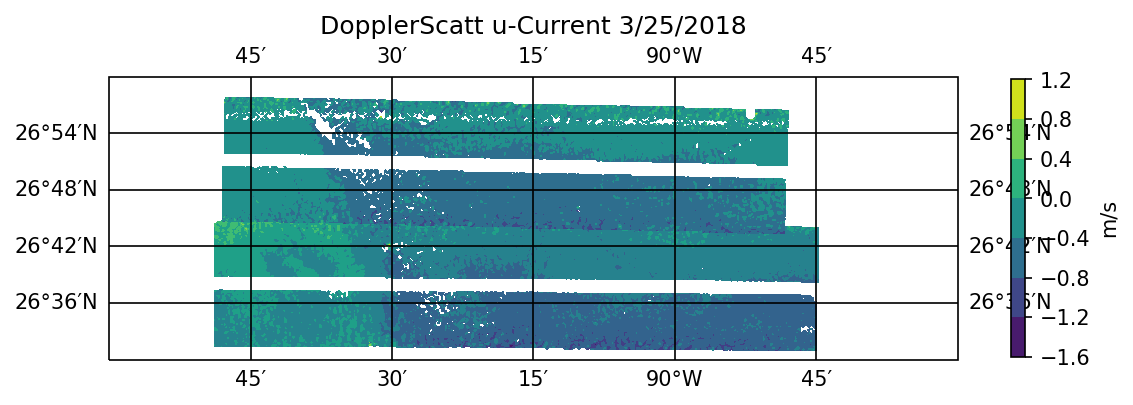

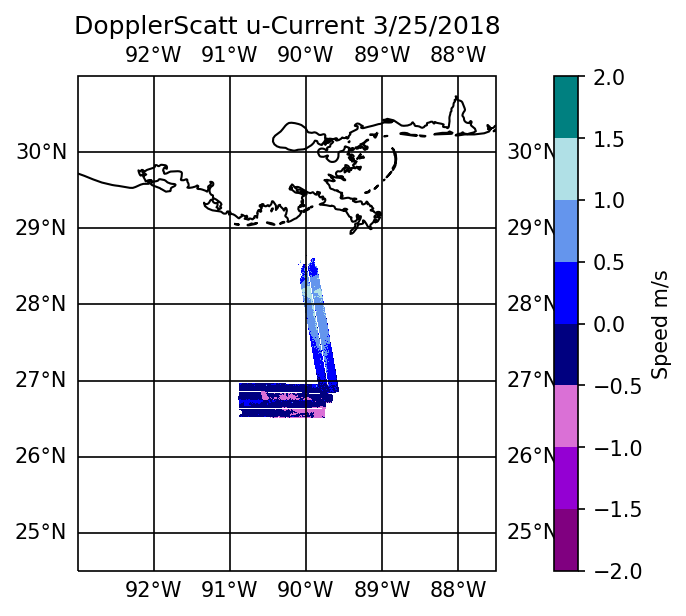

In [21]:

#-1.6 to 1.6 
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-91, -89.5, 26.5,27], crs=mapcrs)
ax.coastlines()
#cmaps = ('viridis', alpha=0.50)
#set color map to set bad value ('--') to 

#cs = ax.contourf(ds25_1.longitude.values, ds25_1.latitude.values, goodUarr25_1)
#ax.contour(ds25_1.longitude.values, ds25_1.latitude.values,  goodUarr25_1, colors = 'white', linewidths = 1, alpha=0.50, transform=ccrs.PlateCarree())
#cs = ax.contourf(ds25_2.longitude.values, ds25_2.latitude.values,  goodUarr25_2)
#ax.contour(ds25_2.longitude.values, ds25_2.latitude.values,  goodUarr25_2, colors = 'white', linewidths = 1, alpha=0.50, transform=ccrs.PlateCarree())
#cs = ax.contourf(ds25_3.longitude.values, ds25_3.latitude.values,  goodUarr25_3)
#ax.contour(ds25_3.longitude.values, ds25_3.latitude.values,  goodUarr25_3, colors = 'white', linewidths = 1, alpha=0.50, transform=ccrs.PlateCarree())
#cs = ax.contourf(ds25_4.longitude.values, ds25_4.latitude.values,  goodUarr25_4)
#ax.contour(ds25_4.longitude.values, ds25_4.latitude.values,  goodUarr25_4, colors = 'white', linewidths = 1, alpha=0.50, transform=ccrs.PlateCarree())
cs = ax.contourf(ds25_5.longitude.values, ds25_5.latitude.values,  goodUarr25_5)
#ax.contour(ds25_5.longitude.values, ds25_5.latitude.values,  goodUarr25_5, colors = 'white', linewidths = 1, alpha=0.50, transform=ccrs.PlateCarree())
cs = ax.contourf(ds25_6.longitude.values, ds25_6.latitude.values,  goodUarr25_6)
#ax.contour(ds25_6.longitude.values, ds25_6.latitude.values,  goodUarr25_6, colors = 'white', linewidths = 1, alpha=0.50, transform=ccrs.PlateCarree())
cs = ax.contourf(ds25_7.longitude.values, ds25_7.latitude.values,  goodUarr25_7)
#ax.contour(ds25_7.longitude.values, ds25_7.latitude.values,  goodUarr25_7, colors = 'white', linewidths = 1, alpha=0.50, transform=ccrs.PlateCarree())
#cs = ax.contourf(ds25_8.longitude.values, ds25_8.latitude.values,  goodUarr25_8)
#ax.contour(ds25_8.longitude.values, ds25_8.latitude.values,  goodUarr25_8, colors = 'white', linewidths = 1, alpha=0.50, transform=ccrs.PlateCarree())
#cs = ax.contourf(ds25_9.longitude.values, ds25_9.latitude.values,  goodUarr25_9)
#ax.contour(ds25_9.longitude.values, ds25_9.latitude.values,  goodUarr25_9, colors = 'white', linewidths = 1, alpha=0.50, transform=ccrs.PlateCarree())
#cs = ax.contourf(ds25_10.longitude.values, ds25_10.latitude.values,  goodUarr25_10)
#ax.contour(ds25_10.longitude.values, ds25_10.latitude.values,  goodUarr25_10, colors = 'white', linewidths = 1, alpha=0.50, transform=ccrs.PlateCarree())

PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('DopplerScatt u-Current 3/25/2018')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'DS25U_default_Flag.png',  bbox_inches = 'tight',dpi = 150)
plt.show()





#-1.2 to 1.2 
cmap = mpl.colors.ListedColormap(['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
bounds = [-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)


mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-93, -87.5, 24.5, 31], crs=mapcrs)
ax.coastlines()
cs = ax.contourf(ds25_1.longitude.values, ds25_1.latitude.values, goodUarr25_1, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_2.longitude.values, ds25_2.latitude.values, goodUarr25_2, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_3.longitude.values, ds25_3.latitude.values, goodUarr25_3, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_4.longitude.values, ds25_4.latitude.values, goodUarr25_4, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_5.longitude.values, ds25_5.latitude.values, goodUarr25_5, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_6.longitude.values, ds25_6.latitude.values, goodUarr25_6, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_7.longitude.values, ds25_7.latitude.values, goodUarr25_7, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_8.longitude.values, ds25_8.latitude.values, goodUarr25_8, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_9.longitude.values, ds25_9.latitude.values, goodUarr25_9, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_10.longitude.values, ds25_10.latitude.values, goodUarr25_10, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
PCM=ax.get_children()[2]

plt.colorbar(cs, ax=ax, cmap=cmap, norm=norm, ticks = bounds, spacing = 'proportional', label = 'Speed m/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('DopplerScatt u-Current 3/25/2018')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'DS25U_new_Flag.png', bbox_inches = 'tight',dpi = 150)
plt.show()


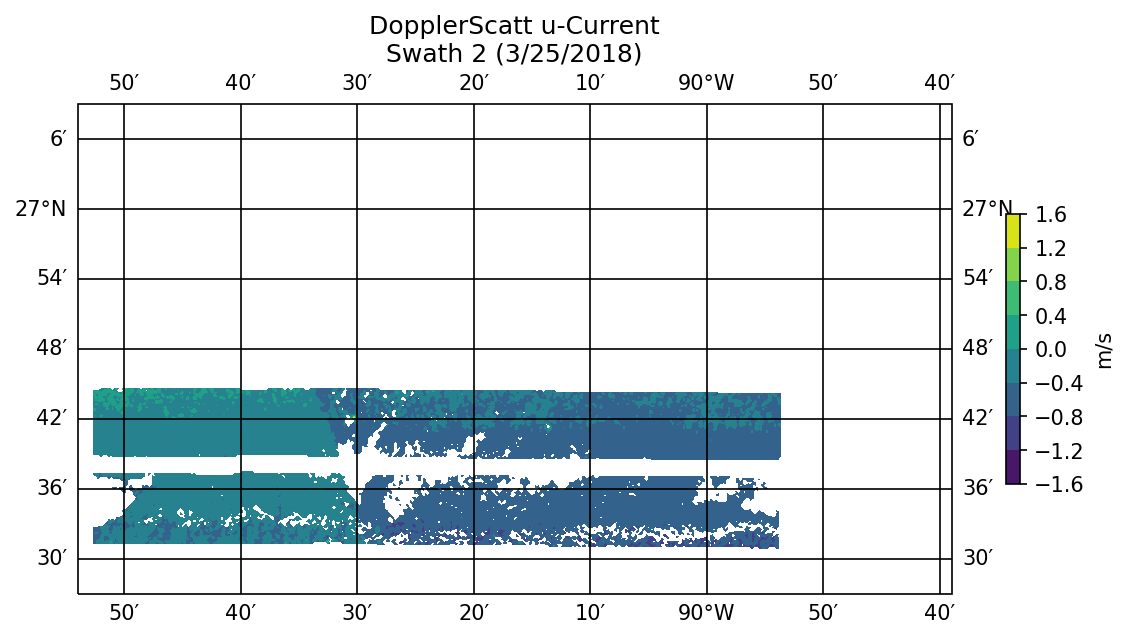

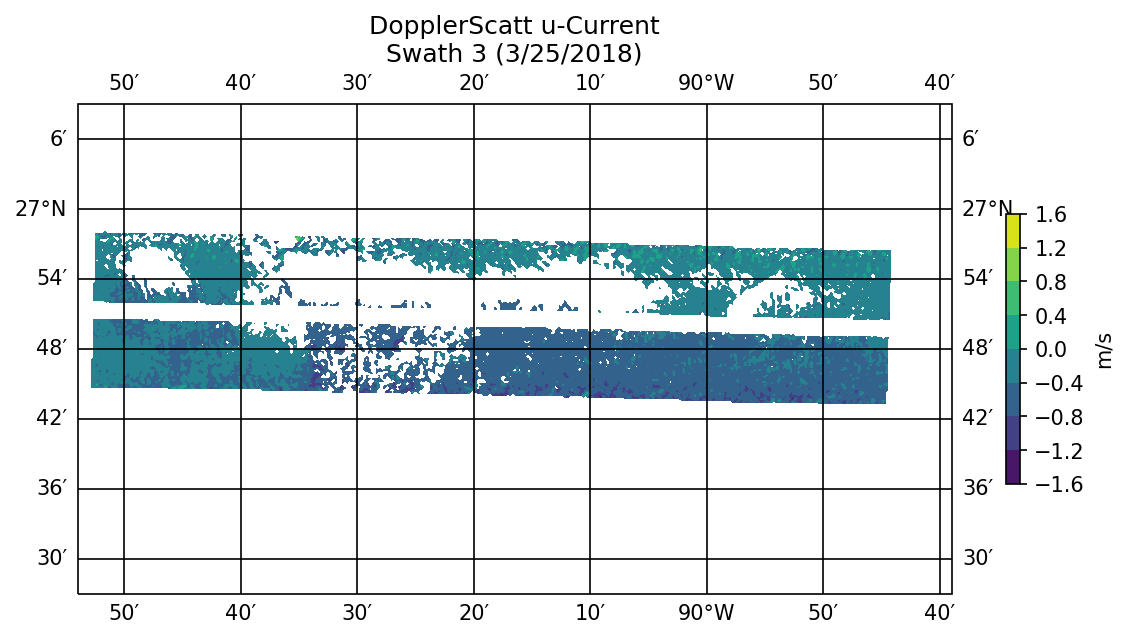

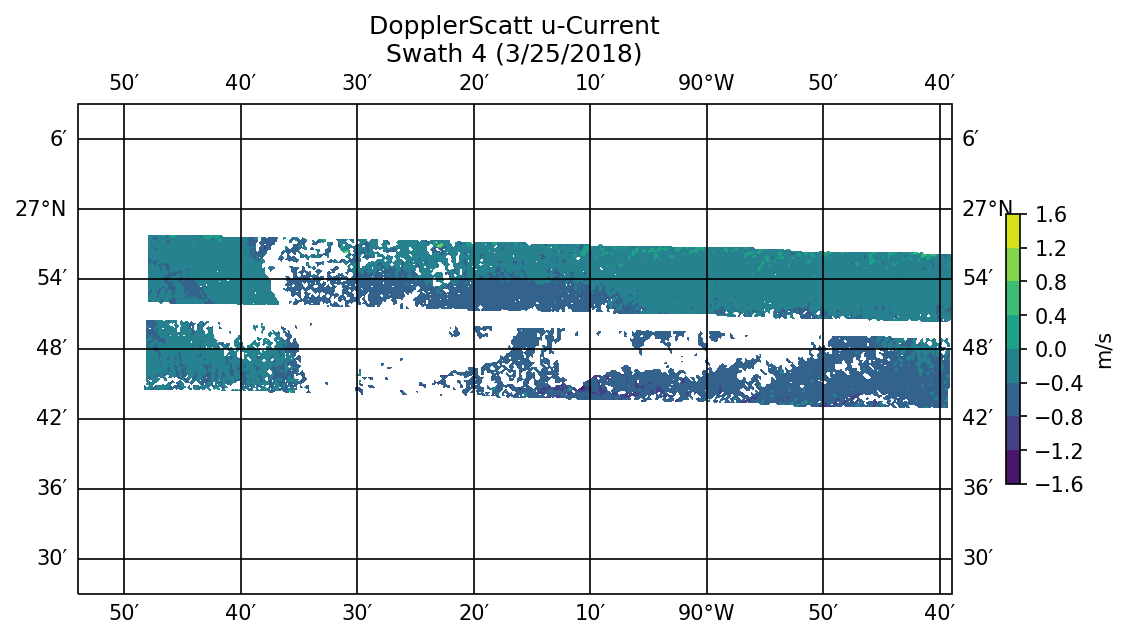

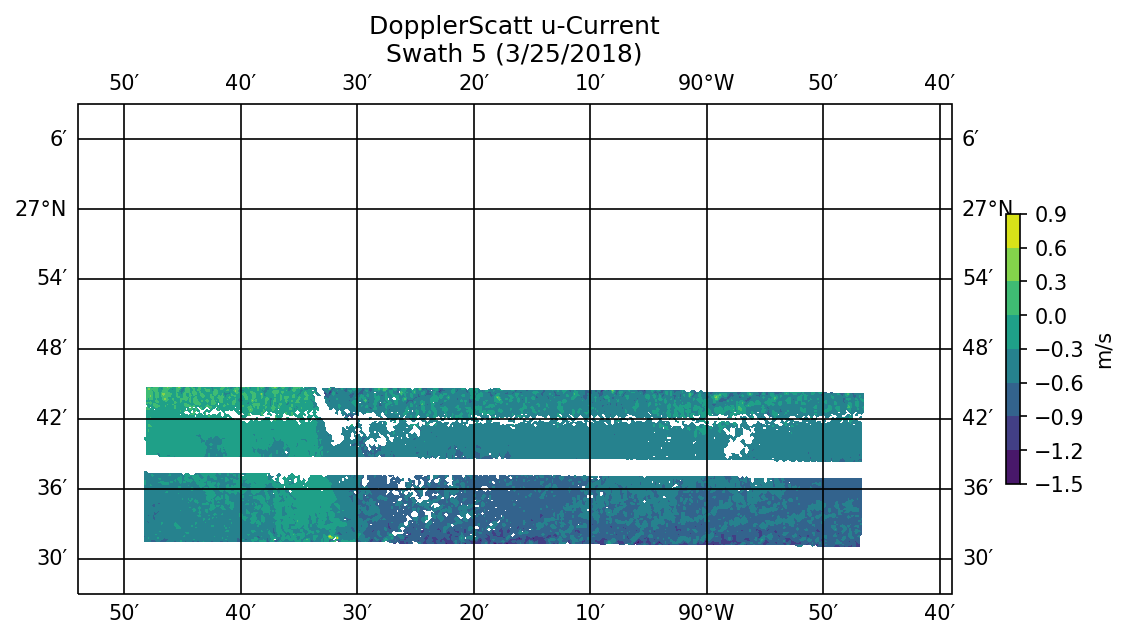

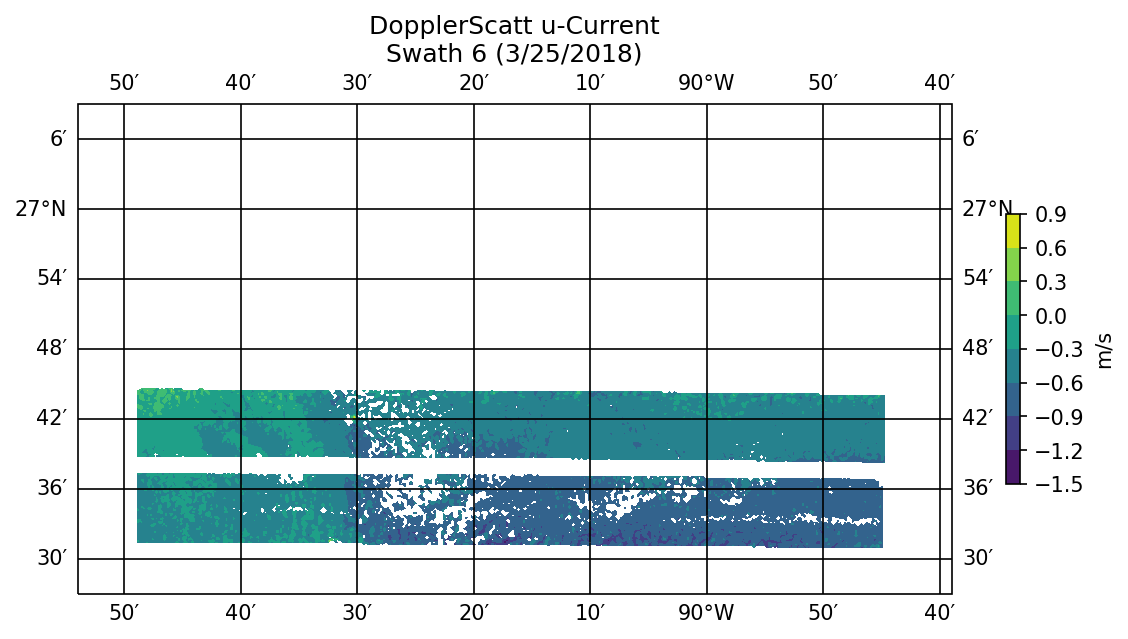

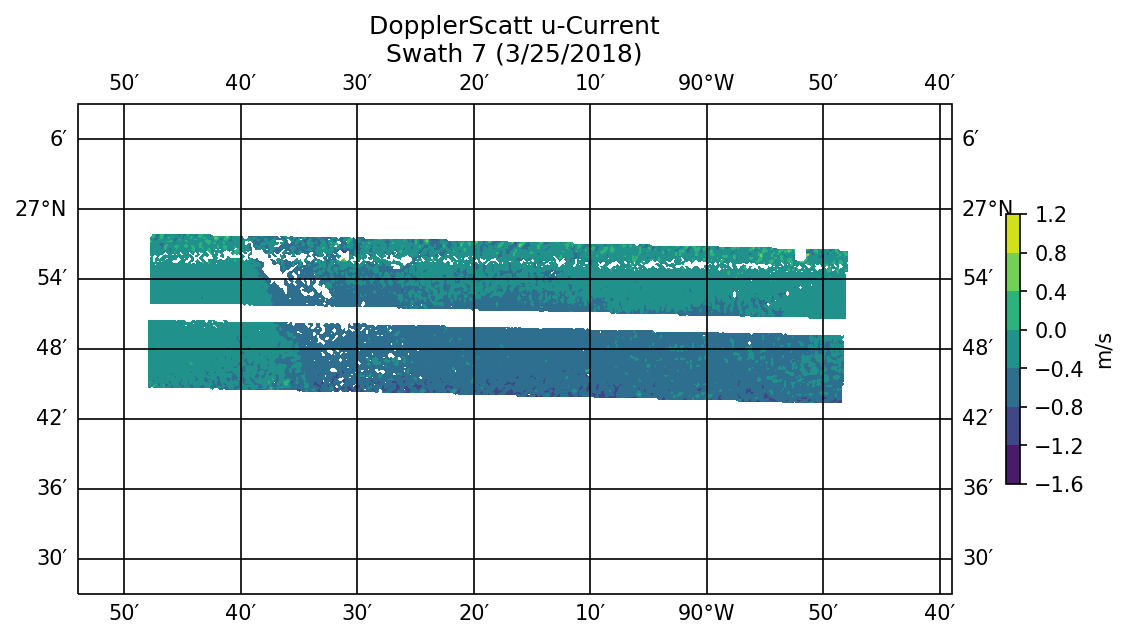

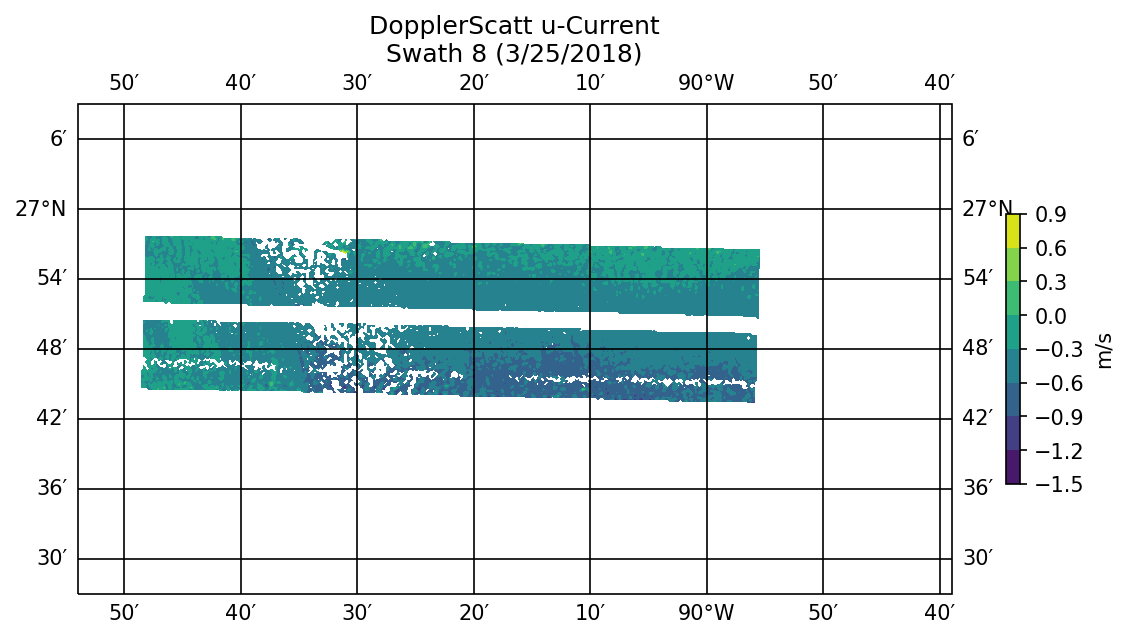

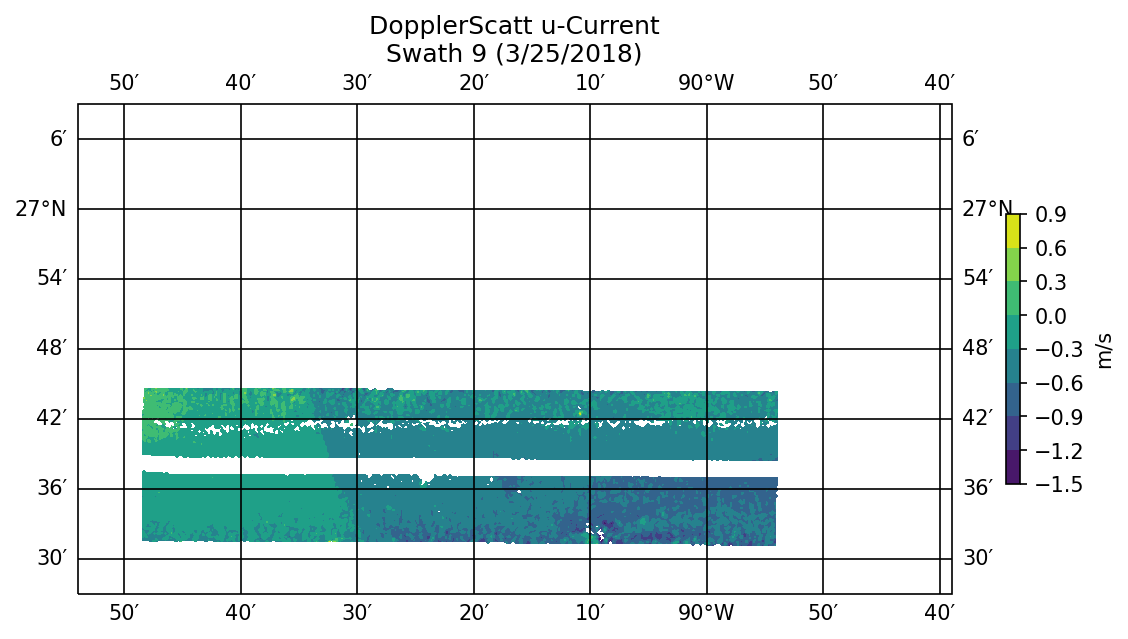

In [22]:

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-90.9, -89.65, 26.45, 27.15], crs=mapcrs)
ax.coastlines()
cs = ax.contourf(ds25_2.longitude.values, ds25_2.latitude.values,  goodUarr25_2)
#cs = ax.contourf(ds25_3.longitude.values, ds25_3.latitude.values,  goodUarr25_3)
#cs = ax.contourf(ds25_4.longitude.values, ds25_4.latitude.values,  goodUarr25_4)
#cs = ax.contourf(ds25_5.longitude.values, ds25_5.latitude.values,  goodUarr25_5)
#cs = ax.contourf(ds25_6.longitude.values, ds25_6.latitude.values,  goodUarr25_6)
#cs = ax.contourf(ds25_7.longitude.values, ds25_7.latitude.values,  goodUarr25_7)
#cs = ax.contourf(ds25_8.longitude.values, ds25_8.latitude.values,  goodUarr25_8)
#cs = ax.contourf(ds25_9.longitude.values, ds25_9.latitude.values,  goodUarr25_9)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('DopplerScatt u-Current\nSwath 2 (3/25/2018)')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'Swath2.png',  bbox_inches = 'tight',dpi = 150)
plt.show()


mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-90.9, -89.65, 26.45, 27.15], crs=mapcrs)
ax.coastlines()
#cs = ax.contourf(ds25_2.longitude.values, ds25_2.latitude.values,  goodUarr25_2)
cs = ax.contourf(ds25_3.longitude.values, ds25_3.latitude.values,  goodUarr25_3)
#cs = ax.contourf(ds25_4.longitude.values, ds25_4.latitude.values,  goodUarr25_4)
#cs = ax.contourf(ds25_5.longitude.values, ds25_5.latitude.values,  goodUarr25_5)
#cs = ax.contourf(ds25_6.longitude.values, ds25_6.latitude.values,  goodUarr25_6)
#cs = ax.contourf(ds25_7.longitude.values, ds25_7.latitude.values,  goodUarr25_7)
#cs = ax.contourf(ds25_8.longitude.values, ds25_8.latitude.values,  goodUarr25_8)
#cs = ax.contourf(ds25_9.longitude.values, ds25_9.latitude.values,  goodUarr25_9)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('DopplerScatt u-Current\nSwath 3 (3/25/2018)')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'Swath3.png',  bbox_inches = 'tight',dpi = 150)
plt.show()


mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-90.9, -89.65, 26.45, 27.15], crs=mapcrs)
ax.coastlines()
#cs = ax.contourf(ds25_2.longitude.values, ds25_2.latitude.values,  goodUarr25_2)
#s = ax.contourf(ds25_3.longitude.values, ds25_3.latitude.values,  goodUarr25_3)
cs = ax.contourf(ds25_4.longitude.values, ds25_4.latitude.values,  goodUarr25_4)
#cs = ax.contourf(ds25_5.longitude.values, ds25_5.latitude.values,  goodUarr25_5)
#cs = ax.contourf(ds25_6.longitude.values, ds25_6.latitude.values,  goodUarr25_6)
#cs = ax.contourf(ds25_7.longitude.values, ds25_7.latitude.values,  goodUarr25_7)
#cs = ax.contourf(ds25_8.longitude.values, ds25_8.latitude.values,  goodUarr25_8)
#cs = ax.contourf(ds25_9.longitude.values, ds25_9.latitude.values,  goodUarr25_9)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('DopplerScatt u-Current\nSwath 4 (3/25/2018)')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'Swath4.png',  bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-90.9, -89.65, 26.45, 27.15], crs=mapcrs)
ax.coastlines()
#cs = ax.contourf(ds25_2.longitude.values, ds25_2.latitude.values,  goodUarr25_2)
#s = ax.contourf(ds25_3.longitude.values, ds25_3.latitude.values,  goodUarr25_3)
#cs = ax.contourf(ds25_4.longitude.values, ds25_4.latitude.values,  goodUarr25_4)
cs = ax.contourf(ds25_5.longitude.values, ds25_5.latitude.values,  goodUarr25_5)
#cs = ax.contourf(ds25_6.longitude.values, ds25_6.latitude.values,  goodUarr25_6)
#cs = ax.contourf(ds25_7.longitude.values, ds25_7.latitude.values,  goodUarr25_7)
#cs = ax.contourf(ds25_8.longitude.values, ds25_8.latitude.values,  goodUarr25_8)
#cs = ax.contourf(ds25_9.longitude.values, ds25_9.latitude.values,  goodUarr25_9)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('DopplerScatt u-Current\nSwath 5 (3/25/2018)')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'Swath5.png',  bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-90.9, -89.65, 26.45, 27.15], crs=mapcrs)
ax.coastlines()
#cs = ax.contourf(ds25_2.longitude.values, ds25_2.latitude.values,  goodUarr25_2)
#s = ax.contourf(ds25_3.longitude.values, ds25_3.latitude.values,  goodUarr25_3)
#cs = ax.contourf(ds25_4.longitude.values, ds25_4.latitude.values,  goodUarr25_4)
#cs = ax.contourf(ds25_5.longitude.values, ds25_5.latitude.values,  goodUarr25_5)
cs = ax.contourf(ds25_6.longitude.values, ds25_6.latitude.values,  goodUarr25_6)
#cs = ax.contourf(ds25_7.longitude.values, ds25_7.latitude.values,  goodUarr25_7)
#cs = ax.contourf(ds25_8.longitude.values, ds25_8.latitude.values,  goodUarr25_8)
#cs = ax.contourf(ds25_9.longitude.values, ds25_9.latitude.values,  goodUarr25_9)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('DopplerScatt u-Current\nSwath 6 (3/25/2018)')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'Swath6.png',  bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-90.9, -89.65, 26.45, 27.15], crs=mapcrs)
ax.coastlines()
#cs = ax.contourf(ds25_2.longitude.values, ds25_2.latitude.values,  goodUarr25_2)
#s = ax.contourf(ds25_3.longitude.values, ds25_3.latitude.values,  goodUarr25_3)
#cs = ax.contourf(ds25_4.longitude.values, ds25_4.latitude.values,  goodUarr25_4)
#cs = ax.contourf(ds25_5.longitude.values, ds25_5.latitude.values,  goodUarr25_5)
#cs = ax.contourf(ds25_6.longitude.values, ds25_6.latitude.values,  goodUarr25_6)
cs = ax.contourf(ds25_7.longitude.values, ds25_7.latitude.values,  goodUarr25_7)
#cs = ax.contourf(ds25_8.longitude.values, ds25_8.latitude.values,  goodUarr25_8)
#cs = ax.contourf(ds25_9.longitude.values, ds25_9.latitude.values,  goodUarr25_9)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('DopplerScatt u-Current\nSwath 7 (3/25/2018)')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'Swath7.png',  bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-90.9, -89.65, 26.45, 27.15], crs=mapcrs)
ax.coastlines()
#cs = ax.contourf(ds25_2.longitude.values, ds25_2.latitude.values,  goodUarr25_2)
#s = ax.contourf(ds25_3.longitude.values, ds25_3.latitude.values,  goodUarr25_3)
#cs = ax.contourf(ds25_4.longitude.values, ds25_4.latitude.values,  goodUarr25_4)
#cs = ax.contourf(ds25_5.longitude.values, ds25_5.latitude.values,  goodUarr25_5)
#cs = ax.contourf(ds25_6.longitude.values, ds25_6.latitude.values,  goodUarr25_6)
#cs = ax.contourf(ds25_7.longitude.values, ds25_7.latitude.values,  goodUarr25_7)
cs = ax.contourf(ds25_8.longitude.values, ds25_8.latitude.values,  goodUarr25_8)
#cs = ax.contourf(ds25_9.longitude.values, ds25_9.latitude.values,  goodUarr25_9)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('DopplerScatt u-Current\nSwath 8 (3/25/2018)')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'Swath8.png',  bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-90.9, -89.65, 26.45, 27.15], crs=mapcrs)
ax.coastlines()
#cs = ax.contourf(ds25_2.longitude.values, ds25_2.latitude.values,  goodUarr25_2)
#s = ax.contourf(ds25_3.longitude.values, ds25_3.latitude.values,  goodUarr25_3)
#cs = ax.contourf(ds25_4.longitude.values, ds25_4.latitude.values,  goodUarr25_4)
#cs = ax.contourf(ds25_5.longitude.values, ds25_5.latitude.values,  goodUarr25_5)
#cs = ax.contourf(ds25_6.longitude.values, ds25_6.latitude.values,  goodUarr25_6)
#cs = ax.contourf(ds25_7.longitude.values, ds25_7.latitude.values,  goodUarr25_7)
#cs = ax.contourf(ds25_8.longitude.values, ds25_8.latitude.values,  goodUarr25_8)
cs = ax.contourf(ds25_9.longitude.values, ds25_9.latitude.values,  goodUarr25_9)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('DopplerScatt u-Current\nSwath 9 (3/25/2018)')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'Swath9.png',  bbox_inches = 'tight',dpi = 150)
plt.show()

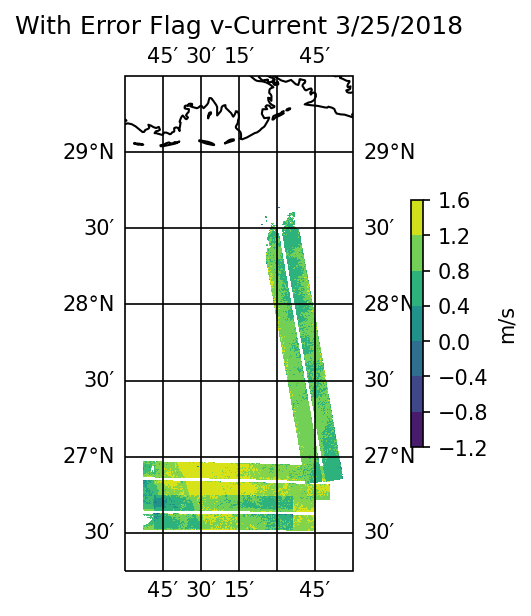

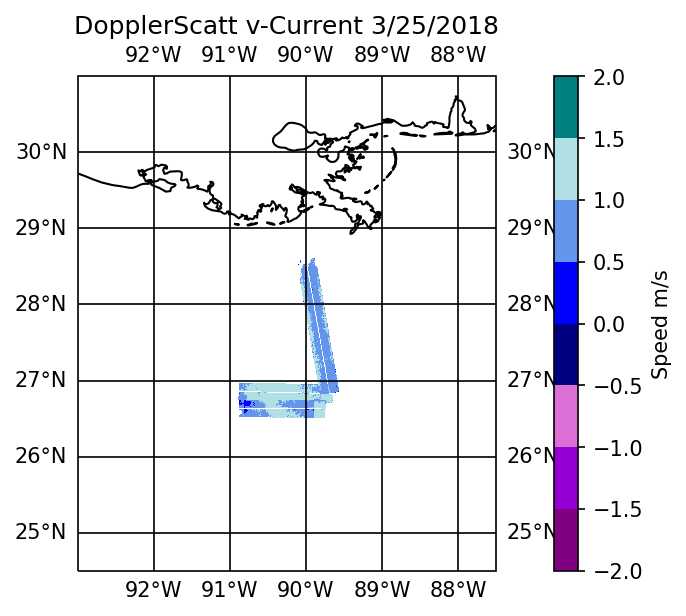

In [24]:
#-1.2 to 1.2 
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-91, -89.5, 26.25, 29.5], crs=mapcrs)
#ax.set_extent([-93, -87.5, 24.5, 31], crs=mapcrs)
ax.coastlines()
#cmaps = ('viridis', alpha=0.50)
#set color map to set bad value ('--') to 

cs = ax.contourf(ds25_1.longitude.values, ds25_1.latitude.values, goodVarr25_1)
#ax.contour(ds25_1.longitude.values, ds25_1.latitude.values,  goodUarr25_1, colors = 'white', linewidths = 1, alpha=0.50, transform=ccrs.PlateCarree())
cs = ax.contourf(ds25_2.longitude.values, ds25_2.latitude.values,  goodVarr25_2)
#ax.contour(ds25_2.longitude.values, ds25_2.latitude.values,  goodUarr25_2, colors = 'white', linewidths = 1, alpha=0.50, transform=ccrs.PlateCarree())
cs = ax.contourf(ds25_3.longitude.values, ds25_3.latitude.values,  goodVarr25_3)
#ax.contour(ds25_3.longitude.values, ds25_3.latitude.values,  goodUarr25_3, colors = 'white', linewidths = 1, alpha=0.50, transform=ccrs.PlateCarree())
cs = ax.contourf(ds25_4.longitude.values, ds25_4.latitude.values,  goodVarr25_4)
#ax.contour(ds25_4.longitude.values, ds25_4.latitude.values,  goodUarr25_4, colors = 'white', linewidths = 1, alpha=0.50, transform=ccrs.PlateCarree())
cs = ax.contourf(ds25_5.longitude.values, ds25_5.latitude.values,  goodVarr25_5)
#ax.contour(ds25_5.longitude.values, ds25_5.latitude.values,  goodUarr25_5, colors = 'white', linewidths = 1, alpha=0.50, transform=ccrs.PlateCarree())
cs = ax.contourf(ds25_6.longitude.values, ds25_6.latitude.values,  goodVarr25_6)
#ax.contour(ds25_6.longitude.values, ds25_6.latitude.values,  goodUarr25_6, colors = 'white', linewidths = 1, alpha=0.50, transform=ccrs.PlateCarree())
cs = ax.contourf(ds25_7.longitude.values, ds25_7.latitude.values,  goodVarr25_7)
#ax.contour(ds25_7.longitude.values, ds25_7.latitude.values,  goodUarr25_7, colors = 'white', linewidths = 1, alpha=0.50, transform=ccrs.PlateCarree())
cs = ax.contourf(ds25_8.longitude.values, ds25_8.latitude.values,  goodVarr25_8)
#ax.contour(ds25_8.longitude.values, ds25_8.latitude.values,  goodUarr25_8, colors = 'white', linewidths = 1, alpha=0.50, transform=ccrs.PlateCarree())
cs = ax.contourf(ds25_9.longitude.values, ds25_9.latitude.values,  goodVarr25_9)
#ax.contour(ds25_9.longitude.values, ds25_9.latitude.values,  goodUarr25_9, colors = 'white', linewidths = 1, alpha=0.50, transform=ccrs.PlateCarree())
cs = ax.contourf(ds25_10.longitude.values, ds25_10.latitude.values,  goodVarr25_10)
#ax.contour(ds25_10.longitude.values, ds25_10.latitude.values,  goodUarr25_10, colors = 'white', linewidths = 1, alpha=0.50, transform=ccrs.PlateCarree())

PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('With Error Flag v-Current 3/25/2018')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'DS25V_default_Flag.png',  bbox_inches = 'tight',dpi = 150)
plt.show()



cmap = mpl.colors.ListedColormap(['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
bounds = [-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2]
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
#ax.set_extent([-91, -89.5, 26.25, 29.5], crs=mapcrs)
ax.set_extent([-93, -87.5, 24.5, 31], crs=mapcrs)
ax.coastlines()
cs = ax.contourf(ds25_1.longitude.values, ds25_1.latitude.values, goodVarr25_1, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_2.longitude.values, ds25_2.latitude.values, goodVarr25_2, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_3.longitude.values, ds25_3.latitude.values, goodVarr25_3, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_4.longitude.values, ds25_4.latitude.values, goodVarr25_4, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_5.longitude.values, ds25_5.latitude.values, goodVarr25_5, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_6.longitude.values, ds25_6.latitude.values, goodVarr25_6, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_7.longitude.values, ds25_7.latitude.values, goodVarr25_7, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_8.longitude.values, ds25_8.latitude.values, goodVarr25_8, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_9.longitude.values, ds25_9.latitude.values, goodVarr25_9, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_10.longitude.values, ds25_10.latitude.values, goodVarr25_10, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
PCM=ax.get_children()[2]

plt.colorbar(cs, ax=ax, cmap=cmap, norm=norm, ticks = bounds, spacing = 'proportional', label = 'Speed m/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('DopplerScatt v-Current 3/25/2018')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'DS25V_new_Flag.png',  bbox_inches = 'tight',dpi = 150)
plt.show()


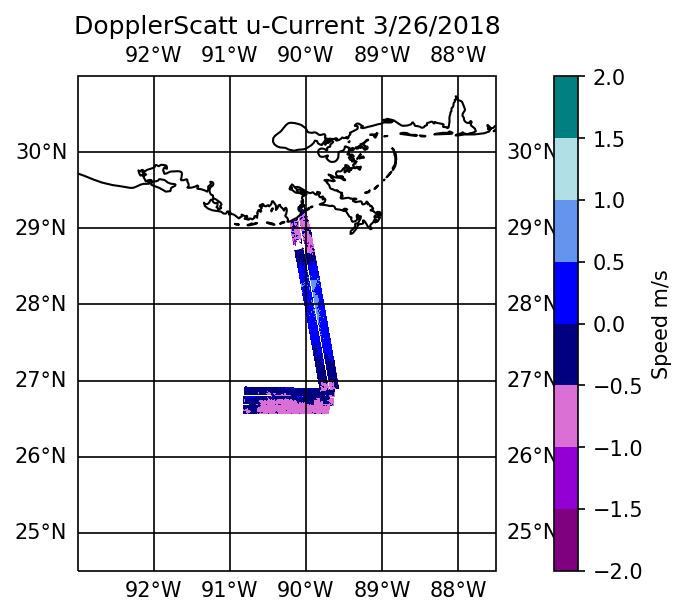

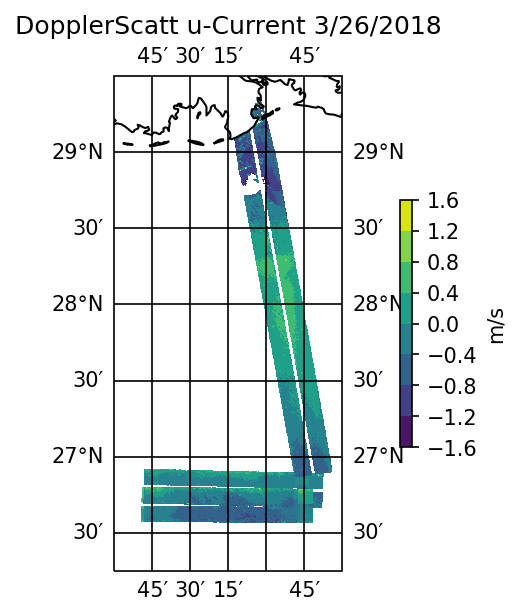

In [25]:
#-1.6 to 1.6 

cmap = mpl.colors.ListedColormap(['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
bounds = [-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2]
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-93, -87.5, 24.5, 31], crs=mapcrs)
ax.coastlines()
cs = ax.contourf(ds26_1.longitude.values, ds26_1.latitude.values, goodUarr26_1, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_2.longitude.values, ds26_2.latitude.values, goodUarr26_2, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_3.longitude.values, ds26_3.latitude.values, goodUarr26_3, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_4.longitude.values, ds26_4.latitude.values, goodUarr26_4, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_5.longitude.values, ds26_5.latitude.values, goodUarr26_5, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_6.longitude.values, ds26_6.latitude.values, goodUarr26_6, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_7.longitude.values, ds26_7.latitude.values, goodUarr26_7, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_8.longitude.values, ds26_8.latitude.values, goodUarr26_8, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_9.longitude.values, ds26_9.latitude.values, goodUarr26_9, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_10.longitude.values, ds26_10.latitude.values, goodUarr26_10, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_11.longitude.values, ds26_11.latitude.values, goodUarr26_11, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
PCM=ax.get_children()[2]

plt.colorbar(cs, ax=ax, cmap=cmap, norm=norm, ticks = bounds, spacing = 'proportional', label = 'Speed m/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('DopplerScatt u-Current 3/26/2018')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'DS26U_new_Flag.png', bbox_inches = 'tight', dpi = 150)
plt.show()


mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-91, -89.5, 26.25, 29.5], crs=mapcrs)
ax.coastlines()

cs = ax.contourf(ds26_1.longitude.values, ds26_1.latitude.values, goodUarr26_1)
cs = ax.contourf(ds26_2.longitude.values, ds26_2.latitude.values,  goodUarr26_2)
cs = ax.contourf(ds26_3.longitude.values, ds26_3.latitude.values,  goodUarr26_3)
cs = ax.contourf(ds26_4.longitude.values, ds26_4.latitude.values,  goodUarr26_4)
cs = ax.contourf(ds26_5.longitude.values, ds26_5.latitude.values,  goodUarr26_5)
cs = ax.contourf(ds26_6.longitude.values, ds26_6.latitude.values,  goodUarr26_6)
cs = ax.contourf(ds26_7.longitude.values, ds26_7.latitude.values,  goodUarr26_7)
cs = ax.contourf(ds26_8.longitude.values, ds26_8.latitude.values,  goodUarr26_8)
cs = ax.contourf(ds26_9.longitude.values, ds26_9.latitude.values,  goodUarr26_9)
cs = ax.contourf(ds26_10.longitude.values, ds26_10.latitude.values,  goodUarr26_10)
cs = ax.contourf(ds26_11.longitude.values, ds26_11.latitude.values,  goodUarr26_11)

PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('DopplerScatt u-Current 3/26/2018')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'DS26U_default_Flag.png',  bbox_inches = 'tight',dpi = 150)
plt.show()

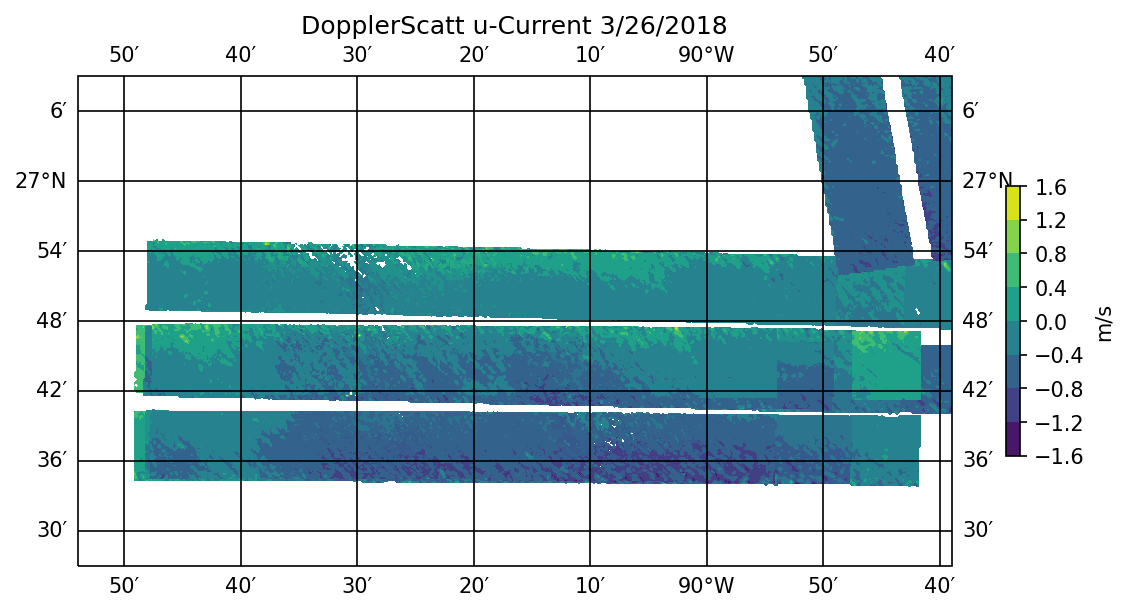

In [26]:
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-90.9, -89.65, 26.45, 27.15], crs=mapcrs)
ax.coastlines()

cs = ax.contourf(ds26_1.longitude.values, ds26_1.latitude.values, goodUarr26_1)
cs = ax.contourf(ds26_2.longitude.values, ds26_2.latitude.values,  goodUarr26_2)
cs = ax.contourf(ds26_3.longitude.values, ds26_3.latitude.values,  goodUarr26_3)
cs = ax.contourf(ds26_4.longitude.values, ds26_4.latitude.values,  goodUarr26_4)
cs = ax.contourf(ds26_5.longitude.values, ds26_5.latitude.values,  goodUarr26_5)
cs = ax.contourf(ds26_6.longitude.values, ds26_6.latitude.values,  goodUarr26_6)
cs = ax.contourf(ds26_7.longitude.values, ds26_7.latitude.values,  goodUarr26_7)
cs = ax.contourf(ds26_8.longitude.values, ds26_8.latitude.values,  goodUarr26_8)
cs = ax.contourf(ds26_9.longitude.values, ds26_9.latitude.values,  goodUarr26_9)
cs = ax.contourf(ds26_10.longitude.values, ds26_10.latitude.values,  goodUarr26_10)
cs = ax.contourf(ds26_11.longitude.values, ds26_11.latitude.values,  goodUarr26_11)

PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('DopplerScatt u-Current 3/26/2018')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'DS26U_default_Flag.png',  bbox_inches = 'tight',dpi = 150)
plt.show()

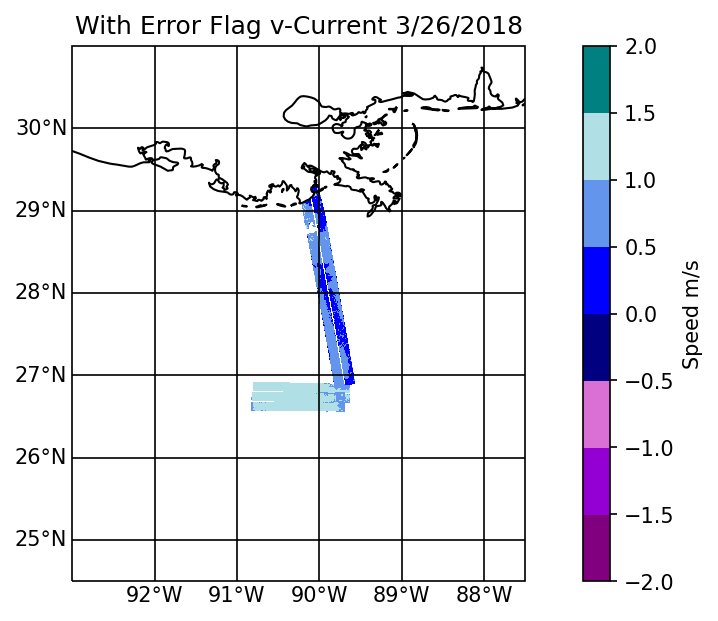

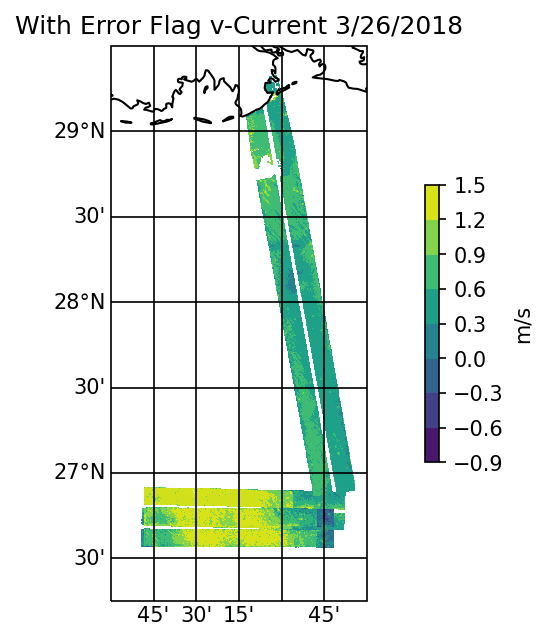

In [23]:
#-0.9 to 1.5

cmap = mpl.colors.ListedColormap(['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
bounds = [-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2]
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-93, -87.5, 24.5, 31], crs=mapcrs)
ax.coastlines()
cs = ax.contourf(ds26_1.longitude.values, ds26_1.latitude.values, goodVarr26_1, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_2.longitude.values, ds26_2.latitude.values, goodVarr26_2, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_3.longitude.values, ds26_3.latitude.values, goodVarr26_3, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_4.longitude.values, ds26_4.latitude.values, goodVarr26_4, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_5.longitude.values, ds26_5.latitude.values, goodVarr26_5, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_6.longitude.values, ds26_6.latitude.values, goodVarr26_6, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_7.longitude.values, ds26_7.latitude.values, goodVarr26_7, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_8.longitude.values, ds26_8.latitude.values, goodVarr26_8, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_9.longitude.values, ds26_9.latitude.values, goodVarr26_9, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_10.longitude.values, ds26_10.latitude.values, goodVarr26_10, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_11.longitude.values, ds26_11.latitude.values, goodVarr26_11, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
PCM=ax.get_children()[2]

plt.colorbar(cs, ax=ax, cmap=cmap, norm=norm, ticks = bounds, spacing = 'proportional', label = 'Speed m/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('With Error Flag v-Current 3/26/2018')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'DS26V_new_Flag.png',  bbox_inches = 'tight',dpi = 150)
plt.show()


mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-91, -89.5, 26.25, 29.5], crs=mapcrs)
ax.coastlines()

cs = ax.contourf(ds26_1.longitude.values, ds26_1.latitude.values, goodVarr26_1)
cs = ax.contourf(ds26_2.longitude.values, ds26_2.latitude.values,  goodVarr26_2)
cs = ax.contourf(ds26_3.longitude.values, ds26_3.latitude.values,  goodVarr26_3)
cs = ax.contourf(ds26_4.longitude.values, ds26_4.latitude.values,  goodVarr26_4)
cs = ax.contourf(ds26_5.longitude.values, ds26_5.latitude.values,  goodVarr26_5)
cs = ax.contourf(ds26_6.longitude.values, ds26_6.latitude.values,  goodVarr26_6)
cs = ax.contourf(ds26_7.longitude.values, ds26_7.latitude.values,  goodVarr26_7)
cs = ax.contourf(ds26_8.longitude.values, ds26_8.latitude.values,  goodVarr26_8)
cs = ax.contourf(ds26_9.longitude.values, ds26_9.latitude.values,  goodVarr26_9)
cs = ax.contourf(ds26_10.longitude.values, ds26_10.latitude.values,  goodVarr26_10)
cs = ax.contourf(ds26_11.longitude.values, ds26_11.latitude.values,  goodVarr26_11)

PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('With Error Flag v-Current 3/26/2018')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'DS26V_default_Flag.png',  bbox_inches = 'tight',dpi = 150)
plt.show()

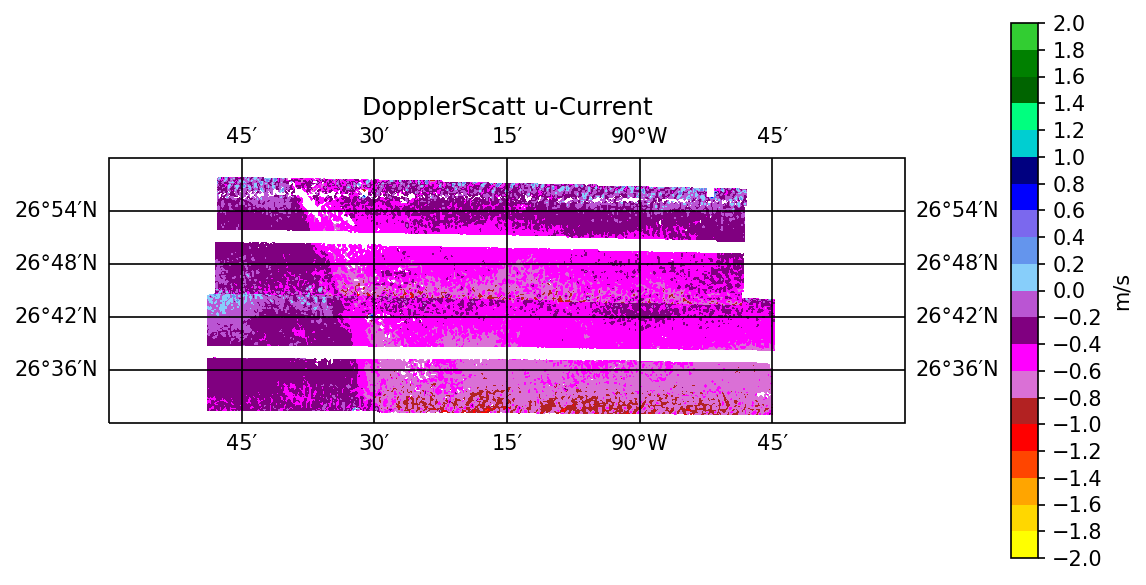

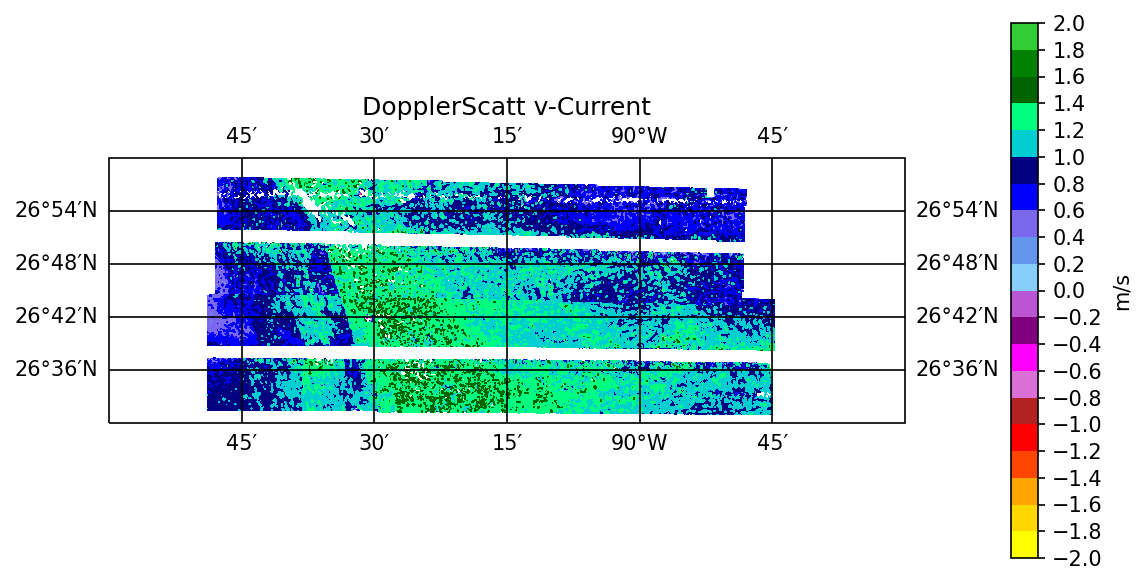

"\n\ncmap = mpl.colors.ListedColormap(['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal', 'forestgreen', 'limegreen', \n                                  'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 'peru', 'lightcoral', 'coral', 'red', 'maroon' ])\nbounds = [-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2]\nmapcrs = ccrs.PlateCarree()\nfig = plt.figure(figsize=(8, 4), dpi=150)\nax = fig.add_subplot(111, projection=mapcrs)\nax.set_extent([-91, -89.5, 26.5, 27], crs=mapcrs)\nax.coastlines()\ncs = ax.contourf(ds26_1.longitude.values, ds26_1.latitude.values, goodUarr26_1, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',\n                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', \n                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ]

In [29]:
#Zoomed in current plots 

cmap = mpl.colors.ListedColormap(['yellow', 'gold', 'orange', 'orangered', 'red', 'firebrick', 'orchid', 'magenta', 'purple',
                                  'mediumorchid', 'lightskyblue', 'cornflowerblue', 'mediumslateblue', 'blue', 'navy', 'darkturquoise', 
                                  'springgreen', 'darkgreen', 'green', 'limegreen']) 
#bounds = [-2, -1.75, -1.5, -1.25, -1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]
bounds = [-2, -1.8, -1.6, -1.4, -1.2, -1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)


mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-91, -89.5, 26.5, 27], crs=mapcrs)
ax.coastlines()
#cs = ax.contourf(ds25_1.longitude.values, ds25_1.latitude.values, goodUarr25_1, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
#                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
#                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
#cs = ax.contourf(ds25_2.longitude.values, ds25_2.latitude.values, goodUarr25_2, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
#                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
#                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
#cs = ax.contourf(ds25_3.longitude.values, ds25_3.latitude.values, goodUarr25_3, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
#                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
#                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
#cs = ax.contourf(ds25_4.longitude.values, ds25_4.latitude.values, goodUarr25_4, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
#                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
#                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_5.longitude.values, ds25_5.latitude.values, goodUarr25_5, levels= bounds, colors = ['yellow', 'gold', 'orange', 'orangered', 'red', 'firebrick', 'orchid', 'magenta', 'purple',
                                  'mediumorchid', 'lightskyblue', 'cornflowerblue', 'mediumslateblue', 'blue', 'navy', 'darkturquoise', 
                                  'springgreen', 'darkgreen', 'green', 'limegreen']) 
cs = ax.contourf(ds25_6.longitude.values, ds25_6.latitude.values, goodUarr25_6, levels= bounds, colors = ['yellow', 'gold', 'orange', 'orangered', 'red', 'firebrick', 'orchid', 'magenta', 'purple',
                                  'mediumorchid', 'lightskyblue', 'cornflowerblue', 'mediumslateblue', 'blue', 'navy', 'darkturquoise', 
                                  'springgreen', 'darkgreen', 'green', 'limegreen']) 
cs = ax.contourf(ds25_7.longitude.values, ds25_7.latitude.values, goodUarr25_7, levels= bounds, colors = ['yellow', 'gold', 'orange', 'orangered', 'red', 'firebrick', 'orchid', 'magenta', 'purple',
                                  'mediumorchid', 'lightskyblue', 'cornflowerblue', 'mediumslateblue', 'blue', 'navy', 'darkturquoise', 
                                  'springgreen', 'darkgreen', 'green', 'limegreen']) 
#cs = ax.contourf(ds25_8.longitude.values, ds25_8.latitude.values, goodUarr25_8, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
#                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
#                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
#cs = ax.contourf(ds25_9.longitude.values, ds25_9.latitude.values, goodUarr25_9, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
#                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
#                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
#cs = ax.contourf(ds25_10.longitude.values, ds25_10.latitude.values, goodUarr25_10, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
#                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
#                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
PCM=ax.get_children()[2]

plt.colorbar(cs, ax=ax, cmap=cmap, norm=norm, pad = 0.1, ticks = bounds, spacing = 'proportional', label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('DopplerScatt u-Current')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'zoom_DS25U_new_Flag.png', bbox_inches = 'tight',dpi = 150)
plt.show()


cmap = mpl.colors.ListedColormap(['yellow', 'gold', 'orange', 'orangered', 'red', 'firebrick', 'orchid', 'magenta', 'purple',
                                  'mediumorchid', 'lightskyblue', 'cornflowerblue', 'mediumslateblue', 'blue', 'navy', 'darkturquoise', 
                                  'springgreen', 'darkgreen', 'green', 'limegreen']) 
bounds = [-2, -1.8, -1.6, -1.4, -1.2, -1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-91, -89.5, 26.5, 27], crs=mapcrs)
ax.coastlines()
#cs = ax.contourf(ds25_1.longitude.values, ds25_1.latitude.values, goodVarr25_1, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
#                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
#                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
#cs = ax.contourf(ds25_2.longitude.values, ds25_2.latitude.values, goodVarr25_2, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
#                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
#                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
#cs = ax.contourf(ds25_3.longitude.values, ds25_3.latitude.values, goodVarr25_3, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
#                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
#                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
#cs = ax.contourf(ds25_4.longitude.values, ds25_4.latitude.values, goodVarr25_4, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
#                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
#                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_5.longitude.values, ds25_5.latitude.values, goodVarr25_5, levels= bounds, colors = ['yellow', 'gold', 'orange', 'orangered', 'red', 'firebrick', 'orchid', 'magenta', 'purple',
                                  'mediumorchid', 'lightskyblue', 'cornflowerblue', 'mediumslateblue', 'blue', 'navy', 'darkturquoise', 
                                  'springgreen', 'darkgreen', 'green', 'limegreen']) 
cs = ax.contourf(ds25_6.longitude.values, ds25_6.latitude.values, goodVarr25_6, levels= bounds, colors = ['yellow', 'gold', 'orange', 'orangered', 'red', 'firebrick', 'orchid', 'magenta', 'purple',
                                  'mediumorchid', 'lightskyblue', 'cornflowerblue', 'mediumslateblue', 'blue', 'navy', 'darkturquoise', 
                                  'springgreen', 'darkgreen', 'green', 'limegreen']) 
cs = ax.contourf(ds25_7.longitude.values, ds25_7.latitude.values, goodVarr25_7, levels= bounds, colors = ['yellow', 'gold', 'orange', 'orangered', 'red', 'firebrick', 'orchid', 'magenta', 'purple',
                                  'mediumorchid', 'lightskyblue', 'cornflowerblue', 'mediumslateblue', 'blue', 'navy', 'darkturquoise', 
                                  'springgreen', 'darkgreen', 'green', 'limegreen']) 
#cs = ax.contourf(ds25_8.longitude.values, ds25_8.latitude.values, goodVarr25_8, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
#                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
#                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
#cs = ax.contourf(ds25_9.longitude.values, ds25_9.latitude.values, goodVarr25_9, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
#                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
#                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
#cs = ax.contourf(ds25_10.longitude.values, ds25_10.latitude.values, goodVarr25_10, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
#                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
#                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
PCM=ax.get_children()[2]

plt.colorbar(cs, ax=ax, cmap=cmap, norm=norm, pad =0.1, ticks = bounds, spacing = 'proportional', label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('DopplerScatt v-Current')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'zoom_DS25V_new_Flag.png',  bbox_inches = 'tight',dpi = 150)
plt.show()

'''

cmap = mpl.colors.ListedColormap(['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
bounds = [-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2]
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-91, -89.5, 26.5, 27], crs=mapcrs)
ax.coastlines()
cs = ax.contourf(ds26_1.longitude.values, ds26_1.latitude.values, goodUarr26_1, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_2.longitude.values, ds26_2.latitude.values, goodUarr26_2, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_3.longitude.values, ds26_3.latitude.values, goodUarr26_3, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_4.longitude.values, ds26_4.latitude.values, goodUarr26_4, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_5.longitude.values, ds26_5.latitude.values, goodUarr26_5, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_6.longitude.values, ds26_6.latitude.values, goodUarr26_6, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_7.longitude.values, ds26_7.latitude.values, goodUarr26_7, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_8.longitude.values, ds26_8.latitude.values, goodUarr26_8, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_9.longitude.values, ds26_9.latitude.values, goodUarr26_9, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_10.longitude.values, ds26_10.latitude.values, goodUarr26_10, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_11.longitude.values, ds26_11.latitude.values, goodUarr26_11, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
PCM=ax.get_children()[2]

plt.colorbar(cs, ax=ax, cmap=cmap, norm=norm, ticks = bounds, spacing = 'proportional', label = 'Speed m/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('DopplerScatt u-Current 3/26/2018')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'zoom_DS26U_new_Flag.png', bbox_inches = 'tight', dpi = 150)
plt.show()


cmap = mpl.colors.ListedColormap(['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
bounds = [-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2]
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-91, -89.5, 26.5, 27], crs=mapcrs)
ax.coastlines()
cs = ax.contourf(ds26_1.longitude.values, ds26_1.latitude.values, goodVarr26_1, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_2.longitude.values, ds26_2.latitude.values, goodVarr26_2, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_3.longitude.values, ds26_3.latitude.values, goodVarr26_3, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_4.longitude.values, ds26_4.latitude.values, goodVarr26_4, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_5.longitude.values, ds26_5.latitude.values, goodVarr26_5, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_6.longitude.values, ds26_6.latitude.values, goodVarr26_6, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_7.longitude.values, ds26_7.latitude.values, goodVarr26_7, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_8.longitude.values, ds26_8.latitude.values, goodVarr26_8, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_9.longitude.values, ds26_9.latitude.values, goodVarr26_9, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_10.longitude.values, ds26_10.latitude.values, goodVarr26_10, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_11.longitude.values, ds26_11.latitude.values, goodVarr26_11, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
PCM=ax.get_children()[2]

plt.colorbar(cs, ax=ax, cmap=cmap, norm=norm, ticks = bounds, spacing = 'proportional', label = 'Speed m/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('DopplerScatt v-Current 3/26/2018')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'zoom_DS26V_new_Flag.png',  bbox_inches = 'tight',dpi = 150)
plt.show()
'''

In [31]:
#wind components 
speed25_1 = ds25_1.wind_speed.values
dir25_1 = ds25_1.wind_dir.values
speed25_2 = ds25_2.wind_speed.values
dir25_2 = ds25_2.wind_dir.values
speed25_3 = ds25_3.wind_speed.values
dir25_3 = ds25_3.wind_dir.values
speed25_4 = ds25_4.wind_speed.values
dir25_4 = ds25_4.wind_dir.values
speed25_5 = ds25_5.wind_speed.values
dir25_5 = ds25_5.wind_dir.values
speed25_6 = ds25_6.wind_speed.values
dir25_6 = ds25_6.wind_dir.values
speed25_7 = ds25_7.wind_speed.values
dir25_7 = ds25_7.wind_dir.values
speed25_8 = ds25_8.wind_speed.values
dir25_8 = ds25_8.wind_dir.values
speed25_9 = ds25_9.wind_speed.values
dir25_9 = ds25_9.wind_dir.values
speed25_10 = ds25_10.wind_speed.values
dir25_10 = ds25_10.wind_dir.values

speed26_1 = ds26_1.wind_speed.values
dir26_1 = ds26_1.wind_dir.values
speed26_2 = ds26_2.wind_speed.values
dir26_2 = ds26_2.wind_dir.values
speed26_3 = ds26_3.wind_speed.values
dir26_3 = ds26_3.wind_dir.values
speed26_4 = ds26_4.wind_speed.values
dir26_4 = ds26_4.wind_dir.values
speed26_5 = ds26_5.wind_speed.values
dir26_5 = ds26_5.wind_dir.values
speed26_6 = ds26_6.wind_speed.values
dir26_6 = ds26_6.wind_dir.values
speed26_7 = ds26_7.wind_speed.values
dir26_7 = ds26_7.wind_dir.values
speed26_8 = ds26_8.wind_speed.values
dir26_8 = ds26_8.wind_dir.values
speed26_9 = ds26_9.wind_speed.values
dir26_9 = ds26_9.wind_dir.values
speed26_10 = ds26_10.wind_speed.values
dir26_10 = ds26_10.wind_dir.values
speed26_11 = ds26_11.wind_speed.values
dir26_11 = ds26_11.wind_dir.values

print('test dir:', dir25_1[200,150])
print('test speed:', speed25_1[200,150])

#convert to math degrees
dir_math25_1=90-dir25_1*(np.pi/180)
dir_math25_2=90-dir25_2*(np.pi/180)
dir_math25_3=90-dir25_3*(np.pi/180)
dir_math25_4=90-dir25_4*(np.pi/180)
dir_math25_5=90-dir25_5*(np.pi/180)
dir_math25_6=90-dir25_6*(np.pi/180)
dir_math25_7=90-dir25_7*(np.pi/180)
dir_math25_8=90-dir25_8*(np.pi/180)
dir_math25_9=90-dir25_9*(np.pi/180)
dir_math25_10=90-dir25_10*(np.pi/180)

dir_math26_1=90-dir26_1*(np.pi/180)
dir_math26_2=90-dir26_2*(np.pi/180)
dir_math26_3=90-dir26_3*(np.pi/180)
dir_math26_4=90-dir26_4*(np.pi/180)
dir_math26_5=90-dir26_5*(np.pi/180)
dir_math26_6=90-dir26_6*(np.pi/180)
dir_math26_7=90-dir26_7*(np.pi/180)
dir_math26_8=90-dir26_8*(np.pi/180)
dir_math26_9=90-dir26_9*(np.pi/180)
dir_math26_10=90-dir26_10*(np.pi/180)
dir_math26_11=90-dir26_11*(np.pi/180)

#print('test element dir:', dir_math25_1[200,150])

#get uv wind components
#components 
uWind25_1=speed25_1*np.cos(dir_math25_1*(180/np.pi))
vWind25_1=speed25_1*np.sin(dir_math25_1*(180/np.pi))
uWind25_2=speed25_2*np.cos(dir_math25_2*(180/np.pi))
vWind25_2=speed25_2*np.sin(dir_math25_2*(180/np.pi))
uWind25_3=speed25_3*np.cos(dir_math25_3*(180/np.pi))
vWind25_3=speed25_3*np.sin(dir_math25_3*(180/np.pi))
uWind25_4=speed25_4*np.cos(dir_math25_4*(180/np.pi))
vWind25_4=speed25_4*np.sin(dir_math25_4*(180/np.pi))
uWind25_5=speed25_5*np.cos(dir_math25_5*(180/np.pi))
vWind25_5=speed25_5*np.sin(dir_math25_5*(180/np.pi))
uWind25_6=speed25_6*np.cos(dir_math25_6*(180/np.pi))
vWind25_6=speed25_6*np.sin(dir_math25_6*(180/np.pi))
uWind25_7=speed25_7*np.cos(dir_math25_7*(180/np.pi))
vWind25_7=speed25_7*np.sin(dir_math25_7*(180/np.pi))
uWind25_8=speed25_8*np.cos(dir_math25_8*(180/np.pi))
vWind25_8=speed25_8*np.sin(dir_math25_8*(180/np.pi))
uWind25_9=speed25_9*np.cos(dir_math25_9*(180/np.pi))
vWind25_9=speed25_9*np.sin(dir_math25_9*(180/np.pi))
uWind25_10=speed25_10*np.cos(dir_math25_10*(180/np.pi))
vWind25_10=speed25_10*np.sin(dir_math25_10*(180/np.pi))

uWind26_1=speed26_1*np.cos(dir_math26_1*(180/np.pi))
vWind26_1=speed26_1*np.sin(dir_math26_1*(180/np.pi))
uWind26_2=speed26_2*np.cos(dir_math26_2*(180/np.pi))
vWind26_2=speed26_2*np.sin(dir_math26_2*(180/np.pi))
uWind26_3=speed26_3*np.cos(dir_math26_3*(180/np.pi))
vWind26_3=speed26_3*np.sin(dir_math26_3*(180/np.pi))
uWind26_4=speed26_4*np.cos(dir_math26_4*(180/np.pi))
vWind26_4=speed26_4*np.sin(dir_math26_4*(180/np.pi))
uWind26_5=speed26_5*np.cos(dir_math26_5*(180/np.pi))
vWind26_5=speed26_5*np.sin(dir_math26_5*(180/np.pi))
uWind26_6=speed26_6*np.cos(dir_math26_6*(180/np.pi))
vWind26_6=speed26_6*np.sin(dir_math26_6*(180/np.pi))
uWind26_7=speed26_7*np.cos(dir_math26_7*(180/np.pi))
vWind26_7=speed26_7*np.sin(dir_math26_7*(180/np.pi))
uWind26_8=speed26_8*np.cos(dir_math26_8*(180/np.pi))
vWind26_8=speed26_8*np.sin(dir_math26_8*(180/np.pi))
uWind26_9=speed26_9*np.cos(dir_math26_9*(180/np.pi))
vWind26_9=speed26_9*np.sin(dir_math26_9*(180/np.pi))
uWind26_10=speed26_10*np.cos(dir_math26_10*(180/np.pi))
vWind26_10=speed26_10*np.sin(dir_math26_10*(180/np.pi))
uWind26_11=speed26_11*np.cos(dir_math26_11*(180/np.pi))
vWind26_11=speed26_11*np.sin(dir_math26_11*(180/np.pi))

print('u test: ', uWind25_1[200,150])
print('v test: ', vWind25_1[200,150])
print('\nu25 max: ', np.nanmax(uWind25_1))
print('u25 min: ', np.nanmin(uWind25_1))
print('v25 max: ', np.nanmax(vWind25_1))
print('v25 min: ', np.nanmin(vWind25_1))
print('speed max: ', np.nanmax(speed25_1))
print('speed min: ', np.nanmin(speed25_1))


test dir: 15.678655670152432
test speed: 2.400000080374644
u test:  0.6514287711896694
v test:  2.3099006346301167

u25 max:  22.438668242657744
u25 min:  -24.934956700779452
v25 max:  24.893436358900704
v25 min:  -22.284277638719544
speed max:  28.402539268817073
speed min:  2.0911345264905932e-13


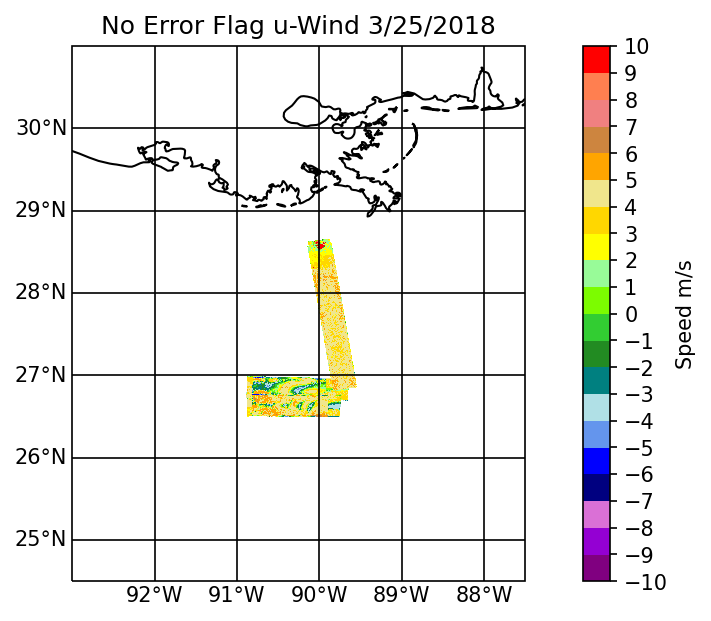

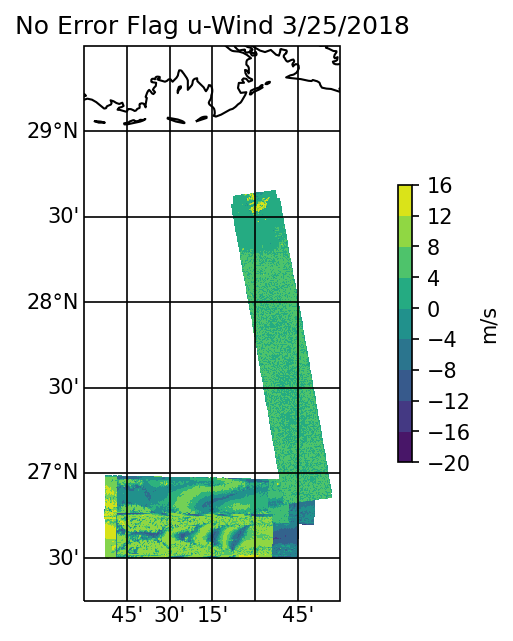

In [32]:
#check DS25 u_wind
#-20 to 16 
cmap = mpl.colors.ListedColormap(['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
bounds = [-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-93, -87.5, 24.5, 31], crs=mapcrs)
ax.coastlines()
#cs = ax.contourf(ds25_1.longitude.values, ds25_1.latitude.values, uWind25_1, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
#                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
#                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
#cs = ax.contourf(ds25_2.longitude.values, ds25_2.latitude.values, uWind25_2, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
#                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
#                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
#cs = ax.contourf(ds25_3.longitude.values, ds25_3.latitude.values, uWind25_3, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
#                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
#                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
#cs = ax.contourf(ds25_4.longitude.values, ds25_4.latitude.values, uWind25_4, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
#                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
#                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_5.longitude.values, ds25_5.latitude.values, uWind25_5, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_6.longitude.values, ds25_6.latitude.values, uWind25_6, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_7.longitude.values, ds25_7.latitude.values, uWind25_7, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
#cs = ax.contourf(ds25_8.longitude.values, ds25_8.latitude.values, uWind25_8, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
#                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
#                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
#cs = ax.contourf(ds25_9.longitude.values, ds25_9.latitude.values, uWind25_9, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
#                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
#                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
#cs = ax.contourf(ds25_10.longitude.values, ds25_10.latitude.values, uWind25_10, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
#                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
#                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, cmap=cmap, norm=norm, ticks = bounds, spacing = 'proportional', label = 'Speed m/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('No Error Flag u-Wind 3/25/2018')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'Wind_DS25U_new_noFlag.png', bbox_inches = 'tight', dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-91, -89.5, 26.25, 29.5], crs=mapcrs)
ax.coastlines()
cs = ax.contourf(ds25_1.longitude.values, ds25_1.latitude.values, uWind25_1)
cs = ax.contourf(ds25_2.longitude.values, ds25_2.latitude.values,  uWind25_2)
cs = ax.contourf(ds25_3.longitude.values, ds25_3.latitude.values,  uWind25_3)
cs = ax.contourf(ds25_4.longitude.values, ds25_4.latitude.values,  uWind25_4)
cs = ax.contourf(ds25_5.longitude.values, ds25_5.latitude.values,  uWind25_5)
cs = ax.contourf(ds25_6.longitude.values, ds25_6.latitude.values,  uWind25_6)
cs = ax.contourf(ds25_7.longitude.values, ds25_7.latitude.values,  uWind25_7)
cs = ax.contourf(ds25_8.longitude.values, ds25_8.latitude.values,  uWind25_8)
cs = ax.contourf(ds25_9.longitude.values, ds25_9.latitude.values,  uWind25_9)
cs = ax.contourf(ds25_10.longitude.values, ds25_10.latitude.values,  uWind25_10)

PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('No Error Flag u-Wind 3/25/2018')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'Wind_DS25U_default_noFlag.png',  bbox_inches = 'tight',dpi = 150)
plt.show()

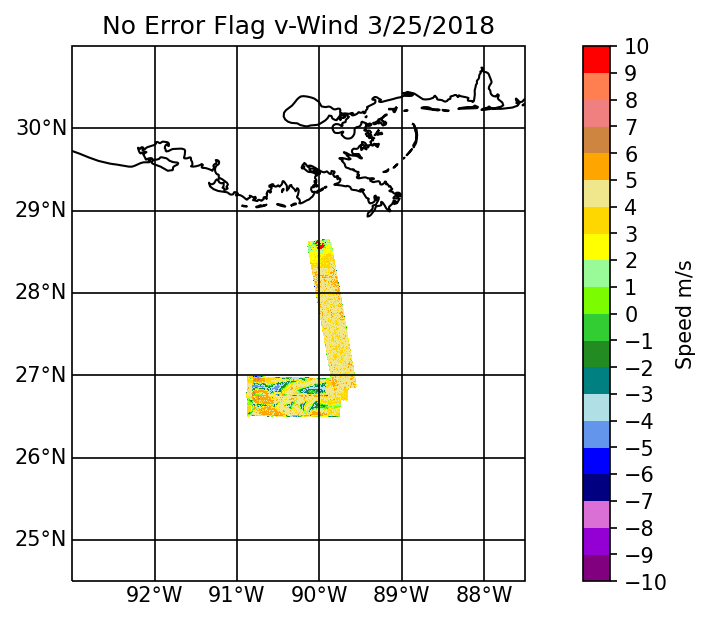

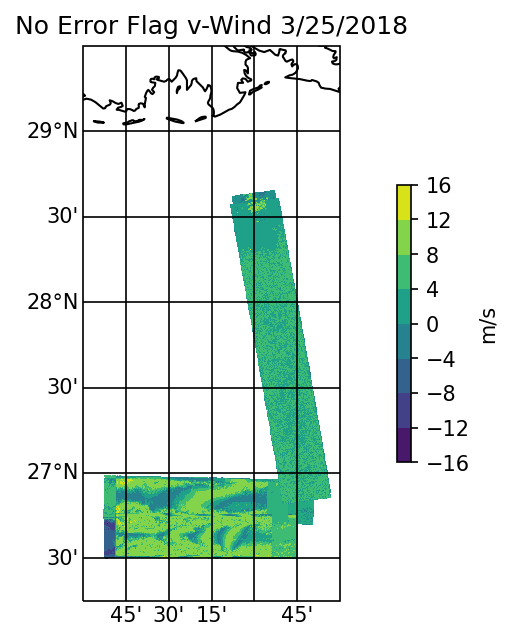

In [33]:
#check DS25 v_wind
#-16 t 16 
cmap = mpl.colors.ListedColormap(['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
bounds = [-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-93, -87.5, 24.5, 31], crs=mapcrs)
ax.coastlines()
cs = ax.contourf(ds25_1.longitude.values, ds25_1.latitude.values, vWind25_1, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_2.longitude.values, ds25_2.latitude.values, vWind25_2, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_3.longitude.values, ds25_3.latitude.values, vWind25_3, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_4.longitude.values, ds25_4.latitude.values, vWind25_4, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_5.longitude.values, ds25_5.latitude.values, vWind25_5, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_6.longitude.values, ds25_6.latitude.values, vWind25_6, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_7.longitude.values, ds25_7.latitude.values, vWind25_7, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_8.longitude.values, ds25_8.latitude.values, vWind25_8, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_9.longitude.values, ds25_9.latitude.values, vWind25_9, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_10.longitude.values, ds25_10.latitude.values, vWind25_10, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, cmap=cmap, norm=norm, ticks = bounds, spacing = 'proportional', label = 'Speed m/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('No Error Flag v-Wind 3/25/2018')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'Wind_DS25V_new_noFlag.png',  bbox_inches = 'tight',dpi = 150)
plt.show()


mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-91, -89.5, 26.25, 29.5], crs=mapcrs)
ax.coastlines()

cs = ax.contourf(ds25_1.longitude.values, ds25_1.latitude.values, vWind25_1)
#ax.contour(ds25_1.longitude.values, ds25_1.latitude.values, vWind25_1, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
cs = ax.contourf(ds25_2.longitude.values, ds25_2.latitude.values, vWind25_2)
#ax.contour(ds25_2.longitude.values, ds25_2.latitude.values, vWind25_2, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
cs = ax.contourf(ds25_3.longitude.values, ds25_3.latitude.values, vWind25_3)
#ax.contour(ds25_3.longitude.values, ds25_3.latitude.values, vWind25_3, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
cs = ax.contourf(ds25_4.longitude.values, ds25_4.latitude.values, vWind25_4)
#ax.contour(ds25_4.longitude.values, ds25_4.latitude.values, vWind25_4, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
cs = ax.contourf(ds25_5.longitude.values, ds25_5.latitude.values, vWind25_5)
#ax.contour(ds25_5.longitude.values, ds25_5.latitude.values, vWind25_5, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
cs = ax.contourf(ds25_6.longitude.values, ds25_6.latitude.values, vWind25_6)
#ax.contour(ds25_6.longitude.values, ds25_6.latitude.values, vWind25_6, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
cs = ax.contourf(ds25_7.longitude.values, ds25_7.latitude.values, vWind25_7)
#ax.contour(ds25_7.longitude.values, ds25_7.latitude.values, vWind25_7, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
cs = ax.contourf(ds25_8.longitude.values, ds25_8.latitude.values, vWind25_8)
#ax.contour(ds25_8.longitude.values, ds25_8.latitude.values, vWind25_8, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
cs = ax.contourf(ds25_9.longitude.values, ds25_9.latitude.values, vWind25_9)
#ax.contour(ds25_9.longitude.values, ds25_9.latitude.values, vWind25_9, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
cs = ax.contourf(ds25_10.longitude.values, ds25_10.latitude.values, vWind25_10)
#ax.contour(ds25_10.longitude.values, ds25_10.latitude.values, vWind25_10, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())

PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('No Error Flag v-Wind 3/25/2018')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'Wind_DS25V_default_noFlag.png',  bbox_inches = 'tight',dpi = 150)
plt.show()

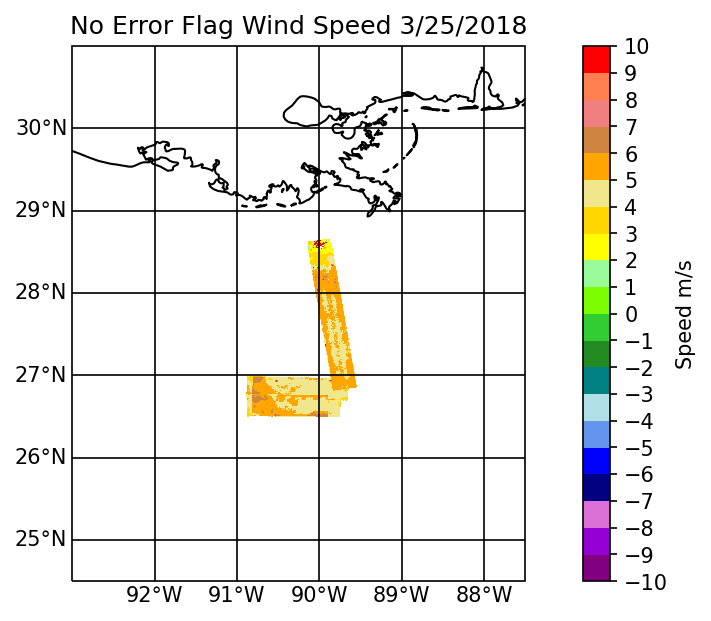

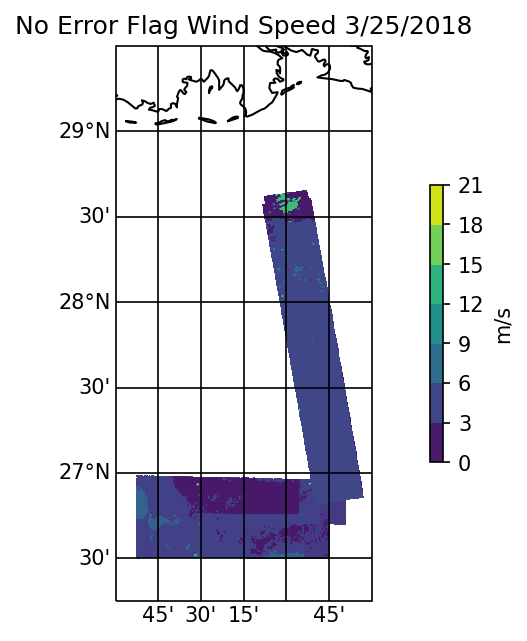

In [34]:
#check DS25 windSpeed
#0-21

cmap = mpl.colors.ListedColormap(['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
bounds = [-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-93, -87.5, 24.5, 31], crs=mapcrs)
ax.coastlines()
cs = ax.contourf(ds25_1.longitude.values, ds25_1.latitude.values, ds25_1.wind_speed.values, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_2.longitude.values, ds25_2.latitude.values, ds25_2.wind_speed.values, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_3.longitude.values, ds25_3.latitude.values, ds25_3.wind_speed.values, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_4.longitude.values, ds25_4.latitude.values, ds25_4.wind_speed.values, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_5.longitude.values, ds25_5.latitude.values, ds25_5.wind_speed.values, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_6.longitude.values, ds25_6.latitude.values, ds25_6.wind_speed.values, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_7.longitude.values, ds25_7.latitude.values, ds25_7.wind_speed.values, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_8.longitude.values, ds25_8.latitude.values, ds25_8.wind_speed.values, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_9.longitude.values, ds25_9.latitude.values, ds25_9.wind_speed.values, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_10.longitude.values, ds25_10.latitude.values, ds25_10.wind_speed.values, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, cmap=cmap, norm=norm, ticks = bounds, spacing = 'proportional', label = 'Speed m/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('No Error Flag Wind Speed 3/25/2018')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'WindSpeed_DS25_new_noFlag.png',  bbox_inches = 'tight',dpi = 150)
plt.show()


mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-91, -89.5, 26.25, 29.5], crs=mapcrs)
ax.coastlines()

cs = ax.contourf(ds25_1.longitude.values, ds25_1.latitude.values, ds25_1.wind_speed.values)
#ax.contour(ds25_1.longitude.values, ds25_1.latitude.values, ds25_1.wind_speed.values, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
cs = ax.contourf(ds25_2.longitude.values, ds25_2.latitude.values, ds25_2.wind_speed.values)
#ax.contour(ds25_2.longitude.values, ds25_2.latitude.values, ds25_2.wind_speed.values, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
cs = ax.contourf(ds25_3.longitude.values, ds25_3.latitude.values, ds25_3.wind_speed.values)
#ax.contour(ds25_3.longitude.values, ds25_3.latitude.values, ds25_3.wind_speed.values, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
cs = ax.contourf(ds25_4.longitude.values, ds25_4.latitude.values, ds25_4.wind_speed.values)
#ax.contour(ds25_4.longitude.values, ds25_4.latitude.values, ds25_4.wind_speed.values, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
cs = ax.contourf(ds25_5.longitude.values, ds25_5.latitude.values, ds25_5.wind_speed.values)
#ax.contour(ds25_5.longitude.values, ds25_5.latitude.values, ds25_5.wind_speed.values, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
cs = ax.contourf(ds25_6.longitude.values, ds25_6.latitude.values, ds25_6.wind_speed.values)
#ax.contour(ds25_6.longitude.values, ds25_6.latitude.values, ds25_6.wind_speed.values, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
cs = ax.contourf(ds25_7.longitude.values, ds25_7.latitude.values, ds25_7.wind_speed.values)
#ax.contour(ds25_7.longitude.values, ds25_7.latitude.values, ds25_7.wind_speed.values, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
cs = ax.contourf(ds25_8.longitude.values, ds25_8.latitude.values, ds25_8.wind_speed.values)
#ax.contour(ds25_8.longitude.values, ds25_8.latitude.values, ds25_8.wind_speed.values, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
cs = ax.contourf(ds25_9.longitude.values, ds25_9.latitude.values, ds25_9.wind_speed.values)
#ax.contour(ds25_9.longitude.values, ds25_9.latitude.values, ds25_9.wind_speed.values, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
cs = ax.contourf(ds25_10.longitude.values, ds25_10.latitude.values, ds25_10.wind_speed.values)
#ax.contour(ds25_10.longitude.values, ds25_10.latitude.values, ds25_10.wind_speed.values, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())

PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('No Error Flag Wind Speed 3/25/2018')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'WindSpeed_DS25_default_noFlag.png',  bbox_inches = 'tight',dpi = 150)
plt.show()


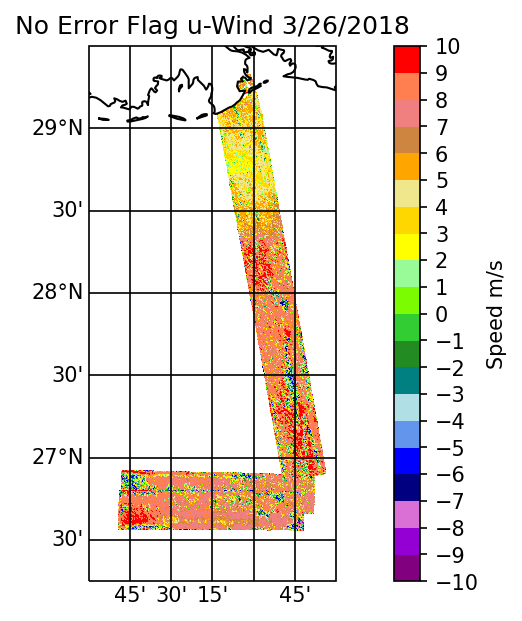

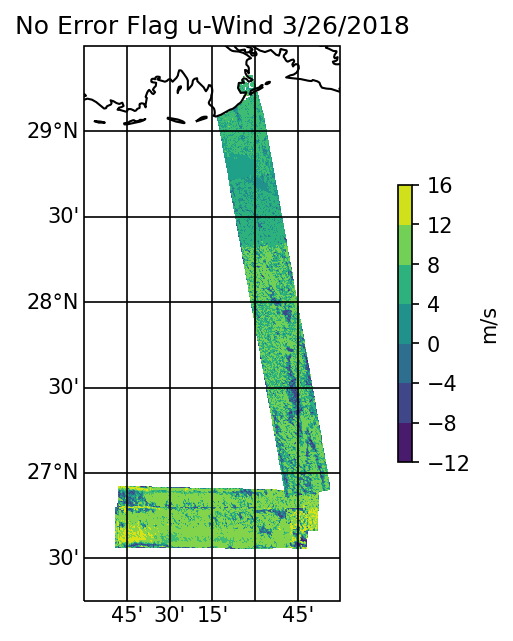

In [27]:
#check DS26 u_wind
#-12 to 16

cmap = mpl.colors.ListedColormap(['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
bounds = [-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-93, -87.5, 24.5, 31], crs=mapcrs)
ax.coastlines()
cs = ax.contourf(ds26_1.longitude.values, ds26_1.latitude.values, uWind26_1, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_2.longitude.values, ds26_2.latitude.values, uWind26_2, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_3.longitude.values, ds26_3.latitude.values, uWind26_3, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_4.longitude.values, ds26_4.latitude.values, uWind26_4, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_5.longitude.values, ds26_5.latitude.values, uWind26_5, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_6.longitude.values, ds26_6.latitude.values, uWind26_6, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_7.longitude.values, ds26_7.latitude.values, uWind26_7, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_8.longitude.values, ds26_8.latitude.values, uWind26_8, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_9.longitude.values, ds26_9.latitude.values, uWind26_9, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_10.longitude.values, ds26_10.latitude.values, uWind26_10, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_11.longitude.values, ds26_11.latitude.values, uWind26_11, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, cmap=cmap, norm=norm, ticks = bounds, spacing = 'proportional', label = 'Speed m/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('No Error Flag u-Wind 3/26/2018')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'Wind_DS26U_new_noFlag.png',  bbox_inches = 'tight',dpi = 150)
plt.show()


mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-91, -89.5, 26.25, 29.5], crs=mapcrs)
ax.coastlines()

cs = ax.contourf(ds26_1.longitude.values, ds26_1.latitude.values, uWind26_1)
#ax.contour(ds26_1.longitude.values, ds26_1.latitude.values, uWind26_1, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
cs = ax.contourf(ds26_2.longitude.values, ds26_2.latitude.values, uWind26_2)
#ax.contour(ds26_2.longitude.values, ds26_2.latitude.values, uWind26_2, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
cs = ax.contourf(ds26_3.longitude.values, ds26_3.latitude.values, uWind26_3)
#ax.contour(ds26_3.longitude.values, ds26_3.latitude.values, uWind26_3, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
cs = ax.contourf(ds26_4.longitude.values, ds26_4.latitude.values, uWind26_4)
#ax.contour(ds26_4.longitude.values, ds26_4.latitude.values, uWind26_4, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
cs = ax.contourf(ds26_5.longitude.values, ds26_5.latitude.values, uWind26_5)
#ax.contour(ds26_5.longitude.values, ds26_5.latitude.values, uWind26_5, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
cs = ax.contourf(ds26_6.longitude.values, ds26_6.latitude.values, uWind26_6)
#ax.contour(ds26_6.longitude.values, ds26_6.latitude.values, uWind26_6, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
cs = ax.contourf(ds26_7.longitude.values, ds26_7.latitude.values, uWind26_7)
#ax.contour(ds26_7.longitude.values, ds26_7.latitude.values, uWind26_7, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
cs = ax.contourf(ds26_8.longitude.values, ds26_8.latitude.values, uWind26_8)
#ax.contour(ds26_8.longitude.values, ds26_8.latitude.values, uWind26_8, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
cs = ax.contourf(ds26_9.longitude.values, ds26_9.latitude.values, uWind26_9)
#ax.contour(ds26_9.longitude.values, ds26_9.latitude.values, uWind26_9, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
cs = ax.contourf(ds26_10.longitude.values, ds26_10.latitude.values, uWind26_10)
#ax.contour(ds26_10.longitude.values, ds26_10.latitude.values, uWind26_10, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
cs = ax.contourf(ds26_11.longitude.values, ds26_11.latitude.values, uWind26_11)
#ax.contour(ds26_11.longitude.values, ds26_11.latitude.values, uWind26_11, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())

PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('No Error Flag u-Wind 3/26/2018')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'Wind_DS26U_default_noFlag.png', bbox_inches = 'tight', dpi = 150)
plt.show()

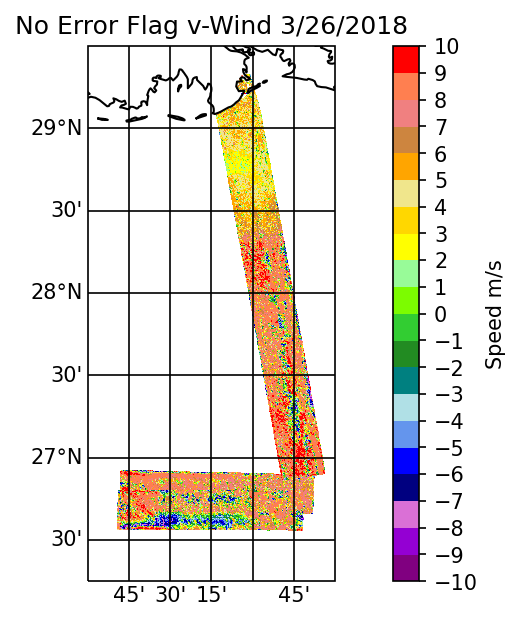

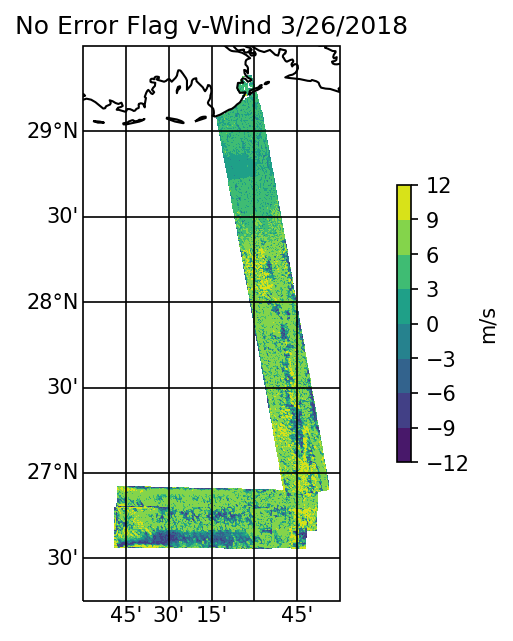

In [28]:
#check DS26 v_wind
#-12 to 12 


cmap = mpl.colors.ListedColormap(['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
bounds = [-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-91, -89.5, 26.25, 29.5], crs=mapcrs)
ax.coastlines()
cs = ax.contourf(ds26_1.longitude.values, ds26_1.latitude.values, vWind26_1, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_2.longitude.values, ds26_2.latitude.values, vWind26_2, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_3.longitude.values, ds26_3.latitude.values, vWind26_3, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_4.longitude.values, ds26_4.latitude.values, vWind26_4, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_5.longitude.values, ds26_5.latitude.values, vWind26_5, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_6.longitude.values, ds26_6.latitude.values, vWind26_6, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_7.longitude.values, ds26_7.latitude.values, vWind26_7, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_8.longitude.values, ds26_8.latitude.values, vWind26_8, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_9.longitude.values, ds26_9.latitude.values, vWind26_9, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_10.longitude.values, ds26_10.latitude.values, vWind26_10, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_11.longitude.values, ds26_11.latitude.values, vWind26_11, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, cmap=cmap, norm=norm, ticks = bounds, spacing = 'proportional', label = 'Speed m/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('No Error Flag v-Wind 3/26/2018')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'Wind_DS26V_new_noFlag.png',  bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-91, -89.5, 26.25, 29.5], crs=mapcrs)
ax.coastlines()
cs = ax.contourf(ds26_1.longitude.values, ds26_1.latitude.values, vWind26_1)
cs = ax.contourf(ds26_2.longitude.values, ds26_2.latitude.values, vWind26_2)
cs = ax.contourf(ds26_3.longitude.values, ds26_3.latitude.values, vWind26_3)
cs = ax.contourf(ds26_4.longitude.values, ds26_4.latitude.values, vWind26_4)
cs = ax.contourf(ds26_5.longitude.values, ds26_5.latitude.values, vWind26_5)
cs = ax.contourf(ds26_6.longitude.values, ds26_6.latitude.values, vWind26_6)
cs = ax.contourf(ds26_7.longitude.values, ds26_7.latitude.values, vWind26_7)
cs = ax.contourf(ds26_8.longitude.values, ds26_8.latitude.values, vWind26_8)
cs = ax.contourf(ds26_9.longitude.values, ds26_9.latitude.values, vWind26_9)
cs = ax.contourf(ds26_10.longitude.values, ds26_10.latitude.values, vWind26_10)
cs = ax.contourf(ds26_11.longitude.values, ds26_11.latitude.values, vWind26_11)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('No Error Flag v-Wind 3/26/2018')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'Wind_DS26V_default_noFlag.png',  bbox_inches = 'tight',dpi = 150)
plt.show()

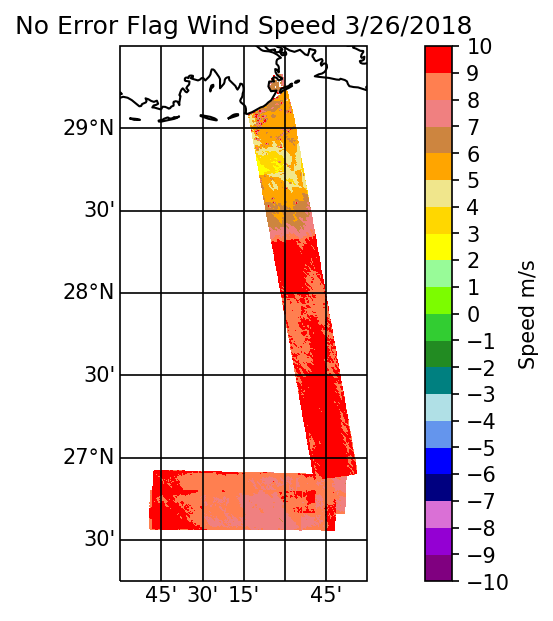

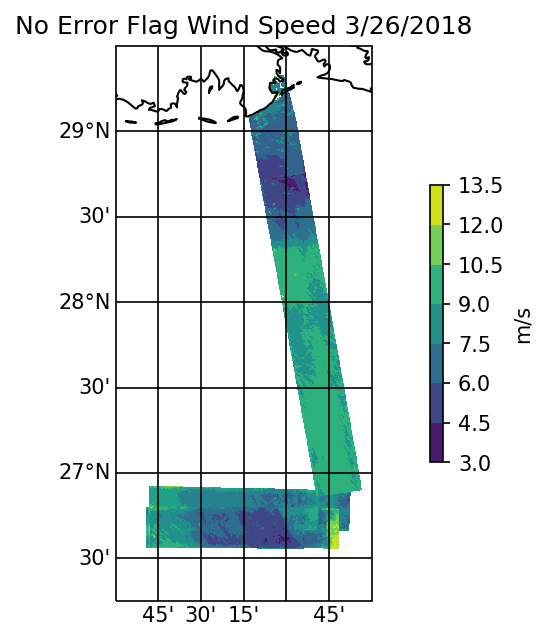

In [32]:
#check DS26 windSpeed
#-13.5 
cmap = mpl.colors.ListedColormap(['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
bounds = [-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-91, -89.5, 26.25, 29.5], crs=mapcrs)
ax.coastlines()
cs = ax.contourf(ds26_1.longitude.values, ds26_1.latitude.values, ds26_1.wind_speed.values, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_2.longitude.values, ds26_2.latitude.values, ds26_2.wind_speed.values, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_3.longitude.values, ds26_3.latitude.values, ds26_3.wind_speed.values, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_4.longitude.values, ds26_4.latitude.values, ds26_4.wind_speed.values, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_5.longitude.values, ds26_5.latitude.values, ds26_5.wind_speed.values, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_6.longitude.values, ds26_6.latitude.values, ds26_6.wind_speed.values, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_7.longitude.values, ds26_7.latitude.values, ds26_7.wind_speed.values, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_8.longitude.values, ds26_8.latitude.values, ds26_8.wind_speed.values, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_9.longitude.values, ds26_9.latitude.values, ds26_9.wind_speed.values, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_10.longitude.values, ds26_10.latitude.values, ds26_10.wind_speed.values, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_11.longitude.values, ds26_11.latitude.values, ds26_11.wind_speed.values, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, cmap=cmap, norm=norm, ticks = bounds, spacing = 'proportional', label = 'Speed m/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('No Error Flag Wind Speed 3/26/2018')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'WindSpeed_DS26_new_noFlag.png', bbox_inches = 'tight', dpi = 150)
plt.show()


mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-91, -89.5, 26.25, 29.5], crs=mapcrs)
ax.coastlines()
cs = ax.contourf(ds26_1.longitude.values, ds26_1.latitude.values, ds26_1.wind_speed.values)
cs = ax.contourf(ds26_2.longitude.values, ds26_2.latitude.values, ds26_2.wind_speed.values)
cs = ax.contourf(ds26_3.longitude.values, ds26_3.latitude.values, ds26_3.wind_speed.values)
cs = ax.contourf(ds26_4.longitude.values, ds26_4.latitude.values, ds26_4.wind_speed.values)
cs = ax.contourf(ds26_5.longitude.values, ds26_5.latitude.values, ds26_5.wind_speed.values)
cs = ax.contourf(ds26_6.longitude.values, ds26_6.latitude.values, ds26_6.wind_speed.values)
cs = ax.contourf(ds26_7.longitude.values, ds26_7.latitude.values, ds26_7.wind_speed.values)
cs = ax.contourf(ds26_8.longitude.values, ds26_8.latitude.values, ds26_8.wind_speed.values)
cs = ax.contourf(ds26_9.longitude.values, ds26_9.latitude.values, ds26_9.wind_speed.values)
cs = ax.contourf(ds26_10.longitude.values, ds26_10.latitude.values, ds26_10.wind_speed.values)
cs = ax.contourf(ds26_11.longitude.values, ds26_11.latitude.values, ds26_11.wind_speed.values)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('No Error Flag Wind Speed 3/26/2018')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'WindSpeed_DS26_default_noFlag.png', bbox_inches = 'tight', dpi = 150)
plt.show()

In [35]:
#filter bad wind data out 

#set flags for all datasets and see if it works for currents, maybe for winds only
#0 is good, 2 is bad
#set flag to only accept 0

#Wind25_1=speed25_1*np.cos(dir_math25_1*(180/np.pi))
#vWind25_1=speed25_1*np.sin(dir_math25_1*(180/np.pi))
#lat25_1=ds25_1.latitude.values
#lon25_1=ds25_1.longitude.values
# flag25_1=ds25_1.flag.values

lonlen25_1=len(lon25_1) #236
latlen25_1=len(lat25_1) #954

goodWindUarr25_1=np.zeros((latlen25_1,lonlen25_1))
goodWindUarr25_1[:]=np.nan
goodWindVarr25_1=np.zeros((latlen25_1,lonlen25_1))
goodWindVarr25_1[:]=np.nan

for x in range (len(lon25_1)):
    for y in range (len(lat25_1)):
        if flag25_1[y,x] == 0:
            goodWindUarr25_1[y,x] = uWind25_1[y,x] 
            goodWindVarr25_1[y,x] = vWind25_1[y,x] 
            

goodWindUarr25_2=np.zeros((latlen25_2,lonlen25_2))
goodWindUarr25_2[:]=np.nan
goodWindVarr25_2=np.zeros((latlen25_2,lonlen25_2))
goodWindVarr25_2[:]=np.nan

for x in range (len(lon25_2)):
    for y in range (len(lat25_2)):
        if flag25_2[y,x] == 0:
            goodWindUarr25_2[y,x] = uWind25_2[y,x] 
            goodWindVarr25_2[y,x] = vWind25_2[y,x] 

goodWindUarr25_3=np.zeros((latlen25_3,lonlen25_3))
goodWindUarr25_3[:]=np.nan
goodWindVarr25_3=np.zeros((latlen25_3,lonlen25_3))
goodWindVarr25_3[:]=np.nan

for x in range (len(lon25_3)):
    for y in range (len(lat25_3)):
        if flag25_3[y,x] == 0:
            goodWindUarr25_3[y,x] = uWind25_3[y,x] 
            goodWindVarr25_3[y,x] = vWind25_3[y,x] 
            
goodWindUarr25_4=np.zeros((latlen25_4,lonlen25_4))
goodWindUarr25_4[:]=np.nan
goodWindVarr25_4=np.zeros((latlen25_4,lonlen25_4))
goodWindVarr25_4[:]=np.nan

for x in range (len(lon25_4)):
    for y in range (len(lat25_4)):
        if flag25_4[y,x] == 0:
            goodWindUarr25_4[y,x] = uWind25_4[y,x] 
            goodWindVarr25_4[y,x] = vWind25_4[y,x] 
            
goodWindUarr25_5=np.zeros((latlen25_5,lonlen25_5))
goodWindUarr25_5[:]=np.nan
goodWindVarr25_5=np.zeros((latlen25_5,lonlen25_5))
goodWindVarr25_5[:]=np.nan

for x in range (len(lon25_5)):
    for y in range (len(lat25_5)):
        if flag25_5[y,x] == 0:
            goodWindUarr25_5[y,x] = uWind25_5[y,x] 
            goodWindVarr25_5[y,x] = vWind25_5[y,x] 
    
goodWindUarr25_6=np.zeros((latlen25_6,lonlen25_6))
goodWindUarr25_6[:]=np.nan
goodWindVarr25_6=np.zeros((latlen25_6,lonlen25_6))
goodWindVarr25_6[:]=np.nan

for x in range (len(lon25_6)):
    for y in range (len(lat25_6)):
        if flag25_6[y,x] == 0:
            goodWindUarr25_6[y,x] = uWind25_6[y,x] 
            goodWindVarr25_6[y,x] = vWind25_6[y,x] 
            
goodWindUarr25_7=np.zeros((latlen25_7,lonlen25_7))
goodWindUarr25_7[:]=np.nan
goodWindVarr25_7=np.zeros((latlen25_7,lonlen25_7))
goodWindVarr25_7[:]=np.nan

for x in range (len(lon25_7)):
    for y in range (len(lat25_7)):
        if flag25_7[y,x] == 0:
            goodWindUarr25_7[y,x] = uWind25_7[y,x] 
            goodWindVarr25_7[y,x] = vWind25_7[y,x]
            
goodWindUarr25_8=np.zeros((latlen25_8,lonlen25_8))
goodWindUarr25_8[:]=np.nan
goodWindVarr25_8=np.zeros((latlen25_8,lonlen25_8))
goodWindVarr25_8[:]=np.nan

for x in range (len(lon25_8)):
    for y in range (len(lat25_8)):
        if flag25_8[y,x] == 0:
            goodWindUarr25_8[y,x] = uWind25_8[y,x] 
            goodWindVarr25_8[y,x] = vWind25_8[y,x]
            
goodWindUarr25_9=np.zeros((latlen25_9,lonlen25_9))
goodWindUarr25_9[:]=np.nan
goodWindVarr25_9=np.zeros((latlen25_9,lonlen25_9))
goodWindVarr25_9[:]=np.nan

for x in range (len(lon25_9)):
    for y in range (len(lat25_9)):
        if flag25_9[y,x] == 0:
            goodWindUarr25_9[y,x] = uWind25_9[y,x] 
            goodWindVarr25_9[y,x] = vWind25_9[y,x]
            
goodWindUarr25_10=np.zeros((latlen25_10,lonlen25_10))
goodWindUarr25_10[:]=np.nan
goodWindVarr25_10=np.zeros((latlen25_10,lonlen25_10))
goodWindVarr25_10[:]=np.nan

for x in range (len(lon25_10)):
    for y in range (len(lat25_10)):
        if flag25_10[y,x] == 0:
            goodWindUarr25_10[y,x] = uWind25_10[y,x] 
            goodWindVarr25_10[y,x] = vWind25_10[y,x]

print('u wind 1 shape',goodWindUarr25_1.shape)

print('no flag u max 1: ', np.nanmax(uWind25_1))
print('no flag u min 1: ', np.nanmin(uWind25_1))
print('flag u max 1: ', np.nanmax(goodWindUarr25_1))
print('flag u min 1: ', np.nanmin(goodWindUarr25_1))
print('no flag u max 2: ', np.nanmax(uWind25_2))
print('no flag u min 2: ',  np.nanmin(uWind25_2))
print('flag u max 2: ', np.nanmax(goodWindUarr25_2))
print('flag u min 2: ', np.nanmin(goodWindUarr25_2))
print('no flag u max 3: ', np.nanmax(uWind25_3))
print('no flag u min 3: ', np.nanmin(uWind25_3))
print('flag u max 3: ',  np.nanmax(goodWindUarr25_3))
print('flag u min 3: ', np.nanmin(goodWindUarr25_3))
print('no flag u max 4: ', np.nanmax(uWind25_4))
print('no flag u min 4: ', np.nanmin(uWind25_4))
print('flag u max 4: ',  np.nanmax(goodWindUarr25_4))
print('flag u min 4: ', np.nanmin(goodWindUarr25_4))
print('no flag u max 5: ', np.nanmax(uWind25_5))
print('no flag u min 5: ', np.nanmin(uWind25_5))
print('flag u max 5: ',  np.nanmax(goodWindUarr25_5))
print('flag u min 5: ', np.nanmin(goodWindUarr25_5))
print('no flag u max 6: ', np.nanmax(uWind25_6))
print('no flag u min 6: ', np.nanmin(uWind25_6))
print('flag u max 6: ',  np.nanmax(goodWindUarr25_6))
print('flag u min 6: ', np.nanmin(goodWindUarr25_6))
print('no flag u max 7: ', np.nanmax(uWind25_7))
print('no flag u min 7: ', np.nanmin(uWind25_7))
print('flag u max 7: ',  np.nanmax(goodWindUarr25_7))
print('flag u min 7: ', np.nanmin(goodWindUarr25_7))
print('no flag u max 8: ', np.nanmax(uWind25_8))
print('no flag u min 8: ', np.nanmin(uWind25_8))
print('flag u max 8: ',  np.nanmax(goodWindUarr25_8))
print('flag u min 8: ', np.nanmin(goodWindUarr25_8))
print('no flag u max 9: ', np.nanmax(uWind25_9))
print('no flag u min 9: ', np.nanmin(uWind25_9))
print('flag u max 9: ',  np.nanmax(goodWindUarr25_9))
print('flag u min 9: ', np.nanmin(goodWindUarr25_9))
print('no flag u max 10: ', np.nanmax(uWind25_10))
print('no flag u min 10: ', np.nanmin(uWind25_10))
print('flag u max 10: ',  np.nanmax(goodWindUarr25_10))
print('flag u min 10: ', np.nanmin(goodWindUarr25_10))

goodWindUarr26_1=np.zeros((latlen26_1,lonlen26_1))
goodWindUarr26_1[:]=np.nan
goodWindVarr26_1=np.zeros((latlen26_1,lonlen26_1))
goodWindVarr26_1[:]=np.nan

for x in range (len(lon26_1)):
    for y in range (len(lat26_1)):
        if flag26_1[y,x] == 0:
            goodWindUarr26_1[y,x] = uWind26_1[y,x] 
            goodWindVarr26_1[y,x] = vWind26_1[y,x] 

goodWindUarr26_2=np.zeros((latlen26_2,lonlen26_2))
goodWindUarr26_2[:]=np.nan
goodWindVarr26_2=np.zeros((latlen26_2,lonlen26_2))
goodWindVarr26_2[:]=np.nan

for x in range (len(lon26_2)):
    for y in range (len(lat26_2)):
        if flag26_2[y,x] == 0:
            goodWindUarr26_2[y,x] = uWind26_2[y,x] 
            goodWindVarr26_2[y,x] = vWind26_2[y,x] 

goodWindUarr26_3=np.zeros((latlen26_3,lonlen26_3))
goodWindUarr26_3[:]=np.nan
goodWindVarr26_3=np.zeros((latlen26_3,lonlen26_3))
goodWindVarr26_3[:]=np.nan

for x in range (len(lon26_3)):
    for y in range (len(lat26_3)):
        if flag26_3[y,x] == 0:
            goodWindUarr26_3[y,x] = uWind26_3[y,x] 
            goodWindVarr26_3[y,x] = vWind26_3[y,x] 
            
goodWindUarr26_4=np.zeros((latlen26_4,lonlen26_4))
goodWindUarr26_4[:]=np.nan
goodWindVarr26_4=np.zeros((latlen26_4,lonlen26_4))
goodWindVarr26_4[:]=np.nan

for x in range (len(lon26_4)):
    for y in range (len(lat26_4)):
        if flag26_4[y,x] == 0:
            goodWindUarr26_4[y,x] = uWind26_4[y,x] 
            goodWindVarr26_4[y,x] = vWind26_4[y,x] 
            
goodWindUarr26_5=np.zeros((latlen26_5,lonlen26_5))
goodWindUarr26_5[:]=np.nan
goodWindVarr26_5=np.zeros((latlen26_5,lonlen26_5))
goodWindVarr26_5[:]=np.nan

for x in range (len(lon26_5)):
    for y in range (len(lat26_5)):
        if flag26_5[y,x] == 0:
            goodWindUarr26_5[y,x] = uWind26_5[y,x] 
            goodWindVarr26_5[y,x] = vWind26_5[y,x] 
    
goodWindUarr26_6=np.zeros((latlen26_6,lonlen26_6))
goodWindUarr26_6[:]=np.nan
goodWindVarr26_6=np.zeros((latlen26_6,lonlen26_6))
goodWindVarr26_6[:]=np.nan

for x in range (len(lon26_6)):
    for y in range (len(lat26_6)):
        if flag25_6[y,x] == 0:
            goodWindUarr26_6[y,x] = uWind26_6[y,x] 
            goodWindVarr26_6[y,x] = vWind26_6[y,x] 
            
goodWindUarr26_7=np.zeros((latlen26_7,lonlen26_7))
goodWindUarr26_7[:]=np.nan
goodWindVarr26_7=np.zeros((latlen26_7,lonlen26_7))
goodWindVarr26_7[:]=np.nan

for x in range (len(lon26_7)):
    for y in range (len(lat26_7)):
        if flag26_7[y,x] == 0:
            goodWindUarr26_7[y,x] = uWind26_7[y,x] 
            goodWindVarr26_7[y,x] = vWind26_7[y,x]
            
goodWindUarr26_8=np.zeros((latlen26_8,lonlen26_8))
goodWindUarr26_8[:]=np.nan
goodWindVarr26_8=np.zeros((latlen26_8,lonlen26_8))
goodWindVarr26_8[:]=np.nan

for x in range (len(lon26_8)):
    for y in range (len(lat26_8)):
        if flag26_8[y,x] == 0:
            goodWindUarr26_8[y,x] = uWind26_8[y,x] 
            goodWindVarr26_8[y,x] = vWind26_8[y,x]
            
goodWindUarr26_9=np.zeros((latlen26_9,lonlen26_9))
goodWindUarr26_9[:]=np.nan
goodWindVarr26_9=np.zeros((latlen26_9,lonlen26_9))
goodWindVarr26_9[:]=np.nan

for x in range (len(lon26_9)):
    for y in range (len(lat26_9)):
        if flag26_9[y,x] == 0:
            goodWindUarr26_9[y,x] = uWind26_9[y,x] 
            goodWindVarr26_9[y,x] = vWind26_9[y,x]
            
goodWindUarr26_10=np.zeros((latlen26_10,lonlen26_10))
goodWindUarr26_10[:]=np.nan
goodWindVarr26_10=np.zeros((latlen26_10,lonlen26_10))
goodWindVarr26_10[:]=np.nan

for x in range (len(lon26_10)):
    for y in range (len(lat26_10)):
        if flag26_10[y,x] == 0:
            goodWindUarr26_10[y,x] = uWind26_10[y,x] 
            goodWindVarr26_10[y,x] = vWind26_10[y,x]

goodWindUarr26_11=np.zeros((latlen26_11,lonlen26_11))
goodWindUarr26_11[:]=np.nan
goodWindVarr26_11=np.zeros((latlen26_11,lonlen26_11))
goodWindVarr26_11[:]=np.nan

for x in range (len(lon26_11)):
    for y in range (len(lat26_11)):
        if flag26_11[y,x] == 0:
            goodWindUarr26_11[y,x] = uWind26_11[y,x] 
            goodWindVarr26_11[y,x] = vWind26_11[y,x]
 
'''
print('no flag u max 1: ', np.nanmax(uWind25_1))
print('no flag u min 1: ', np.nanmin(uWind25_1))
print('flag u max 1: ', np.nanmax(goodWindUarr25_1))
print('flag u min 1: ', np.nanmin(goodWindUarr25_1))
print('no flag u max 2: ', np.nanmax(uWind25_2))
print('no flag u min 2: ',  np.nanmin(uWind25_2))
print('flag u max 2: ', np.nanmax(goodWindUarr25_2))
print('flag u min 2: ', np.nanmin(goodWindUarr25_2))
print('no flag u max 3: ', np.nanmax(uWind25_3))
print('no flag u min 3: ', np.nanmin(uWind25_3))
print('flag u max 3: ',  np.nanmax(goodWindUarr25_3))
print('flag u min 3: ', np.nanmin(goodWindUarr25_3))
print('no flag u max 4: ', np.nanmax(uWind25_4))
print('no flag u min 4: ', np.nanmin(uWind25_4))
print('flag u max 4: ',  np.nanmax(goodWindUarr25_4))
print('flag u min 4: ', np.nanmin(goodWindUarr25_4))
print('no flag u max 5: ', np.nanmax(uWind25_5))
print('no flag u min 5: ', np.nanmin(uWind25_5))
print('flag u max 5: ',  np.nanmax(goodWindUarr25_5))
print('flag u min 5: ', np.nanmin(goodWindUarr25_5))
print('no flag u max 6: ', np.nanmax(uWind25_6))
print('no flag u min 6: ', np.nanmin(uWind25_6))
print('flag u max 6: ',  np.nanmax(goodWindUarr25_6))
print('flag u min 6: ', np.nanmin(goodWindUarr25_6))
print('no flag u max 7: ', np.nanmax(uWind25_7))
print('no flag u min 7: ', np.nanmin(uWind25_7))
print('flag u max 7: ',  np.nanmax(goodWindUarr25_7))
print('flag u min 7: ', np.nanmin(goodWindUarr25_7))
print('no flag u max 8: ', np.nanmax(uWind25_8))
print('no flag u min 8: ', np.nanmin(uWind25_8))
print('flag u max 8: ',  np.nanmax(goodWindUarr25_8))
print('flag u min 8: ', np.nanmin(goodWindUarr25_8))
print('no flag u max 9: ', np.nanmax(uWind25_9))
print('no flag u min 9: ', np.nanmin(uWind25_9))
print('flag u max 9: ',  np.nanmax(goodWindUarr25_9))
print('flag u min 9: ', np.nanmin(goodWindUarr25_9))
print('no flag u max 10: ', np.nanmax(uWind25_10))
print('no flag u min 10: ', np.nanmin(uWind25_10))
print('flag u max 10: ',  np.nanmax(goodWindUarr25_10))
print('flag u min 10: ', np.nanmin(goodWindUarr25_10))

print('\nno flag v max 1: ', np.nanmax(vWind25_1))
print('no flag v min 1: ', np.nanmin(vWind25_1))
print('flag v max 1: ', np.nanmax(goodWindVarr25_1))
print('flag v min 1: ', np.nanmin(goodWindVarr25_1))
print('no flag v max 2: ', np.nanmax(vWind25_2))
print('no flag v min 2: ',  np.nanmin(vWind25_2))
print('flag v max 2: ', np.nanmax(goodWindVarr25_2))
print('flag v min 2: ', np.nanmin(goodWindVarr25_2))
print('no flag v max 3: ', np.nanmax(vWind25_3))
print('no flag v min 3: ', np.nanmin(vWind25_3))
print('flag v max 3: ',  np.nanmax(goodWindVarr25_3))
print('flag v min 3: ', np.nanmin(goodWindVarr25_3))
print('no flag v max 4: ', np.nanmax(vWind25_4))
print('no flag v min 4: ', np.nanmin(vWind25_4))
print('flag v max 4: ',  np.nanmax(goodWindVarr25_4))
print('flag v min 4: ', np.nanmin(goodWindVarr25_4))
print('no flag v max 5: ', np.nanmax(vWind25_5))
print('no flag v min 5: ', np.nanmin(vWind25_5))
print('flag v max 5: ',  np.nanmax(goodWindVarr25_5))
print('flag v min 5: ', np.nanmin(goodWindVarr25_5))
print('no flag v max 6: ', np.nanmax(vWind25_6))
print('no flag v min 6: ', np.nanmin(vWind25_6))
print('flag v max 6: ',  np.nanmax(goodWindVarr25_6))
print('flag v min 6: ', np.nanmin(goodWindVarr25_6))
print('no flag v max 7: ', np.nanmax(vWind25_7))
print('no flag v min 7: ', np.nanmin(vWind25_7))
print('flag v max 7: ',  np.nanmax(goodWindVarr25_7))
print('flag v min 7: ', np.nanmin(goodWindVarr25_7))
print('no flag v max 8: ', np.nanmax(vWind25_8))
print('no flag v min 8: ', np.nanmin(vWind25_8))
print('flag v max 8: ',  np.nanmax(goodWindVarr25_8))
print('flag v min 8: ', np.nanmin(goodWindVarr25_8))
print('no flag v max 9: ', np.nanmax(vWind25_9))
print('no flag v min 9: ', np.nanmin(vWind25_9))
print('flag v max 9: ',  np.nanmax(goodWindVarr25_9))
print('flag v min 9: ', np.nanmin(goodWindVarr25_9))
print('no flag v max 10: ', np.nanmax(vWind25_10))
print('no flag v min 10: ', np.nanmin(vWind25_10))
print('flag v max 10: ',  np.nanmax(goodWindVarr25_10))
print('flag v min 10: ', np.nanmin(goodWindVarr25_10))
'''

u wind 1 shape (954, 236)
no flag u max 1:  22.438668242657744
no flag u min 1:  -24.934956700779452
flag u max 1:  15.119948881428682
flag u min 1:  -24.934956700779452
no flag u max 2:  6.981796815628024
no flag u min 2:  -22.28316237362946
flag u max 2:  5.195208111992851
flag u min 2:  -5.176073064826461
no flag u max 3:  5.499895207787672
no flag u min 3:  -6.521994689864554
flag u max 3:  5.499895207787672
flag u min 3:  -6.521994689864554
no flag u max 4:  16.69831283639586
no flag u min 4:  -6.380604621462611
flag u max 4:  5.201590744220987
flag u min 4:  -6.380604621462611
no flag u max 5:  10.60805355639475
no flag u min 5:  -12.410272483044206
flag u max 5:  8.124127411908267
flag u min 5:  -6.182162703205939
no flag u max 6:  17.960123013469534
no flag u min 6:  -8.779002945637307
flag u max 6:  10.052894371520857
flag u min 6:  -5.637784741620291
no flag u max 7:  9.973108016733704
no flag u min 7:  -9.931731770391929
flag u max 7:  5.939773330409253
flag u min 7:  -8.879

"\nprint('no flag u max 1: ', np.nanmax(uWind25_1))\nprint('no flag u min 1: ', np.nanmin(uWind25_1))\nprint('flag u max 1: ', np.nanmax(goodWindUarr25_1))\nprint('flag u min 1: ', np.nanmin(goodWindUarr25_1))\nprint('no flag u max 2: ', np.nanmax(uWind25_2))\nprint('no flag u min 2: ',  np.nanmin(uWind25_2))\nprint('flag u max 2: ', np.nanmax(goodWindUarr25_2))\nprint('flag u min 2: ', np.nanmin(goodWindUarr25_2))\nprint('no flag u max 3: ', np.nanmax(uWind25_3))\nprint('no flag u min 3: ', np.nanmin(uWind25_3))\nprint('flag u max 3: ',  np.nanmax(goodWindUarr25_3))\nprint('flag u min 3: ', np.nanmin(goodWindUarr25_3))\nprint('no flag u max 4: ', np.nanmax(uWind25_4))\nprint('no flag u min 4: ', np.nanmin(uWind25_4))\nprint('flag u max 4: ',  np.nanmax(goodWindUarr25_4))\nprint('flag u min 4: ', np.nanmin(goodWindUarr25_4))\nprint('no flag u max 5: ', np.nanmax(uWind25_5))\nprint('no flag u min 5: ', np.nanmin(uWind25_5))\nprint('flag u max 5: ',  np.nanmax(goodWindUarr25_5))\nprint('

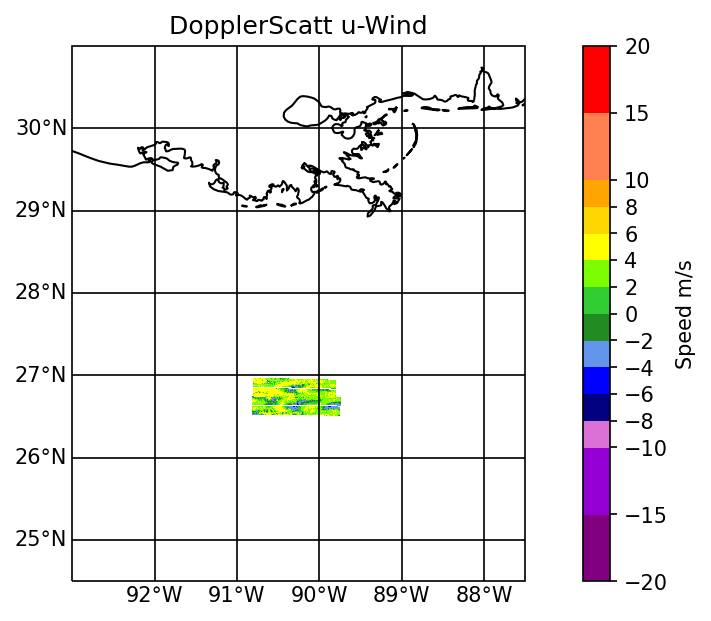

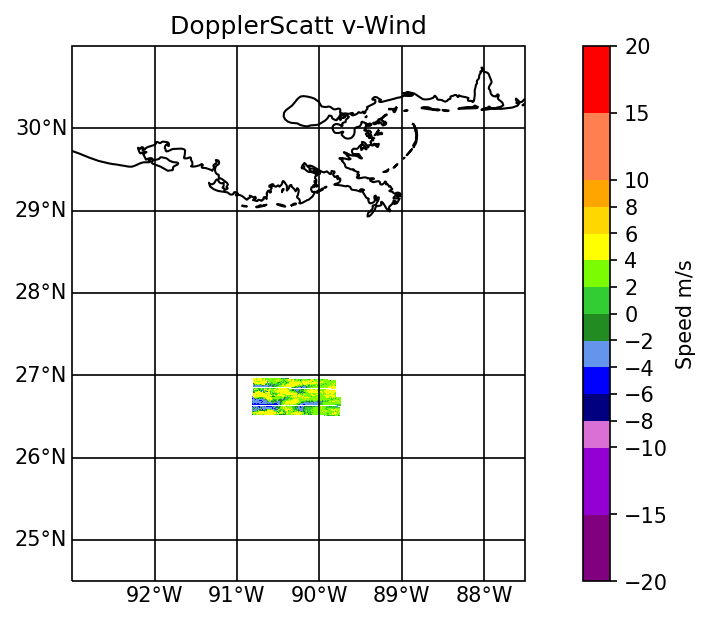

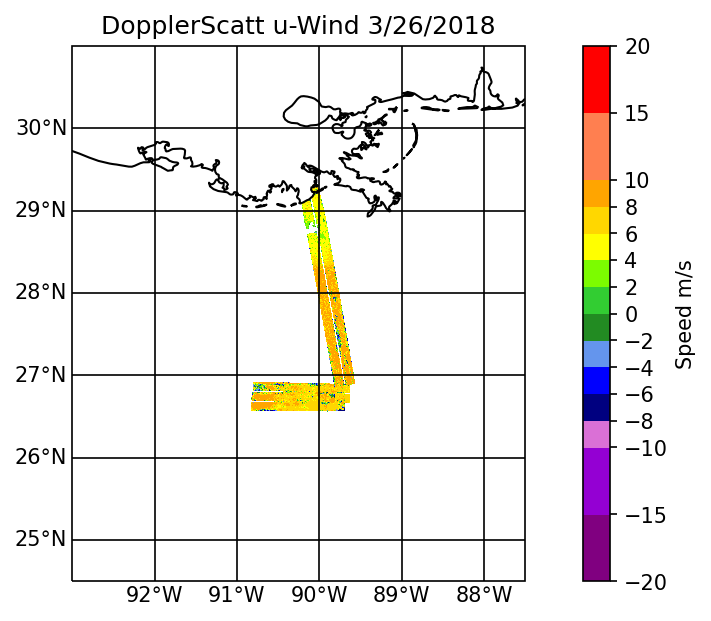

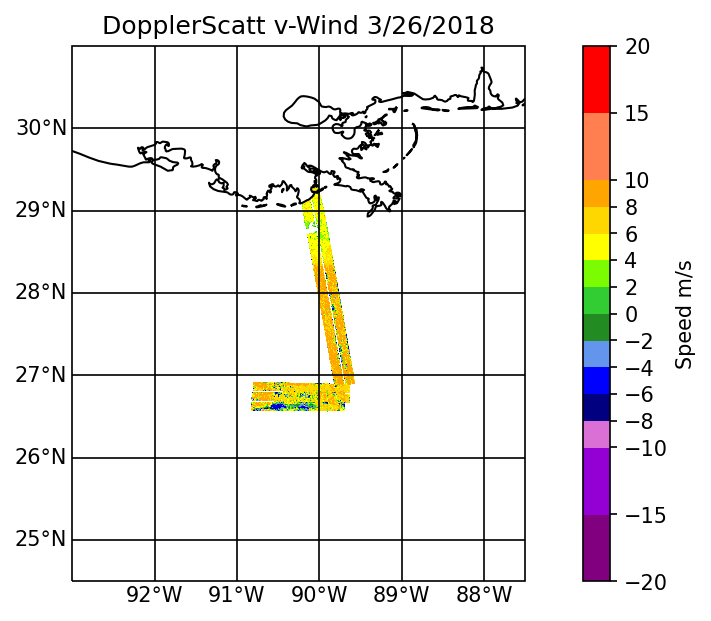

"\nmapcrs = ccrs.PlateCarree()\nfig = plt.figure(figsize=(8, 4), dpi=150)\nax = fig.add_subplot(111, projection=mapcrs)\nax.set_extent([-93, -87.5, 24.5, 31], crs=mapcrs)\nax.coastlines()\n\ncs = ax.contourf(ds26_1.longitude.values, ds26_1.latitude.values, goodWindVarr26_1)\ncs = ax.contourf(ds26_2.longitude.values, ds26_2.latitude.values, goodWindVarr26_2)\ncs = ax.contourf(ds26_3.longitude.values, ds26_3.latitude.values, goodWindVarr26_3)\ncs = ax.contourf(ds26_4.longitude.values, ds26_4.latitude.values, goodWindVarr26_4)\ncs = ax.contourf(ds26_5.longitude.values, ds26_5.latitude.values, goodWindVarr26_5)\ncs = ax.contourf(ds26_6.longitude.values, ds26_6.latitude.values, goodWindVarr26_6)\ncs = ax.contourf(ds26_7.longitude.values, ds26_7.latitude.values, goodWindVarr26_7)\ncs = ax.contourf(ds26_8.longitude.values, ds26_8.latitude.values, goodWindVarr26_8)\ncs = ax.contourf(ds26_9.longitude.values, ds26_9.latitude.values, goodWindVarr26_9)\ncs = ax.contourf(ds26_10.longitude.values, d

In [36]:
#check DS26 v_wind
#-20 to 16 
#cmap = mpl.colors.ListedColormap(['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal', 'forestgreen', 'limegreen', 
#                                  'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cmap = mpl.colors.ListedColormap(['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
bounds = [-20, -15, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 15, 20]
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-93, -87.5, 24.5, 31], crs=mapcrs)
ax.coastlines()
#cs = ax.contourf(ds25_1.longitude.values, ds25_1.latitude.values, goodWindUarr25_1, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
#                                  'lawngreen', 'yellow', 'gold', 'khaki', 'orange', 'coral', 'red', 'maroon' ])
#cs = ax.contourf(ds25_2.longitude.values, ds25_2.latitude.values, goodWindUarr25_2, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
#                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
#cs = ax.contourf(ds25_3.longitude.values, ds25_3.latitude.values, goodWindUarr25_3, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
#                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
#cs = ax.contourf(ds25_4.longitude.values, ds25_4.latitude.values, goodWindUarr25_4, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
#                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_5.longitude.values, ds25_5.latitude.values, goodWindUarr25_5, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_6.longitude.values, ds25_6.latitude.values, goodWindUarr25_6, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold',  'orange','coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_7.longitude.values, ds25_7.latitude.values, goodWindUarr25_7, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
#cs = ax.contourf(ds25_8.longitude.values, ds25_8.latitude.values, goodWindUarr25_8, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
#                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
#cs = ax.contourf(ds25_9.longitude.values, ds25_9.latitude.values, goodWindUarr25_9, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
#                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
#cs = ax.contourf(ds25_10.longitude.values, ds25_10.latitude.values, goodWindUarr25_10 , levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
#                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, cmap=cmap, norm=norm, ticks = bounds, spacing = 'proportional', label = 'Speed m/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('DopplerScatt u-Wind')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'Wind_DS25U_new_Flag.png',  bbox_inches = 'tight',dpi = 150)
plt.show()

''''
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-91, -89.5, 26.25, 29.5], crs=mapcrs)
ax.coastlines()

cs = ax.contourf(ds25_1.longitude.values, ds25_1.latitude.values, goodWindUarr25_1)
cs = ax.contourf(ds25_2.longitude.values, ds25_2.latitude.values, goodWindUarr25_2)
cs = ax.contourf(ds25_3.longitude.values, ds25_3.latitude.values, goodWindUarr25_3)
cs = ax.contourf(ds25_4.longitude.values, ds25_4.latitude.values, goodWindUarr25_4)
cs = ax.contourf(ds25_5.longitude.values, ds25_5.latitude.values, goodWindUarr25_5)
cs = ax.contourf(ds25_6.longitude.values, ds25_6.latitude.values, goodWindUarr25_6)
cs = ax.contourf(ds25_7.longitude.values, ds25_7.latitude.values, goodWindUarr25_7)
cs = ax.contourf(ds25_8.longitude.values, ds25_8.latitude.values, goodWindUarr25_8)
cs = ax.contourf(ds25_9.longitude.values, ds25_9.latitude.values, goodWindUarr25_9)
cs = ax.contourf(ds25_10.longitude.values, ds25_10.latitude.values, goodWindUarr25_10)

PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('With Error Flag u-Wind 3/25/2018')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'Wind_DS25U_default_Flag.png',  bbox_inches = 'tight',dpi = 150)
plt.show()
'''

#-12 to 9 
cmap = mpl.colors.ListedColormap(['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
bounds = [-20, -15, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 15, 20]
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-93, -87.5, 24.5, 31], crs=mapcrs)
ax.coastlines()
#cs = ax.contourf(ds25_1.longitude.values, ds25_1.latitude.values, goodWindVarr25_1, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
#                                  'lawngreen', 'yellow', 'gold',  'orange', 'coral', 'red', 'maroon' ])
#cs = ax.contourf(ds25_2.longitude.values, ds25_2.latitude.values, goodWindVarr25_2, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
#                                  'lawngreen', 'yellow', 'gold',  'orange', 'coral', 'red', 'maroon' ])
#cs = ax.contourf(ds25_3.longitude.values, ds25_3.latitude.values, goodWindVarr25_3, levels= bounds, colors =['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
#                                  'lawngreen', 'yellow', 'gold',  'orange', 'coral', 'red', 'maroon' ])
#cs = ax.contourf(ds25_4.longitude.values, ds25_4.latitude.values, goodWindVarr25_4, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
#                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_5.longitude.values, ds25_5.latitude.values, goodWindVarr25_5, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue','forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_6.longitude.values, ds25_6.latitude.values, goodWindVarr25_6, levels= bounds, colors =['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue',  'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_7.longitude.values, ds25_7.latitude.values, goodWindVarr25_7, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue','forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
#cs = ax.contourf(ds25_8.longitude.values, ds25_8.latitude.values, goodWindVarr25_8, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
#                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
#cs = ax.contourf(ds25_9.longitude.values, ds25_9.latitude.values, goodWindVarr25_9, levels= bounds, colors =['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue',  'forestgreen', 'limegreen', 
#                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
#cs = ax.contourf(ds25_10.longitude.values, ds25_10.latitude.values, goodWindVarr25_10 , levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue','forestgreen', 'limegreen', 
#                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, cmap=cmap, norm=norm, ticks = bounds, spacing = 'proportional', label = 'Speed m/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('DopplerScatt v-Wind')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'Wind_DS25V_new_Flag.png',  bbox_inches = 'tight',dpi = 150)
plt.show()
'''
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-93, -87.5, 24.5, 31], crs=mapcrs)
ax.coastlines()

cs = ax.contourf(ds25_1.longitude.values, ds25_1.latitude.values, goodWindVarr25_1)
cs = ax.contourf(ds25_2.longitude.values, ds25_2.latitude.values, goodWindVarr25_2)
cs = ax.contourf(ds25_3.longitude.values, ds25_3.latitude.values, goodWindVarr25_3)
cs = ax.contourf(ds25_4.longitude.values, ds25_4.latitude.values, goodWindVarr25_4)
cs = ax.contourf(ds25_5.longitude.values, ds25_5.latitude.values, goodWindVarr25_5)
cs = ax.contourf(ds25_6.longitude.values, ds25_6.latitude.values, goodWindVarr25_6)
cs = ax.contourf(ds25_7.longitude.values, ds25_7.latitude.values, goodWindVarr25_7)
cs = ax.contourf(ds25_8.longitude.values, ds25_8.latitude.values, goodWindVarr25_8)
cs = ax.contourf(ds25_9.longitude.values, ds25_9.latitude.values, goodWindVarr25_9)
cs = ax.contourf(ds25_10.longitude.values, ds25_10.latitude.values, goodWindVarr25_10)

PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('With Error Flag v-Wind 3/25/2018')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'Wind_DS25V_default_Flag.png',  bbox_inches = 'tight',dpi = 150)
plt.show()


#-12 to 15 

cmap = mpl.colors.ListedColormap(['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'palegreen', 'yellow', 'gold','orange', 'coral', 'red', 'maroon' ])
bounds = [-20, -15, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 15, 20]
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-93, -87.5, 24.5, 31], crs=mapcrs)
ax.coastlines()
cs = ax.contourf(ds26_1.longitude.values, ds26_1.latitude.values, goodWindUarr26_1, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue',  'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_2.longitude.values, ds26_2.latitude.values, goodWindUarr26_2, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_3.longitude.values, ds26_3.latitude.values, goodWindUarr26_3, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_4.longitude.values, ds26_4.latitude.values, goodWindUarr26_4, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_5.longitude.values, ds26_5.latitude.values, goodWindUarr26_5, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_6.longitude.values, ds26_6.latitude.values, goodWindUarr26_6, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold',  'orange','coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_7.longitude.values, ds26_7.latitude.values, goodWindUarr26_7, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold',  'orange','coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_8.longitude.values, ds26_8.latitude.values, goodWindUarr26_8, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold',  'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_9.longitude.values, ds26_9.latitude.values, goodWindUarr26_9, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_10.longitude.values, ds26_10.latitude.values, goodWindUarr26_10 , levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_11.longitude.values, ds26_11.latitude.values, goodWindUarr26_11, levels = bounds, colors =['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, cmap=cmap, norm=norm, ticks = bounds, spacing = 'proportional', label = 'Speed m/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('DopplerScatt u-Wind 3/26/2018')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'Wind_DS26U_new_Flag.png',  bbox_inches = 'tight',dpi = 150)
plt.show()


mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-91, -89.5, 26.25, 29.5], crs=mapcrs)
ax.coastlines()

cs = ax.contourf(ds26_1.longitude.values, ds26_1.latitude.values, goodWindUarr26_1)
cs = ax.contourf(ds26_2.longitude.values, ds26_2.latitude.values, goodWindUarr26_2)
cs = ax.contourf(ds26_3.longitude.values, ds26_3.latitude.values, goodWindUarr26_3)
cs = ax.contourf(ds26_4.longitude.values, ds26_4.latitude.values, goodWindUarr26_4)
cs = ax.contourf(ds26_5.longitude.values, ds26_5.latitude.values, goodWindUarr26_5)
cs = ax.contourf(ds26_6.longitude.values, ds26_6.latitude.values, goodWindUarr26_6)
cs = ax.contourf(ds26_7.longitude.values, ds26_7.latitude.values, goodWindUarr26_7)
cs = ax.contourf(ds26_8.longitude.values, ds26_8.latitude.values, goodWindUarr26_8)
cs = ax.contourf(ds26_9.longitude.values, ds26_9.latitude.values, goodWindUarr26_9)
cs = ax.contourf(ds26_10.longitude.values, ds26_10.latitude.values, goodWindUarr26_10)
cs = ax.contourf(ds26_11.longitude.values, ds26_11.latitude.values, goodWindUarr26_11)

PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('With Error Flag u-Wind 3/26/2018')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'Wind_DS26U_default_Flag.png', bbox_inches = 'tight', dpi = 150)
plt.show()

#-12 to 12 
cmap = mpl.colors.ListedColormap(['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'palegreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
bounds = [-20, -15, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 15, 20]
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-93, -87.5, 24.5, 31], crs=mapcrs)
ax.coastlines()
cs = ax.contourf(ds26_1.longitude.values, ds26_1.latitude.values, goodWindVarr26_1, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_2.longitude.values, ds26_2.latitude.values, goodWindVarr26_2, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_3.longitude.values, ds26_3.latitude.values, goodWindVarr26_3, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_4.longitude.values, ds26_4.latitude.values, goodWindVarr26_4, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_5.longitude.values, ds26_5.latitude.values, goodWindVarr26_5, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_6.longitude.values, ds26_6.latitude.values, goodWindVarr26_6, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_7.longitude.values, ds26_7.latitude.values, goodWindVarr26_7, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_8.longitude.values, ds26_8.latitude.values, goodWindVarr26_8, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_9.longitude.values, ds26_9.latitude.values, goodWindVarr26_9, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_10.longitude.values, ds26_10.latitude.values, goodWindVarr26_10 , levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_11.longitude.values, ds26_11.latitude.values, goodWindVarr26_11, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, cmap=cmap, norm=norm, ticks = bounds, spacing = 'proportional', label = 'Speed m/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('DopplerScatt v-Wind 3/26/2018')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'Wind_DS26V_new_Flag.png',  bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-93, -87.5, 24.5, 31], crs=mapcrs)
ax.coastlines()

cs = ax.contourf(ds26_1.longitude.values, ds26_1.latitude.values, goodWindVarr26_1)
cs = ax.contourf(ds26_2.longitude.values, ds26_2.latitude.values, goodWindVarr26_2)
cs = ax.contourf(ds26_3.longitude.values, ds26_3.latitude.values, goodWindVarr26_3)
cs = ax.contourf(ds26_4.longitude.values, ds26_4.latitude.values, goodWindVarr26_4)
cs = ax.contourf(ds26_5.longitude.values, ds26_5.latitude.values, goodWindVarr26_5)
cs = ax.contourf(ds26_6.longitude.values, ds26_6.latitude.values, goodWindVarr26_6)
cs = ax.contourf(ds26_7.longitude.values, ds26_7.latitude.values, goodWindVarr26_7)
cs = ax.contourf(ds26_8.longitude.values, ds26_8.latitude.values, goodWindVarr26_8)
cs = ax.contourf(ds26_9.longitude.values, ds26_9.latitude.values, goodWindVarr26_9)
cs = ax.contourf(ds26_10.longitude.values, ds26_10.latitude.values, goodWindVarr26_10)
cs = ax.contourf(ds26_11.longitude.values, ds26_11.latitude.values, goodWindVarr26_11)

PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('With Error Flag v-Wind 3/26/2018')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'Wind_DS26V_default_Flag.png',  bbox_inches = 'tight',dpi = 150)
plt.show()
'''

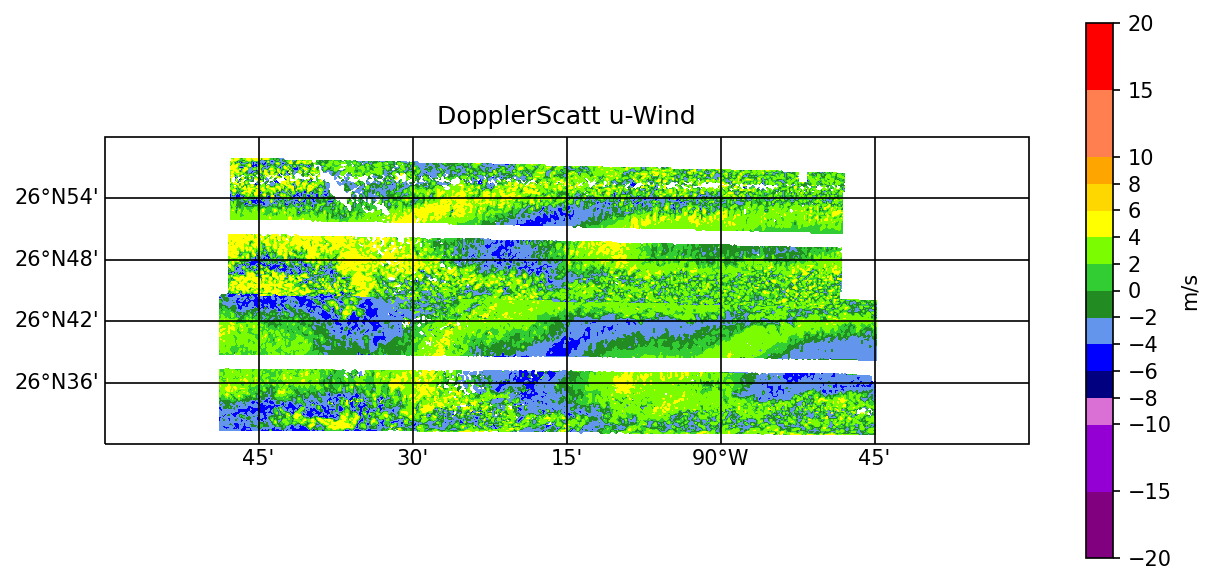

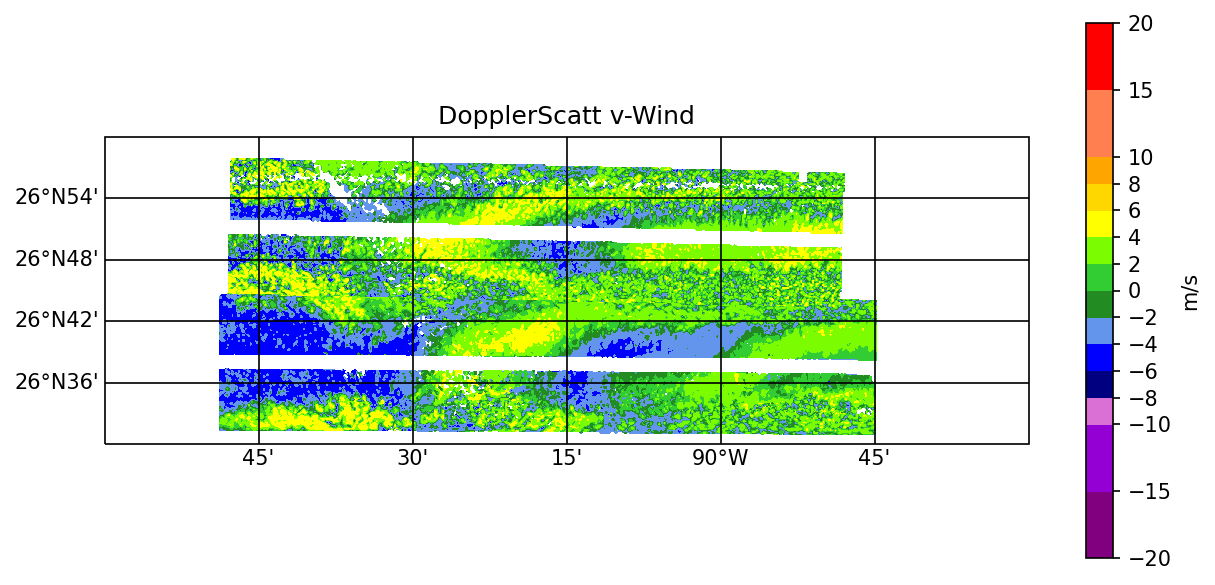

"\n#-12 to 15 \n\ncmap = mpl.colors.ListedColormap(['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'forestgreen', 'limegreen', \n                                  'lawngreen', 'palegreen', 'yellow', 'gold','orange', 'coral', 'red', 'maroon' ])\nbounds = [-20, -15, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 15, 20]\nmapcrs = ccrs.PlateCarree()\nfig = plt.figure(figsize=(8, 4), dpi=150)\nax = fig.add_subplot(111, projection=mapcrs)\nax.set_extent([-91, -89.5, 26.5, 27], crs=mapcrs)\nax.coastlines()\ncs = ax.contourf(ds26_1.longitude.values, ds26_1.latitude.values, goodWindUarr26_1, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue',  'forestgreen', 'limegreen', \n                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])\ncs = ax.contourf(ds26_2.longitude.values, ds26_2.latitude.values, goodWindUarr26_2, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy',

In [38]:
#zoom in Wind components


cmap = mpl.colors.ListedColormap(['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
bounds = [-20, -15, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 15, 20]
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-91, -89.5, 26.5, 27], crs=mapcrs)
ax.coastlines()
#cs = ax.contourf(ds25_1.longitude.values, ds25_1.latitude.values, goodWindUarr25_1, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
#                                  'lawngreen', 'yellow', 'gold', 'khaki', 'orange', 'coral', 'red', 'maroon' ])
#cs = ax.contourf(ds25_2.longitude.values, ds25_2.latitude.values, goodWindUarr25_2, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
#                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
#cs = ax.contourf(ds25_3.longitude.values, ds25_3.latitude.values, goodWindUarr25_3, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
#                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
#cs = ax.contourf(ds25_4.longitude.values, ds25_4.latitude.values, goodWindUarr25_4, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
#                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_5.longitude.values, ds25_5.latitude.values, goodWindUarr25_5, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_6.longitude.values, ds25_6.latitude.values, goodWindUarr25_6, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold',  'orange','coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_7.longitude.values, ds25_7.latitude.values, goodWindUarr25_7, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
#cs = ax.contourf(ds25_8.longitude.values, ds25_8.latitude.values, goodWindUarr25_8, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
#                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
#cs = ax.contourf(ds25_9.longitude.values, ds25_9.latitude.values, goodWindUarr25_9, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
#                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
#cs = ax.contourf(ds25_10.longitude.values, ds25_10.latitude.values, goodWindUarr25_10 , levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
#                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, cmap=cmap, norm=norm, ticks = bounds, spacing = 'proportional', label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('DopplerScatt u-Wind')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'zoom_Wind_DS25U_new_Flag.png',  bbox_inches = 'tight',dpi = 150)
plt.show()



#-12 to 9 
cmap = mpl.colors.ListedColormap(['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
bounds = [-20, -15, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 15, 20]
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-91, -89.5, 26.5, 27], crs=mapcrs)
ax.coastlines()
#cs = ax.contourf(ds25_1.longitude.values, ds25_1.latitude.values, goodWindVarr25_1, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
#                                  'lawngreen', 'yellow', 'gold',  'orange', 'coral', 'red', 'maroon' ])
#cs = ax.contourf(ds25_2.longitude.values, ds25_2.latitude.values, goodWindVarr25_2, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
#                                  'lawngreen', 'yellow', 'gold',  'orange', 'coral', 'red', 'maroon' ])
#cs = ax.contourf(ds25_3.longitude.values, ds25_3.latitude.values, goodWindVarr25_3, levels= bounds, colors =['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
#                                  'lawngreen', 'yellow', 'gold',  'orange', 'coral', 'red', 'maroon' ])
#cs = ax.contourf(ds25_4.longitude.values, ds25_4.latitude.values, goodWindVarr25_4, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
#                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_5.longitude.values, ds25_5.latitude.values, goodWindVarr25_5, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue','forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_6.longitude.values, ds25_6.latitude.values, goodWindVarr25_6, levels= bounds, colors =['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue',  'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_7.longitude.values, ds25_7.latitude.values, goodWindVarr25_7, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue','forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
#cs = ax.contourf(ds25_8.longitude.values, ds25_8.latitude.values, goodWindVarr25_8, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
#                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
#cs = ax.contourf(ds25_9.longitude.values, ds25_9.latitude.values, goodWindVarr25_9, levels= bounds, colors =['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue',  'forestgreen', 'limegreen', 
#                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
#cs = ax.contourf(ds25_10.longitude.values, ds25_10.latitude.values, goodWindVarr25_10 , levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue','forestgreen', 'limegreen', 
#                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, cmap=cmap, norm=norm, ticks = bounds, spacing = 'proportional', label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('DopplerScatt v-Wind')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'zoom_Wind_DS25V_new_Flag.png',  bbox_inches = 'tight',dpi = 150)
plt.show()

'''
#-12 to 15 

cmap = mpl.colors.ListedColormap(['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'palegreen', 'yellow', 'gold','orange', 'coral', 'red', 'maroon' ])
bounds = [-20, -15, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 15, 20]
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-91, -89.5, 26.5, 27], crs=mapcrs)
ax.coastlines()
cs = ax.contourf(ds26_1.longitude.values, ds26_1.latitude.values, goodWindUarr26_1, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue',  'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_2.longitude.values, ds26_2.latitude.values, goodWindUarr26_2, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_3.longitude.values, ds26_3.latitude.values, goodWindUarr26_3, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_4.longitude.values, ds26_4.latitude.values, goodWindUarr26_4, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_5.longitude.values, ds26_5.latitude.values, goodWindUarr26_5, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_6.longitude.values, ds26_6.latitude.values, goodWindUarr26_6, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold',  'orange','coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_7.longitude.values, ds26_7.latitude.values, goodWindUarr26_7, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold',  'orange','coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_8.longitude.values, ds26_8.latitude.values, goodWindUarr26_8, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold',  'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_9.longitude.values, ds26_9.latitude.values, goodWindUarr26_9, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_10.longitude.values, ds26_10.latitude.values, goodWindUarr26_10 , levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_11.longitude.values, ds26_11.latitude.values, goodWindUarr26_11, levels = bounds, colors =['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, cmap=cmap, norm=norm, ticks = bounds, spacing = 'proportional', label = 'Speed m/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('DopplerScatt u-Wind 3/26/2018')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'zoom_Wind_DS26U_new_Flag.png',  bbox_inches = 'tight',dpi = 150)
plt.show()


#-12 to 12 
cmap = mpl.colors.ListedColormap(['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'palegreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
bounds = [-20, -15, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 15, 20]
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-91, -89.5, 26.5, 27], crs=mapcrs)
ax.coastlines()
cs = ax.contourf(ds26_1.longitude.values, ds26_1.latitude.values, goodWindVarr26_1, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_2.longitude.values, ds26_2.latitude.values, goodWindVarr26_2, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_3.longitude.values, ds26_3.latitude.values, goodWindVarr26_3, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_4.longitude.values, ds26_4.latitude.values, goodWindVarr26_4, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_5.longitude.values, ds26_5.latitude.values, goodWindVarr26_5, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_6.longitude.values, ds26_6.latitude.values, goodWindVarr26_6, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_7.longitude.values, ds26_7.latitude.values, goodWindVarr26_7, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_8.longitude.values, ds26_8.latitude.values, goodWindVarr26_8, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_9.longitude.values, ds26_9.latitude.values, goodWindVarr26_9, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_10.longitude.values, ds26_10.latitude.values, goodWindVarr26_10 , levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_11.longitude.values, ds26_11.latitude.values, goodWindVarr26_11, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, cmap=cmap, norm=norm, ticks = bounds, spacing = 'proportional', label = 'Speed m/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('DopplerScatt v-Wind 3/26/2018')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'zoom_Wind_DS26V_new_Flag.png',  bbox_inches = 'tight',dpi = 150)
plt.show()
'''


In [39]:
# calculte wind speed with error flags applied

windSpeed25_1 = np.sqrt(goodWindUarr25_1**2 + goodWindVarr25_1**2)
windSpeed25_2 = np.sqrt(goodWindUarr25_2**2 + goodWindVarr25_2**2)
windSpeed25_3 = np.sqrt(goodWindUarr25_3**2 + goodWindVarr25_3**2)
windSpeed25_4 = np.sqrt(goodWindUarr25_4**2 + goodWindVarr25_4**2)
windSpeed25_5 = np.sqrt(goodWindUarr25_5**2 + goodWindVarr25_5**2)
windSpeed25_6 = np.sqrt(goodWindUarr25_6**2 + goodWindVarr25_6**2)
windSpeed25_7 = np.sqrt(goodWindUarr25_7**2 + goodWindVarr25_7**2)
windSpeed25_8 = np.sqrt(goodWindUarr25_8**2 + goodWindVarr25_8**2)
windSpeed25_9 = np.sqrt(goodWindUarr25_9**2 + goodWindVarr25_9**2)
windSpeed25_10 = np.sqrt(goodWindUarr25_10**2 + goodWindVarr25_10**2)

windSpeed26_1 = np.sqrt(goodWindUarr26_1**2 + goodWindVarr26_1**2)
windSpeed26_2 = np.sqrt(goodWindUarr26_2**2 + goodWindVarr26_2**2)
windSpeed26_3 = np.sqrt(goodWindUarr26_3**2 + goodWindVarr26_3**2)
windSpeed26_4 = np.sqrt(goodWindUarr26_4**2 + goodWindVarr26_4**2)
windSpeed26_5 = np.sqrt(goodWindUarr26_5**2 + goodWindVarr26_5**2)
windSpeed26_6 = np.sqrt(goodWindUarr26_6**2 + goodWindVarr26_6**2)
windSpeed26_7 = np.sqrt(goodWindUarr26_7**2 + goodWindVarr26_7**2)
windSpeed26_8 = np.sqrt(goodWindUarr26_8**2 + goodWindVarr26_8**2)
windSpeed26_9 = np.sqrt(goodWindUarr26_9**2 + goodWindVarr26_9**2)
windSpeed26_10 = np.sqrt(goodWindUarr26_10**2 + goodWindVarr26_10**2)
windSpeed26_11 = np.sqrt(goodWindUarr26_11**2 + goodWindVarr26_11**2)



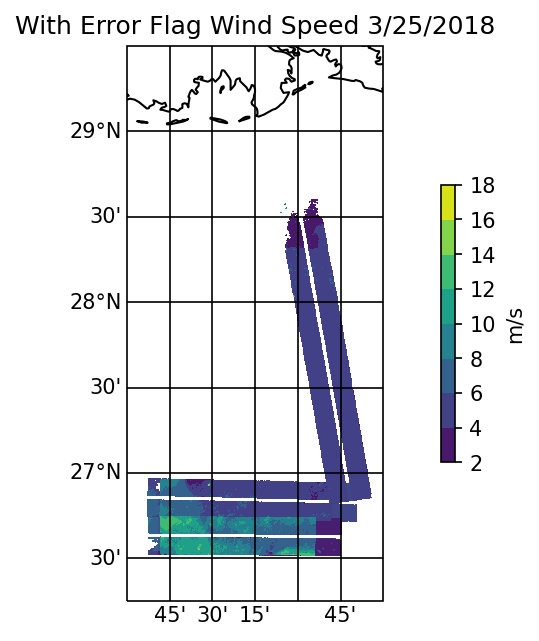

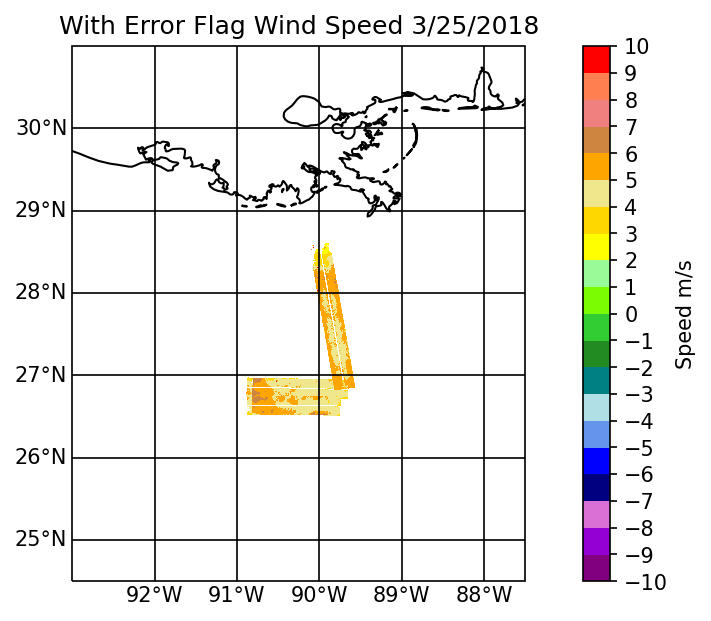

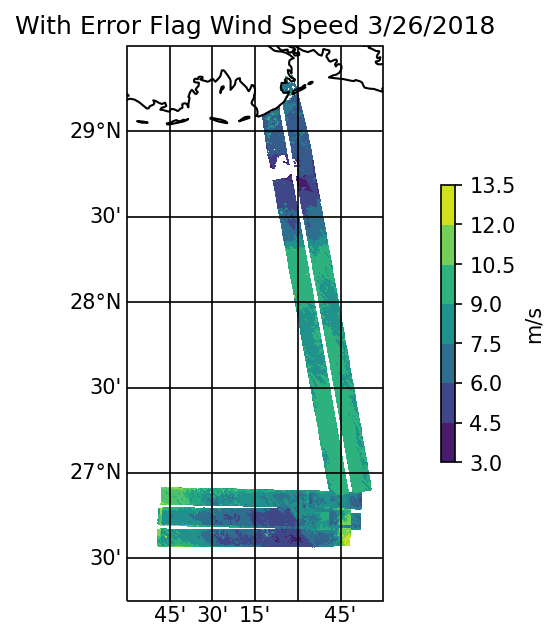

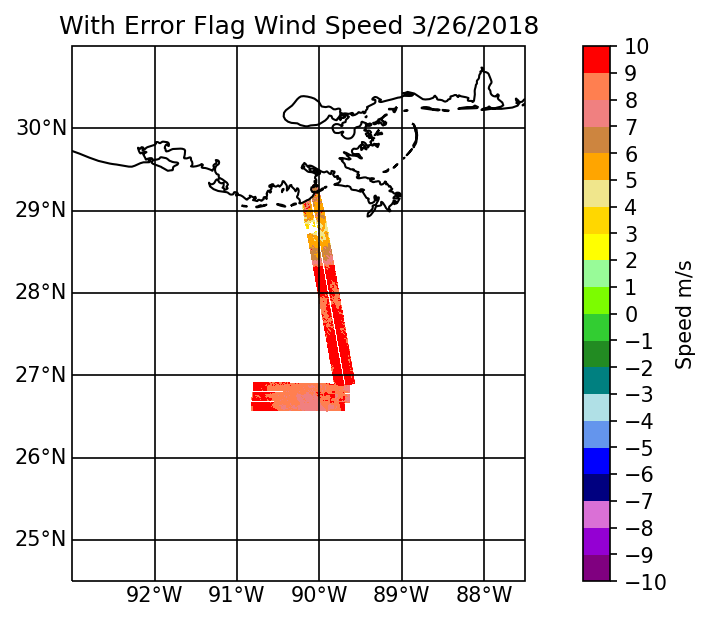

In [40]:
#plot wind speeds with error flag applied 
#2-18
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-91, -89.5, 26.25, 29.5], crs=mapcrs)
ax.coastlines()

cs = ax.contourf(ds25_1.longitude.values, ds25_1.latitude.values, windSpeed25_1)
cs = ax.contourf(ds25_2.longitude.values, ds25_2.latitude.values, windSpeed25_2)
cs = ax.contourf(ds25_3.longitude.values, ds25_3.latitude.values, windSpeed25_3)
cs = ax.contourf(ds25_4.longitude.values, ds25_4.latitude.values, windSpeed25_4)
cs = ax.contourf(ds25_5.longitude.values, ds25_5.latitude.values, windSpeed25_5)
cs = ax.contourf(ds25_6.longitude.values, ds25_6.latitude.values, windSpeed25_6)
cs = ax.contourf(ds25_7.longitude.values, ds25_7.latitude.values, windSpeed25_7)
cs = ax.contourf(ds25_8.longitude.values, ds25_8.latitude.values, windSpeed25_8)
cs = ax.contourf(ds25_9.longitude.values, ds25_9.latitude.values, windSpeed25_9)
cs = ax.contourf(ds25_10.longitude.values, ds25_10.latitude.values, windSpeed25_10)

PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('With Error Flag Wind Speed 3/25/2018')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'WindSpeed_DS25_default_Flag.png',bbox_inches = 'tight', dpi = 150)
plt.show()


cmap = mpl.colors.ListedColormap(['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
bounds = [-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-93, -87.5, 24.5, 31], crs=mapcrs)
ax.coastlines()
cs = ax.contourf(ds25_1.longitude.values, ds25_1.latitude.values, windSpeed25_1, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_2.longitude.values, ds25_2.latitude.values, windSpeed25_2, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_3.longitude.values, ds25_3.latitude.values, windSpeed25_3, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_4.longitude.values, ds25_4.latitude.values, windSpeed25_4, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_5.longitude.values, ds25_5.latitude.values, windSpeed25_5, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_6.longitude.values, ds25_6.latitude.values, windSpeed25_6, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_7.longitude.values, ds25_7.latitude.values, windSpeed25_7, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_8.longitude.values, ds25_8.latitude.values, windSpeed25_8, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_9.longitude.values, ds25_9.latitude.values, windSpeed25_9, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_10.longitude.values, ds25_10.latitude.values, windSpeed25_10, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, cmap=cmap, norm=norm, ticks = bounds, spacing = 'proportional', label = 'Speed m/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('With Error Flag Wind Speed 3/25/2018')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'WindSpeed_DS25_new_Flag.png',bbox_inches = 'tight', dpi = 150)
plt.show()



#3-13.5
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-91, -89.5, 26.25, 29.5], crs=mapcrs)
ax.coastlines()

cs = ax.contourf(ds26_1.longitude.values, ds26_1.latitude.values, windSpeed26_1)
cs = ax.contourf(ds26_2.longitude.values, ds26_2.latitude.values, windSpeed26_2)
cs = ax.contourf(ds26_3.longitude.values, ds26_3.latitude.values, windSpeed26_3)
cs = ax.contourf(ds26_4.longitude.values, ds26_4.latitude.values, windSpeed26_4)
cs = ax.contourf(ds26_5.longitude.values, ds26_5.latitude.values, windSpeed26_5)
cs = ax.contourf(ds26_6.longitude.values, ds26_6.latitude.values, windSpeed26_6)
cs = ax.contourf(ds26_7.longitude.values, ds26_7.latitude.values, windSpeed26_7)
cs = ax.contourf(ds26_8.longitude.values, ds26_8.latitude.values, windSpeed26_8)
cs = ax.contourf(ds26_9.longitude.values, ds26_9.latitude.values, windSpeed26_9)
cs = ax.contourf(ds26_10.longitude.values, ds26_10.latitude.values, windSpeed26_10)
cs = ax.contourf(ds26_11.longitude.values, ds26_11.latitude.values, windSpeed26_11)

PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('With Error Flag Wind Speed 3/26/2018')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'WindSpeed_DS26_default_Flag.png',bbox_inches = 'tight', dpi = 150)
plt.show()


cmap = mpl.colors.ListedColormap(['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
bounds = [-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-93, -87.5, 24.5, 31], crs=mapcrs)
ax.coastlines()
cs = ax.contourf(ds26_1.longitude.values, ds26_1.latitude.values, windSpeed26_1, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_2.longitude.values, ds26_2.latitude.values, windSpeed26_2, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_3.longitude.values, ds26_3.latitude.values, windSpeed26_3, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_4.longitude.values, ds26_4.latitude.values, windSpeed26_4, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_5.longitude.values, ds26_5.latitude.values, windSpeed26_5, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_6.longitude.values, ds26_6.latitude.values, windSpeed26_6, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_7.longitude.values, ds26_7.latitude.values, windSpeed26_7, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_8.longitude.values, ds26_8.latitude.values, windSpeed26_8, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_9.longitude.values, ds26_9.latitude.values, windSpeed26_9, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_10.longitude.values, ds26_10.latitude.values, windSpeed26_10 , levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_11.longitude.values, ds26_11.latitude.values, windSpeed26_11, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, cmap=cmap, norm=norm, ticks = bounds, spacing = 'proportional', label = 'Speed m/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('With Error Flag Wind Speed 3/26/2018')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'WindSpeed_DS26_new_Flag.png', bbox_inches = 'tight', dpi = 150)
plt.show()


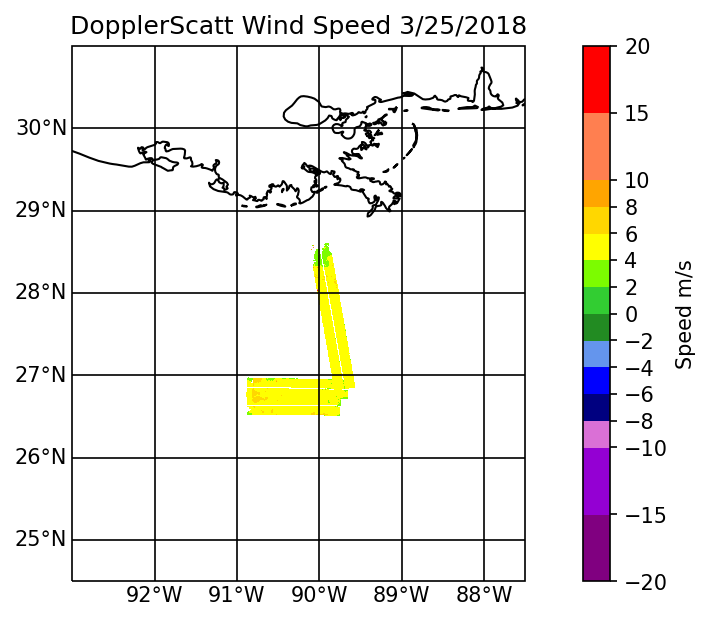

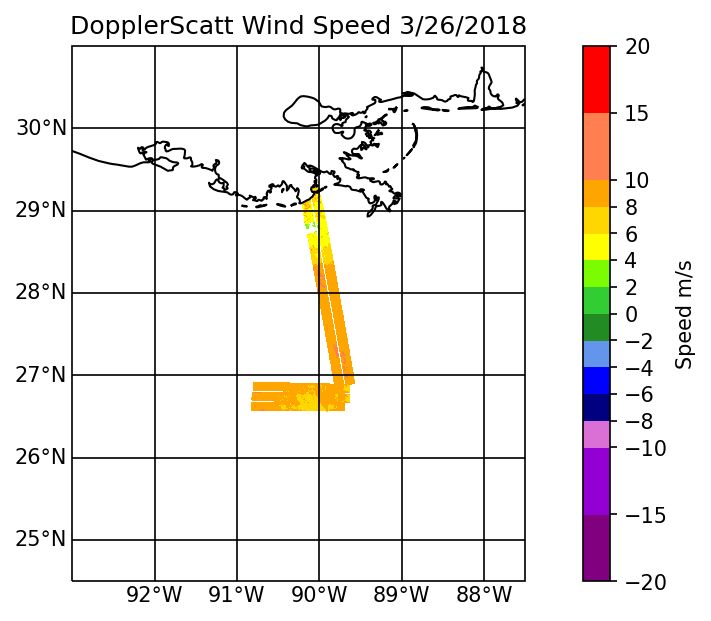

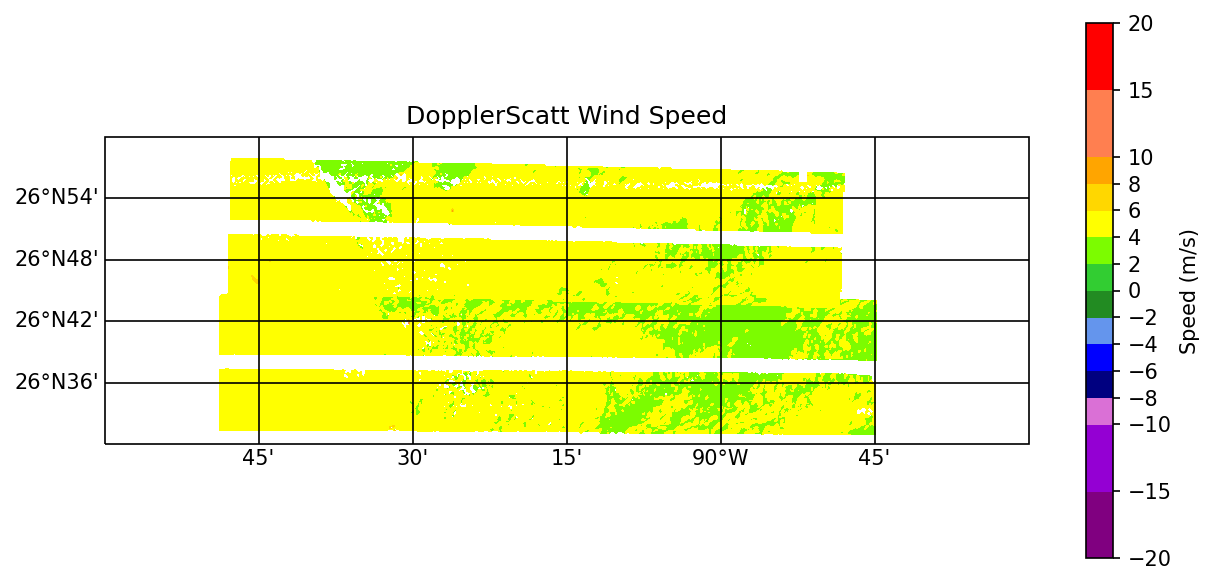

"\n\n#-12 to 15 \n\ncmap = mpl.colors.ListedColormap(['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'forestgreen', 'limegreen', \n                                  'lawngreen', 'palegreen', 'yellow', 'gold','orange', 'coral', 'red', 'maroon' ])\nbounds = [-20, -15, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 15, 20]\nmapcrs = ccrs.PlateCarree()\nfig = plt.figure(figsize=(8, 4), dpi=150)\nax = fig.add_subplot(111, projection=mapcrs)\nax.set_extent([-91, -89.5, 26.5, 27], crs=mapcrs)\nax.coastlines()\ncs = ax.contourf(ds26_1.longitude.values, ds26_1.latitude.values, windSpeed26_1, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue',  'forestgreen', 'limegreen', \n                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])\ncs = ax.contourf(ds26_2.longitude.values, ds26_2.latitude.values, windSpeed26_2, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'bl

In [42]:
#plot wind speeds with error flag applied --- ZOOM IN 
#2-18

#-12 to 9 
cmap = mpl.colors.ListedColormap(['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
bounds = [-20, -15, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 15, 20]
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-93, -87.5, 24.5, 31], crs=mapcrs)
ax.coastlines()
cs = ax.contourf(ds25_1.longitude.values, ds25_1.latitude.values, windSpeed25_1, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold',  'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_2.longitude.values, ds25_2.latitude.values, windSpeed25_2, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold',  'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_3.longitude.values, ds25_3.latitude.values, windSpeed25_3, levels= bounds, colors =['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold',  'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_4.longitude.values, ds25_4.latitude.values, windSpeed25_4, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_5.longitude.values, ds25_5.latitude.values, windSpeed25_5, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue','forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_6.longitude.values, ds25_6.latitude.values, windSpeed25_6, levels= bounds, colors =['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue',  'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_7.longitude.values, ds25_7.latitude.values, windSpeed25_7, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue','forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_8.longitude.values, ds25_8.latitude.values, windSpeed25_8, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_9.longitude.values, ds25_9.latitude.values, windSpeed25_9, levels= bounds, colors =['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue',  'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_10.longitude.values, ds25_10.latitude.values, windSpeed25_10 , levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue','forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, cmap=cmap, norm=norm, ticks = bounds, spacing = 'proportional', label = 'Speed m/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('DopplerScatt Wind Speed 3/25/2018')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'WindSpeed_DS25_new_Flag.png',  bbox_inches = 'tight',dpi = 150)
plt.show()


#-12 to 15 

cmap = mpl.colors.ListedColormap(['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'palegreen', 'yellow', 'gold','orange', 'coral', 'red', 'maroon' ])
bounds = [-20, -15, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 15, 20]
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-93, -87.5, 24.5, 31], crs=mapcrs)
ax.coastlines()
cs = ax.contourf(ds26_1.longitude.values, ds26_1.latitude.values, windSpeed26_1, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue',  'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_2.longitude.values, ds26_2.latitude.values, windSpeed26_2, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_3.longitude.values, ds26_3.latitude.values, windSpeed26_3, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_4.longitude.values, ds26_4.latitude.values, windSpeed26_4, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_5.longitude.values, ds26_5.latitude.values, windSpeed26_5, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_6.longitude.values, ds26_6.latitude.values, windSpeed26_6, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold',  'orange','coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_7.longitude.values, ds26_7.latitude.values, windSpeed26_7, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold',  'orange','coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_8.longitude.values, ds26_8.latitude.values, windSpeed26_8, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold',  'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_9.longitude.values, ds26_9.latitude.values, windSpeed26_9, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_10.longitude.values, ds26_10.latitude.values, windSpeed26_10, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_11.longitude.values, ds26_11.latitude.values, windSpeed26_11, levels = bounds, colors =['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, cmap=cmap, norm=norm, ticks = bounds, spacing = 'proportional', label = 'Speed m/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('DopplerScatt Wind Speed 3/26/2018')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'WindSpeed_DS26_new_Flag.png',  bbox_inches = 'tight',dpi = 150)
plt.show()

#ZOOM IN 
cmap = mpl.colors.ListedColormap(['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
bounds = [-20, -15, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 15, 20]
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-91, -89.5, 26.5, 27], crs=mapcrs)
ax.coastlines()
#cs = ax.contourf(ds25_1.longitude.values, ds25_1.latitude.values, windSpeed25_1, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
#                                  'lawngreen', 'yellow', 'gold',  'orange', 'coral', 'red', 'maroon' ])
#cs = ax.contourf(ds25_2.longitude.values, ds25_2.latitude.values, windSpeed25_2, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
#                                  'lawngreen', 'yellow', 'gold',  'orange', 'coral', 'red', 'maroon' ])
#cs = ax.contourf(ds25_3.longitude.values, ds25_3.latitude.values, windSpeed25_3, levels= bounds, colors =['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
#                                  'lawngreen', 'yellow', 'gold',  'orange', 'coral', 'red', 'maroon' ])
#cs = ax.contourf(ds25_4.longitude.values, ds25_4.latitude.values, windSpeed25_4, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
#                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_5.longitude.values, ds25_5.latitude.values, windSpeed25_5, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue','forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_6.longitude.values, ds25_6.latitude.values, windSpeed25_6, levels= bounds, colors =['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue',  'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_7.longitude.values, ds25_7.latitude.values, windSpeed25_7, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue','forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
#cs = ax.contourf(ds25_8.longitude.values, ds25_8.latitude.values, windSpeed25_8, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
#                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
#cs = ax.contourf(ds25_9.longitude.values, ds25_9.latitude.values, windSpeed25_9, levels= bounds, colors =['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue',  'forestgreen', 'limegreen', 
#                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
#cs = ax.contourf(ds25_10.longitude.values, ds25_10.latitude.values, windSpeed25_10 , levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue','forestgreen', 'limegreen', 
#                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, cmap=cmap, norm=norm, ticks = bounds, spacing = 'proportional', label = 'Speed (m/s)')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('DopplerScatt Wind Speed')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'zoom_WindSpeed_DS25_new_Flag.png',  bbox_inches = 'tight',dpi = 150)
plt.show()
'''

#-12 to 15 

cmap = mpl.colors.ListedColormap(['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'powderblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'palegreen', 'yellow', 'gold','orange', 'coral', 'red', 'maroon' ])
bounds = [-20, -15, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 15, 20]
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-91, -89.5, 26.5, 27], crs=mapcrs)
ax.coastlines()
cs = ax.contourf(ds26_1.longitude.values, ds26_1.latitude.values, windSpeed26_1, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue',  'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_2.longitude.values, ds26_2.latitude.values, windSpeed26_2, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_3.longitude.values, ds26_3.latitude.values, windSpeed26_3, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_4.longitude.values, ds26_4.latitude.values, windSpeed26_4, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_5.longitude.values, ds26_5.latitude.values, windSpeed26_5, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_6.longitude.values, ds26_6.latitude.values, windSpeed26_6, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold',  'orange','coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_7.longitude.values, ds26_7.latitude.values, windSpeed26_7, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold',  'orange','coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_8.longitude.values, ds26_8.latitude.values, windSpeed26_8, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold',  'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_9.longitude.values, ds26_9.latitude.values, windSpeed26_9, levels= bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_10.longitude.values, ds26_10.latitude.values, windSpeed26_10, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds26_11.longitude.values, ds26_11.latitude.values, windSpeed26_11, levels = bounds, colors =['purple', 'darkviolet', 'orchid', 'navy', 'blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'lawngreen', 'yellow', 'gold', 'orange', 'coral', 'red', 'maroon' ])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, cmap=cmap, norm=norm, ticks = bounds, spacing = 'proportional', label = 'Speed m/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('DopplerScatt Wind Speed 3/26/2018')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'zoom_WindSpeed_DS26_new_Flag.png',  bbox_inches = 'tight',dpi = 150)
plt.show()
'''

In [53]:
#Arrays for each data set
#get 'good DS data' for lat, lon, x, y

#print(goodUarr25_1.shape) #954, 236
#print(goodUarr25_2.shape) #120, 572
#print(goodUarr25_3.shape) #128, 632
#print(goodUarr25_4.shape) #125, 635
#print(goodUarr25_5.shape) #118, 589
#print(goodUarr25_6.shape) #117, 605
#print(goodUarr25_7.shape) #124, 580
#print(goodUarr25_8.shape) #125, 535
#print(goodUarr25_9.shape) #119, 547
#print(goodUarr25_10.shape) #953, 239

#print(goodVarr25_1.shape) #954, 236
#print(goodVarr25_2.shape) #120, 572
#print(goodVarr25_3.shape) #128, 632
#print(goodVarr25_4.shape) #125, 635
#print(goodVarr25_5.shape) #118, 589
#print(goodVarr25_6.shape) #117, 605
#print(goodVarr25_7.shape) #124, 580
#print(goodVarr25_8.shape) #125, 535
#print(goodVarr25_9.shape) #119, 547
#print(goodVarr25_10.shape) #953, 239

lat25_1=ds25_1.latitude.values
lon25_1=ds25_1.longitude.values
x25_1=ds25_1.x.values
y25_1=ds25_1.y.values
lat25_2=ds25_2.latitude.values
lon25_2=ds25_2.longitude.values
x25_2=ds25_2.x.values
y25_2=ds25_2.y.values
lat25_3=ds25_3.latitude.values
lon25_3=ds25_3.longitude.values
x25_3=ds25_3.x.values
y25_3=ds25_3.y.values
lat25_4=ds25_4.latitude.values
lon25_4=ds25_4.longitude.values
x25_4=ds25_4.x.values
y25_4=ds25_4.y.values
lat25_5=ds25_5.latitude.values
lon25_5=ds25_5.longitude.values
x25_5=ds25_5.x.values
y25_5=ds25_5.y.values
lat25_6=ds25_6.latitude.values
lon25_6=ds25_6.longitude.values
x25_6=ds25_6.x.values
y25_6=ds25_6.y.values
lat25_7=ds25_7.latitude.values
lon25_7=ds25_7.longitude.values
x25_7=ds25_7.x.values
y25_7=ds25_7.y.values
lat25_8=ds25_8.latitude.values
lon25_8=ds25_8.longitude.values
x25_8=ds25_8.x.values
y25_8=ds25_8.y.values
lat25_9=ds25_9.latitude.values
lon25_9=ds25_9.longitude.values
x25_9=ds25_9.x.values
y25_9=ds25_9.y.values
lat25_10=ds25_10.latitude.values
lon25_10=ds25_10.longitude.values
x25_10=ds25_10.x.values
y25_10=ds25_10.y.values

#print(lat25_1.shape, lon25_1.shape) #(954,) (236,)
#print(y25_1.shape, x25_1.shape) #(954,) (236,)
#print(lat25_2.shape, lon25_2.shape) #(120,) (572,)
#print(y25_2.shape, x25_2.shape, '\n') #(120,) (572,)

####DS26####
#print(goodUarr26_1.shape) #1259, 279
#print(goodUarr26_2.shape) #116, 550
#print(goodUarr26_3.shape) #125, 641
#print(goodUarr26_4.shape) #126, 607
#print(goodUarr26_5.shape) #117, 584
#print(goodUarr26_6.shape) #114, 245
#print(goodUarr26_7.shape) #115, 475
#print(goodUarr26_8.shape) #124, 574
#print(goodUarr26_9.shape) #124, 530
#print(goodUarr26_10.shape) #117, 542
#print(goodUarr26_11.shape) #989, 252

#print(goodVarr26_1.shape) #1259, 279
#print(goodVarr26_2.shape) #116, 550
#print(goodVarr26_3.shape) #125, 641
#print(goodVarr26_4.shape) #126, 607
#print(goodVarr26_5.shape) #117, 584
#print(goodVarr26_6.shape) #114, 245
#print(goodVarr26_7.shape) #115, 475
#print(goodVarr26_8.shape) #124, 574
#print(goodVarr26_9.shape) #124, 530
#print(goodVarr26_10.shape) #117, 542
#print(goodVarr26_11.shape) #989, 252

lat26_1=ds26_1.latitude.values
lon26_1=ds26_1.longitude.values
x26_1=ds26_1.x.values
y26_1=ds26_1.y.values
lat26_2=ds26_2.latitude.values
lon26_2=ds26_2.longitude.values
x26_2=ds26_2.x.values
y26_2=ds26_2.y.values
lat26_3=ds26_3.latitude.values
lon26_3=ds26_3.longitude.values
x26_3=ds26_3.x.values
y26_3=ds26_3.y.values
lat26_4=ds26_4.latitude.values
lon26_4=ds26_4.longitude.values
x26_4=ds26_4.x.values
y26_4=ds26_4.y.values
lat26_5=ds26_5.latitude.values
lon26_5=ds26_5.longitude.values
x26_5=ds26_5.x.values
y26_5=ds26_5.y.values
lat26_6=ds26_6.latitude.values
lon26_6=ds26_6.longitude.values
x26_6=ds26_6.x.values
y26_6=ds26_6.y.values
lat26_7=ds26_7.latitude.values
lon26_7=ds26_7.longitude.values
x26_7=ds26_7.x.values
y26_7=ds26_7.y.values
lat26_8=ds26_8.latitude.values
lon26_8=ds26_8.longitude.values
x26_8=ds26_8.x.values
y26_8=ds26_8.y.values
lat26_9=ds26_9.latitude.values
lon26_9=ds26_9.longitude.values
x26_9=ds26_9.x.values
y26_9=ds26_9.y.values
lat26_10=ds26_10.latitude.values
lon26_10=ds26_10.longitude.values
x26_10=ds26_10.x.values
y26_10=ds26_10.y.values
lat26_11=ds26_11.latitude.values
lon26_11=ds26_11.longitude.values
x26_11=ds26_11.x.values
y26_11=ds26_11.y.values

#print(lat26_1.shape, lon26_1.shape) #(1259,) (279,)
#print(y26_1.shape, x26_1.shape) #(1259,) (279,)
#print(lat26_2.shape, lon26_2.shape) #(116,) (550,)
#print(y26_2.shape, x26_2.shape, '\n') #(116,) (550,)

####HYCOM 25####
#grid spacing ~4km. 
#grid resolution is 1/25º, 111km/25 = 4.44 km

print('HYCOM 25 shape check:')
print('SST 25:', meanSST_25.shape) #170, 100
print('U 25:', meanU_25.shape)  #327, 524
print('V 25:', meanV_25.shape) #327, 524

#------xy for HYCOM-------#
xy_output = []

for x in lat_array: 
    inner = []
    for y in lon_array:
        inner.append(utm.from_latlon(x,y))
    xy_output.append(inner)

print(np.array(xy_output).shape)
print('\nxy loop output:', xy_output[0][0])
print('first y value:', xy_output[0][0][1])
#print('\nxy loop output:', xy_output)

#x=lat
#y=lon
x_HYCOM = []
y_HYCOM = []

for x in xy_output:
    x_inner = []
    y_inner = []
    for y in x:
        x_inner.append(y[0])
        y_inner.append(y[1])
    x_HYCOM.append(x_inner)
    y_HYCOM.append(y_inner)

#print('first y value:', x_HYCOM[0])
#print(np.shape(x_HYCOM))

x_HYCOM = np.array(x_HYCOM)
#print(x_HYCOM.shape)
y_HYCOM = np.array(y_HYCOM)
#print(y_HYCOM.shape)

####HYCOM 26#####
print('\nHYCOM 26 shape check')
print('mean SST 26: ', meanSST_26.shape) #184, 112
print('mean U 26:', meanU_26.shape) #184, 112
print('mean V 26:', meanV_26.shape) #184, 112
#grid --- lon: -92 to -87.5 and lat: 24.5 to 31 
print('lat array:', lat_array.shape) #184
print('lon array:', lon_array.shape) #112
print('x array:', x_HYCOM.shape) #184
print('y array:', y_HYCOM.shape) #112

#print('HYCOM: ', x_HYCOM)
#print('DS: ',x25_8)

HYCOM 25 shape check:
SST 25: (184, 112)
U 25: (184, 112)
V 25: (184, 112)
(184, 112, 4)

xy loop output: (601319.797431952, 2709682.3136546495, 15, 'R')
first y value: 2709682.3136546495

HYCOM 26 shape check
mean SST 26:  (184, 112)
mean U 26: (184, 112)
mean V 26: (184, 112)
lat array: (184,)
lon array: (112,)
x array: (184, 112)
y array: (184, 112)


In [ ]:
#Do Gaussian Filter Here

#HYCOM:
#x_HYCOM
#y_HYCOM
#meanU_25

#DS: 
#goodUarr25_1-10
#lat25_1, lon25_1s
#x25_1, y25_1


#Define new grid: 1km (1000m)

#lat_0
lat_0 =  
#lon_0
lon_0 = 
#lat_max
lat_max =
#lon_max 
lon_max =



#min, max, then increment and fill lat & then lon 
#make 2 arrays 


#make current arrays (u & v) that match lat & lon dimensions
#fill them with nans 


#then outer loop through lat, the inner loop lon 

#innermost loop define area of weighting (lat,lon point +- 3 sigma in lat/lon but round up)

#loop thourgh domain of +- 3signma, in smae loop ok, for DS and HYCOM data 
#here determeine ewgiht of HYCOM or DS point by point (get array of points of smaller domain)
#calc distance, only continue for <=3 sigma 
#assign weights 
#HYCOM sum of wieghts and sum of product of weights x value (repeat for DS)
#end loop

#outside loop: divide sum of products by sum of weights and that's the value 

#0.20(sum) & 0.2(weight) for HYCOM, so DS has 0.5 weight, play with it find tradeoffs 










In [ ]:

#HYCOM currenly has: grid spacing ~4km. grid resolution: 1/25º, 111km/25 = 4.44 km
#WRF will have gris spacing 1km 

#DS data: 
#lat: 26.4 through 28.9
#lon: -90.2 through -89.35 
#####add 2 degree buffer on each side: lat 24.5 to 31, lon -92 to -87.5
'''
#----reformat data for kriging----

outer_UK = []
count_lat = 0 
count_lon = 0 

for x in lat_array:
    count_lon = 0
    for y in lon_array: 
        inner_UK= []
        if not (np.isnan(meanU_25[count_lat][count_lon].data)): 
            inner_UK.append(x)
            inner_UK.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            inner_UK.append(float(meanU_25[count_lat][count_lon].data))
            outer_UK.append(inner_UK)
        count_lon = count_lon + 1
    count_lat = count_lat + 1 

#nan check 
for x in outer_UK:
      if x[0] >= 30 and x[0] <= 30.1:
        #print(x[0])
        if x[1] <= -90 and x[1] >= -90.1:
            print((x[2]))
            if x[2] == float("nan"):
                print("!")

     #if ((x[0]==30) and (x[1]==90)):
    #    print(x[2])

#print((outer_UK[0:10]))    
    
outer_UK = np.array(outer_UK)
print(outer_UK.shape)
#(700, 3)

########UK for HYCOM########

data = outer_UK 
#print([i[0] for i in data]) #1= lon, 2= current 

#24.5 to 31, WRFlat = 6.5 degrees = 722.15km = 722km 
#-87.5 - -92, WRFlon = 4.5 degrees = 499.95km = 500km 
#deltaX = 1km 

#REAL RUN 
#gridx = np.arange(0, 722.0, 1.0, dtype='float64')
#gridy = np.arange(0, 500.0, 1.0, dtype='float64')

#-------------------CSV export---------------

df = pd.DataFrame({'u_current': data[:,0],
                   'lat': data[:,1],
                   'lon': data[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='out.csv')  
df.to_csv('out.zip', index=False,
          compression=compression_opts)  


filepath = Path('Desktop/MSMET/Thesis/coKriging/out.csv')  
#filepath.parent.mkdir(parents=True, exist_ok=True)  
df.to_csv(filepath)  
#os.makedirs('Users/Anna/Desktop/MSMET/Thesis/coKriging', exist_ok=True)  
#df.to_csv('Users/Anna/Desktop/MSMET/Thesis/coKriging/out.csv')  

#---------------------------------------


#TEST RUN 
gridx = np.arange(0, 111.0, 1.0, dtype='float64')
gridy = np.arange(0, 111.0, 1.0, dtype='float64')

#UK = UniversalKriging(
#    [i[0] for i in data],
#    [i[1] for i in data],
#    [i[2] for i in data],
#    variogram_model="gaussian",
#    drift_terms=["none"],
#)
#print('data 0-25: ', data[:25, 0])
#print(data[:, 1])
#print(data[:, 2])

#----------------------------------------------
#LAT LON PLOT TEST 
#x = data[:25,0]
#y = data[:25,2]
#colors = np.random.rand(N)
#area = (30 * np.random.rand(N))**2  # 0 to 15 point radii
#plt.scatter(x, y, s=area, c=colors, alpha=0.5)
#plt.scatter(x, y, alpha=0.5)
#plt.show()

#---------------------------------------------

print('\nMax and Min Before Krig:')
print('max lat: ', np.max(data[:, 0]))
print('min lat: ', np.min(data[:, 0]))
print('max lon: ', np.max(data[:, 1]))
print('min lon: ', np.min(data[:, 1]))
print('max u: ', np.max(data[:, 2]))
print('min u: ', np.min(data[:, 2]))

print('\nData Before Krig: ')
print('lat: ', data[0:10, 0])
print('lon: ', data[0:10, 1])
print('u_cur: ', data[0:10, 2])

UK = UniversalKriging(
    data[:, 0],
    data[:, 1],
    data[:, 2],
    variogram_model="gaussian",
    drift_terms=["regional_linear"],
)

print('\nGet Statistics: ', UK.get_statistics())
print('\nThe Statistics:')
UK.print_statistics()

print('\n Epsilon Residuals: ')
print(UK.get_epsilon_residuals())
UK.plot_epsilon_residuals()

print('\n Variogram Points: \nLags - the lags at which the variogram was evaluated\nVariogram - the variogram function evaluated at the lags')
print(UK.get_variogram_points())

print('\n Display Variogram Model with Actual Binned Data: ')
print(UK.display_variogram_model())

z, ss = UK.execute("grid", gridx, gridy)

cmap = mpl.cm.viridis
norm = mpl.colors
plt.imshow(z)
plt.colorbar(cmap=cmap, norm=norm)
plt.xlabel("Easting")
plt.ylabel("Northing")
plt.title("Mar. 25 u_current (m/s) on WRF grid")
plt.show()

print('max post-krig: ', np.max(z))
print('min post-krig: ', np.min(z))
'''

In [ ]:
#reshape DS25 uWind

outerDS25_1 = []
count_latDS25_1 = 0 

for x in lat25_1:
    count_lonDS25_1 = 0
    for y in lon25_1: 
        innerDS25_1= []
        if not (np.isnan(goodWindUarr25_1[count_latDS25_1][count_lonDS25_1].data)): 
            innerDS25_1.append(x)
            innerDS25_1.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS25_1.append(goodWindUarr25_1[count_latDS25_1][count_lonDS25_1])
            outerDS25_1.append(innerDS25_1)
        count_lonDS25_1 = count_lonDS25_1 + 1
    count_latDS25_1 = count_latDS25_1 + 1  
    
DS25_1_uWind = np.array(outerDS25_1)
print(DS25_1_uWind.shape)
print(outerDS25_1[0][0]) #26.6 lat 
print(outerDS25_1[0][1]) #-90 lon
print(outerDS25_1[0][2]) #should be current.... ???

outerDS25_2 = []
count_latDS25_2 = 0 

for x in lat25_2:
    count_lonDS25_2 = 0
    for y in lon25_2: 
        innerDS25_2= []
        if not (np.isnan(goodWindUarr25_2[count_latDS25_2][count_lonDS25_2].data)): 
            innerDS25_2.append(x)
            innerDS25_2.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS25_2.append(goodWindUarr25_2[count_latDS25_2][count_lonDS25_2])
            outerDS25_2.append(innerDS25_2)
        count_lonDS25_2 = count_lonDS25_2 + 1
    count_latDS25_2 = count_latDS25_2 + 1  
    
DS25_2_uWind = np.array(outerDS25_2)
print(DS25_2_uWind.shape)
print(outerDS25_2[0][0]) #26.6 lat 
print(outerDS25_2[0][1]) #-90 lon
print(outerDS25_2[0][2]) #should be current.... ???

outerDS25_3 = []
count_latDS25_3 = 0 

for x in lat25_3:
    count_lonDS25_3 = 0
    for y in lon25_3: 
        innerDS25_3= []
        if not (np.isnan(goodWindUarr25_3[count_latDS25_3][count_lonDS25_3].data)): 
            innerDS25_3.append(x)
            innerDS25_3.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS25_3.append(goodWindUarr25_3[count_latDS25_3][count_lonDS25_3])
            outerDS25_3.append(innerDS25_3)
        count_lonDS25_3 = count_lonDS25_3 + 1
    count_latDS25_3 = count_latDS25_3 + 1  
    
DS25_3_uWind = np.array(outerDS25_3)
print(DS25_3_uWind.shape)
print(outerDS25_3[0][0]) #26.6 lat 
print(outerDS25_3[0][1]) #-90 lon
print(outerDS25_3[0][2]) #should be current.... ???

outerDS25_4 = []
count_latDS25_4 = 0 

for x in lat25_4:
    count_lonDS25_4 = 0
    for y in lon25_4: 
        innerDS25_4= []
        if not (np.isnan(goodWindUarr25_4[count_latDS25_4][count_lonDS25_4].data)): 
            innerDS25_4.append(x)
            innerDS25_4.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS25_4.append(goodWindUarr25_4[count_latDS25_4][count_lonDS25_4])
            outerDS25_4.append(innerDS25_4)
        count_lonDS25_4 = count_lonDS25_4 + 1
    count_latDS25_4 = count_latDS25_4 + 1  
    
DS25_4_uWind = np.array(outerDS25_4)
print(DS25_4_uWind.shape)
print(outerDS25_4[0][0]) #26.6 lat 
print(outerDS25_4[0][1]) #-90 lon
print(outerDS25_4[0][2]) #should be current.... ???
    
outerDS25_5 = []
count_latDS25_5 = 0 

for x in lat25_5:
    count_lonDS25_5 = 0
    for y in lon25_5: 
        innerDS25_5= []
        if not (np.isnan(goodWindUarr25_5[count_latDS25_5][count_lonDS25_5].data)): 
            innerDS25_5.append(x)
            innerDS25_5.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS25_5.append(goodWindUarr25_5[count_latDS25_5][count_lonDS25_5])
            outerDS25_5.append(innerDS25_5)
        count_lonDS25_5 = count_lonDS25_5 + 1
    count_latDS25_5 = count_latDS25_5 + 1  
    
DS25_5_uWind = np.array(outerDS25_5)
print(DS25_5_uWind.shape)
print(outerDS25_5[0][0]) #26.6 lat 
print(outerDS25_5[0][1]) #-90 lon
print(outerDS25_5[0][2]) #should be current.... ???

outerDS25_6 = []
count_latDS25_6 = 0 

for x in lat25_6:
    count_lonDS25_6 = 0
    for y in lon25_6: 
        innerDS25_6= []
        if not (np.isnan(goodWindUarr25_6[count_latDS25_6][count_lonDS25_6].data)): 
            innerDS25_6.append(x)
            innerDS25_6.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS25_6.append(goodWindUarr25_6[count_latDS25_6][count_lonDS25_6])
            outerDS25_6.append(innerDS25_6)
        count_lonDS25_6 = count_lonDS25_6 + 1
    count_latDS25_6 = count_latDS25_6 + 1 
    
DS25_6_uWind = np.array(outerDS25_6)
print(DS25_6_uWind.shape)
print(outerDS25_6[0][0]) #26.6 lat 
print(outerDS25_6[0][1]) #-90 lon
print(outerDS25_6[0][2]) #should be current.... ???
    
outerDS25_7 = []
count_latDS25_7 = 0 

for x in lat25_7:
    count_lonDS25_7 = 0
    for y in lon25_7: 
        innerDS25_7= []
        if not (np.isnan(goodWindUarr25_7[count_latDS25_7][count_lonDS25_7].data)): 
            innerDS25_7.append(x)
            innerDS25_7.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS25_7.append(goodWindUarr25_7[count_latDS25_7][count_lonDS25_7])
            outerDS25_7.append(innerDS25_7)
        count_lonDS25_7 = count_lonDS25_7 + 1
    count_latDS25_7 = count_latDS25_7 + 1 
    
DS25_7_uWind = np.array(outerDS25_7)
print(DS25_7_uWind.shape)
print(outerDS25_7[0][0]) #26.6 lat 
print(outerDS25_7[0][1]) #-90 lon
print(outerDS25_7[0][2]) #should be current.... ???
    
outerDS25_8 = []
count_latDS25_8 = 0 

for x in lat25_8:
    count_lonDS25_8 = 0
    for y in lon25_8: 
        innerDS25_8= []
        if not (np.isnan(goodWindUarr25_8[count_latDS25_8][count_lonDS25_8].data)): 
            innerDS25_8.append(x)
            innerDS25_8.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS25_8.append(goodWindUarr25_8[count_latDS25_8][count_lonDS25_8])
            outerDS25_8.append(innerDS25_8)
        count_lonDS25_8 = count_lonDS25_8 + 1
    count_latDS25_8 = count_latDS25_8 + 1 
    
DS25_8_uWind = np.array(outerDS25_8)
print(DS25_8_uWind.shape)
print(outerDS25_8[0][0]) #26.6 lat 
print(outerDS25_8[0][1]) #-90 lon
print(outerDS25_8[0][2]) #should be current.... ???
    
outerDS25_9 = []
count_latDS25_9 = 0 

for x in lat25_9:
    count_lonDS25_9 = 0
    for y in lon25_9: 
        innerDS25_9= []
        if not (np.isnan(goodWindUarr25_9[count_latDS25_9][count_lonDS25_9].data)): 
            innerDS25_9.append(x)
            innerDS25_9.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS25_9.append(goodWindUarr25_9[count_latDS25_9][count_lonDS25_9])
            outerDS25_9.append(innerDS25_9)
        count_lonDS25_9 = count_lonDS25_9 + 1
    count_latDS25_9 = count_latDS25_9 + 1 
    
DS25_9_uWind = np.array(outerDS25_9)
print(DS25_9_uWind.shape)
print(outerDS25_9[0][0]) #26.6 lat 
print(outerDS25_9[0][1]) #-90 lon
print(outerDS25_9[0][2]) #should be current.... ???
    
outerDS25_10 = []
count_latDS25_10 = 0 

for x in lat25_10:
    count_lonDS25_10 = 0
    for y in lon25_10: 
        innerDS25_10= []
        if not (np.isnan(goodWindUarr25_10[count_latDS25_10][count_lonDS25_10].data)): 
            innerDS25_10.append(x)
            innerDS25_10.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS25_10.append(goodWindUarr25_10[count_latDS25_10][count_lonDS25_10])
            outerDS25_10.append(innerDS25_10)
        count_lonDS25_10 = count_lonDS25_10 + 1
    count_latDS25_10 = count_latDS25_10 + 1 

DS25_10_uWind = np.array(outerDS25_10)
print(DS25_10_uWind.shape)
print(outerDS25_10[0][0]) #26.6 lat 
print(outerDS25_10[0][1]) #-90 lon
print(outerDS25_10[0][2]) #should be current.... ???

In [ ]:
#reshape DS25 vWind

outerDS25_1v = []
count_latDS25_1v = 0 

for x in lat25_1:
    count_lonDS25_1v = 0
    for y in lon25_1: 
        innerDS25_1v= []
        if not (np.isnan(goodWindVarr25_1[count_latDS25_1v][count_lonDS25_1v].data)): 
            innerDS25_1v.append(x)
            innerDS25_1v.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS25_1v.append(goodWindVarr25_1[count_latDS25_1v][count_lonDS25_1v])
            outerDS25_1v.append(innerDS25_1v)
        count_lonDS25_1v = count_lonDS25_1v + 1
    count_latDS25_1v = count_latDS25_1v + 1  
    
DS25_1_vWind = np.array(outerDS25_1v)
print(DS25_1_vWind.shape)
print(outerDS25_1v[0][0]) #26.6 lat 
print(outerDS25_1v[0][1]) #-90 lon
print(outerDS25_1v[0][2]) #should be current.... ???

outerDS25_2v = []
count_latDS25_2v = 0 

for x in lat25_2:
    count_lonDS25_2v = 0
    for y in lon25_2: 
        innerDS25_2v= []
        if not (np.isnan(goodWindVarr25_2[count_latDS25_2v][count_lonDS25_2v].data)): 
            innerDS25_2v.append(x)
            innerDS25_2v.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS25_2v.append(goodWindVarr25_2[count_latDS25_2v][count_lonDS25_2v])
            outerDS25_2v.append(innerDS25_2v)
        count_lonDS25_2v = count_lonDS25_2v + 1
    count_latDS25_2v = count_latDS25_2v + 1  
    
DS25_2_vWind = np.array(outerDS25_2v)
print(DS25_2_vWind.shape)
print(outerDS25_2v[0][0]) #26.6 lat 
print(outerDS25_2v[0][1]) #-90 lon
print(outerDS25_2v[0][2]) #should be current.... ???

outerDS25_3v = []
count_latDS25_3v = 0 

for x in lat25_3:
    count_lonDS25_3v = 0
    for y in lon25_3: 
        innerDS25_3v= []
        if not (np.isnan(goodWindVarr25_3[count_latDS25_3v][count_lonDS25_3v].data)): 
            innerDS25_3v.append(x)
            innerDS25_3v.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS25_3v.append(goodWindVarr25_3[count_latDS25_3v][count_lonDS25_3v])
            outerDS25_3v.append(innerDS25_3v)
        count_lonDS25_3v = count_lonDS25_3v + 1
    count_latDS25_3v = count_latDS25_3v + 1  
    
DS25_3_vWind = np.array(outerDS25_3v)
print(DS25_3_vWind.shape)
print(outerDS25_3v[0][0]) #26.6 lat 
print(outerDS25_3v[0][1]) #-90 lon
print(outerDS25_3v[0][2]) #should be current.... ???

outerDS25_4v = []
count_latDS25_4v = 0 

for x in lat25_4:
    count_lonDS25_4v = 0
    for y in lon25_4: 
        innerDS25_4v = []
        if not (np.isnan(goodWindVarr25_4[count_latDS25_4v][count_lonDS25_4v].data)): 
            innerDS25_4v.append(x)
            innerDS25_4v.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS25_4v.append(goodWindVarr25_4[count_latDS25_4v][count_lonDS25_4v])
            outerDS25_4v.append(innerDS25_4v)
        count_lonDS25_4v = count_lonDS25_4v + 1
    count_latDS25_4v = count_latDS25_4v + 1  
    
DS25_4_vWind = np.array(outerDS25_4v)
print(DS25_4_vWind.shape)
print(outerDS25_4v[0][0]) #26.6 lat 
print(outerDS25_4v[0][1]) #-90 lon
print(outerDS25_4v[0][2]) #should be current.... ???
    
outerDS25_5v = []
count_latDS25_5v = 0 

for x in lat25_5:
    count_lonDS25_5v = 0
    for y in lon25_5: 
        innerDS25_5v= []
        if not (np.isnan(goodWindVarr25_5[count_latDS25_5v][count_lonDS25_5v].data)): 
            innerDS25_5v.append(x)
            innerDS25_5v.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS25_5v.append(goodWindVarr25_5[count_latDS25_5v][count_lonDS25_5v])
            outerDS25_5v.append(innerDS25_5v)
        count_lonDS25_5v = count_lonDS25_5v + 1
    count_latDS25_5v = count_latDS25_5v + 1  
    
DS25_5_vWind = np.array(outerDS25_5v)
print(DS25_5_vWind.shape)
print(outerDS25_5v[0][0]) #26.6 lat 
print(outerDS25_5v[0][1]) #-90 lon
print(outerDS25_5v[0][2]) #should be current.... ???

outerDS25_6v = []
count_latDS25_6v = 0 

for x in lat25_6:
    count_lonDS25_6v = 0
    for y in lon25_6: 
        innerDS25_6v= []
        if not (np.isnan(goodWindVarr25_6[count_latDS25_6v][count_lonDS25_6v].data)): 
            innerDS25_6v.append(x)
            innerDS25_6v.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS25_6v.append(goodWindVarr25_6[count_latDS25_6v][count_lonDS25_6v])
            outerDS25_6v.append(innerDS25_6v)
        count_lonDS25_6v = count_lonDS25_6v + 1
    count_latDS25_6v = count_latDS25_6v + 1 
    
DS25_6_vWind = np.array(outerDS25_6v)
print(DS25_6_vWind.shape)
print(outerDS25_6v[0][0]) #26.6 lat 
print(outerDS25_6v[0][1]) #-90 lon
print(outerDS25_6v[0][2]) #should be current.... ???
    
outerDS25_7v = []
count_latDS25_7v = 0 

for x in lat25_7:
    count_lonDS25_7v = 0
    for y in lon25_7: 
        innerDS25_7v= []
        if not (np.isnan(goodWindVarr25_7[count_latDS25_7v][count_lonDS25_7v].data)): 
            innerDS25_7v.append(x)
            innerDS25_7v.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS25_7v.append(goodWindVarr25_7[count_latDS25_7v][count_lonDS25_7v])
            outerDS25_7v.append(innerDS25_7v)
        count_lonDS25_7v = count_lonDS25_7v + 1
    count_latDS25_7v = count_latDS25_7v + 1 
    
DS25_7_vWind = np.array(outerDS25_7v)
print(DS25_7_vWind.shape)
print(outerDS25_7v[0][0]) #26.6 lat 
print(outerDS25_7v[0][1]) #-90 lon
print(outerDS25_7v[0][2]) #should be current.... ???
    
outerDS25_8v = []
count_latDS25_8v = 0 

for x in lat25_8:
    count_lonDS25_8v = 0
    for y in lon25_8: 
        innerDS25_8v= []
        if not (np.isnan(goodWindVarr25_8[count_latDS25_8v][count_lonDS25_8v].data)): 
            innerDS25_8v.append(x)
            innerDS25_8v.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS25_8v.append(goodWindVarr25_8[count_latDS25_8v][count_lonDS25_8v])
            outerDS25_8v.append(innerDS25_8v)
        count_lonDS25_8v = count_lonDS25_8v + 1
    count_latDS25_8v = count_latDS25_8v + 1 
    
DS25_8_vWind = np.array(outerDS25_8v)
print(DS25_8_vWind.shape)
print(outerDS25_8v[0][0]) #26.6 lat 
print(outerDS25_8v[0][1]) #-90 lon
print(outerDS25_8v[0][2]) #should be current.... ???
    
outerDS25_9v = []
count_latDS25_9v = 0 

for x in lat25_9:
    count_lonDS25_9v = 0
    for y in lon25_9: 
        innerDS25_9v= []
        if not (np.isnan(goodWindVarr25_9[count_latDS25_9v][count_lonDS25_9v].data)): 
            innerDS25_9v.append(x)
            innerDS25_9v.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS25_9v.append(goodWindVarr25_9[count_latDS25_9v][count_lonDS25_9v])
            outerDS25_9v.append(innerDS25_9v)
        count_lonDS25_9v = count_lonDS25_9v + 1
    count_latDS25_9v = count_latDS25_9v + 1 
    
DS25_9_vWind = np.array(outerDS25_9v)
print(DS25_9_vWind.shape)
print(outerDS25_9v[0][0]) #26.6 lat 
print(outerDS25_9v[0][1]) #-90 lon
print(outerDS25_9v[0][2]) #should be current.... ???
    
outerDS25_10v = []
count_latDS25_10v = 0 

for x in lat25_10:
    count_lonDS25_10v = 0
    for y in lon25_10: 
        innerDS25_10v= []
        if not (np.isnan(goodWindVarr25_10[count_latDS25_10v][count_lonDS25_10v].data)): 
            innerDS25_10v.append(x)
            innerDS25_10v.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS25_10v.append(goodWindVarr25_10[count_latDS25_10v][count_lonDS25_10v])
            outerDS25_10v.append(innerDS25_10v)
        count_lonDS25_10v = count_lonDS25_10v + 1
    count_latDS25_10v = count_latDS25_10v + 1 

DS25_10_vWind = np.array(outerDS25_10v)
print(DS25_10_vWind.shape)
print(outerDS25_10v[0][0]) #26.6 lat 
print(outerDS25_10v[0][1]) #-90 lon
print(outerDS25_10v[0][2]) #should be current.... ???

In [20]:
#reformat DS25 vCurrent
#goodUarr25_5
outerDS25_1cv = []
count_latDS25_1cv = 0 

for x in lat25_1:
    count_lonDS25_1cv = 0
    for y in lon25_1: 
        innerDS25_1cv= []
        if not (np.isnan(goodVarr25_1[count_latDS25_1cv][count_lonDS25_1cv].data)): 
            innerDS25_1cv.append(x)
            innerDS25_1cv.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS25_1cv.append(goodVarr25_1[count_latDS25_1cv][count_lonDS25_1cv])
            outerDS25_1cv.append(innerDS25_1cv)
        count_lonDS25_1cv = count_lonDS25_1cv + 1
    count_latDS25_1cv = count_latDS25_1cv + 1  
    
DS25_1_vCurrent = np.array(outerDS25_1cv)
print(DS25_1_vCurrent.shape)
print(outerDS25_1cv[0][0]) #26.6 lat 
print(outerDS25_1cv[0][1]) #-90 lon
print(outerDS25_1cv[0][2]) #should be current.... ???

outerDS25_2cv = []
count_latDS25_2cv = 0 

for x in lat25_2:
    count_lonDS25_2cv = 0
    for y in lon25_2: 
        innerDS25_2cv= []
        if not (np.isnan(goodVarr25_2[count_latDS25_2cv][count_lonDS25_2cv].data)): 
            innerDS25_2cv.append(x)
            innerDS25_2cv.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS25_2cv.append(goodVarr25_2[count_latDS25_2cv][count_lonDS25_2cv])
            outerDS25_2cv.append(innerDS25_2cv)
        count_lonDS25_2cv = count_lonDS25_2cv + 1
    count_latDS25_2cv = count_latDS25_2cv + 1  
    
DS25_2_vCurrent = np.array(outerDS25_2cv)
print(DS25_2_vCurrent.shape)
print(outerDS25_2cv[0][0]) #26.6 lat 
print(outerDS25_2cv[0][1]) #-90 lon
print(outerDS25_2cv[0][2]) #should be current.... ???

outerDS25_3cv = []
count_latDS25_3cv = 0 

for x in lat25_3:
    count_lonDS25_3cv = 0
    for y in lon25_3: 
        innerDS25_3cv= []
        if not (np.isnan(goodVarr25_3[count_latDS25_3cv][count_lonDS25_3cv].data)): 
            innerDS25_3cv.append(x)
            innerDS25_3cv.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS25_3cv.append(goodVarr25_3[count_latDS25_3cv][count_lonDS25_3cv])
            outerDS25_3cv.append(innerDS25_3cv)
        count_lonDS25_3cv = count_lonDS25_3cv + 1
    count_latDS25_3cv = count_latDS25_3cv + 1  
    
DS25_3_vCurrent = np.array(outerDS25_3cv)
print(DS25_3_vCurrent.shape)
print(outerDS25_3cv[0][0]) #26.6 lat 
print(outerDS25_3cv[0][1]) #-90 lon
print(outerDS25_3cv[0][2]) #should be current.... ???

outerDS25_4cv = []
count_latDS25_4cv = 0 

for x in lat25_4:
    count_lonDS25_4cv = 0
    for y in lon25_4: 
        innerDS25_4cv= []
        if not (np.isnan(goodVarr25_4[count_latDS25_4cv][count_lonDS25_4cv].data)): 
            innerDS25_4cv.append(x)
            innerDS25_4cv.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS25_4cv.append(goodVarr25_4[count_latDS25_4cv][count_lonDS25_4cv])
            outerDS25_4cv.append(innerDS25_4cv)
        count_lonDS25_4cv = count_lonDS25_4cv + 1
    count_latDS25_4cv = count_latDS25_4cv + 1  
    
DS25_4_vCurrent = np.array(outerDS25_4cv)
print(DS25_4_vCurrent.shape)
print(outerDS25_4cv[0][0]) #26.6 lat 
print(outerDS25_4cv[0][1]) #-90 lon
print(outerDS25_4cv[0][2]) #should be current.... ???


outerDS25_5cv = []
count_latDS25_5cv = 0 

for x in lat25_5:
    count_lonDS25_5cv = 0
    for y in lon25_5: 
        innerDS25_5cv= []
        if not (np.isnan(goodVarr25_5[count_latDS25_5cv][count_lonDS25_5cv].data)): 
            innerDS25_5cv.append(x)
            innerDS25_5cv.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS25_5cv.append(goodVarr25_5[count_latDS25_5cv][count_lonDS25_5cv])
            outerDS25_5cv.append(innerDS25_5cv)
        count_lonDS25_5cv = count_lonDS25_5cv + 1
    count_latDS25_5cv = count_latDS25_5cv + 1  
    
DS25_5_vCurrent = np.array(outerDS25_5cv)
print(DS25_5_vCurrent.shape)
print(outerDS25_5cv[0][0]) #26.6 lat 
print(outerDS25_5cv[0][1]) #-90 lon
print(outerDS25_5cv[0][2]) #should be current.... ???

outerDS25_6cv = []
count_latDS25_6cv = 0 

for x in lat25_6:
    count_lonDS25_6cv = 0
    for y in lon25_6: 
        innerDS25_6cv= []
        if not (np.isnan(goodVarr25_6[count_latDS25_6cv][count_lonDS25_6cv].data)): 
            innerDS25_6cv.append(x)
            innerDS25_6cv.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS25_6cv.append(goodVarr25_6[count_latDS25_6cv][count_lonDS25_6cv])
            outerDS25_6cv.append(innerDS25_6cv)
        count_lonDS25_6cv = count_lonDS25_6cv + 1
    count_latDS25_6cv = count_latDS25_6cv + 1  
    
DS25_6_vCurrent = np.array(outerDS25_6cv)
print(DS25_6_vCurrent.shape)
print(outerDS25_6cv[0][0]) #26.6 lat 
print(outerDS25_6cv[0][1]) #-90 lon
print(outerDS25_6cv[0][2]) #should be current.... ???

outerDS25_7cv = []
count_latDS25_7cv = 0 

for x in lat25_7:
    count_lonDS25_7cv = 0
    for y in lon25_7: 
        innerDS25_7cv= []
        if not (np.isnan(goodVarr25_7[count_latDS25_7cv][count_lonDS25_7cv].data)): 
            innerDS25_7cv.append(x)
            innerDS25_7cv.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS25_7cv.append(goodVarr25_7[count_latDS25_7cv][count_lonDS25_7cv])
            outerDS25_7cv.append(innerDS25_7cv)
        count_lonDS25_7cv = count_lonDS25_7cv + 1
    count_latDS25_7cv = count_latDS25_7cv + 1  
    
DS25_7_vCurrent = np.array(outerDS25_7cv)
print(DS25_7_vCurrent.shape)
print(outerDS25_7cv[0][0]) #26.6 lat 
print(outerDS25_7cv[0][1]) #-90 lon
print(outerDS25_7cv[0][2]) #should be current.... ???

outerDS25_8cv = []
count_latDS25_8cv = 0 

for x in lat25_8:
    count_lonDS25_8cv = 0
    for y in lon25_8: 
        innerDS25_8cv= []
        if not (np.isnan(goodVarr25_8[count_latDS25_8cv][count_lonDS25_8cv].data)): 
            innerDS25_8cv.append(x)
            innerDS25_8cv.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS25_8cv.append(goodVarr25_8[count_latDS25_8cv][count_lonDS25_8cv])
            outerDS25_8cv.append(innerDS25_8cv)
        count_lonDS25_8cv = count_lonDS25_8cv + 1
    count_latDS25_8cv = count_latDS25_8cv + 1  
    
DS25_8_vCurrent = np.array(outerDS25_8cv)
print(DS25_8_vCurrent.shape)
print(outerDS25_8cv[0][0]) #26.6 lat 
print(outerDS25_8cv[0][1]) #-90 lon
print(outerDS25_8cv[0][2]) #should be current.... ???

outerDS25_9cv = []
count_latDS25_9cv = 0 

for x in lat25_9:
    count_lonDS25_9cv = 0
    for y in lon25_9: 
        innerDS25_9cv= []
        if not (np.isnan(goodVarr25_9[count_latDS25_9cv][count_lonDS25_9cv].data)): 
            innerDS25_9cv.append(x)
            innerDS25_9cv.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS25_9cv.append(goodVarr25_9[count_latDS25_9cv][count_lonDS25_9cv])
            outerDS25_9cv.append(innerDS25_9cv)
        count_lonDS25_9cv = count_lonDS25_9cv + 1
    count_latDS25_9cv = count_latDS25_9cv + 1  
    
DS25_9_vCurrent = np.array(outerDS25_9cv)
print(DS25_9_vCurrent.shape)
print(outerDS25_9cv[0][0]) #26.6 lat 
print(outerDS25_9cv[0][1]) #-90 lon
print(outerDS25_9cv[0][2]) #should be current.... ???

outerDS25_10cv = []
count_latDS25_10cv = 0 

for x in lat25_10:
    count_lonDS25_10cv = 0
    for y in lon25_10: 
        innerDS25_10cv= []
        if not (np.isnan(goodVarr25_10[count_latDS25_10cv][count_lonDS25_10cv].data)): 
            innerDS25_10cv.append(x)
            innerDS25_10cv.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS25_10cv.append(goodVarr25_10[count_latDS25_10cv][count_lonDS25_10cv])
            outerDS25_10cv.append(innerDS25_10cv)
        count_lonDS25_10cv = count_lonDS25_10cv + 1
    count_latDS25_10cv = count_latDS25_10cv + 1  
    
DS25_10_vCurrent = np.array(outerDS25_10cv)
print(DS25_10_vCurrent.shape)
print(outerDS25_10cv[0][0]) #26.6 lat 
print(outerDS25_10cv[0][1]) #-90 lon
print(outerDS25_10cv[0][2]) #should be current.... ???

(53643, 3)
26.84723405046646
-89.8133035134665
0.8433214786222178
(26541, 3)
26.51490918793114
-89.93547013882313
0.9351886319732603
(25269, 3)
26.72129393233779
-89.83920154797445
0.7502385000634735
(25715, 3)
26.71581615539372
-89.73177961408236
0.9669040424582991
(29475, 3)
26.51746353582128
-89.87049683500628
0.8355522647632336
(30339, 3)
26.515716087196495
-89.9324599938175
0.9337270129383786
(29317, 3)
26.72276506006397
-89.89055316227487
0.5444827356464051
(25103, 3)
26.723015366269323
-89.94036498576874
0.9426477165867043
(27096, 3)
26.519169990878428
-90.01976702604244
0.8356261864274205
(56928, 3)
26.821303383370193
-89.81000870831201
0.44436500757672476


In [21]:
#reshape DS25 uCurrent

outerDS25_1cu = []
count_latDS25_1cu = 0 

for x in lat25_1:
    count_lonDS25_1cu = 0
    for y in lon25_1: 
        innerDS25_1cu= []
        if not (np.isnan(goodUarr25_1[count_latDS25_1cu][count_lonDS25_1cu].data)): 
            innerDS25_1cu.append(x)
            innerDS25_1cu.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS25_1cu.append(goodUarr25_1[count_latDS25_1cu][count_lonDS25_1cu])
            outerDS25_1cu.append(innerDS25_1cu)
        count_lonDS25_1cu = count_lonDS25_1cu + 1
    count_latDS25_1cu = count_latDS25_1cu + 1  
    
DS25_1_uCurrent = np.array(outerDS25_1cu)
print(DS25_1_uCurrent.shape)
print(outerDS25_1cu[0][0]) #26.6 lat 
print(outerDS25_1cu[0][1]) #-90 lon
print(outerDS25_1cu[0][2]) #should be current.... ???

outerDS25_2cu = []
count_latDS25_2cu = 0 

for x in lat25_2:
    count_lonDS25_2cu = 0
    for y in lon25_2: 
        innerDS25_2cu= []
        if not (np.isnan(goodUarr25_2[count_latDS25_2cu][count_lonDS25_2cu].data)): 
            innerDS25_2cu.append(x)
            innerDS25_2cu.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS25_2cu.append(goodUarr25_2[count_latDS25_2cu][count_lonDS25_2cu])
            outerDS25_2cu.append(innerDS25_2cu)
        count_lonDS25_2cu = count_lonDS25_2cu + 1
    count_latDS25_2cu = count_latDS25_2cu + 1  
    
DS25_2_uCurrent = np.array(outerDS25_2cu)
print(DS25_2_uCurrent.shape)
print(outerDS25_2cu[0][0]) #26.6 lat 
print(outerDS25_2cu[0][1]) #-90 lon
print(outerDS25_2cu[0][2]) #should be current.... ???


outerDS25_3cu = []
count_latDS25_3cu = 0 

for x in lat25_3:
    count_lonDS25_3cu = 0
    for y in lon25_3: 
        innerDS25_3cu= []
        if not (np.isnan(goodUarr25_3[count_latDS25_3cu][count_lonDS25_3cu].data)): 
            innerDS25_3cu.append(x)
            innerDS25_3cu.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS25_3cu.append(goodUarr25_3[count_latDS25_3cu][count_lonDS25_3cu])
            outerDS25_3cu.append(innerDS25_3cu)
        count_lonDS25_3cu = count_lonDS25_3cu + 1
    count_latDS25_3cu = count_latDS25_3cu + 1  
    
DS25_3_uCurrent = np.array(outerDS25_3cu)
print(DS25_3_uCurrent.shape)
print(outerDS25_3cu[0][0]) #26.6 lat 
print(outerDS25_3cu[0][1]) #-90 lon
print(outerDS25_3cu[0][2]) #should be current.... ???


outerDS25_4cu = []
count_latDS25_4cu = 0 

for x in lat25_4:
    count_lonDS25_4cu = 0
    for y in lon25_4: 
        innerDS25_4cu= []
        if not (np.isnan(goodUarr25_4[count_latDS25_4cu][count_lonDS25_4cu].data)): 
            innerDS25_4cu.append(x)
            innerDS25_4cu.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS25_4cu.append(goodUarr25_4[count_latDS25_4cu][count_lonDS25_4cu])
            outerDS25_4cu.append(innerDS25_4cu)
        count_lonDS25_4cu = count_lonDS25_4cu + 1
    count_latDS25_4cu = count_latDS25_4cu + 1  
    
DS25_4_uCurrent = np.array(outerDS25_4cu)
print(DS25_4_uCurrent.shape)
print(outerDS25_4cu[0][0]) #26.6 lat 
print(outerDS25_4cu[0][1]) #-90 lon
print(outerDS25_4cu[0][2]) #should be current.... ???


outerDS25_5cu = []
count_latDS25_5cu = 0 

for x in lat25_5:
    count_lonDS25_5cu = 0
    for y in lon25_5: 
        innerDS25_5cu= []
        if not (np.isnan(goodUarr25_5[count_latDS25_5cu][count_lonDS25_5cu].data)): 
            innerDS25_5cu.append(x)
            innerDS25_5cu.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS25_5cu.append(goodUarr25_5[count_latDS25_5cu][count_lonDS25_5cu])
            outerDS25_5cu.append(innerDS25_5cu)
        count_lonDS25_5cu = count_lonDS25_5cu + 1
    count_latDS25_5cu = count_latDS25_5cu + 1  
    
DS25_5_uCurrent = np.array(outerDS25_5cu)
print(DS25_5_uCurrent.shape)
print(outerDS25_5cu[0][0]) #26.6 lat 
print(outerDS25_5cu[0][1]) #-90 lon
print(outerDS25_5cu[0][2]) #should be current.... ???

outerDS25_6cu = []
count_latDS25_6cu = 0 

for x in lat25_6:
    count_lonDS25_6cu = 0
    for y in lon25_6: 
        innerDS25_6cu= []
        if not (np.isnan(goodUarr25_6[count_latDS25_6cu][count_lonDS25_6cu].data)): 
            innerDS25_6cu.append(x)
            innerDS25_6cu.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS25_6cu.append(goodUarr25_6[count_latDS25_6cu][count_lonDS25_6cu])
            outerDS25_6cu.append(innerDS25_6cu)
        count_lonDS25_6cu = count_lonDS25_6cu + 1
    count_latDS25_6cu = count_latDS25_6cu + 1  
    
DS25_6_uCurrent = np.array(outerDS25_6cu)
print(DS25_6_uCurrent.shape)
print(outerDS25_6cu[0][0]) #26.6 lat 
print(outerDS25_6cu[0][1]) #-90 lon
print(outerDS25_6cu[0][2]) #should be current.... ???


outerDS25_7cu = []
count_latDS25_7cu = 0 

for x in lat25_7:
    count_lonDS25_7cu = 0
    for y in lon25_7: 
        innerDS25_7cu= []
        if not (np.isnan(goodUarr25_7[count_latDS25_7cu][count_lonDS25_7cu].data)): 
            innerDS25_7cu.append(x)
            innerDS25_7cu.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS25_7cu.append(goodUarr25_7[count_latDS25_7cu][count_lonDS25_7cu])
            outerDS25_7cu.append(innerDS25_7cu)
        count_lonDS25_7cu = count_lonDS25_7cu + 1
    count_latDS25_7cu = count_latDS25_7cu + 1  
    
DS25_7_uCurrent = np.array(outerDS25_7cu)
print(DS25_7_uCurrent.shape)
print(outerDS25_7cu[0][0]) #26.6 lat 
print(outerDS25_7cu[0][1]) #-90 lon
print(outerDS25_7cu[0][2]) #should be current.... ???

outerDS25_8cu = []
count_latDS25_8cu = 0 

for x in lat25_8:
    count_lonDS25_8cu = 0
    for y in lon25_8: 
        innerDS25_8cu= []
        if not (np.isnan(goodUarr25_8[count_latDS25_8cu][count_lonDS25_8cu].data)): 
            innerDS25_8cu.append(x)
            innerDS25_8cu.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS25_8cu.append(goodUarr25_8[count_latDS25_8cu][count_lonDS25_8cu])
            outerDS25_8cu.append(innerDS25_8cu)
        count_lonDS25_8cu = count_lonDS25_8cu + 1
    count_latDS25_8cu = count_latDS25_8cu + 1  
    
DS25_8_uCurrent = np.array(outerDS25_8cu)
print(DS25_8_uCurrent.shape)
print(outerDS25_8cu[0][0]) #26.6 lat 
print(outerDS25_8cu[0][1]) #-90 lon
print(outerDS25_8cu[0][2]) #should be current.... ??


outerDS25_9cu = []
count_latDS25_9cu = 0 

for x in lat25_9:
    count_lonDS25_9cu = 0
    for y in lon25_9: 
        innerDS25_9cu= []
        if not (np.isnan(goodUarr25_9[count_latDS25_9cu][count_lonDS25_9cu].data)): 
            innerDS25_9cu.append(x)
            innerDS25_9cu.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS25_9cu.append(goodUarr25_9[count_latDS25_9cu][count_lonDS25_9cu])
            outerDS25_9cu.append(innerDS25_9cu)
        count_lonDS25_9cu = count_lonDS25_9cu + 1
    count_latDS25_9cu = count_latDS25_9cu + 1  
    
DS25_9_uCurrent = np.array(outerDS25_9cu)
print(DS25_9_uCurrent.shape)
print(outerDS25_9cu[0][0]) #26.6 lat 
print(outerDS25_9cu[0][1]) #-90 lon
print(outerDS25_9cu[0][2]) #should be current.... ??

outerDS25_10cu = []
count_latDS25_10cu = 0 

for x in lat25_10:
    count_lonDS25_10cu = 0
    for y in lon25_10: 
        innerDS25_10cu= []
        if not (np.isnan(goodUarr25_10[count_latDS25_10cu][count_lonDS25_10cu].data)): 
            innerDS25_10cu.append(x)
            innerDS25_10cu.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS25_10cu.append(goodUarr25_10[count_latDS25_10cu][count_lonDS25_10cu])
            outerDS25_10cu.append(innerDS25_10cu)
        count_lonDS25_10cu = count_lonDS25_10cu + 1
    count_latDS25_10cu = count_latDS25_10cu + 1  
    
DS25_10_uCurrent = np.array(outerDS25_10cu)
print(DS25_10_uCurrent.shape)
print(outerDS25_10cu[0][0]) #26.6 lat 
print(outerDS25_10cu[0][1]) #-90 lon
print(outerDS25_10cu[0][2]) #should be current.... ??

(53643, 3)
26.84723405046646
-89.8133035134665
-0.4606172174396139
(26541, 3)
26.51490918793114
-89.93547013882313
-1.02242068499651
(25269, 3)
26.72129393233779
-89.83920154797445
-0.9427078448852085
(25715, 3)
26.71581615539372
-89.73177961408236
-0.6457482286278675
(29475, 3)
26.51746353582128
-89.87049683500628
-0.5371325018608936
(30339, 3)
26.515716087196495
-89.9324599938175
-0.398794041961379
(29317, 3)
26.72276506006397
-89.89055316227487
-0.384310218186778
(25103, 3)
26.723015366269323
-89.94036498576874
-0.9541879635819603
(27096, 3)
26.519169990878428
-90.01976702604244
-1.0823644397846486
(56928, 3)
26.821303383370193
-89.81000870831201
-0.22948926488704446


In [22]:
#reshape DS26 uCurrent

outerDS26_1uc = []
count_latDS26_1uc = 0 

for x in lat26_1:
    count_lonDS26_1uc = 0
    for y in lon26_1: 
        innerDS26_1uc= []
        if not (np.isnan(goodUarr26_1[count_latDS26_1uc][count_lonDS26_1uc].data)): 
            innerDS26_1uc.append(x)
            innerDS26_1uc.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS26_1uc.append(goodUarr26_1[count_latDS26_1uc][count_lonDS26_1uc])
            outerDS26_1uc.append(innerDS26_1uc)
        count_lonDS26_1uc = count_lonDS26_1uc + 1
    count_latDS26_1uc = count_latDS26_1uc + 1  
    
DS26_1_uCurrent = np.array(outerDS26_1uc)
print(DS26_1_uCurrent.shape)
print(outerDS26_1uc[0][0]) #26.6 lat 
print(outerDS26_1uc[0][1]) #-90 lon
print(outerDS26_1uc[0][2]) #should be current.... ??

outerDS26_2uc = []
count_latDS26_2uc = 0 

for x in lat26_2:
    count_lonDS26_2uc = 0
    for y in lon26_2: 
        innerDS26_2uc= []
        if not (np.isnan(goodUarr26_2[count_latDS26_2uc][count_lonDS26_2uc].data)): 
            innerDS26_2uc.append(x)
            innerDS26_2uc.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS26_2uc.append(goodUarr26_2[count_latDS26_2uc][count_lonDS26_2uc])
            outerDS26_2uc.append(innerDS26_2uc)
        count_lonDS26_2uc = count_lonDS26_2uc + 1
    count_latDS26_2uc = count_latDS26_2uc + 1  
    
DS26_2_uCurrent = np.array(outerDS26_2uc)
print(DS26_2_uCurrent.shape)
print(outerDS26_2uc[0][0]) #26.6 lat 
print(outerDS26_2uc[0][1]) #-90 lon
print(outerDS26_2uc[0][2]) #should be current.... ??

outerDS26_3uc = []
count_latDS26_3uc = 0 

for x in lat26_3:
    count_lonDS26_3uc = 0
    for y in lon26_3: 
        innerDS26_3uc= []
        if not (np.isnan(goodUarr26_3[count_latDS26_3uc][count_lonDS26_3uc].data)): 
            innerDS26_3uc.append(x)
            innerDS26_3uc.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS26_3uc.append(goodUarr26_3[count_latDS26_3uc][count_lonDS26_3uc])
            outerDS26_3uc.append(innerDS26_3uc)
        count_lonDS26_3uc = count_lonDS26_3uc + 1
    count_latDS26_3uc = count_latDS26_3uc + 1  
    
DS26_3_uCurrent = np.array(outerDS26_3uc)
print(DS26_3_uCurrent.shape)
print(outerDS26_3uc[0][0]) #26.6 lat 
print(outerDS26_3uc[0][1]) #-90 lon
print(outerDS26_3uc[0][2]) #should be current.... ??

outerDS26_4uc = []
count_latDS26_4uc = 0 

for x in lat26_4:
    count_lonDS26_4uc = 0
    for y in lon26_4: 
        innerDS26_4uc= []
        if not (np.isnan(goodUarr26_4[count_latDS26_4uc][count_lonDS26_4uc].data)): 
            innerDS26_4uc.append(x)
            innerDS26_4uc.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS26_4uc.append(goodUarr26_4[count_latDS26_4uc][count_lonDS26_4uc])
            outerDS26_4uc.append(innerDS26_4uc)
        count_lonDS26_4uc = count_lonDS26_4uc + 1
    count_latDS26_4uc = count_latDS26_4uc + 1  
    
DS26_4_uCurrent = np.array(outerDS26_4uc)
print(DS26_4_uCurrent.shape)
print(outerDS26_4uc[0][0]) #26.6 lat 
print(outerDS26_4uc[0][1]) #-90 lon
print(outerDS26_4uc[0][2]) #should be current.... ??

outerDS26_5uc = []
count_latDS26_5uc = 0 

for x in lat26_5:
    count_lonDS26_5uc = 0
    for y in lon26_5: 
        innerDS26_5uc= []
        if not (np.isnan(goodUarr26_5[count_latDS26_5uc][count_lonDS26_5uc].data)): 
            innerDS26_5uc.append(x)
            innerDS26_5uc.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS26_5uc.append(goodUarr26_5[count_latDS26_5uc][count_lonDS26_5uc])
            outerDS26_5uc.append(innerDS26_5uc)
        count_lonDS26_5uc = count_lonDS26_5uc + 1
    count_latDS26_5uc = count_latDS26_5uc + 1  
    
DS26_5_uCurrent = np.array(outerDS26_5uc)
print(DS26_5_uCurrent.shape)
print(outerDS26_5uc[0][0]) #26.6 lat 
print(outerDS26_5uc[0][1]) #-90 lon
print(outerDS26_5uc[0][2]) #should be current.... ??

outerDS26_6uc = []
count_latDS26_6uc = 0 

for x in lat26_6:
    count_lonDS26_6uc = 0
    for y in lon26_6: 
        innerDS26_6uc= []
        if not (np.isnan(goodUarr26_6[count_latDS26_6uc][count_lonDS26_6uc].data)): 
            innerDS26_6uc.append(x)
            innerDS26_6uc.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS26_6uc.append(goodUarr26_6[count_latDS26_6uc][count_lonDS26_6uc])
            outerDS26_6uc.append(innerDS26_6uc)
        count_lonDS26_6uc = count_lonDS26_6uc + 1
    count_latDS26_6uc = count_latDS26_6uc + 1  
    
DS26_6_uCurrent = np.array(outerDS26_6uc)
print(DS26_6_uCurrent.shape)
print(outerDS26_6uc[0][0]) #26.6 lat 
print(outerDS26_6uc[0][1]) #-90 lon
print(outerDS26_6uc[0][2]) #should be current.... ??

outerDS26_7uc = []
count_latDS26_7uc = 0 

for x in lat26_7:
    count_lonDS26_7uc = 0
    for y in lon26_7: 
        innerDS26_7uc= []
        if not (np.isnan(goodUarr26_7[count_latDS26_7uc][count_lonDS26_7uc].data)): 
            innerDS26_7uc.append(x)
            innerDS26_7uc.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS26_7uc.append(goodUarr26_7[count_latDS26_7uc][count_lonDS26_7uc])
            outerDS26_7uc.append(innerDS26_7uc)
        count_lonDS26_7uc = count_lonDS26_7uc + 1
    count_latDS26_7uc = count_latDS26_7uc + 1  
    
DS26_7_uCurrent = np.array(outerDS26_7uc)
print(DS26_7_uCurrent.shape)
print(outerDS26_7uc[0][0]) #26.6 lat 
print(outerDS26_7uc[0][1]) #-90 lon
print(outerDS26_7uc[0][2]) #should be current.... ??

outerDS26_8uc = []
count_latDS26_8uc = 0 

for x in lat26_8:
    count_lonDS26_8uc = 0
    for y in lon26_8: 
        innerDS26_8uc= []
        if not (np.isnan(goodUarr26_8[count_latDS26_8uc][count_lonDS26_8uc].data)): 
            innerDS26_8uc.append(x)
            innerDS26_8uc.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS26_8uc.append(goodUarr26_8[count_latDS26_8uc][count_lonDS26_8uc])
            outerDS26_8uc.append(innerDS26_8uc)
        count_lonDS26_8uc = count_lonDS26_8uc + 1
    count_latDS26_8uc = count_latDS26_8uc + 1  
    
DS26_8_uCurrent = np.array(outerDS26_8uc)
print(DS26_8_uCurrent.shape)
print(outerDS26_8uc[0][0]) #26.6 lat 
print(outerDS26_8uc[0][1]) #-90 lon
print(outerDS26_8uc[0][2]) #should be current.... ??

outerDS26_9uc = []
count_latDS26_9uc = 0 

for x in lat26_9:
    count_lonDS26_9uc = 0
    for y in lon26_9: 
        innerDS26_9uc= []
        if not (np.isnan(goodUarr26_9[count_latDS26_9uc][count_lonDS26_9uc].data)): 
            innerDS26_9uc.append(x)
            innerDS26_9uc.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS26_9uc.append(goodUarr26_9[count_latDS26_9uc][count_lonDS26_9uc])
            outerDS26_9uc.append(innerDS26_9uc)
        count_lonDS26_9uc = count_lonDS26_9uc + 1
    count_latDS26_9uc = count_latDS26_9uc + 1  
    
DS26_9_uCurrent = np.array(outerDS26_9uc)
print(DS26_9_uCurrent.shape)
print(outerDS26_9uc[0][0]) #26.6 lat 
print(outerDS26_9uc[0][1]) #-90 lon
print(outerDS26_9uc[0][2]) #should be current.... ??

outerDS26_10uc = []
count_latDS26_10uc = 0 

for x in lat26_10:
    count_lonDS26_10uc = 0
    for y in lon26_10: 
        innerDS26_10uc= []
        if not (np.isnan(goodUarr26_10[count_latDS26_10uc][count_lonDS26_10uc].data)): 
            innerDS26_10uc.append(x)
            innerDS26_10uc.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS26_10uc.append(goodUarr26_10[count_latDS26_10uc][count_lonDS26_10uc])
            outerDS26_10uc.append(innerDS26_10uc)
        count_lonDS26_10uc = count_lonDS26_10uc + 1
    count_latDS26_10uc = count_latDS26_10uc + 1  
    
DS26_10_uCurrent = np.array(outerDS26_10uc)
print(DS26_10_uCurrent.shape)
print(outerDS26_10uc[0][0]) #26.6 lat 
print(outerDS26_10uc[0][1]) #-90 lon
print(outerDS26_10uc[0][2]) #should be current.... ??

outerDS26_11uc = []
count_latDS26_11uc = 0 

for x in lat26_11:
    count_lonDS26_11uc = 0
    for y in lon26_11: 
        innerDS26_11uc= []
        if not (np.isnan(goodUarr26_11[count_latDS26_11uc][count_lonDS26_11uc].data)): 
            innerDS26_11uc.append(x)
            innerDS26_11uc.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS26_11uc.append(goodUarr26_11[count_latDS26_11uc][count_lonDS26_11uc])
            outerDS26_11uc.append(innerDS26_11uc)
        count_lonDS26_11uc = count_lonDS26_11uc + 1
    count_latDS26_11uc = count_latDS26_11uc + 1  
    
DS26_11_uCurrent = np.array(outerDS26_11uc)
print(DS26_11_uCurrent.shape)
print(outerDS26_11uc[0][0]) #26.6 lat 
print(outerDS26_11uc[0][1]) #-90 lon
print(outerDS26_11uc[0][2]) #should be current.... ??

(76660, 3)
26.89254159032543
-89.81316220432582
-0.8323911624159919
(28062, 3)
26.56469223689446
-89.91572028627118
-0.9348226090226738
(34317, 3)
26.667359652261194
-89.70536368465595
-0.8082054189608749
(31545, 3)
26.666208766202352
-89.7383493418633
-0.6909661379121376
(29562, 3)
26.568101873633307
-90.00074872279019
-0.9402377524836585
(3052, 3)
26.562843133309613
-89.71032528065962
-0.5025278895556307
(20144, 3)
26.569149426581102
-90.35143007211428
-0.8504958806779372
(24668, 3)
26.671869739378998
-89.85131840749803
-0.8298872962905125
(18556, 3)
26.674188446244152
-90.02107960584333
-0.5929245115678214
(23791, 3)
26.56906794482397
-90.05993746226102
-1.0922079930520547
(64845, 3)
26.86659129925848
-89.81140064677571
-0.5255316676640309


In [23]:
#reshape DS26 vCurrent

outerDS26_1vc = []
count_latDS26_1vc = 0 

for x in lat26_1:
    count_lonDS26_1vc = 0
    for y in lon26_1: 
        innerDS26_1vc= []
        if not (np.isnan(goodVarr26_1[count_latDS26_1vc][count_lonDS26_1vc].data)): 
            innerDS26_1vc.append(x)
            innerDS26_1vc.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS26_1vc.append(goodVarr26_1[count_latDS26_1vc][count_lonDS26_1vc])
            outerDS26_1vc.append(innerDS26_1vc)
        count_lonDS26_1vc = count_lonDS26_1vc + 1
    count_latDS26_1vc = count_latDS26_1vc + 1  
    
DS26_1_vCurrent = np.array(outerDS26_1vc)
print(DS26_1_vCurrent.shape)
print(outerDS26_1vc[0][0]) #26.6 lat 
print(outerDS26_1vc[0][1]) #-90 lon
print(outerDS26_1vc[0][2]) #should be current.... ??

outerDS26_2vc = []
count_latDS26_2vc = 0 

for x in lat26_2:
    count_lonDS26_2vc = 0
    for y in lon26_2: 
        innerDS26_2vc= []
        if not (np.isnan(goodVarr26_2[count_latDS26_2vc][count_lonDS26_2vc].data)): 
            innerDS26_2vc.append(x)
            innerDS26_2vc.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS26_2vc.append(goodVarr26_2[count_latDS26_2vc][count_lonDS26_2vc])
            outerDS26_2vc.append(innerDS26_2vc)
        count_lonDS26_2vc = count_lonDS26_2vc + 1
    count_latDS26_2vc = count_latDS26_2vc + 1  
    
DS26_2_vCurrent = np.array(outerDS26_2vc)
print(DS26_2_vCurrent.shape)
print(outerDS26_2vc[0][0]) #26.6 lat 
print(outerDS26_2vc[0][1]) #-90 lon
print(outerDS26_2vc[0][2]) #should be current.... ??

outerDS26_3vc = []
count_latDS26_3vc = 0 

for x in lat26_3:
    count_lonDS26_3vc = 0
    for y in lon26_3: 
        innerDS26_3vc= []
        if not (np.isnan(goodVarr26_3[count_latDS26_3vc][count_lonDS26_3vc].data)): 
            innerDS26_3vc.append(x)
            innerDS26_3vc.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS26_3vc.append(goodVarr26_3[count_latDS26_3vc][count_lonDS26_3vc])
            outerDS26_3vc.append(innerDS26_3vc)
        count_lonDS26_3vc = count_lonDS26_3vc + 1
    count_latDS26_3vc = count_latDS26_3vc + 1  
    
DS26_3_vCurrent = np.array(outerDS26_3vc)
print(DS26_3_vCurrent.shape)
print(outerDS26_3vc[0][0]) #26.6 lat 
print(outerDS26_3vc[0][1]) #-90 lon
print(outerDS26_3vc[0][2]) #should be current.... ??

outerDS26_4vc = []
count_latDS26_4vc = 0 

for x in lat26_4:
    count_lonDS26_4vc = 0
    for y in lon26_4: 
        innerDS26_4vc= []
        if not (np.isnan(goodVarr26_4[count_latDS26_4vc][count_lonDS26_4vc].data)): 
            innerDS26_4vc.append(x)
            innerDS26_4vc.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS26_4vc.append(goodVarr26_4[count_latDS26_4vc][count_lonDS26_4vc])
            outerDS26_4vc.append(innerDS26_4vc)
        count_lonDS26_4vc = count_lonDS26_4vc + 1
    count_latDS26_4vc = count_latDS26_4vc + 1  
    
DS26_4_vCurrent = np.array(outerDS26_4vc)
print(DS26_4_vCurrent.shape)
print(outerDS26_4vc[0][0]) #26.6 lat 
print(outerDS26_4vc[0][1]) #-90 lon
print(outerDS26_4vc[0][2]) #should be current.... ??

outerDS26_5vc = []
count_latDS26_5vc = 0 

for x in lat26_5:
    count_lonDS26_5vc = 0
    for y in lon26_5: 
        innerDS26_5vc= []
        if not (np.isnan(goodVarr26_5[count_latDS26_5vc][count_lonDS26_5vc].data)): 
            innerDS26_5vc.append(x)
            innerDS26_5vc.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS26_5vc.append(goodVarr26_5[count_latDS26_5vc][count_lonDS26_5vc])
            outerDS26_5vc.append(innerDS26_5vc)
        count_lonDS26_5vc = count_lonDS26_5vc + 1
    count_latDS26_5vc = count_latDS26_5vc + 1  
    
DS26_5_vCurrent = np.array(outerDS26_5vc)
print(DS26_5_vCurrent.shape)
print(outerDS26_5vc[0][0]) #26.6 lat 
print(outerDS26_5vc[0][1]) #-90 lon
print(outerDS26_5vc[0][2]) #should be current.... ??

outerDS26_6vc = []
count_latDS26_6vc = 0 

for x in lat26_6:
    count_lonDS26_6vc = 0
    for y in lon26_6: 
        innerDS26_6vc= []
        if not (np.isnan(goodVarr26_6[count_latDS26_6vc][count_lonDS26_6vc].data)): 
            innerDS26_6vc.append(x)
            innerDS26_6vc.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS26_6vc.append(goodVarr26_6[count_latDS26_6vc][count_lonDS26_6vc])
            outerDS26_6vc.append(innerDS26_6vc)
        count_lonDS26_6vc = count_lonDS26_6vc + 1
    count_latDS26_6vc = count_latDS26_6vc + 1  
    
DS26_6_vCurrent = np.array(outerDS26_6vc)
print(DS26_6_vCurrent.shape)
print(outerDS26_6vc[0][0]) #26.6 lat 
print(outerDS26_6vc[0][1]) #-90 lon
print(outerDS26_6vc[0][2]) #should be current.... ??

outerDS26_7vc = []
count_latDS26_7vc = 0 

for x in lat26_7:
    count_lonDS26_7vc = 0
    for y in lon26_7: 
        innerDS26_7vc= []
        if not (np.isnan(goodVarr26_7[count_latDS26_7vc][count_lonDS26_7vc].data)): 
            innerDS26_7vc.append(x)
            innerDS26_7vc.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS26_7vc.append(goodVarr26_7[count_latDS26_7vc][count_lonDS26_7vc])
            outerDS26_7vc.append(innerDS26_7vc)
        count_lonDS26_7vc = count_lonDS26_7vc + 1
    count_latDS26_7vc = count_latDS26_7vc + 1  
    
DS26_7_vCurrent = np.array(outerDS26_7vc)
print(DS26_7_vCurrent.shape)
print(outerDS26_7vc[0][0]) #26.6 lat 
print(outerDS26_7vc[0][1]) #-90 lon
print(outerDS26_7vc[0][2]) #should be current.... ??

outerDS26_8vc = []
count_latDS26_8vc = 0 

for x in lat26_8:
    count_lonDS26_8vc = 0
    for y in lon26_8: 
        innerDS26_8vc= []
        if not (np.isnan(goodVarr26_8[count_latDS26_8vc][count_lonDS26_8vc].data)): 
            innerDS26_8vc.append(x)
            innerDS26_8vc.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS26_8vc.append(goodVarr26_8[count_latDS26_8vc][count_lonDS26_8vc])
            outerDS26_8vc.append(innerDS26_8vc)
        count_lonDS26_8vc = count_lonDS26_8vc + 1
    count_latDS26_8vc = count_latDS26_8vc + 1  
    
DS26_8_vCurrent = np.array(outerDS26_8vc)
print(DS26_8_vCurrent.shape)
print(outerDS26_8vc[0][0]) #26.6 lat 
print(outerDS26_8vc[0][1]) #-90 lon
print(outerDS26_8vc[0][2]) #should be current.... ??

outerDS26_9vc = []
count_latDS26_9vc = 0 

for x in lat26_9:
    count_lonDS26_9vc = 0
    for y in lon26_9: 
        innerDS26_9vc= []
        if not (np.isnan(goodVarr26_9[count_latDS26_9vc][count_lonDS26_9vc].data)): 
            innerDS26_9vc.append(x)
            innerDS26_9vc.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS26_9vc.append(goodVarr26_9[count_latDS26_9vc][count_lonDS26_9vc])
            outerDS26_9vc.append(innerDS26_9vc)
        count_lonDS26_9vc = count_lonDS26_9vc + 1
    count_latDS26_9vc = count_latDS26_9vc + 1  
    
DS26_9_vCurrent = np.array(outerDS26_9vc)
print(DS26_9_vCurrent.shape)
print(outerDS26_9vc[0][0]) #26.6 lat 
print(outerDS26_9vc[0][1]) #-90 lon
print(outerDS26_9vc[0][2]) #should be current.... ??

outerDS26_10vc = []
count_latDS26_10vc = 0 

for x in lat26_10:
    count_lonDS26_10vc = 0
    for y in lon26_10: 
        innerDS26_10vc= []
        if not (np.isnan(goodVarr26_10[count_latDS26_10vc][count_lonDS26_10vc].data)): 
            innerDS26_10vc.append(x)
            innerDS26_10vc.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS26_10vc.append(goodVarr26_10[count_latDS26_10vc][count_lonDS26_10vc])
            outerDS26_10vc.append(innerDS26_10vc)
        count_lonDS26_10vc = count_lonDS26_10vc + 1
    count_latDS26_10vc = count_latDS26_10vc + 1  
    
DS26_10_vCurrent = np.array(outerDS26_10vc)
print(DS26_10_vCurrent.shape)
print(outerDS26_10vc[0][0]) #26.6 lat 
print(outerDS26_10vc[0][1]) #-90 lon
print(outerDS26_10vc[0][2]) #should be current.... ??

outerDS26_11vc = []
count_latDS26_11vc = 0 

for x in lat26_11:
    count_lonDS26_11vc = 0
    for y in lon26_11: 
        innerDS26_11vc= []
        if not (np.isnan(goodVarr26_11[count_latDS26_11vc][count_lonDS26_11vc].data)): 
            innerDS26_11vc.append(x)
            innerDS26_11vc.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS26_11vc.append(goodVarr26_11[count_latDS26_11vc][count_lonDS26_11vc])
            outerDS26_11vc.append(innerDS26_11vc)
        count_lonDS26_11vc = count_lonDS26_11vc + 1
    count_latDS26_11vc = count_latDS26_11vc + 1  
    
DS26_11_vCurrent = np.array(outerDS26_11vc)
print(DS26_11_vCurrent.shape)
print(outerDS26_11vc[0][0]) #26.6 lat 
print(outerDS26_11vc[0][1]) #-90 lon
print(outerDS26_11vc[0][2]) #should be current.... ??

(76660, 3)
26.89254159032543
-89.81316220432582
0.8424536421058323
(28062, 3)
26.56469223689446
-89.91572028627118
0.8655931617850535
(34317, 3)
26.667359652261194
-89.70536368465595
0.5750064098019043
(31545, 3)
26.666208766202352
-89.7383493418633
0.5941182969474379
(29562, 3)
26.568101873633307
-90.00074872279019
0.8629076999565939
(3052, 3)
26.562843133309613
-89.71032528065962
0.6170084874467818
(20144, 3)
26.569149426581102
-90.35143007211428
1.0477412379428206
(24668, 3)
26.671869739378998
-89.85131840749803
0.6542293706609701
(18556, 3)
26.674188446244152
-90.02107960584333
1.0016008620187702
(23791, 3)
26.56906794482397
-90.05993746226102
1.4354907214082022
(64845, 3)
26.86659129925848
-89.81140064677571
0.5146714976924835


In [24]:
#reshape DS26 uWind

outerDS26_1uw = []
count_latDS26_1uw = 0 

for x in lat26_1:
    count_lonDS26_1uw = 0
    for y in lon26_1: 
        innerDS26_1uw= []
        if not (np.isnan(goodWindUarr26_1[count_latDS26_1uw][count_lonDS26_1uw].data)): 
            innerDS26_1uw.append(x)
            innerDS26_1uw.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS26_1uw.append(goodWindUarr26_1[count_latDS26_1uw][count_lonDS26_1uw])
            outerDS26_1uw.append(innerDS26_1uw)
        count_lonDS26_1uw = count_lonDS26_1uw + 1
    count_latDS26_1uw = count_latDS26_1uw + 1  
    
DS26_1_uWind = np.array(outerDS26_1uw)
print(DS26_1_uWind.shape)
print(outerDS26_1uw[0][0]) #26.6 lat 
print(outerDS26_1uw[0][1]) #-90 lon
print(outerDS26_1uw[0][2]) #should be current.... ??

outerDS26_2uw = []
count_latDS26_2uw = 0 

for x in lat26_2:
    count_lonDS26_2uw = 0
    for y in lon26_2: 
        innerDS26_2uw= []
        if not (np.isnan(goodWindUarr26_2[count_latDS26_2uw][count_lonDS26_2uw].data)): 
            innerDS26_2uw.append(x)
            innerDS26_2uw.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS26_2uw.append(goodWindUarr26_2[count_latDS26_2uw][count_lonDS26_2uw])
            outerDS26_2uw.append(innerDS26_2uw)
        count_lonDS26_2uw = count_lonDS26_2uw + 1
    count_latDS26_2uw = count_latDS26_2uw + 1  
    
DS26_2_uWind = np.array(outerDS26_2uw)
print(DS26_2_uWind.shape)
print(outerDS26_2uw[0][0]) #26.6 lat 
print(outerDS26_2uw[0][1]) #-90 lon
print(outerDS26_2uw[0][2]) #should be current.... ??

outerDS26_3uw = []
count_latDS26_3uw = 0 

for x in lat26_3:
    count_lonDS26_3uw = 0
    for y in lon26_3: 
        innerDS26_3uw= []
        if not (np.isnan(goodWindUarr26_3[count_latDS26_3uw][count_lonDS26_3uw].data)): 
            innerDS26_3uw.append(x)
            innerDS26_3uw.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS26_3uw.append(goodWindUarr26_3[count_latDS26_3uw][count_lonDS26_3uw])
            outerDS26_3uw.append(innerDS26_3uw)
        count_lonDS26_3uw = count_lonDS26_3uw + 1
    count_latDS26_3uw = count_latDS26_3uw + 1  
    
DS26_3_uWind = np.array(outerDS26_3uw)
print(DS26_3_uWind.shape)
print(outerDS26_3uw[0][0]) #26.6 lat 
print(outerDS26_3uw[0][1]) #-90 lon
print(outerDS26_3uw[0][2]) #should be current.... ??

outerDS26_4uw = []
count_latDS26_4uw = 0 

for x in lat26_4:
    count_lonDS26_4uw = 0
    for y in lon26_4: 
        innerDS26_4uw= []
        if not (np.isnan(goodWindUarr26_4[count_latDS26_4uw][count_lonDS26_4uw].data)): 
            innerDS26_4uw.append(x)
            innerDS26_4uw.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS26_4uw.append(goodWindUarr26_4[count_latDS26_4uw][count_lonDS26_4uw])
            outerDS26_4uw.append(innerDS26_4uw)
        count_lonDS26_4uw = count_lonDS26_4uw + 1
    count_latDS26_4uw = count_latDS26_4uw + 1  
    
DS26_4_uWind = np.array(outerDS26_4uw)
print(DS26_4_uWind.shape)
print(outerDS26_4uw[0][0]) #26.6 lat 
print(outerDS26_4uw[0][1]) #-90 lon
print(outerDS26_4uw[0][2]) #should be current.... ??

outerDS26_5uw = []
count_latDS26_5uw = 0 

for x in lat26_5:
    count_lonDS26_5uw = 0
    for y in lon26_5: 
        innerDS26_5uw= []
        if not (np.isnan(goodWindUarr26_5[count_latDS26_5uw][count_lonDS26_5uw].data)): 
            innerDS26_5uw.append(x)
            innerDS26_5uw.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS26_5uw.append(goodWindUarr26_5[count_latDS26_5uw][count_lonDS26_5uw])
            outerDS26_5uw.append(innerDS26_5uw)
        count_lonDS26_5uw = count_lonDS26_5uw + 1
    count_latDS26_5uw = count_latDS26_5uw + 1  
    
DS26_5_uWind = np.array(outerDS26_5uw)
print(DS26_5_uWind.shape)
print(outerDS26_5uw[0][0]) #26.6 lat 
print(outerDS26_5uw[0][1]) #-90 lon
print(outerDS26_5uw[0][2]) #should be current.... ??

outerDS26_6uw = []
count_latDS26_6uw = 0 

for x in lat26_6:
    count_lonDS26_6uw = 0
    for y in lon26_6: 
        innerDS26_6uw= []
        if not (np.isnan(goodWindUarr26_6[count_latDS26_6uw][count_lonDS26_6uw].data)): 
            innerDS26_6uw.append(x)
            innerDS26_6uw.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS26_6uw.append(goodWindUarr26_6[count_latDS26_6uw][count_lonDS26_6uw])
            outerDS26_6uw.append(innerDS26_6uw)
        count_lonDS26_6uw = count_lonDS26_6uw + 1
    count_latDS26_6uw = count_latDS26_6uw + 1  
    
DS26_6_uWind = np.array(outerDS26_6uw)
print(DS26_6_uWind.shape)
print(outerDS26_6uw[0][0]) #26.6 lat 
print(outerDS26_6uw[0][1]) #-90 lon
print(outerDS26_6uw[0][2]) #should be current.... ??

outerDS26_7uw = []
count_latDS26_7uw = 0 

for x in lat26_7:
    count_lonDS26_7uw = 0
    for y in lon26_7: 
        innerDS26_7uw= []
        if not (np.isnan(goodWindUarr26_7[count_latDS26_7uw][count_lonDS26_7uw].data)): 
            innerDS26_7uw.append(x)
            innerDS26_7uw.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS26_7uw.append(goodWindUarr26_7[count_latDS26_7uw][count_lonDS26_7uw])
            outerDS26_7uw.append(innerDS26_7uw)
        count_lonDS26_7uw = count_lonDS26_7uw + 1
    count_latDS26_7uw = count_latDS26_7uw + 1  
    
DS26_7_uWind = np.array(outerDS26_7uw)
print(DS26_7_uWind.shape)
print(outerDS26_7uw[0][0]) #26.6 lat 
print(outerDS26_7uw[0][1]) #-90 lon
print(outerDS26_7uw[0][2]) #should be current.... ??

outerDS26_8uw = []
count_latDS26_8uw = 0 

for x in lat26_8:
    count_lonDS26_8uw = 0
    for y in lon26_8: 
        innerDS26_8uw= []
        if not (np.isnan(goodWindUarr26_8[count_latDS26_8uw][count_lonDS26_8uw].data)): 
            innerDS26_8uw.append(x)
            innerDS26_8uw.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS26_8uw.append(goodWindUarr26_8[count_latDS26_8uw][count_lonDS26_8uw])
            outerDS26_8uw.append(innerDS26_8uw)
        count_lonDS26_8uw = count_lonDS26_8uw + 1
    count_latDS26_8uw = count_latDS26_8uw + 1  
    
DS26_8_uWind = np.array(outerDS26_8uw)
print(DS26_8_uWind.shape)
print(outerDS26_8uw[0][0]) #26.6 lat 
print(outerDS26_8uw[0][1]) #-90 lon
print(outerDS26_8uw[0][2]) #should be current.... ??

outerDS26_9uw = []
count_latDS26_9uw = 0 

for x in lat26_9:
    count_lonDS26_9uw = 0
    for y in lon26_9: 
        innerDS26_9uw= []
        if not (np.isnan(goodWindUarr26_9[count_latDS26_9uw][count_lonDS26_9uw].data)): 
            innerDS26_9uw.append(x)
            innerDS26_9uw.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS26_9uw.append(goodWindUarr26_9[count_latDS26_9uw][count_lonDS26_9uw])
            outerDS26_9uw.append(innerDS26_9uw)
        count_lonDS26_9uw = count_lonDS26_9uw + 1
    count_latDS26_9uw = count_latDS26_9uw + 1  
    
DS26_9_uWind = np.array(outerDS26_9uw)
print(DS26_9_uWind.shape)
print(outerDS26_9uw[0][0]) #26.6 lat 
print(outerDS26_9uw[0][1]) #-90 lon
print(outerDS26_9uw[0][2]) #should be current.... ??

outerDS26_10uw = []
count_latDS26_10uw = 0 

for x in lat26_10:
    count_lonDS26_10uw = 0
    for y in lon26_10: 
        innerDS26_10uw= []
        if not (np.isnan(goodWindUarr26_10[count_latDS26_10uw][count_lonDS26_10uw].data)): 
            innerDS26_10uw.append(x)
            innerDS26_10uw.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS26_10uw.append(goodWindUarr26_10[count_latDS26_10uw][count_lonDS26_10uw])
            outerDS26_10uw.append(innerDS26_10uw)
        count_lonDS26_10uw = count_lonDS26_10uw + 1
    count_latDS26_10uw = count_latDS26_10uw + 1  
    
DS26_10_uWind = np.array(outerDS26_10uw)
print(DS26_10_uWind.shape)
print(outerDS26_10uw[0][0]) #26.6 lat 
print(outerDS26_10uw[0][1]) #-90 lon
print(outerDS26_10uw[0][2]) #should be current.... ??

outerDS26_11uw = []
count_latDS26_11uw = 0 

for x in lat26_11:
    count_lonDS26_11uw = 0
    for y in lon26_11: 
        innerDS26_11uw= []
        if not (np.isnan(goodWindUarr26_11[count_latDS26_11uw][count_lonDS26_11uw].data)): 
            innerDS26_11uw.append(x)
            innerDS26_11uw.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS26_11uw.append(goodWindUarr26_11[count_latDS26_11uw][count_lonDS26_11uw])
            outerDS26_11uw.append(innerDS26_11uw)
        count_lonDS26_11uw = count_lonDS26_11uw + 1
    count_latDS26_11uw = count_latDS26_11uw + 1  
    
DS26_11_uWind = np.array(outerDS26_11uw)
print(DS26_11_uWind.shape)
print(outerDS26_11uw[0][0]) #26.6 lat 
print(outerDS26_11uw[0][1]) #-90 lon
print(outerDS26_11uw[0][2]) #should be current.... ??

NameError: name 'goodWindUarr26_1' is not defined

In [ ]:
#reshape DS26 vWind


outerDS26_1vw = []
count_latDS26_1vw = 0 

for x in lat26_1:
    count_lonDS26_1vw = 0
    for y in lon26_1: 
        innerDS26_1vw= []
        if not (np.isnan(goodWindVarr26_1[count_latDS26_1vw][count_lonDS26_1vw].data)): 
            innerDS26_1vw.append(x)
            innerDS26_1vw.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS26_1vw.append(goodWindVarr26_1[count_latDS26_1vw][count_lonDS26_1vw])
            outerDS26_1vw.append(innerDS26_1vw)
        count_lonDS26_1vw = count_lonDS26_1vw + 1
    count_latDS26_1vw = count_latDS26_1vw + 1  
    
DS26_1_vWind = np.array(outerDS26_1vw)
print(DS26_1_vWind.shape)
print(outerDS26_1vw[0][0]) #26.6 lat 
print(outerDS26_1vw[0][1]) #-90 lon
print(outerDS26_1vw[0][2]) #should be current.... ??

outerDS26_2vw = []
count_latDS26_2vw = 0 

for x in lat26_2:
    count_lonDS26_2vw = 0
    for y in lon26_2: 
        innerDS26_2vw= []
        if not (np.isnan(goodWindVarr26_2[count_latDS26_2vw][count_lonDS26_2vw].data)): 
            innerDS26_2vw.append(x)
            innerDS26_2vw.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS26_2vw.append(goodWindVarr26_2[count_latDS26_2vw][count_lonDS26_2vw])
            outerDS26_2vw.append(innerDS26_2vw)
        count_lonDS26_2vw = count_lonDS26_2vw + 1
    count_latDS26_2vw = count_latDS26_2vw + 1  
    
DS26_2_vWind = np.array(outerDS26_2vw)
print(DS26_2_vWind.shape)
print(outerDS26_2vw[0][0]) #26.6 lat 
print(outerDS26_2vw[0][1]) #-90 lon
print(outerDS26_2vw[0][2]) #should be current.... ??

outerDS26_3vw = []
count_latDS26_3vw = 0 

for x in lat26_3:
    count_lonDS26_3vw = 0
    for y in lon26_3: 
        innerDS26_3vw= []
        if not (np.isnan(goodWindVarr26_3[count_latDS26_3vw][count_lonDS26_3vw].data)): 
            innerDS26_3vw.append(x)
            innerDS26_3vw.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS26_3vw.append(goodWindVarr26_3[count_latDS26_3vw][count_lonDS26_3vw])
            outerDS26_3vw.append(innerDS26_3vw)
        count_lonDS26_3vw = count_lonDS26_3vw + 1
    count_latDS26_3vw = count_latDS26_3vw + 1  
    
DS26_3_vWind = np.array(outerDS26_3vw)
print(DS26_3_vWind.shape)
print(outerDS26_3vw[0][0]) #26.6 lat 
print(outerDS26_3vw[0][1]) #-90 lon
print(outerDS26_3vw[0][2]) #should be current.... ??

outerDS26_4vw = []
count_latDS26_4vw = 0 

for x in lat26_4:
    count_lonDS26_4vw = 0
    for y in lon26_4: 
        innerDS26_4vw= []
        if not (np.isnan(goodWindVarr26_4[count_latDS26_4vw][count_lonDS26_4vw].data)): 
            innerDS26_4vw.append(x)
            innerDS26_4vw.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS26_4vw.append(goodWindVarr26_4[count_latDS26_4vw][count_lonDS26_4vw])
            outerDS26_4vw.append(innerDS26_4vw)
        count_lonDS26_4vw = count_lonDS26_4vw + 1
    count_latDS26_4vw = count_latDS26_4vw + 1  
    
DS26_4_vWind = np.array(outerDS26_4vw)
print(DS26_4_vWind.shape)
print(outerDS26_4vw[0][0]) #26.6 lat 
print(outerDS26_4vw[0][1]) #-90 lon
print(outerDS26_4vw[0][2]) #should be current.... ??

outerDS26_5vw = []
count_latDS26_5vw = 0 

for x in lat26_5:
    count_lonDS26_5vw = 0
    for y in lon26_5: 
        innerDS26_5vw= []
        if not (np.isnan(goodWindVarr26_5[count_latDS26_5vw][count_lonDS26_5vw].data)): 
            innerDS26_5vw.append(x)
            innerDS26_5vw.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS26_5vw.append(goodWindVarr26_5[count_latDS26_5vw][count_lonDS26_5vw])
            outerDS26_5vw.append(innerDS26_5vw)
        count_lonDS26_5vw = count_lonDS26_5vw + 1
    count_latDS26_5vw = count_latDS26_5vw + 1  
    
DS26_5_vWind = np.array(outerDS26_5vw)
print(DS26_5_vWind.shape)
print(outerDS26_5vw[0][0]) #26.6 lat 
print(outerDS26_5vw[0][1]) #-90 lon
print(outerDS26_5vw[0][2]) #should be current.... ??

outerDS26_6vw = []
count_latDS26_6vw = 0 

for x in lat26_6:
    count_lonDS26_6vw = 0
    for y in lon26_6: 
        innerDS26_6vw= []
        if not (np.isnan(goodWindVarr26_6[count_latDS26_6vw][count_lonDS26_6vw].data)): 
            innerDS26_6vw.append(x)
            innerDS26_6vw.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS26_6vw.append(goodWindVarr26_6[count_latDS26_6vw][count_lonDS26_6vw])
            outerDS26_6vw.append(innerDS26_6vw)
        count_lonDS26_6vw = count_lonDS26_6vw + 1
    count_latDS26_6vw = count_latDS26_6vw + 1  
    
DS26_6_vWind = np.array(outerDS26_6vw)
print(DS26_6_vWind.shape)
print(outerDS26_6vw[0][0]) #26.6 lat 
print(outerDS26_6vw[0][1]) #-90 lon
print(outerDS26_6vw[0][2]) #should be current.... ??

outerDS26_7vw = []
count_latDS26_7vw = 0 

for x in lat26_7:
    count_lonDS26_7vw = 0
    for y in lon26_7: 
        innerDS26_7vw= []
        if not (np.isnan(goodWindVarr26_7[count_latDS26_7vw][count_lonDS26_7vw].data)): 
            innerDS26_7vw.append(x)
            innerDS26_7vw.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS26_7vw.append(goodWindVarr26_7[count_latDS26_7vw][count_lonDS26_7vw])
            outerDS26_7vw.append(innerDS26_7vw)
        count_lonDS26_7vw = count_lonDS26_7vw + 1
    count_latDS26_7vw = count_latDS26_7vw + 1  
    
DS26_7_vWind = np.array(outerDS26_7vw)
print(DS26_7_vWind.shape)
print(outerDS26_7vw[0][0]) #26.6 lat 
print(outerDS26_7vw[0][1]) #-90 lon
print(outerDS26_7vw[0][2]) #should be current.... ??

outerDS26_8vw = []
count_latDS26_8vw = 0 

for x in lat26_8:
    count_lonDS26_8vw = 0
    for y in lon26_8: 
        innerDS26_8vw= []
        if not (np.isnan(goodWindVarr26_8[count_latDS26_8vw][count_lonDS26_8vw].data)): 
            innerDS26_8vw.append(x)
            innerDS26_8vw.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS26_8vw.append(goodWindVarr26_8[count_latDS26_8vw][count_lonDS26_8vw])
            outerDS26_8vw.append(innerDS26_8vw)
        count_lonDS26_8vw = count_lonDS26_8vw + 1
    count_latDS26_8vw = count_latDS26_8vw + 1  
    
DS26_8_vWind = np.array(outerDS26_8vw)
print(DS26_8_vWind.shape)
print(outerDS26_8vw[0][0]) #26.6 lat 
print(outerDS26_8vw[0][1]) #-90 lon
print(outerDS26_8vw[0][2]) #should be current.... ??

outerDS26_9vw = []
count_latDS26_9vw = 0 

for x in lat26_9:
    count_lonDS26_9vw = 0
    for y in lon26_9: 
        innerDS26_9vw= []
        if not (np.isnan(goodWindVarr26_9[count_latDS26_9vw][count_lonDS26_9vw].data)): 
            innerDS26_9vw.append(x)
            innerDS26_9vw.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS26_9vw.append(goodWindVarr26_9[count_latDS26_9vw][count_lonDS26_9vw])
            outerDS26_9vw.append(innerDS26_9vw)
        count_lonDS26_9vw = count_lonDS26_9vw + 1
    count_latDS26_9vw = count_latDS26_9vw + 1  
    
DS26_9_vWind = np.array(outerDS26_9vw)
print(DS26_9_vWind.shape)
print(outerDS26_9vw[0][0]) #26.6 lat 
print(outerDS26_9vw[0][1]) #-90 lon
print(outerDS26_9vw[0][2]) #should be current.... ??

outerDS26_10vw = []
count_latDS26_10vw = 0 

for x in lat26_10:
    count_lonDS26_10vw = 0
    for y in lon26_10: 
        innerDS26_10vw= []
        if not (np.isnan(goodWindVarr26_10[count_latDS26_10vw][count_lonDS26_10vw].data)): 
            innerDS26_10vw.append(x)
            innerDS26_10vw.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS26_10vw.append(goodWindVarr26_10[count_latDS26_10vw][count_lonDS26_10vw])
            outerDS26_10vw.append(innerDS26_10vw)
        count_lonDS26_10vw = count_lonDS26_10vw + 1
    count_latDS26_10vw = count_latDS26_10vw + 1  
    
DS26_10_vWind = np.array(outerDS26_10vw)
print(DS26_10_vWind.shape)
print(outerDS26_10vw[0][0]) #26.6 lat 
print(outerDS26_10vw[0][1]) #-90 lon
print(outerDS26_10vw[0][2]) #should be current.... ??

outerDS26_11vw = []
count_latDS26_11vw = 0 

for x in lat26_11:
    count_lonDS26_11vw = 0
    for y in lon26_11: 
        innerDS26_11vw= []
        if not (np.isnan(goodWindVarr26_11[count_latDS26_11vw][count_lonDS26_11vw].data)): 
            innerDS26_11vw.append(x)
            innerDS26_11vw.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            innerDS26_11vw.append(goodWindVarr26_11[count_latDS26_11vw][count_lonDS26_11vw])
            outerDS26_11vw.append(innerDS26_11vw)
        count_lonDS26_11vw = count_lonDS26_11vw + 1
    count_latDS26_11vw = count_latDS26_11vw + 1  
    
DS26_11_vWind = np.array(outerDS26_11vw)
print(DS26_11_vWind.shape)
print(outerDS26_11vw[0][0]) #26.6 lat 
print(outerDS26_11vw[0][1]) #-90 lon
print(outerDS26_11vw[0][2]) #should be current.... ??

In [ ]:
### big array of data for R output 
'''
DS25_uWind = []  
DS25_vWind = [] 
#DS26_uWind = [] 
#DS26_vWind = []  

for x in goodWindVarr25_1:
    DS25_vWind.append(goodWindVarr25_1)
for x in goodWindVarr25_2:
    DS25_vWind.append(goodWindVarr25_2)
for x in goodWindVarr25_3:
    DS25_vWind.append(goodWindVarr25_3)
for x in goodWindVarr25_4:
    DS25_vWind.append(goodWindVarr25_4)
for x in goodWindVarr25_5:
    DS25_vWind.append(goodWindVarr25_5)
for x in goodWindVarr25_6:
    DS25_vWind.append(goodWindVarr25_6)
for x in goodWindVarr25_7:
    DS25_vWind.append(goodWindVarr25_7)
for x in goodWindVarr25_8:
    DS25_vWind.append(goodWindVarr25_8)
for x in goodWindVarr25_9:
    DS25_vWind.append(goodWindVarr25_9)
for x in goodWindVarr25_10:
    DS25_vWind.append(goodWindVarr25_10)
    
DS25_vWind=np.array(DS25_vWind)
print('DS25 vWind shape: ', DS25_vWind.shape)
#print('DS25 vWind first element:', DS25_vWind[0])
'''

In [ ]:
#get as 1D arrays for R 
#HYCOM: lat lon x y u_cur v_cur SST
#print(meanU_25.shape)
#print(meanU_26.shape)
#print(meanV_25.shape)
#print(meanV_26.shape)
#print(lat_array.shape)
#print(lon_array.shape)
'''

outer_UK = []
count_lat = 0 
count_lon = 0 

for x in lat_array:
    count_lon = 0
    for y in lon_array: 
        inner_UK= []
        if not (np.isnan(meanU_25[count_lat][count_lon].data)): 
            inner_UK.append(x)
            inner_UK.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            inner_UK.append(float(meanU_25[count_lat][count_lon].data))
            outer_UK.append(inner_UK)
        count_lon = count_lon + 1
    count_lat = count_lat + 1 

HYCOM25_uCurrent = np.array(outer_UK)
print('HYCOM current data shapes:')
print(HYCOM25_uCurrent.shape)
#(16595, 3)

outer_HY = []
count_latHY = 0 
count_lonHY = 0 

for x in lat_array:
    count_lonHY = 0
    for y in lon_array: 
        inner_HY= []
        if not (np.isnan(meanV_25[count_latHY][count_lonHY].data)): 
            inner_HY.append(x)
            inner_HY.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            inner_HY.append(float(meanV_25[count_latHY][count_lonHY].data))
            outer_HY.append(inner_HY)
        count_lonHY = count_lonHY + 1
    count_latHY = count_latHY + 1 

HYCOM25_vCurrent = np.array(outer_HY)
print(HYCOM25_vCurrent.shape)
#(16595, 3)

outer_26u = []
count_lat26u = 0 
count_lon26u = 0 

for x in lat_array:
    count_lon26u = 0
    for y in lon_array: 
        inner_26u= []
        if not (np.isnan(meanU_26[count_lat26u][count_lon26u].data)): 
            inner_26u.append(x)
            inner_26u.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            inner_26u.append(float(meanU_26[count_lat26u][count_lon26u].data))
            outer_26u.append(inner_26u)
        count_lon26u = count_lon26u + 1
    count_lat26u = count_lat26u + 1 

HYCOM26_uCurrent = np.array(outer_26u)
print(HYCOM26_uCurrent.shape)
#(16595, 3)

outer_V = []
count_latV = 0 
count_lonV = 0 

for x in lat_array:
    count_lonV = 0
    for y in lon_array: 
        inner_V= []
        if not (np.isnan(meanV_26[count_latV][count_lonV].data)): 
            inner_V.append(x)
            inner_V.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            inner_V.append(float(meanV_26[count_latV][count_lonV].data))
            outer_V.append(inner_V)
        count_lonV = count_lonV + 1
    count_latV = count_latV + 1 

HYCOM26_vCurrent = np.array(outer_V)
print(HYCOM26_vCurrent.shape)
#(16595, 3)
'''

In [ ]:
#get as 1D arrays for R 
#HYCOM: lat lon x y u_cur v_cur SST

#print(meanSST_26.shape)
#print(meanSST_25.shape) 
#print(lat_array.shape)
#print(lon_array.shape)
'''
outer_UK44 = []
count_lat44 = 0 
count_lon44 = 0 

for x in lat_array:
    count_lon44 = 0
    for y in lon_array: 
        inner_UK44= []
        if not (np.isnan(meanSST_25[count_lat44][count_lon44].data)): 
            inner_UK44.append(x)
            inner_UK44.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            inner_UK44.append(float(meanSST_25[count_lat44][count_lon44].data))
            outer_UK44.append(inner_UK44)
        count_lon44 = count_lon44 + 1
    count_lat44 = count_lat44 + 1 

HYCOM25_SST = np.array(outer_UK44)
print('HYCOM SST data shapes:')
print(HYCOM25_SST.shape)
#(16595, 3)

outer_UK = []
count_lat = 0 
count_lon = 0 

for x in lat_array:
    count_lon = 0
    for y in lon_array: 
        inner_UK= []
        if not (np.isnan(meanSST_26[count_lat][count_lon].data)): 
            inner_UK.append(x)
            inner_UK.append(y)
            #inner_UK.append(meanU_25[count_lat][count_lon].data)
            inner_UK.append(float(meanSST_26[count_lat][count_lon].data))
            outer_UK.append(inner_UK)
        count_lon = count_lon + 1
    count_lat = count_lat + 1 

HYCOM26_SST = np.array(outer_UK)
print(HYCOM26_SST.shape)
#(16595, 3)

'''

In [ ]:
#output to R CVS
'''
#-------------------HYCOM CSV export---------------

df = pd.DataFrame({'lat': HYCOM25_uCurrent[:,0],
                   'lon': HYCOM25_uCurrent[:,1],
                   'uCurrent25': HYCOM25_uCurrent[:,2],
                   'vCurrent25': HYCOM25_vCurrent[:,2],
                   'uCurrent26': HYCOM26_uCurrent[:,2],
                   'vCurrent26': HYCOM26_vCurrent[:,2],
                   'SST25': HYCOM25_SST[:,2],
                   'SST26': HYCOM26_SST[:,2]})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='HYCOM_data.csv')  
df.to_csv('HYCOM_data.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/HYCOM_data.csv')   
df.to_csv(filepath)  
'''
#-------------------DS CSV DS25 uWind export---------------
                               
df = pd.DataFrame({'lat25': DS25_1_uWind[:,0],
                   'lon25': DS25_1_uWind[:,1],
                   'u_wind25':DS25_1_uWind[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS25_1uWind.csv')  
df.to_csv('DS25_1uWind.zip', index=False,
          compression=compression_opts)  


filepath = Path('Desktop/MSMET/Thesis/coKriging/DS25_1uWind.csv')  
df.to_csv(filepath)  
                                      
df = pd.DataFrame({'lat25': DS25_2_uWind[:,0],
                   'lon25': DS25_2_uWind[:,1],
                   'u_wind25':DS25_2_uWind[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS25_2uWind.csv')  
df.to_csv('DS25_2uWind.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS25_2uWind.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat25': DS25_3_uWind[:,0],
                   'lon25': DS25_3_uWind[:,1],
                   'u_wind25':DS25_3_uWind[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS25_3uWind.csv')  
df.to_csv('DS25_3uWind.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS25_3uWind.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat25': DS25_4_uWind[:,0],
                   'lon25': DS25_4_uWind[:,1],
                   'u_wind25':DS25_4_uWind[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS25_4uWind.csv')  
df.to_csv('DS25_4uWind.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS25_4uWind.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat25': DS25_5_uWind[:,0],
                   'lon25': DS25_5_uWind[:,1],
                   'u_wind25':DS25_5_uWind[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS25_5uWind.csv')  
df.to_csv('DS25_5uWind.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS25_5uWind.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat25': DS25_6_uWind[:,0],
                   'lon25': DS25_6_uWind[:,1],
                   'u_wind25':DS25_6_uWind[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS25_6uWind.csv')  
df.to_csv('DS25_6uWind.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS25_6uWind.csv')  
df.to_csv(filepath)  



df = pd.DataFrame({'lat25': DS25_7_uWind[:,0],
                   'lon25': DS25_7_uWind[:,1],
                   'u_wind25':DS25_7_uWind[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS25_7uWind.csv')  
df.to_csv('DS25_7uWind.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS25_7uWind.csv')  
df.to_csv(filepath)  



df = pd.DataFrame({'lat25': DS25_8_uWind[:,0],
                   'lon25': DS25_8_uWind[:,1],
                   'u_wind25':DS25_8_uWind[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS25_8uWind.csv')  
df.to_csv('DS25_8uWind.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS25_8uWind.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat25': DS25_9_uWind[:,0],
                   'lon25': DS25_9_uWind[:,1],
                   'u_wind25':DS25_9_uWind[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS25_9uWind.csv')  
df.to_csv('DS25_9uWind.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS25_9uWind.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat25': DS25_10_uWind[:,0],
                   'lon25': DS25_10_uWind[:,1],
                   'u_wind25':DS25_10_uWind[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS25_10uWind.csv')  
df.to_csv('DS25_10uWind.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS25_10uWind.csv')  
df.to_csv(filepath)  


#-------------------DS CSV DS25 vWind export---------------
                                  
df = pd.DataFrame({'lat25': DS25_1_vWind[:,0],
                   'lon25': DS25_1_vWind[:,1],
                   'v_wind25':DS25_1_vWind[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS25_1vWind.csv')  
df.to_csv('DS25_1vWind.zip', index=False,
          compression=compression_opts)  


filepath = Path('Desktop/MSMET/Thesis/coKriging/DS25_1vWind.csv')  
df.to_csv(filepath)  
                                      
df = pd.DataFrame({'lat25': DS25_2_vWind[:,0],
                   'lon25': DS25_2_vWind[:,1],
                   'v_wind25':DS25_2_vWind[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS25_2vWind.csv')  
df.to_csv('DS25_2vWind.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS25_2vWind.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat25': DS25_3_vWind[:,0],
                   'lon25': DS25_3_vWind[:,1],
                   'v_wind25':DS25_3_vWind[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS25_3vWind.csv')  
df.to_csv('DS25_3vWind.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS25_3vWind.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat25': DS25_4_vWind[:,0],
                   'lon25': DS25_4_vWind[:,1],
                   'v_wind25':DS25_4_vWind[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS25_4vWind.csv')  
df.to_csv('DS25_4vWind.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS25_4vWind.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat25': DS25_5_vWind[:,0],
                   'lon25': DS25_5_vWind[:,1],
                   'v_wind25':DS25_5_vWind[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS25_5vWind.csv')  
df.to_csv('DS25_5vWind.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS25_5vWind.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat25': DS25_6_vWind[:,0],
                   'lon25': DS25_6_vWind[:,1],
                   'v_wind25':DS25_6_vWind[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS25_6vWind.csv')  
df.to_csv('DS25_6vWind.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS25_6vWind.csv')  
df.to_csv(filepath)  



df = pd.DataFrame({'lat25': DS25_7_vWind[:,0],
                   'lon25': DS25_7_vWind[:,1],
                   'v_wind25':DS25_7_vWind[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS25_7vWind.csv')  
df.to_csv('DS25_7vWind.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS25_7vWind.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat25': DS25_8_vWind[:,0],
                   'lon25': DS25_8_vWind[:,1],
                   'v_wind25':DS25_8_vWind[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS25_8vWind.csv')  
df.to_csv('DS25_8vWind.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS25_8vWind.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat25': DS25_9_vWind[:,0],
                   'lon25': DS25_9_vWind[:,1],
                   'v_wind25':DS25_9_vWind[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS25_9vWind.csv')  
df.to_csv('DS25_9vWind.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS25_9vWind.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat25': DS25_10_vWind[:,0],
                   'lon25': DS25_10_vWind[:,1],
                   'v_wind25':DS25_10_vWind[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS25_10vWind.csv')  
df.to_csv('DS25_10vWind.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS25_10vWind.csv')  
df.to_csv(filepath)  


#-------------------DS CSV DS25 uCurrent export---------------
df = pd.DataFrame({'lat25': DS25_1_uCurrent[:,0],
                   'lon25': DS25_1_uCurrent[:,1],
                   'u_current25': DS25_1_uCurrent[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS25_1uCurrent.csv')  
df.to_csv('DS25_1uCurrent.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS25_1uCurrent.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat25': DS25_2_uCurrent[:,0],
                   'lon25': DS25_2_uCurrent[:,1],
                   'u_current25': DS25_2_uCurrent[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS25_2uCurrent.csv')  
df.to_csv('DS25_2uCurrent.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS25_2uCurrent.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat25': DS25_3_uCurrent[:,0],
                   'lon25': DS25_3_uCurrent[:,1],
                   'u_current25': DS25_3_uCurrent[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS25_3uCurrent.csv')  
df.to_csv('DS25_3uCurrent.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS25_3uCurrent.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat25': DS25_4_uCurrent[:,0],
                   'lon25': DS25_4_uCurrent[:,1],
                   'u_current25': DS25_4_uCurrent[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS25_4uCurrent.csv')  
df.to_csv('DS25_4uCurrent.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS25_4uCurrent.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat25': DS25_5_uCurrent[:,0],
                   'lon25': DS25_5_uCurrent[:,1],
                   'u_current25': DS25_5_uCurrent[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS25_5uCurrent.csv')  
df.to_csv('DS25_5uCurrent.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS25_5uCurrent.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat25': DS25_6_uCurrent[:,0],
                   'lon25': DS25_6_uCurrent[:,1],
                   'u_current25': DS25_6_uCurrent[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS25_6uCurrent.csv')  
df.to_csv('DS25_6uCurrent.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS25_6uCurrent.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat25': DS25_7_uCurrent[:,0],
                   'lon25': DS25_7_uCurrent[:,1],
                   'u_current25': DS25_7_uCurrent[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS25_7uCurrent.csv')  
df.to_csv('DS25_7uCurrent.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS25_7uCurrent.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat25': DS25_8_uCurrent[:,0],
                   'lon25': DS25_8_uCurrent[:,1],
                   'u_current25': DS25_8_uCurrent[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS25_8uCurrent.csv')  
df.to_csv('DS25_8uCurrent.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS25_8uCurrent.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat25': DS25_9_uCurrent[:,0],
                   'lon25': DS25_9_uCurrent[:,1],
                   'u_current25': DS25_9_uCurrent[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS25_9uCurrent.csv')  
df.to_csv('DS25_9uCurrent.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS25_9uCurrent.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat25': DS25_10_uCurrent[:,0],
                   'lon25': DS25_10_uCurrent[:,1],
                   'u_current25': DS25_10_uCurrent[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS25_10uCurrent.csv')  
df.to_csv('DS25_10uCurrent.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS25_10uCurrent.csv')  
df.to_csv(filepath)  


#-------------------DS CSV DS25 vCurrent export---------------
df = pd.DataFrame({'lat25': DS25_1_vCurrent[:,0],
                   'lon25': DS25_1_vCurrent[:,1],
                   'v_current25':DS25_1_vCurrent[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS25_1vCurrent.csv')  
df.to_csv('DS25_1vCurrent.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS25_1vCurrent.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat25': DS25_2_vCurrent[:,0],
                   'lon25': DS25_2_vCurrent[:,1],
                   'v_current25':DS25_2_vCurrent[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS25_2vCurrent.csv')  
df.to_csv('DS25_2vCurrent.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS25_2vCurrent.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat25': DS25_3_vCurrent[:,0],
                   'lon25': DS25_3_vCurrent[:,1],
                   'v_current25':DS25_3_vCurrent[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS25_3vCurrent.csv')  
df.to_csv('DS25_3vCurrent.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS25_3vCurrent.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat25': DS25_4_vCurrent[:,0],
                   'lon25': DS25_4_vCurrent[:,1],
                   'v_current25':DS25_4_vCurrent[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS25_4vCurrent.csv')  
df.to_csv('DS25_4vCurrent.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS25_4vCurrent.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat25': DS25_5_vCurrent[:,0],
                   'lon25': DS25_5_vCurrent[:,1],
                   'v_current25':DS25_5_vCurrent[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS25_5vCurrent.csv')  
df.to_csv('DS25_5vCurrent.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS25_5vCurrent.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat25': DS25_6_vCurrent[:,0],
                   'lon25': DS25_6_vCurrent[:,1],
                   'v_current25':DS25_6_vCurrent[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS25_6vCurrent.csv')  
df.to_csv('DS25_6vCurrent.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS25_6vCurrent.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat25': DS25_7_vCurrent[:,0],
                   'lon25': DS25_7_vCurrent[:,1],
                   'v_current25':DS25_7_vCurrent[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS25_7vCurrent.csv')  
df.to_csv('DS25_7vCurrent.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS25_7vCurrent.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat25': DS25_8_vCurrent[:,0],
                   'lon25': DS25_8_vCurrent[:,1],
                   'v_current25':DS25_8_vCurrent[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS25_8vCurrent.csv')  
df.to_csv('DS25_8vCurrent.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS25_8vCurrent.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat25': DS25_9_vCurrent[:,0],
                   'lon25': DS25_9_vCurrent[:,1],
                   'v_current25':DS25_9_vCurrent[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS25_9vCurrent.csv')  
df.to_csv('DS25_9vCurrent.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS25_9vCurrent.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat25': DS25_10_vCurrent[:,0],
                   'lon25': DS25_10_vCurrent[:,1],
                   'v_current25':DS25_10_vCurrent[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS25_10vCurrent.csv')  
df.to_csv('DS25_10vCurrent.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS25_10vCurrent.csv')  
df.to_csv(filepath)  


In [ ]:
#-------------------DS CSV DS26 uCurrent export---------------

df = pd.DataFrame({'lat26': DS26_1_uCurrent[:,0],
                   'lon26': DS26_1_uCurrent[:,1],
                   'u_current26': DS26_1_uCurrent[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS26_1uCurrent.csv')  
df.to_csv('DS26_1uCurrent.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS26_1uCurrent.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat26': DS26_2_uCurrent[:,0],
                   'lon26': DS26_2_uCurrent[:,1],
                   'u_current26': DS26_2_uCurrent[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS26_2uCurrent.csv')  
df.to_csv('DS26_2uCurrent.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS26_2uCurrent.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat26': DS26_3_uCurrent[:,0],
                   'lon26': DS26_3_uCurrent[:,1],
                   'u_current26': DS26_3_uCurrent[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS26_3uCurrent.csv')  
df.to_csv('DS26_3uCurrent.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS26_3uCurrent.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat26': DS26_4_uCurrent[:,0],
                   'lon26': DS26_4_uCurrent[:,1],
                   'u_current26': DS26_4_uCurrent[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS26_4uCurrent.csv')  
df.to_csv('DS26_4uCurrent.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS26_4uCurrent.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat26': DS26_5_uCurrent[:,0],
                   'lon26': DS26_5_uCurrent[:,1],
                   'u_current26': DS26_5_uCurrent[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS26_5uCurrent.csv')  
df.to_csv('DS26_5uCurrent.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS26_5uCurrent.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat26': DS26_6_uCurrent[:,0],
                   'lon26': DS26_6_uCurrent[:,1],
                   'u_current26': DS26_6_uCurrent[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS26_6uCurrent.csv')  
df.to_csv('DS26_6uCurrent.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS26_6uCurrent.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat26': DS26_7_uCurrent[:,0],
                   'lon26': DS26_7_uCurrent[:,1],
                   'u_current26': DS26_7_uCurrent[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS26_7uCurrent.csv')  
df.to_csv('DS26_7uCurrent.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS26_7uCurrent.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat26': DS26_8_uCurrent[:,0],
                   'lon26': DS26_8_uCurrent[:,1],
                   'u_current26': DS26_8_uCurrent[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS26_8uCurrent.csv')  
df.to_csv('DS26_8uCurrent.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS26_8uCurrent.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat26': DS26_9_uCurrent[:,0],
                   'lon26': DS26_9_uCurrent[:,1],
                   'u_current26': DS26_9_uCurrent[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS26_9uCurrent.csv')  
df.to_csv('DS26_9uCurrent.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS26_9uCurrent.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat26': DS26_10_uCurrent[:,0],
                   'lon26': DS26_10_uCurrent[:,1],
                   'u_current26': DS26_10_uCurrent[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS26_10uCurrent.csv')  
df.to_csv('DS26_10uCurrent.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS26_10uCurrent.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat26': DS26_11_uCurrent[:,0],
                   'lon26': DS26_11_uCurrent[:,1],
                   'u_current26': DS26_11_uCurrent[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS26_11uCurrent.csv')  
df.to_csv('DS26_11uCurrent.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS26_11uCurrent.csv')  
df.to_csv(filepath)  

#-------------------DS CSV DS26 vCurrent export---------------

df = pd.DataFrame({'lat26': DS26_1_vCurrent[:,0],
                   'lon26': DS26_1_vCurrent[:,1],
                   'v_current26': DS26_1_vCurrent[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS26_1vCurrent.csv')  
df.to_csv('DS26_1vCurrent.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS26_1vCurrent.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat26': DS26_2_vCurrent[:,0],
                   'lon26': DS26_2_vCurrent[:,1],
                   'v_current26': DS26_2_vCurrent[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS26_2vCurrent.csv')  
df.to_csv('DS26_2vCurrent.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS26_2vCurrent.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat26': DS26_3_vCurrent[:,0],
                   'lon26': DS26_3_vCurrent[:,1],
                   'v_current26': DS26_3_vCurrent[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS26_3vCurrent.csv')  
df.to_csv('DS26_3vCurrent.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS26_3vCurrent.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat26': DS26_4_vCurrent[:,0],
                   'lon26': DS26_4_vCurrent[:,1],
                   'v_current26': DS26_4_vCurrent[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS26_4vCurrent.csv')  
df.to_csv('DS26_4vCurrent.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS26_4vCurrent.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat26': DS26_5_vCurrent[:,0],
                   'lon26': DS26_5_vCurrent[:,1],
                   'v_current26': DS26_5_vCurrent[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS26_5vCurrent.csv')  
df.to_csv('DS26_5vCurrent.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS26_5vCurrent.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat26': DS26_6_vCurrent[:,0],
                   'lon26': DS26_6_vCurrent[:,1],
                   'v_current26': DS26_6_vCurrent[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS26_6vCurrent.csv')  
df.to_csv('DS26_6vCurrent.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS26_6vCurrent.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat26': DS26_7_vCurrent[:,0],
                   'lon26': DS26_7_vCurrent[:,1],
                   'v_current26': DS26_7_vCurrent[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS26_7vCurrent.csv')  
df.to_csv('DS26_7vCurrent.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS26_7vCurrent.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat26': DS26_8_vCurrent[:,0],
                   'lon26': DS26_8_vCurrent[:,1],
                   'v_current26': DS26_8_vCurrent[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS26_8vCurrent.csv')  
df.to_csv('DS26_8vCurrent.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS26_8vCurrent.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat26': DS26_9_vCurrent[:,0],
                   'lon26': DS26_9_vCurrent[:,1],
                   'v_current26': DS26_9_vCurrent[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS26_9vCurrent.csv')  
df.to_csv('DS26_9vCurrent.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS26_9vCurrent.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat26': DS26_10_vCurrent[:,0],
                   'lon26': DS26_10_vCurrent[:,1],
                   'v_current26': DS26_10_vCurrent[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS26_10vCurrent.csv')  
df.to_csv('DS26_10vCurrent.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS26_10vCurrent.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat26': DS26_11_vCurrent[:,0],
                   'lon26': DS26_11_vCurrent[:,1],
                   'v_current26': DS26_11_vCurrent[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS26_11vCurrent.csv')  
df.to_csv('DS26_11vCurrent.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS26_11vCurrent.csv')  
df.to_csv(filepath)  

#-------------------DS CSV DS26 uWind export---------------


df = pd.DataFrame({'lat26': DS26_1_uWind[:,0],
                   'lon26': DS26_1_uWind[:,1],
                   'u_wind26': DS26_1_uWind[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS26_1uWind.csv')  
df.to_csv('DS26_1uWind.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS26_1uWind.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat26': DS26_2_uWind[:,0],
                   'lon26': DS26_2_uWind[:,1],
                   'u_wind26': DS26_2_uWind[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS26_2uWind.csv')  
df.to_csv('DS26_2uWind.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS26_2uWind.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat26': DS26_3_uWind[:,0],
                   'lon26': DS26_3_uWind[:,1],
                   'u_wind26': DS26_3_uWind[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS26_3uWind.csv')  
df.to_csv('DS26_3uWind.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS26_3uWind.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat26': DS26_4_uWind[:,0],
                   'lon26': DS26_4_uWind[:,1],
                   'u_wind26': DS26_4_uWind[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS26_4uWind.csv')  
df.to_csv('DS26_4uWind.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS26_4uWind.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat26': DS26_5_uWind[:,0],
                   'lon26': DS26_5_uWind[:,1],
                   'u_wind26': DS26_5_uWind[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS26_5uWind.csv')  
df.to_csv('DS26_5uWind.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS26_5uWind.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat26': DS26_6_uWind[:,0],
                   'lon26': DS26_6_uWind[:,1],
                   'u_wind26': DS26_6_uWind[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS26_6uWind.csv')  
df.to_csv('DS26_6uWind.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS26_6uWind.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat26': DS26_7_uWind[:,0],
                   'lon26': DS26_7_uWind[:,1],
                   'u_wind26': DS26_7_uWind[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS26_7uWind.csv')  
df.to_csv('DS26_7uWind.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS26_7uWind.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat26': DS26_8_uWind[:,0],
                   'lon26': DS26_8_uWind[:,1],
                   'u_wind26': DS26_8_uWind[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS26_8uWind.csv')  
df.to_csv('DS26_8uWind.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS26_8uWind.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat26': DS26_9_uWind[:,0],
                   'lon26': DS26_9_uWind[:,1],
                   'u_wind26': DS26_9_uWind[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS26_9uWind.csv')  
df.to_csv('DS26_9uWind.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS26_9uWind.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat26': DS26_10_uWind[:,0],
                   'lon26': DS26_10_uWind[:,1],
                   'u_wind26': DS26_10_uWind[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS26_10uWind.csv')  
df.to_csv('DS26_10uWind.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS26_10uWind.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat26': DS26_11_uWind[:,0],
                   'lon26': DS26_11_uWind[:,1],
                   'u_wind26': DS26_11_uWind[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS26_11uWind.csv')  
df.to_csv('DS26_11uWind.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS26_11uWind.csv')  
df.to_csv(filepath)  

#-------------------DS CSV DS26 vWind export---------------

df = pd.DataFrame({'lat26': DS26_1_vWind[:,0],
                   'lon26': DS26_1_vWind[:,1],
                   'v_wind26': DS26_1_vWind[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS26_1vWind.csv')  
df.to_csv('DS26_1vWind.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS26_1vWind.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat26': DS26_2_vWind[:,0],
                   'lon26': DS26_2_vWind[:,1],
                   'v_wind26': DS26_2_vWind[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS26_2vWind.csv')  
df.to_csv('DS26_2vWind.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS26_2vWind.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat26': DS26_3_vWind[:,0],
                   'lon26': DS26_3_vWind[:,1],
                   'v_wind26': DS26_3_vWind[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS26_3vWind.csv')  
df.to_csv('DS26_3vWind.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS26_3vWind.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat26': DS26_4_vWind[:,0],
                   'lon26': DS26_4_vWind[:,1],
                   'v_wind26': DS26_4_vWind[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS26_4vWind.csv')  
df.to_csv('DS26_4vWind.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS26_4vWind.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat26': DS26_5_vWind[:,0],
                   'lon26': DS26_5_vWind[:,1],
                   'v_wind26': DS26_5_vWind[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS26_5vWind.csv')  
df.to_csv('DS26_5vWind.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS26_5vWind.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat26': DS26_6_vWind[:,0],
                   'lon26': DS26_6_vWind[:,1],
                   'v_wind26': DS26_6_vWind[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS26_6vWind.csv')  
df.to_csv('DS26_6vWind.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS26_6vWind.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat26': DS26_7_vWind[:,0],
                   'lon26': DS26_7_vWind[:,1],
                   'v_wind26': DS26_7_vWind[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS26_7vWind.csv')  
df.to_csv('DS26_7vWind.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS26_7vWind.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat26': DS26_8_vWind[:,0],
                   'lon26': DS26_8_vWind[:,1],
                   'v_wind26': DS26_8_vWind[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS26_8vWind.csv')  
df.to_csv('DS26_8vWind.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS26_8vWind.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat26': DS26_9_vWind[:,0],
                   'lon26': DS26_9_vWind[:,1],
                   'v_wind26': DS26_9_vWind[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS26_9vWind.csv')  
df.to_csv('DS26_9vWind.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS26_9vWind.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat26': DS26_10_vWind[:,0],
                   'lon26': DS26_10_vWind[:,1],
                   'v_wind26': DS26_10_vWind[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS26_10vWind.csv')  
df.to_csv('DS26_10vWind.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS26_10vWind.csv')  
df.to_csv(filepath)  


df = pd.DataFrame({'lat26': DS26_11_vWind[:,0],
                   'lon26': DS26_11_vWind[:,1],
                   'v_wind26': DS26_11_vWind[:,2],})
df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='DS26_11vWind.csv')  
df.to_csv('DS26_11vWind.zip', index=False,
          compression=compression_opts)  

filepath = Path('Desktop/MSMET/Thesis/coKriging/DS26_11vWind.csv')  
df.to_csv(filepath)  